In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import chart_studio
import plotly as px
px.offline.init_notebook_mode(connected = True) # so that it plots locally
plt.rcParams["figure.figsize"] = (27,9)             # increase default plot size for all Matplotlib figures
from datetime import date
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import OLS
#increase pandas default max_rows 
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

In [2]:
# DO THIS EVERY TIME YOU ARE LOADING THE CSV FILE INTO THE IDE OR NOTEBOOK

ames = pd.read_csv('Data/Clean_Ames_Housing_Price.csv', index_col=0)

# Apply mask/filter to examine only null values.
lot_nulls = ames[ames['LotFrontage'].isna()] #lots with no linear feet of street connected to property

# Group lots by configuration
grouped_lots = ames.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})

# Replace np.nan with average for lot_config of that type
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Corner'), 'LotFrontage'] = 81.468023
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 56.456790        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR2'), 'LotFrontage'] = 59.413793        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR3'), 'LotFrontage'] = 79.3       
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.633846

# Clean NaN values with proper coding
ames['Alley'] = ames['Alley'].replace(np.nan, 'NA')
ames['BsmtQual'] = ames['BsmtQual'].replace(np.nan, 'NA')
ames['BsmtCond'] = ames['BsmtCond'].replace(np.nan, 'NA')
ames['BsmtExposure'] = ames['BsmtExposure'].replace(np.nan, 'NA')
ames['BsmtFinType1'] = ames['BsmtFinType1'].replace(np.nan, 'NA')
ames['BsmtFinSF1'] = ames['BsmtFinSF1'].replace(np.nan, 0)
ames['BsmtFinType2'] = ames['BsmtFinType2'].replace(np.nan, 'NA')
ames['BsmtFinSF2'] = ames['BsmtFinSF2'].replace(np.nan, 0)
ames['BsmtUnfSF'] = ames['BsmtUnfSF'].replace(np.nan, 0)
ames['TotalBsmtSF'] = ames['TotalBsmtSF'].replace(np.nan, 'NA')
ames['BsmtFullBath'] = ames['BsmtFullBath'].replace(np.nan, 0)
ames['BsmtHalfBath'] = ames['BsmtHalfBath'].replace(np.nan, 0)
ames['Electrical'] = ames['Electrical'].replace(np.nan, 'SBrkr')
ames['FireplaceQu'] = ames['FireplaceQu'].replace(np.nan, 'NA')
ames['GarageType'] = ames['GarageType'].replace(np.nan, 'NA')
ames['GarageYrBlt'] = ames['GarageYrBlt'].replace(np.nan, 'NA')
ames['GarageFinish'] = ames['GarageFinish'].replace(np.nan, 'NA')
ames['GarageCars'] = ames['GarageCars'].replace(np.nan, 0)
ames['GarageArea'] = ames['GarageArea'].replace(np.nan, 0)
ames['GarageQual'] = ames['GarageQual'].replace(np.nan, 'NA')
ames['GarageCond'] = ames['GarageCond'].replace(np.nan, 'NA')
ames['PoolQC'] = ames['PoolQC'].replace(np.nan, 'NA')
ames['Fence'] = ames['Fence'].replace(np.nan, 'NA')
ames['MiscFeature'] = ames['MiscFeature'].replace(np.nan, 'NA')

# Inspect the property records to see front façades
# https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=2&PageID=1104
ames['MasVnrType'].loc[176] = "Stone"
ames['MasVnrType'].loc[359] = "None"
ames['MasVnrType'].loc[754] = "None"
ames['MasVnrType'].loc[788] = "None"
ames['MasVnrType'].loc[872] = "None"
ames['MasVnrType'].loc[892] = "None"
ames['MasVnrType'].loc[952] = "Stone"
ames['MasVnrType'].loc[1042] = "None"
ames['MasVnrType'].loc[1162] = "None"
ames['MasVnrType'].loc[1356] = "None"
ames['MasVnrType'].loc[1554] = "None"
ames['MasVnrType'].loc[2034] = "None"
ames['MasVnrType'].loc[2478] = "None"
ames['MasVnrType'].loc[2537] = "None"

# For the properties with partial height stone façade, assume 4 ft height,
# and for full height, assume 8 ft height
# Assume façade length is the 1.618 length of a house built in the footprint of a golden ration
# sqrt(1.618 * 1stFlrSF)
ames['MasVnrArea'].loc[176] = 4 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[359] = 0
ames['MasVnrArea'].loc[754] = 0
ames['MasVnrArea'].loc[788] = 0
ames['MasVnrArea'].loc[872] = 0
ames['MasVnrArea'].loc[892] = 0
ames['MasVnrArea'].loc[952] = 8 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[1042] = 0
ames['MasVnrArea'].loc[1162] = 0
ames['MasVnrArea'].loc[1356] = 0
ames['MasVnrArea'].loc[1554] = 0
ames['MasVnrArea'].loc[2034] = 0
ames['MasVnrArea'].loc[2478] = 0
ames['MasVnrArea'].loc[2537] = 0

# ames.to_csv('Data/Clean_Ames_HousePrice.csv')

/Users/jchatterjee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
#Analysis of Ames_HousePrice.csv starts here
data_House_price=ames

In [4]:
# Debug 'NA' value for total basement square footage where there is none
data_House_price.loc[data_House_price.TotalBsmtSF == 'NA','TotalBsmtSF'] = 0

# Assign dummy values for houses with garages that do not have them
no_garage = data_House_price.loc[data_House_price.GarageYrBlt == 'NA'].index.to_list()
for i in no_garage:
    data_House_price.loc[i,'GarageYrBlt'] = max(data_House_price.loc[i,'YearBuilt'],data_House_price.loc[i,'YearRemodAdd'])

In [5]:
# Remove duplicates
data_House_price=data_House_price.drop_duplicates(subset=None, keep='first', inplace=False)
duplicate_obersvation = data_House_price[data_House_price.duplicated()]

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}

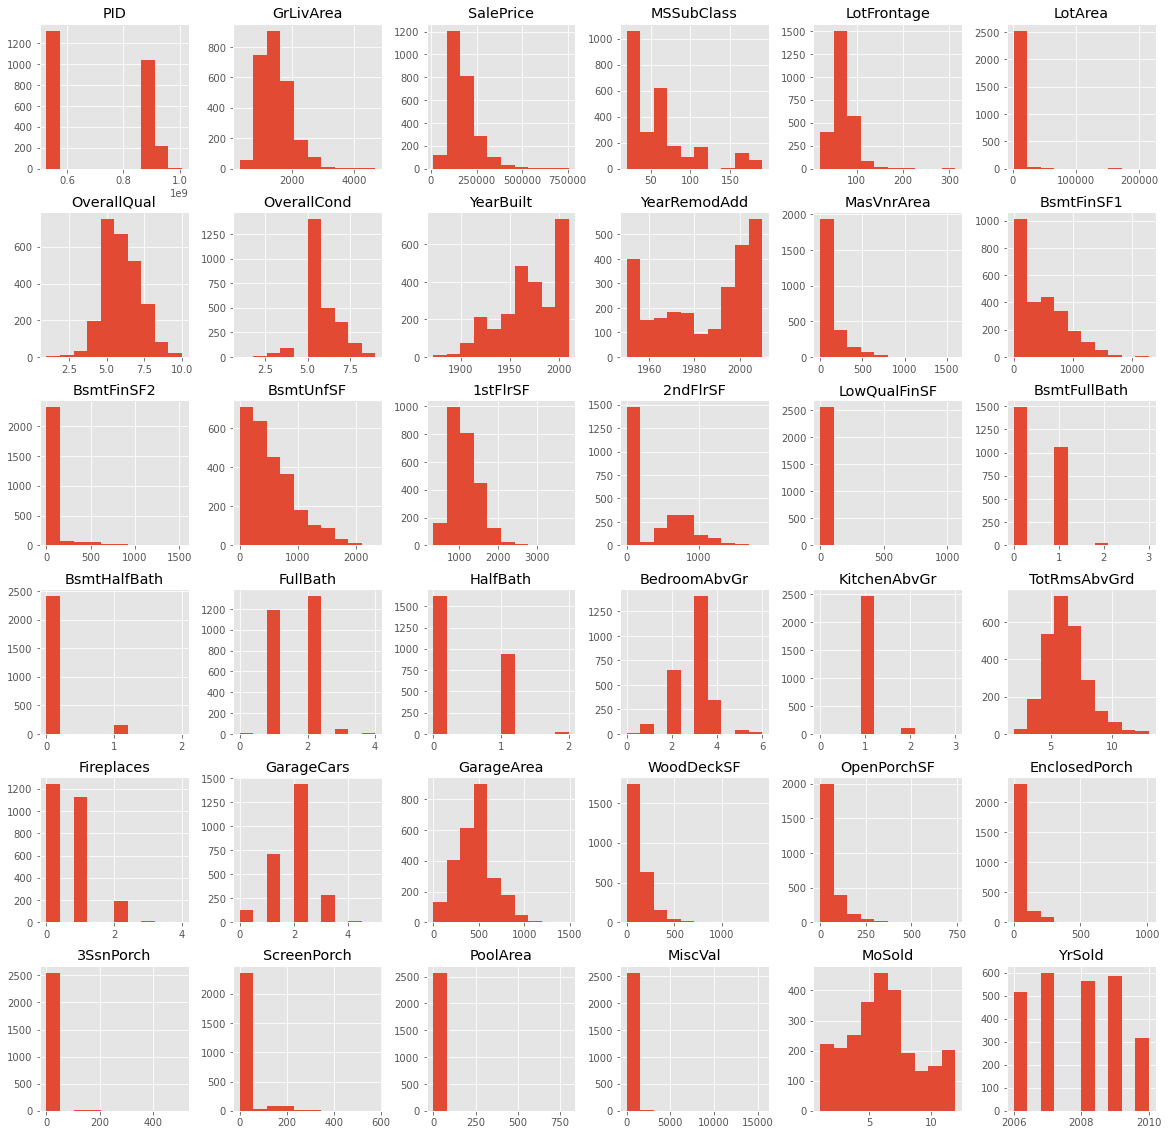

In [6]:
# Histogram of all numeric variables
data_House_price.hist(figsize=(20,20))

In [7]:
data_House_price.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [8]:
# Numerical variables
numerical_variables=data_House_price.select_dtypes(exclude=["bool_","object_"])
# Categorical variables
categorical_variables=data_House_price.select_dtypes(exclude=["number"])
categorical_variables

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1          RL   Pave    NA      Reg         Lvl    AllPub    Corner       Gtl   
2          RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
3     C (all)   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
4          RL   Pave    NA      Reg         Lvl    AllPub    Corner       Gtl   
5          RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
2576       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
2577       RL   Pave    NA      IR1         Lvl    AllPub   CulDSac       Gtl   
2578       RH   Pave    NA      Reg         HLS    AllPub    Inside       Gtl   
2579       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
2580       RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
1           SWISU       Norm       Norm     1Fam     1Story     Gable   
2         Edwards       Norm       Norm   TwnhsE     1Story     Gable   
3          IDOTRR       Norm       Norm     1Fam     1Story       Hip   
4         OldTown       Norm       Norm     1Fam     2Story     Gable   
5          NWAmes       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
2576      BrkSide       Norm       Norm     1Fam     1.5Unf     Gable   
2577      Edwards       Norm       Norm     1Fam     1Story       Hip   
2578      Crawfor       Norm       Norm   Duplex     2Story     Gable   
2579      CollgCr       Norm       Norm     1Fam     2Story     Gable   
2580      SawyerW       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1     CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
2     CompShg     HdBoard     HdBoard    BrkFace        Gd        TA   
3     CompShg     MetalSd     MetalSd       None        Gd        TA   
4     CompShg     MetalSd     MetalSd       None        Gd        Gd   
5     CompShg     VinylSd     VinylSd       None        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
2576  CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
2577  CompShg     BrkFace     Wd Sdng       None        TA        TA   
2578  CompShg     MetalSd     MetalSd       None        TA        TA   
2579  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
2580  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1        CBlock       TA       TA           No          Rec          Unf   
2        CBlock       Gd       TA           Mn          GLQ          ALQ   
3        BrkTil       TA       TA           No          ALQ          Unf   
4        BrkTil       Fa       TA           No          Unf          Unf   
5         PConc       Gd       TA           No          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
2576     BrkTil       TA       TA           No          Unf          Unf   
2577       Slab       NA       NA           NA           NA           NA   
2578     CBlock       TA       TA           No          BLQ          Unf   
2579      PConc       Gd       TA           No          GLQ          Unf   
2580      PConc       Gd       TA           No          GLQ          Unf   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical KitchenQual  \
1          856.0    GasA        TA          Y      SBrkr          TA   
2         1049.0    GasA        TA          Y      SBrkr          Gd   
3          837.0    GasA        Ex          Y      SBrkr          Gd   
4          405.0    GasA        Gd          Y      SBrkr          TA   
5          810.0 

In [9]:
# Categorical variables distribution and analysis
categorical_columns=categorical_variables.columns

for feature in categorical_columns:
    print(data_House_price[feature].value_counts())
    print('')  


RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Pave    2569
Grvl      10
Name: Street, dtype: int64

NA      2411
Grvl     105
Pave      63
Name: Alley, dtype: int64

Reg    1640
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

Lvl    2337
Bnk      95
HLS      95
Low      52
Name: LandContour, dtype: int64

AllPub    2577
NoSewr       2
Name: Utilities, dtype: int64

Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

Gtl    2458
Mod     108
Sev      13
Name: LandSlope, dtype: int64

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker   

In [10]:
#Null count in categorical
for feature in categorical_columns:
    print(feature)
    print(np.sum(data_House_price[feature].isnull()))
    print('')

MSZoning
0

Street
0

Alley
0

LotShape
0

LandContour
0

Utilities
0

LotConfig
0

LandSlope
0

Neighborhood
0

Condition1
0

Condition2
0

BldgType
0

HouseStyle
0

RoofStyle
0

RoofMatl
0

Exterior1st
0

Exterior2nd
0

MasVnrType
0

ExterQual
0

ExterCond
0

Foundation
0

BsmtQual
0

BsmtCond
0

BsmtExposure
0

BsmtFinType1
0

BsmtFinType2
0

TotalBsmtSF
0

Heating
0

HeatingQC
0

CentralAir
0

Electrical
0

KitchenQual
0

Functional
0

FireplaceQu
0

GarageType
0

GarageYrBlt
0

GarageFinish
0

GarageQual
0

GarageCond
0

PavedDrive
0

PoolQC
0

Fence
0

MiscFeature
0

SaleType
0

SaleCondition
0



In [11]:
#Null count in numerical variables
for nfeature in numerical_variables:
    print(nfeature)
    print(np.sum(data_House_price[nfeature].isnull()))
    print('')

PID
0

GrLivArea
0

SalePrice
0

MSSubClass
0

LotFrontage
0

LotArea
0

OverallQual
0

OverallCond
0

YearBuilt
0

YearRemodAdd
0

MasVnrArea
0

BsmtFinSF1
0

BsmtFinSF2
0

BsmtUnfSF
0

1stFlrSF
0

2ndFlrSF
0

LowQualFinSF
0

BsmtFullBath
0

BsmtHalfBath
0

FullBath
0

HalfBath
0

BedroomAbvGr
0

KitchenAbvGr
0

TotRmsAbvGrd
0

Fireplaces
0

GarageCars
0

GarageArea
0

WoodDeckSF
0

OpenPorchSF
0

EnclosedPorch
0

3SsnPorch
0

ScreenPorch
0

PoolArea
0

MiscVal
0

MoSold
0

YrSold
0



In [12]:
# Correlation between numerical variables
corr_numerical_matrix = numerical_variables.corr(method ='pearson')
corr_numerical_matrix

PID  GrLivArea  SalePrice  MSSubClass  LotFrontage  \
PID            1.000000  -0.102485  -0.226410   -0.005257    -0.087511   
GrLivArea     -0.102485   1.000000   0.719980    0.070821     0.309074   
SalePrice     -0.226410   0.719980   1.000000   -0.084574     0.332631   
MSSubClass    -0.005257   0.070821  -0.084574    1.000000    -0.402105   
LotFrontage   -0.087511   0.309074   0.332631   -0.402105     1.000000   
LotArea        0.041946   0.260286   0.274427   -0.198025     0.330942   
OverallQual   -0.246941   0.560125   0.790661    0.056422     0.163019   
OverallCond    0.119904  -0.105739  -0.101123   -0.075520    -0.046359   
YearBuilt     -0.337693   0.228643   0.544569    0.053792     0.086987   
YearRemodAdd  -0.128180   0.306512   0.514720    0.056671     0.055080   
MasVnrArea    -0.228836   0.386163   0.500494    0.017062     0.182695   
BsmtFinSF1    -0.112997   0.165247   0.461056   -0.073689     0.156795   
BsmtFinSF2    -0.003338  -0.020853   0.022694   -0.073998     0.042649   
BsmtUnfSF     -0.074745   0.246122   0.168118   -0.112819     0.096489   
1stFlrSF      -0.153914   0.539168   0.642623   -0.255803     0.393455   
2ndFlrSF       0.012270   0.664967   0.263115    0.306995     0.008333   
LowQualFinSF   0.058221   0.088953  -0.030827    0.013466    -0.009774   
BsmtFullBath  -0.044601   0.043526   0.290867   -0.001635     0.094755   
BsmtHalfBath   0.001754  -0.053456  -0.033766   -0.010421    -0.031009   
FullBath      -0.153868   0.644277   0.535175    0.144434     0.148236   
HalfBath      -0.173275   0.445438   0.285861    0.181923     0.025813   
BedroomAbvGr   0.001704   0.538346   0.151924   -0.023757     0.222269   
KitchenAbvGr   0.047850   0.129840  -0.113962    0.251346     0.019003   
TotRmsAbvGrd  -0.074446   0.807432   0.490206    0.032076     0.310508   
Fireplaces    -0.108920   0.457867   0.488173   -0.047751     0.217312   
GarageCars    -0.221423   0.494090   0.638640   -0.032268     0.275646   
GarageArea    -0.199589   0.476107   0.634706   -0.091358     0.309299   
WoodDeckSF    -0.041592   0.247890   0.333332   -0.017710     0.102743   
OpenPorchSF   -0.054581   0.321950   0.306629   -0.007698     0.133337   
EnclosedPorch  0.168961   0.000263  -0.123209   -0.028561     0.005202   
3SsnPorch     -0.021163   0.008733   0.031269   -0.041806     0.022842   
ScreenPorch   -0.032351   0.097582   0.121392   -0.055012     0.077640   
PoolArea      -0.006506   0.057947   0.030849   -0.013435     0.085269   
MiscVal       -0.022490  -0.003922  -0.018869   -0.027233     0.003793   
MoSold        -0.059359   0.038694   0.012725    0.007147     0.004878   
YrSold         0.002799  -0.008007  -0.001261   -0.025459    -0.006202   

                LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
PID            0.041946    -0.246941     0.119904  -0.337693     -0.128180   
GrLivArea      0.260286     0.560125    -0.105739   0.228643      0.306512   
SalePrice      0.274427     0.790661    -0.101123   0.544569      0.514720   
MSSubClass    -0.198025     0.056422    -0.075520   0.053792      0.056671   
LotFrontage    0.330942     0.163019    -0.046359   0.086987      0.055080   
LotArea        1.000000     0.080701    -0.032731   0.012510      0.010478   
OverallQual    0.080701     1.000000    -0.095839   0.574278      0.546157   
OverallCond   -0.032731    -0.095839     1.000000  -0.397229      0.065353   
YearBuilt      0.012510     0.574278    -0.397229   1.000000      0.572041   
YearRemodAdd   0.010478     0.546157     0.065353   0.572041      1.000000   
MasVnrArea     0.104070     0.403553    -0.142832   0.303710      0.172806   
BsmtFinSF1     0.163599     0.274491    -0.064860   0.304057      0.157395   
BsmtFinSF2     0.082430    -0.030287     0.029876  -0.009831     -0.051202   
BsmtUnfSF      0.020047     0.256120    -0.124465   0.092334      0.131066   
1stFlrSF       0.313097     0.454517    -0.156588   0.294730      0.217790   
2ndFlrSF       0.022371     0.247

In [13]:
# Top 20 most and 5 least correlated features to 'SalePrice'
higly_corr=corr_numerical_matrix['SalePrice'].nlargest(20)
negatively_corr=corr_numerical_matrix['SalePrice'].nsmallest(5)

# print('higly_corr: ',higly_corr)
# print('negatively_corr: ',negatively_corr)

In [14]:
#Top 5 most and 3 least correlated features to all numerical features
for nfeature in numerical_variables:
    print('Feature: ',nfeature)
    higly_corr=corr_numerical_matrix[nfeature].nlargest(6)
    higly_corr=higly_corr.drop([nfeature])
    negatively_corr=corr_numerical_matrix[nfeature].nsmallest(3)
#     print('higly_corr: ',sep='\n')
#     print(higly_corr)
#     print('negatively_corr: ', sep='\n')
#     print(negatively_corr)
#     print('')



Feature:  PID
Feature:  GrLivArea
Feature:  SalePrice
Feature:  MSSubClass
Feature:  LotFrontage
Feature:  LotArea
Feature:  OverallQual
Feature:  OverallCond
Feature:  YearBuilt
Feature:  YearRemodAdd
Feature:  MasVnrArea
Feature:  BsmtFinSF1
Feature:  BsmtFinSF2
Feature:  BsmtUnfSF
Feature:  1stFlrSF
Feature:  2ndFlrSF
Feature:  LowQualFinSF
Feature:  BsmtFullBath
Feature:  BsmtHalfBath
Feature:  FullBath
Feature:  HalfBath
Feature:  BedroomAbvGr
Feature:  KitchenAbvGr
Feature:  TotRmsAbvGrd
Feature:  Fireplaces
Feature:  GarageCars
Feature:  GarageArea
Feature:  WoodDeckSF
Feature:  OpenPorchSF
Feature:  EnclosedPorch
Feature:  3SsnPorch
Feature:  ScreenPorch
Feature:  PoolArea
Feature:  MiscVal
Feature:  MoSold
Feature:  YrSold


In [15]:
import plotly.express as plt
fig_corr_numerical = plt.imshow(corr_numerical_matrix, text_auto=True, aspect="auto")
fig_corr_numerical.show()
#fig_corr_numerical.write_html("independent.html")

In [16]:
#creating new column since built or remodeled
data_House_price['YearRemodAdd']
todays_date = date.today()
data_House_price['YearSinceBuiltRemodeled']=data_House_price['YrSold']-data_House_price['YearRemodAdd']
data_House_price['YearSinceBuiltRemodeled']


/var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/ipykernel_1056/2355558131.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1       60
2       25
3        0
4        6
5        8
        ..
2576    59
2577    54
2578    57
2579     7
2580    12
Name: YearSinceBuiltRemodeled, Length: 2579, dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#Numerical:
#LotArea, GrLivArea, YearBuilt,BedroomAbvGr,

#Nominal Categorical:
    
    #BldgType :1Fam,2FmCon,TwnhsE,Twnhs,Duplex
    #OverallQual
    #OverallCond
    #LandSlope: Gtl,Mod,Sev
    
#conditional:
    #PavedDrive,MSZoning
    
multi_linear_var=data_House_price[['SalePrice','LotArea', 'GrLivArea', 'BedroomAbvGr','LandSlope','YearBuilt','MSZoning','BldgType','OverallQual','OverallCond','PavedDrive']]    

multi_linear_var

enc = OrdinalEncoder()
enc.fit(multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]])
multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]] = enc.transform(multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]])


multi_linear_var = pd.get_dummies(multi_linear_var, columns = ['PavedDrive'],drop_first = True)
multi_linear_var = pd.get_dummies(multi_linear_var, columns = ['MSZoning'],drop_first = True)

x2=multi_linear_var.iloc[: , 1:]
y2=multi_linear_var['SalePrice']

ols2 = linear_model.LinearRegression()
lm_test2=ols2.fit(x2, y2)
print(lm_test2.score(x2, y2))
###################Summary

features2 = sm.add_constant(x2)
ols_sm2   = OLS(y2,features2)
lm_test2_1    = ols_sm2.fit()

print(lm_test2_1.summary())


0.8116536008490594
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     690.0
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        19:03:20   Log-Likelihood:                -30458.
No. Observations:                2579   AIC:                         6.095e+04
Df Residuals:                    2562   BIC:                         6.105e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.2

/Users/jchatterjee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jchatterjee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [18]:
#Removing Mszoning FV, C,I,A
print(data_House_price['MSZoning'].unique())

data_House_price = data_House_price[(data_House_price['MSZoning']!='FV')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='C (all)')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='I (all)')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='A (agr)')]

print(data_House_price['MSZoning'].unique())



['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']
['RL' 'RM' 'RH']


In [19]:
print(data_House_price['SaleCondition'].unique())
data_House_price = data_House_price[(data_House_price['SaleCondition']=='Normal')]
data_House_price['SaleCondition'].unique()

['Normal' 'Partial' 'AdjLand' 'Abnorml' 'Alloca' 'Family']


array(['Normal'], dtype=object)

In [20]:
data_House_price=data_House_price.drop(['Street','MiscFeature'], axis=1)
data_House_price.shape

(2305, 80)

In [21]:
# Decide how to map string values to numerical values for ordinal variables
Ordstr = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', \
              'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual', \
              'GarageCond','PoolQC','Fence','MasVnrType','LotShape','Foundation','GarageFinish','PoolArea']

ord2dummies01 = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}
ord_vars01 = ['ExterQual','ExterCond','HeatingQC','KitchenQual']

ord2dummies02 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, "NA":0}
ord_vars02 = ['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond']

ord2dummies03 = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
ord_vars03 = ['BsmtExposure']

ord2dummies04 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
ord_vars04 = ['BsmtFinType1','BsmtFinType2']

ord2dummies05 = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}
ord_vars05 = ['PoolQC']

ord2dummies06 = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
ord_vars06 = ['Fence']

ord2dummies07 = {'Stone':4,'BrkCmn':3,'BrkFace':2,'CBlock':1,'None':0}
ord_vars07 = ['MasVnrType']

ord2dummies08 = {'Reg':3,'IR1':2,'IR2':1,'IR3':0}
ord_vars08 = ['LotShape']

ord2dummies09 = {'PConc':5,'Slab':4,'CBlock':3,'BrkTil':2,'Stone':1,'Wood':0}
ord_vars09 = ['Foundation']

ord2dummies10 = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
ord_vars10 = ['GarageFinish']

In [22]:
# Map the values in the dataframe
for i in ord_vars01:
    data_House_price[i].replace(ord2dummies01, inplace=True)

for i in ord_vars02:
    data_House_price[i].replace(ord2dummies02, inplace=True)

for i in ord_vars03:
    data_House_price[i].replace(ord2dummies03, inplace=True)

for i in ord_vars04:
    data_House_price[i].replace(ord2dummies04, inplace=True)

for i in ord_vars05:
    data_House_price[i].replace(ord2dummies05, inplace=True)

for i in ord_vars06:
    data_House_price[i].replace(ord2dummies06, inplace=True)
    
for i in ord_vars07:
    data_House_price[i].replace(ord2dummies07, inplace=True)

for i in ord_vars08:
    data_House_price[i].replace(ord2dummies08, inplace=True)

for i in ord_vars09:
    data_House_price[i].replace(ord2dummies09, inplace=True)
    
for i in ord_vars10:
    data_House_price[i].replace(ord2dummies10, inplace=True)
    
# Assign a binary value for whether or not a house has a pool
data_House_price.loc[data_House_price['PoolArea'] > 0] = 1

In [23]:
data_House_price[Ordstr]
data_House_price.columns[data_House_price.isin(['NA']).any()]

Index(['Alley', 'GarageType'], dtype='object')

In [24]:
data_House_price.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedD

In [25]:
Nomstr = ['MSZoning','Alley','LandContour','Utilities', \
               'LotConfig','LandSlope','Neighborhood','Condition1','Condition2', \
               'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st', \
               'Exterior2nd','Heating', \
               'CentralAir','Electrical','Functional','GarageType', \
               'PavedDrive','SaleType','SaleCondition']
for i in Nomstr:   
    dummy = pd.get_dummies(data_House_price[i], prefix=i, prefix_sep='__')
    dummy = dummy.drop(i+'__'+str(data_House_price[i].mode()[0]), axis=1)
    data_House_price = pd.concat([data_House_price.drop(i, axis=1), dummy], axis=1)

In [26]:
sale_price = data_House_price.columns.to_list()[2]
features = data_House_price.columns.to_list()[3:]

In [27]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

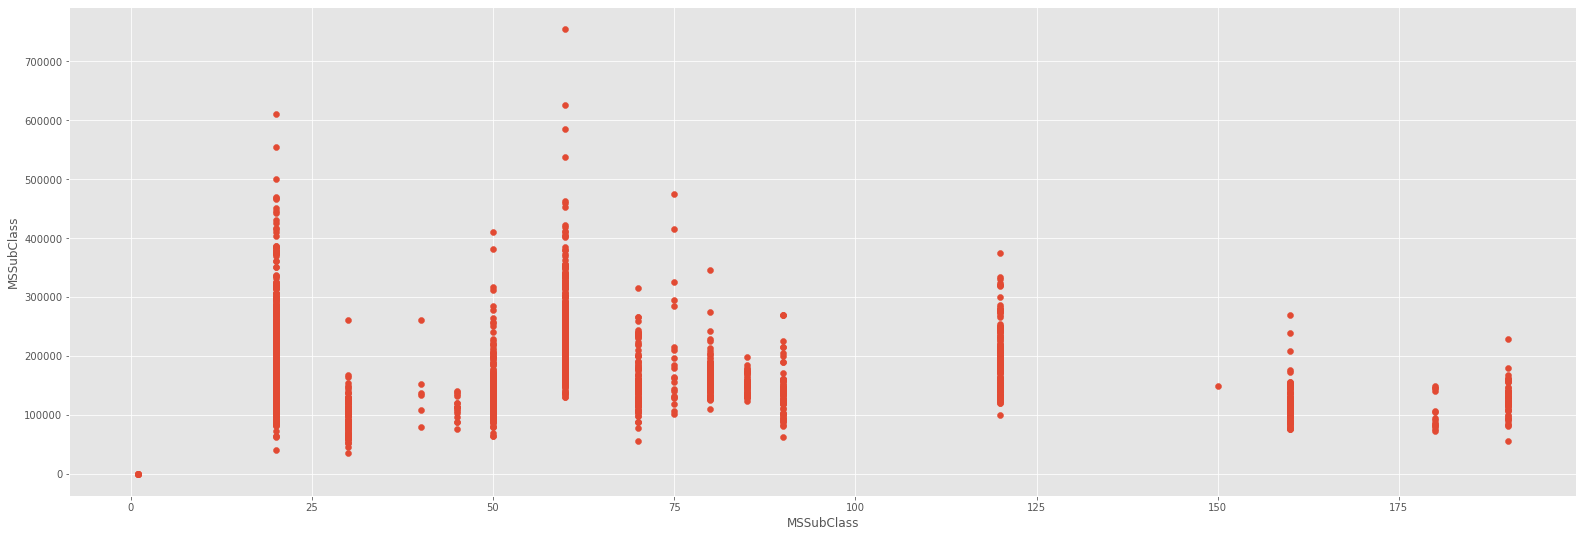

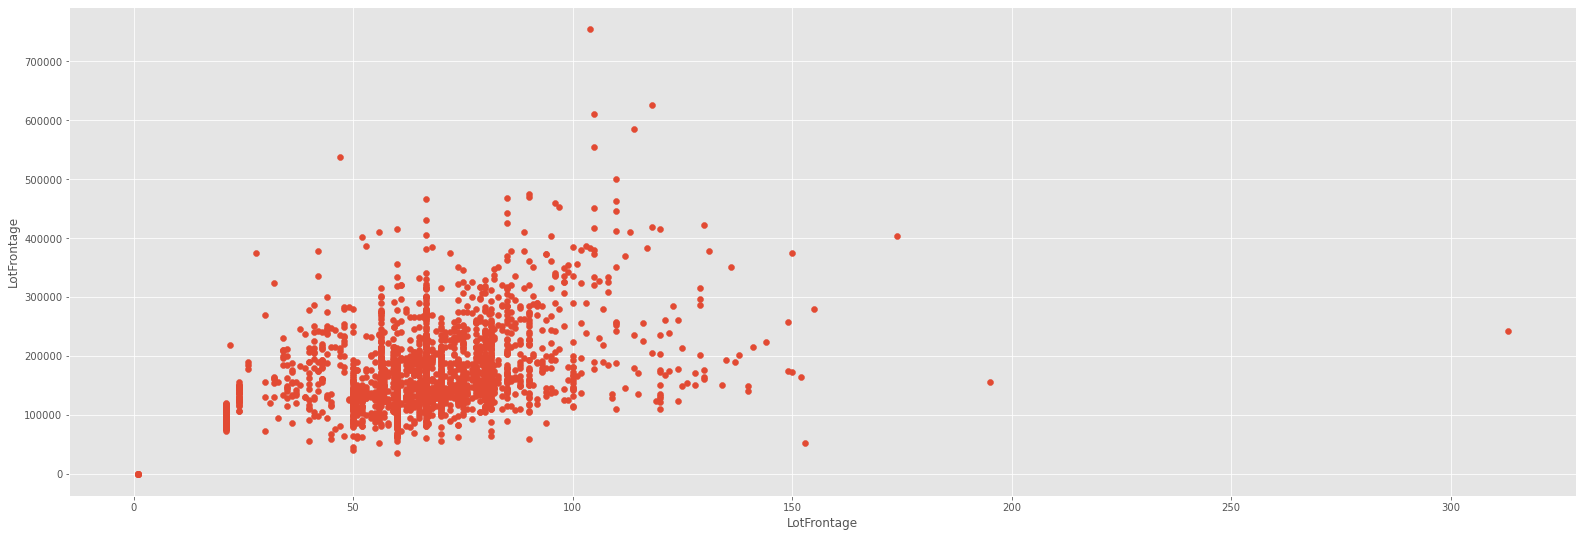

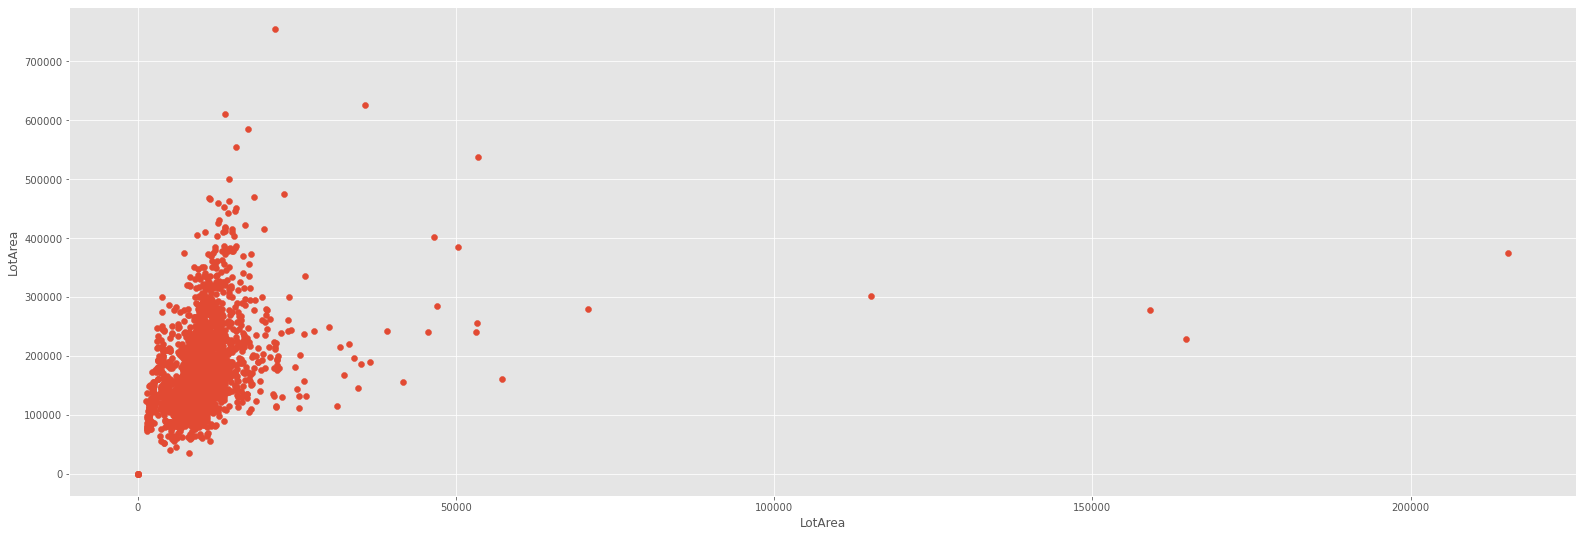

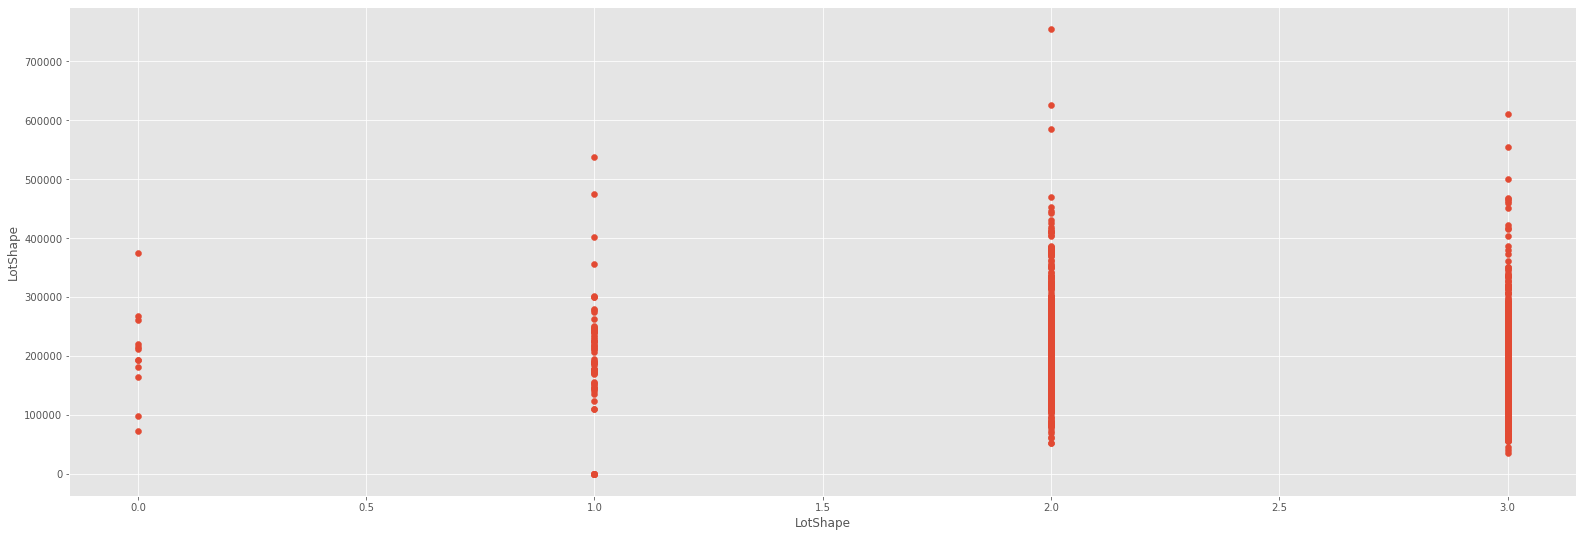

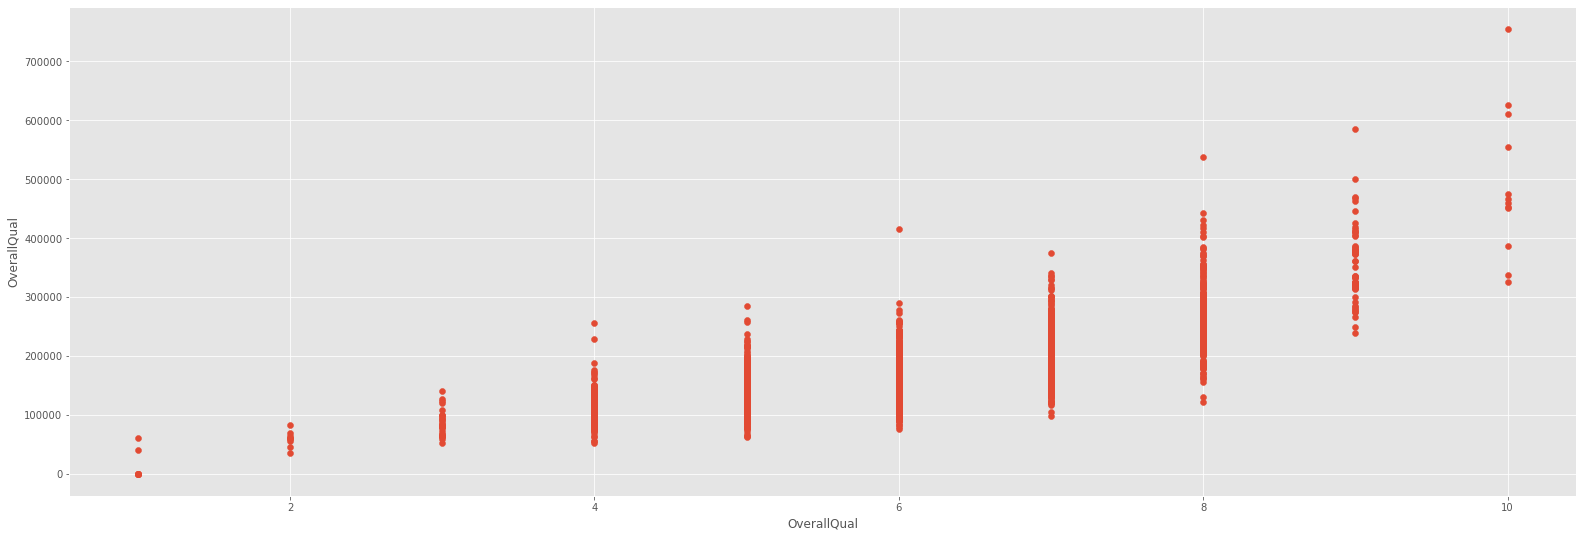

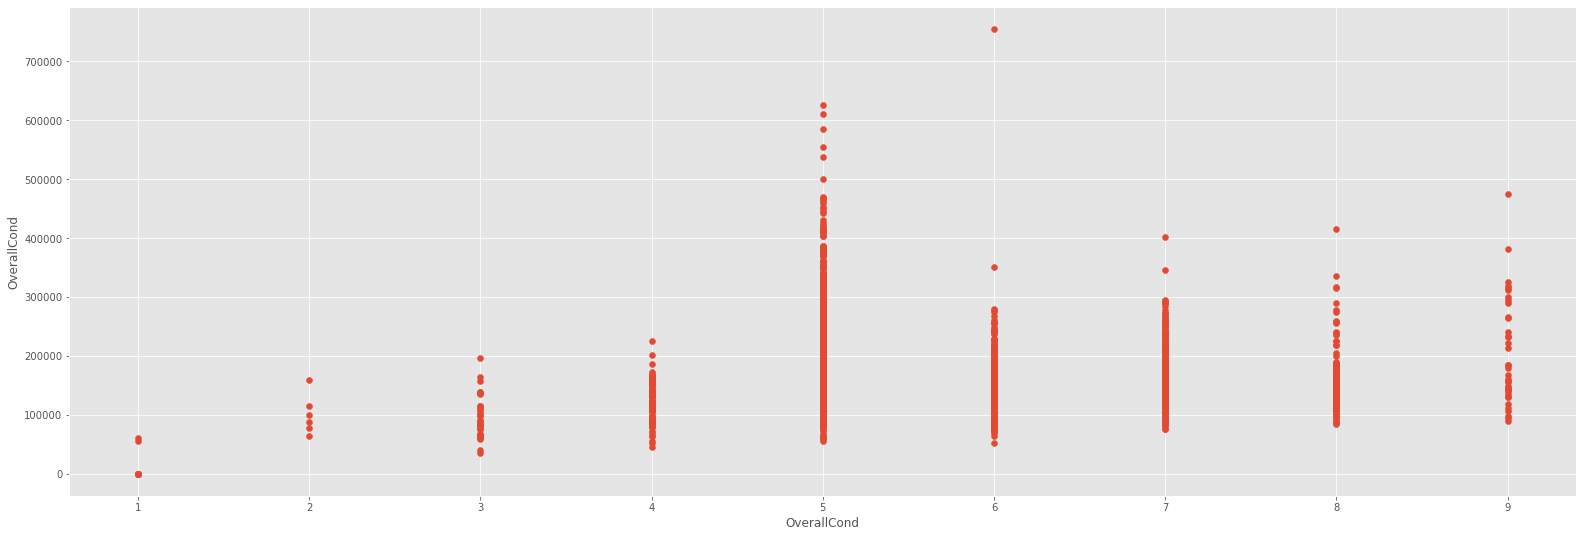

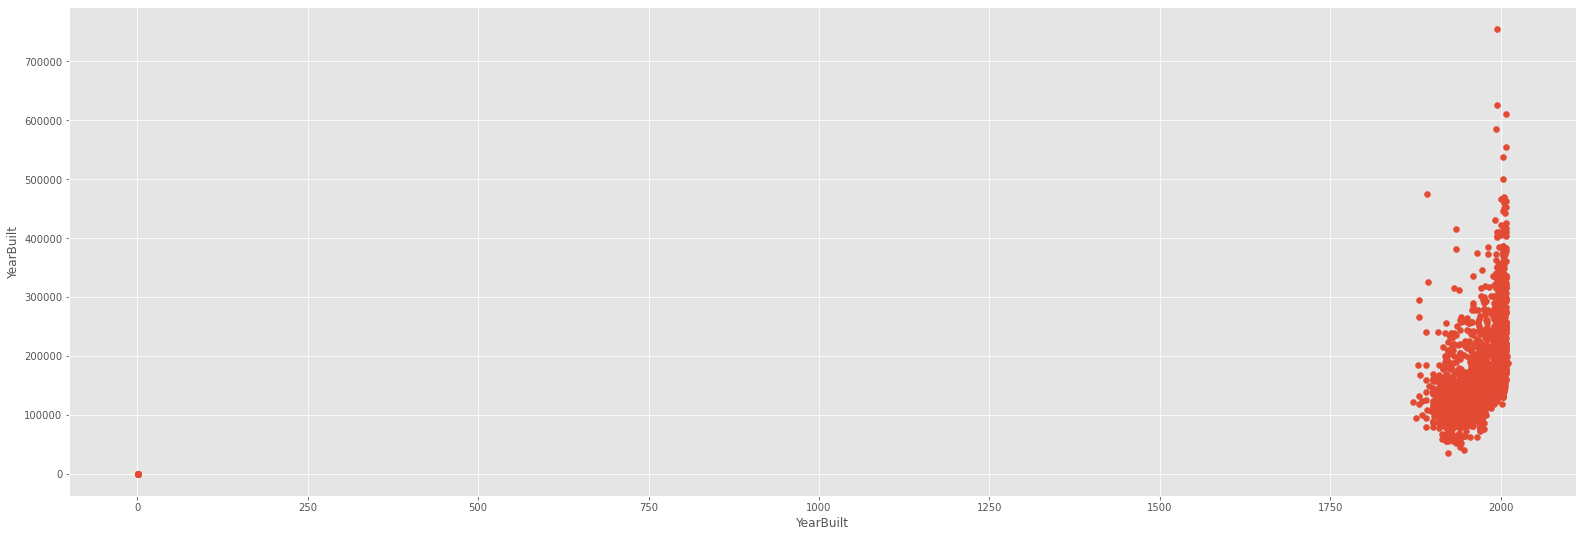

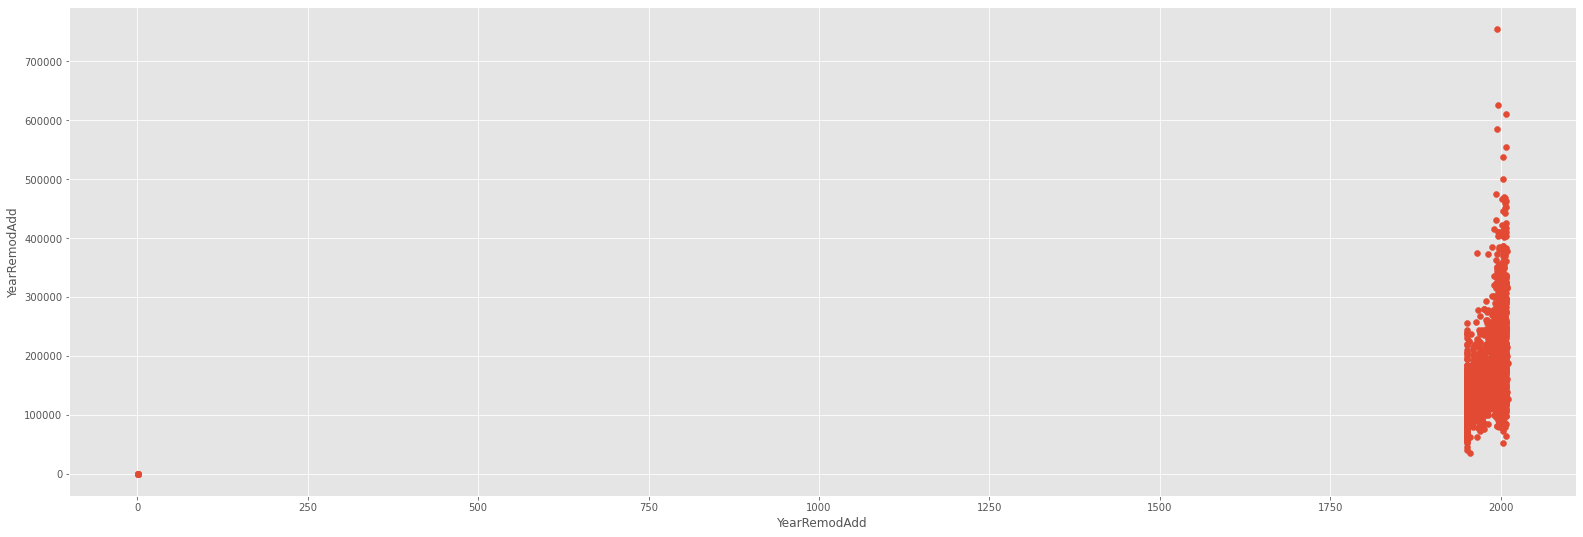

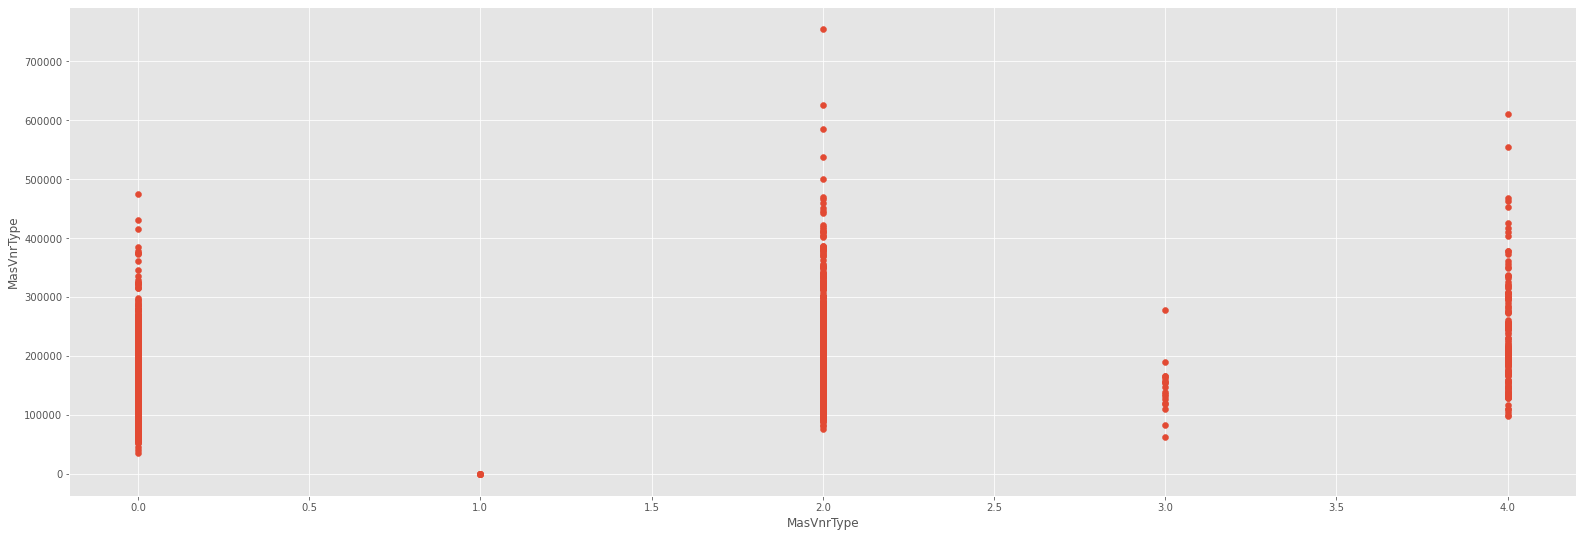

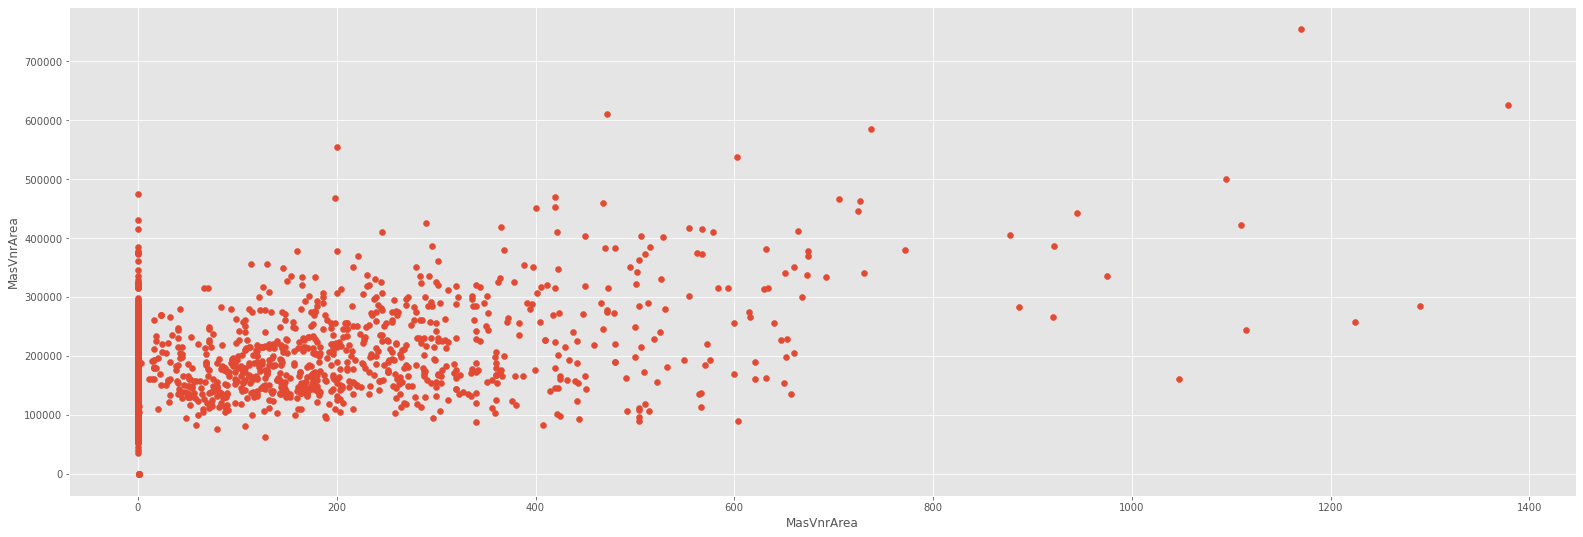

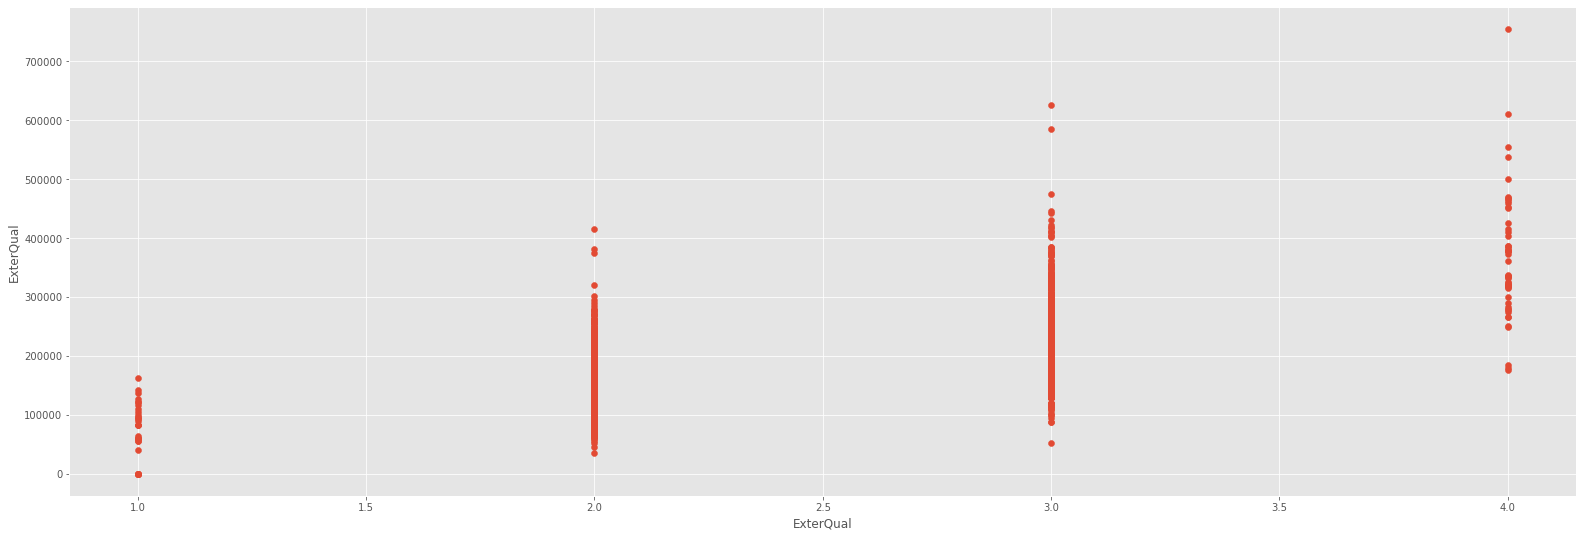

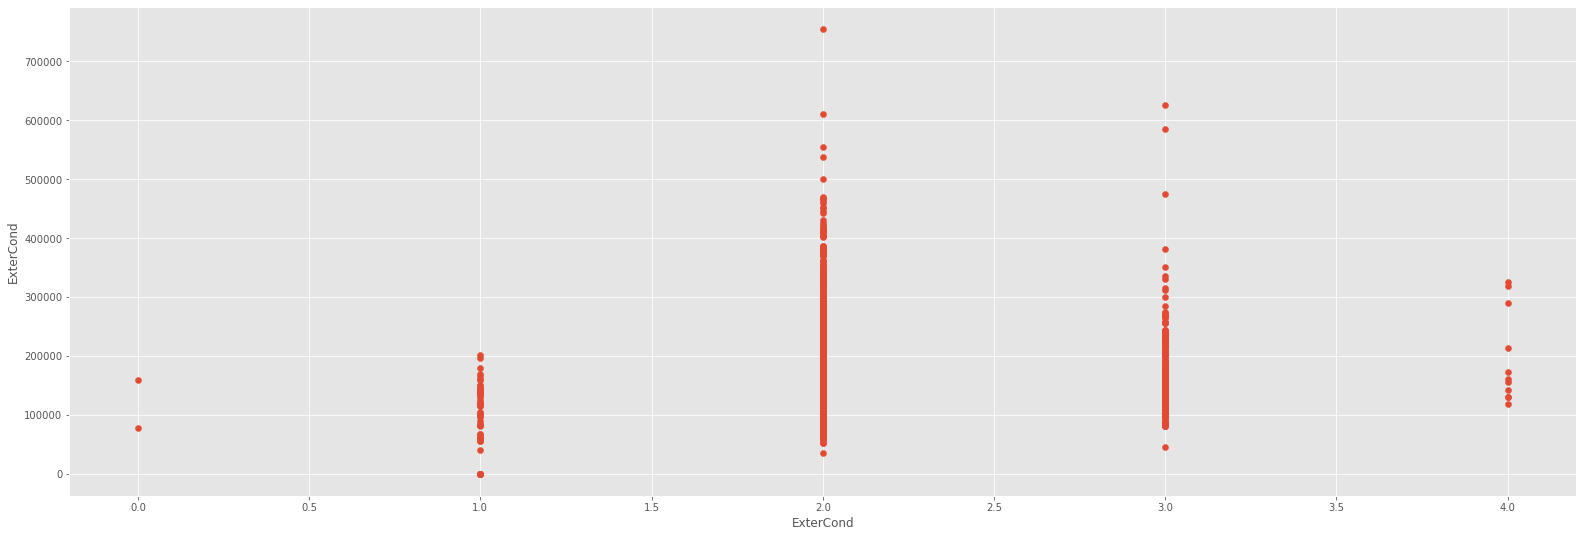

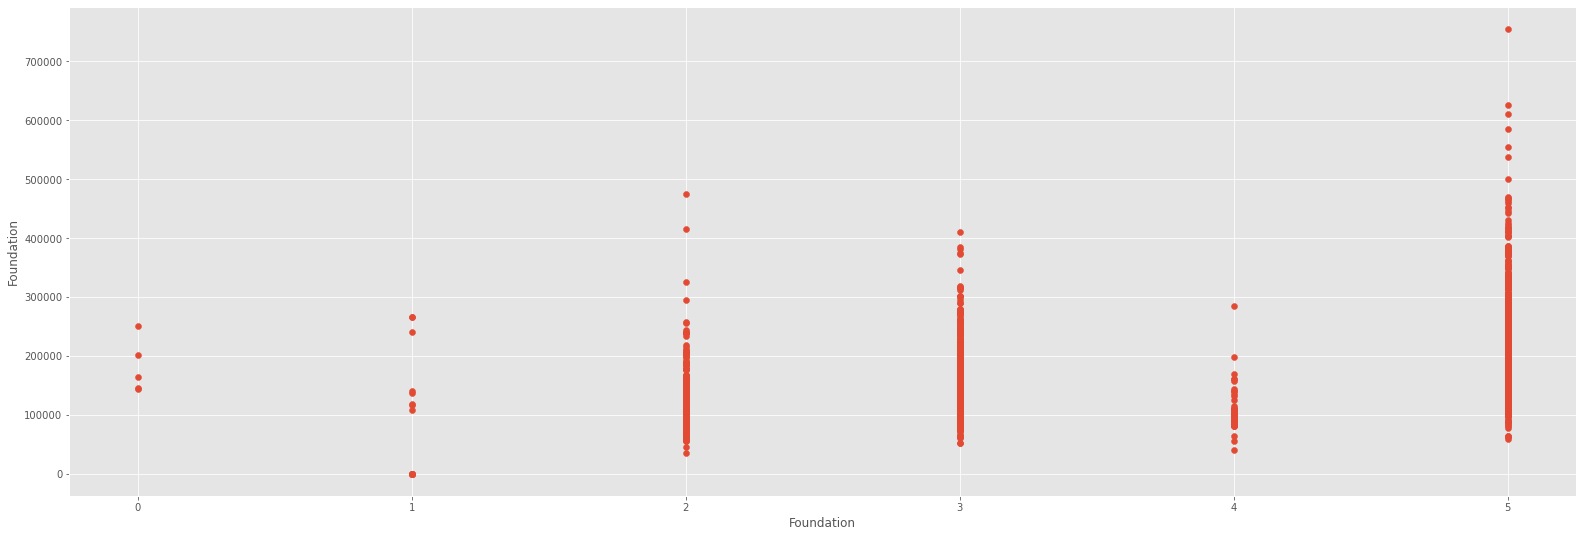

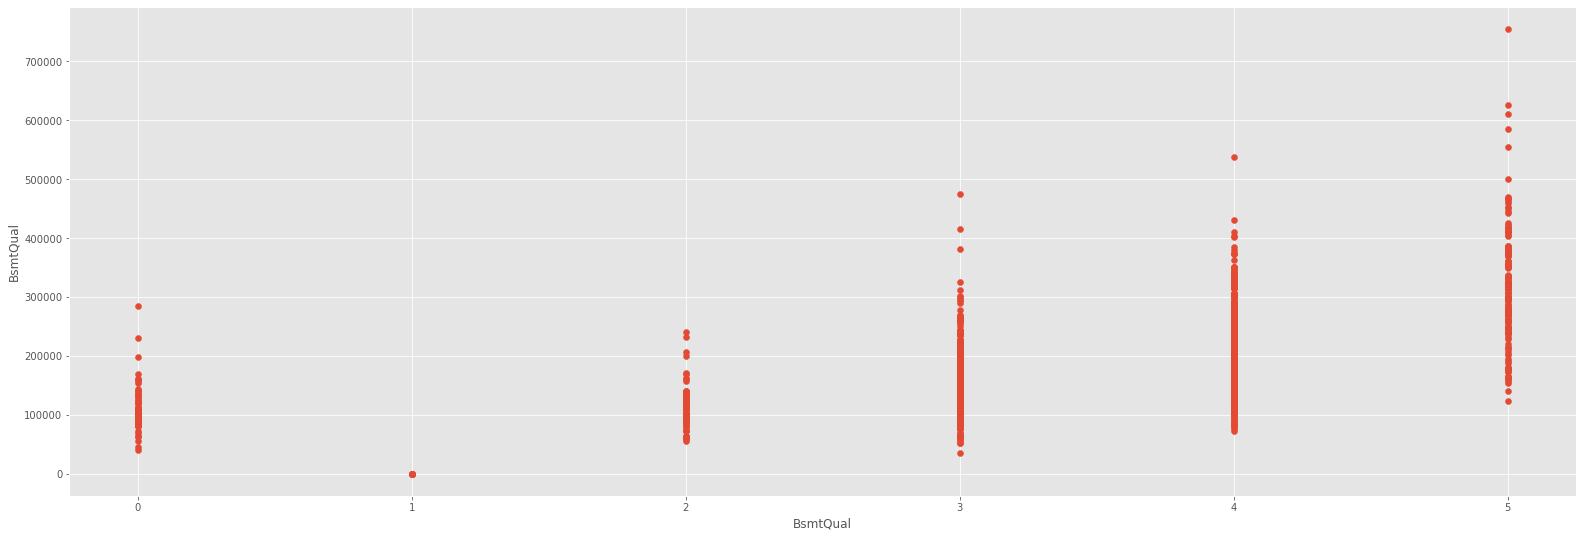

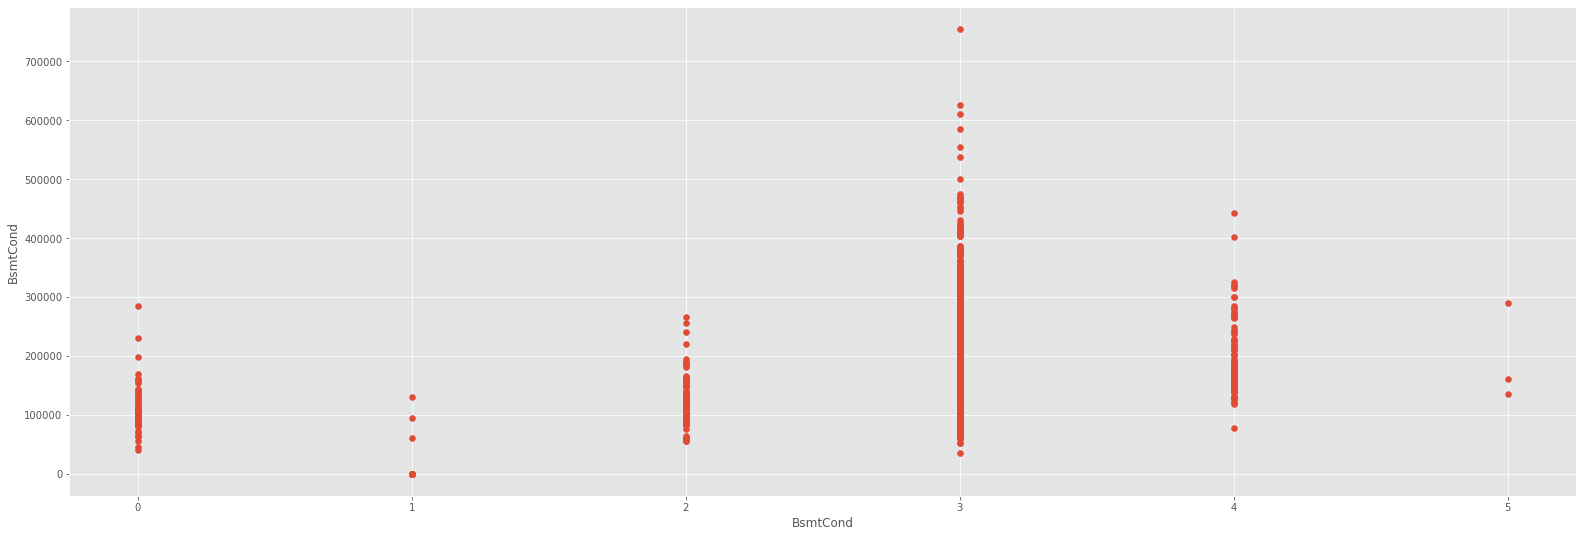

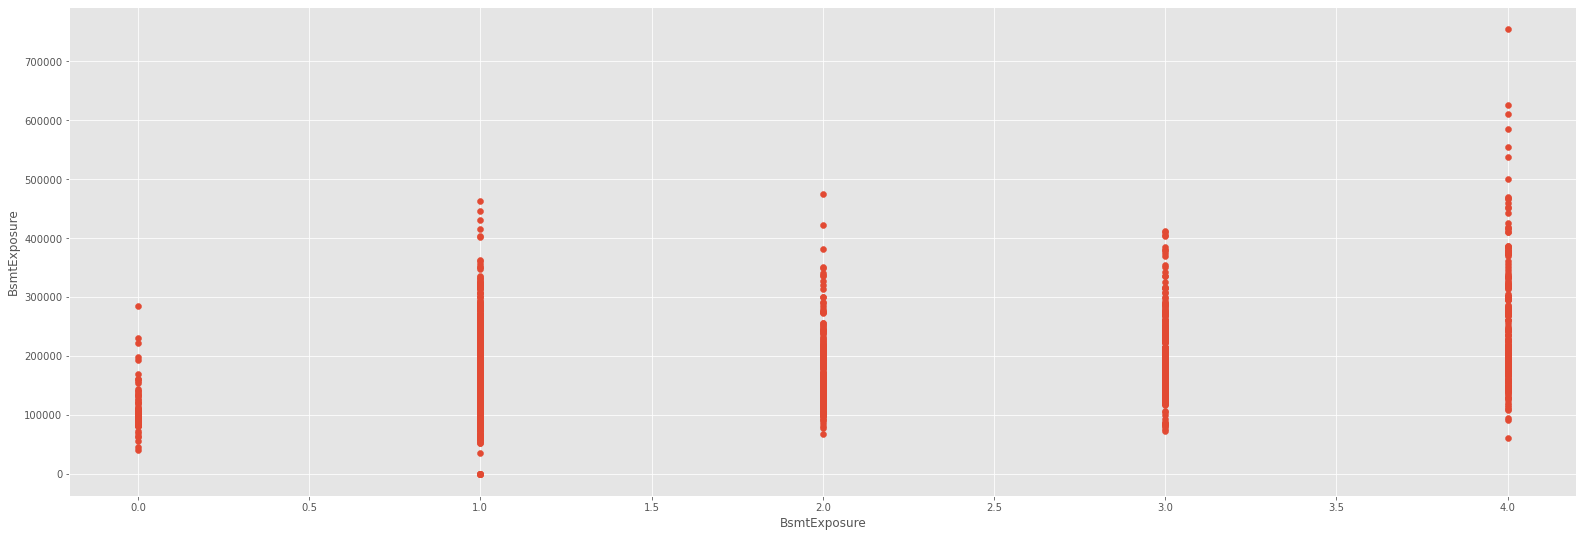

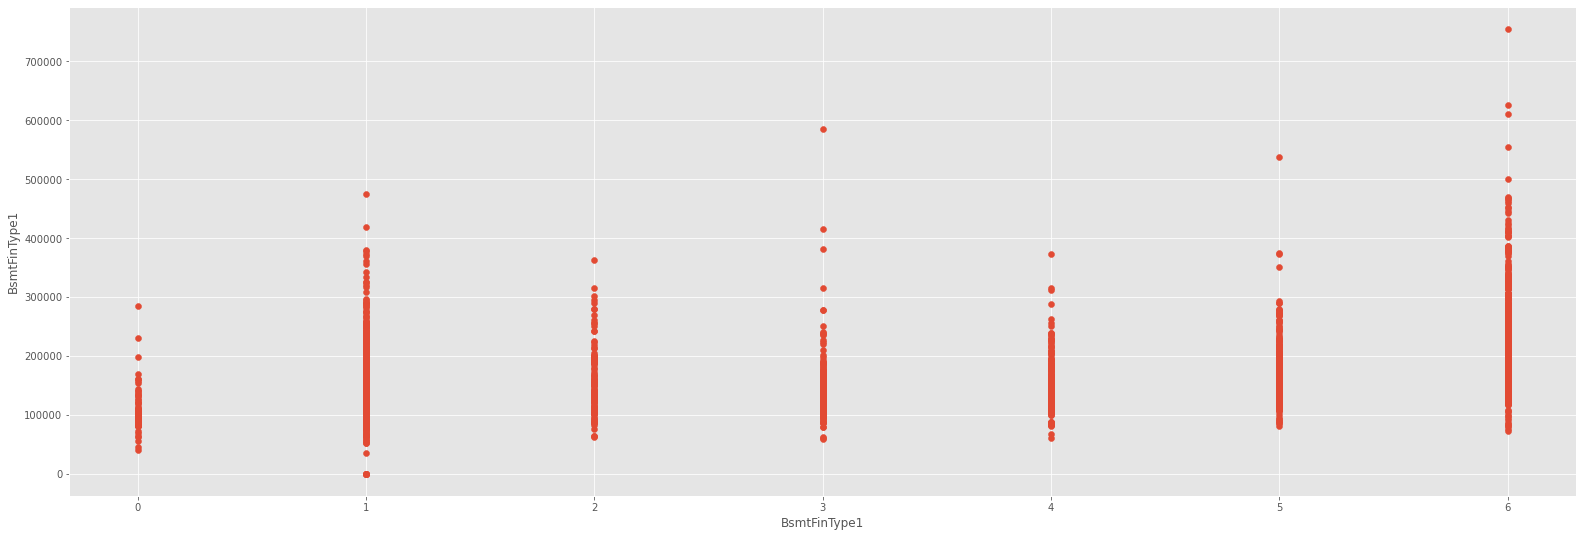

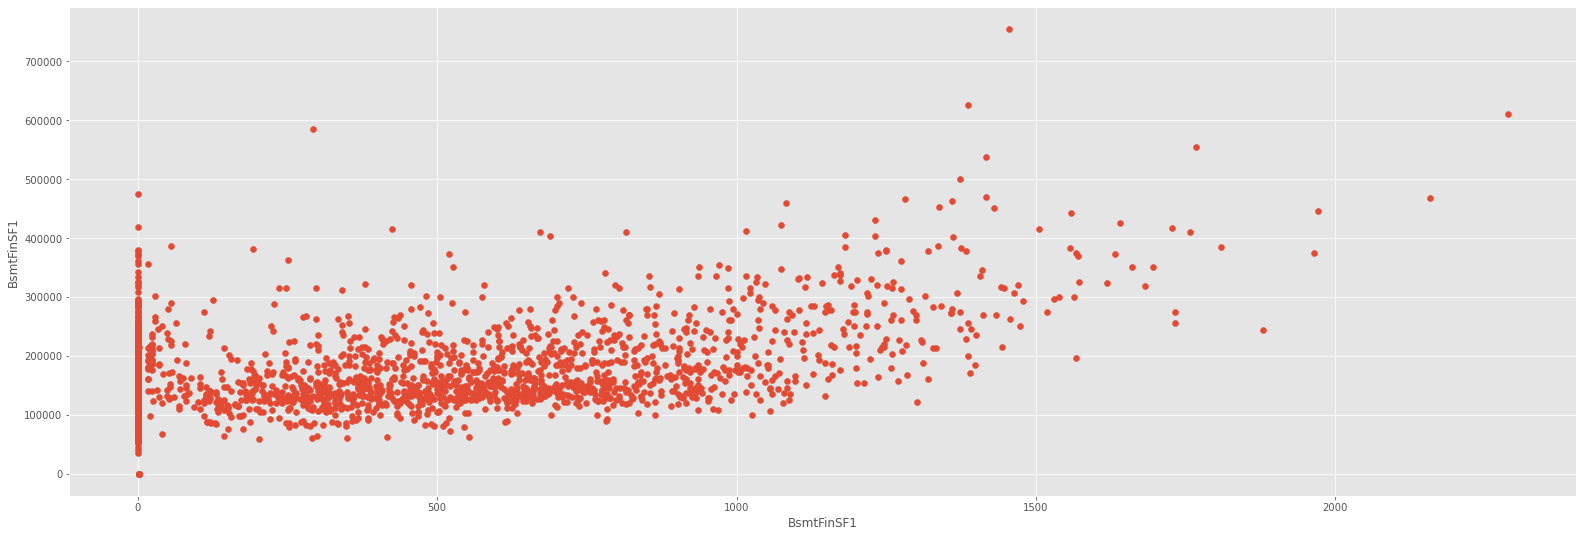

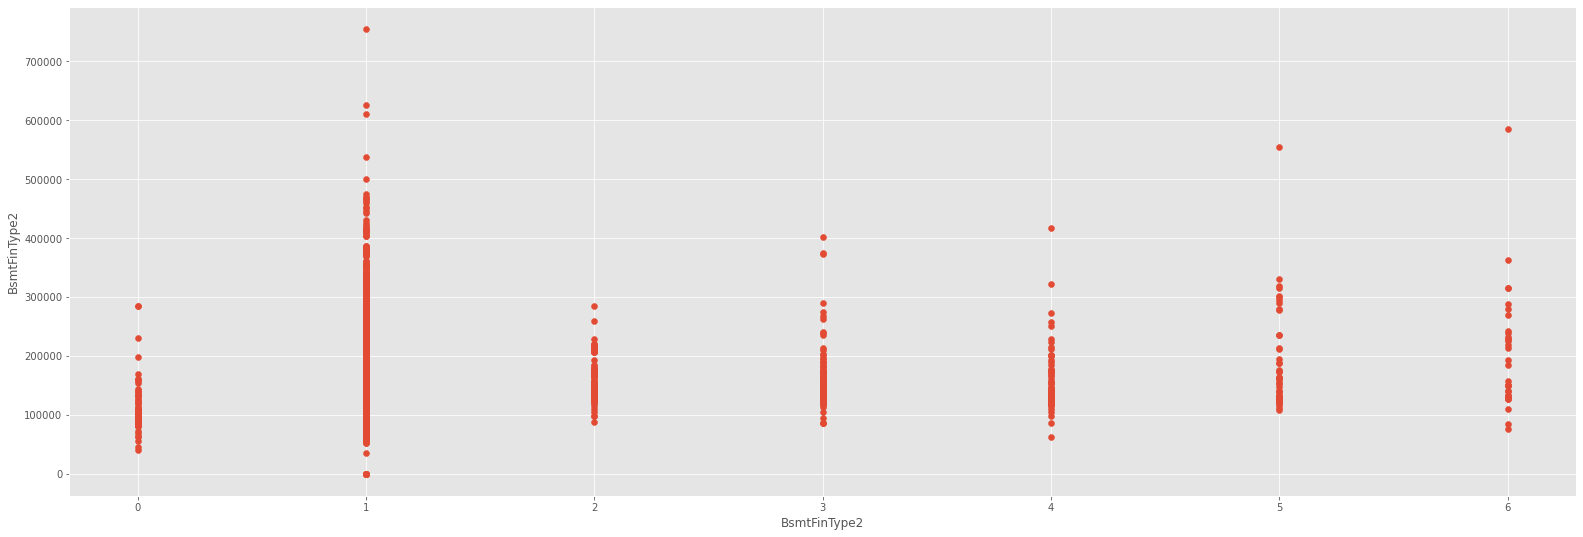

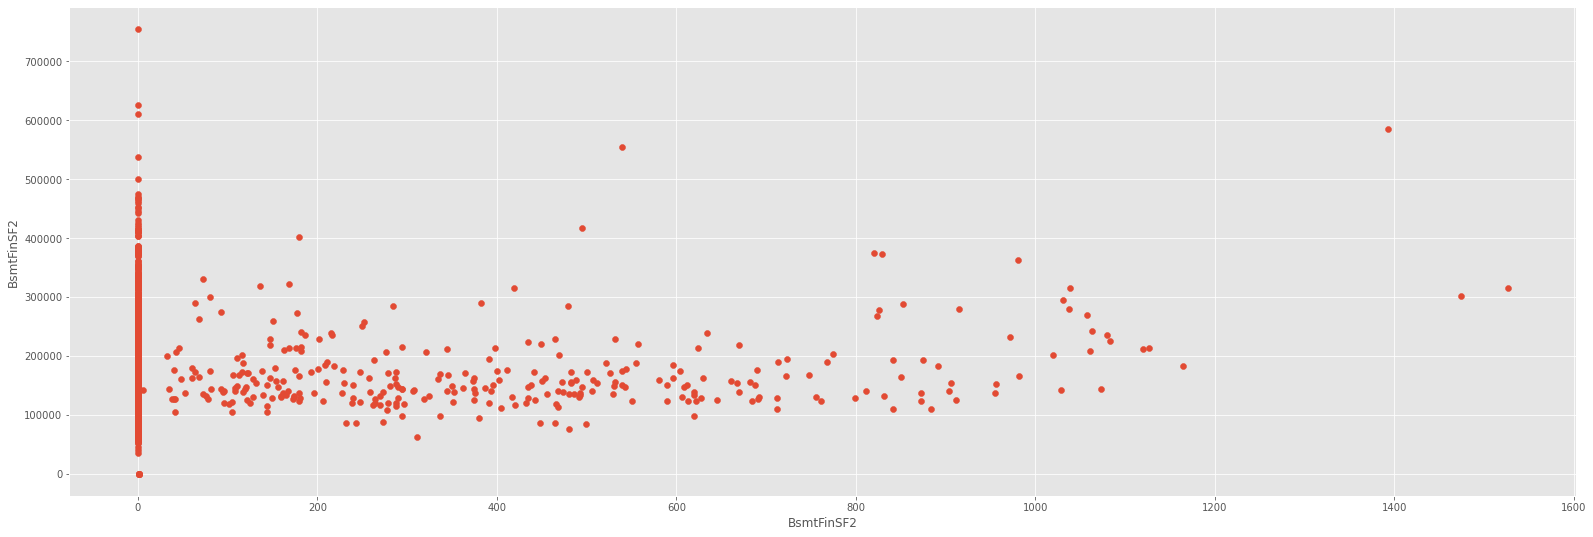

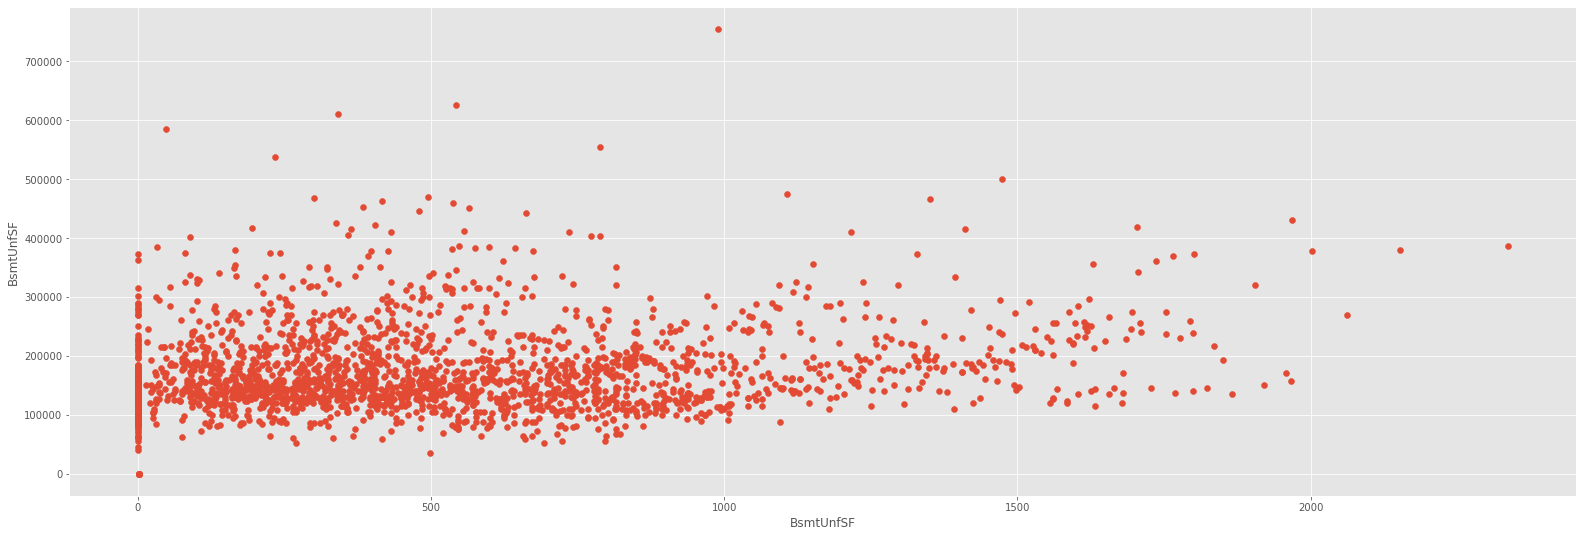

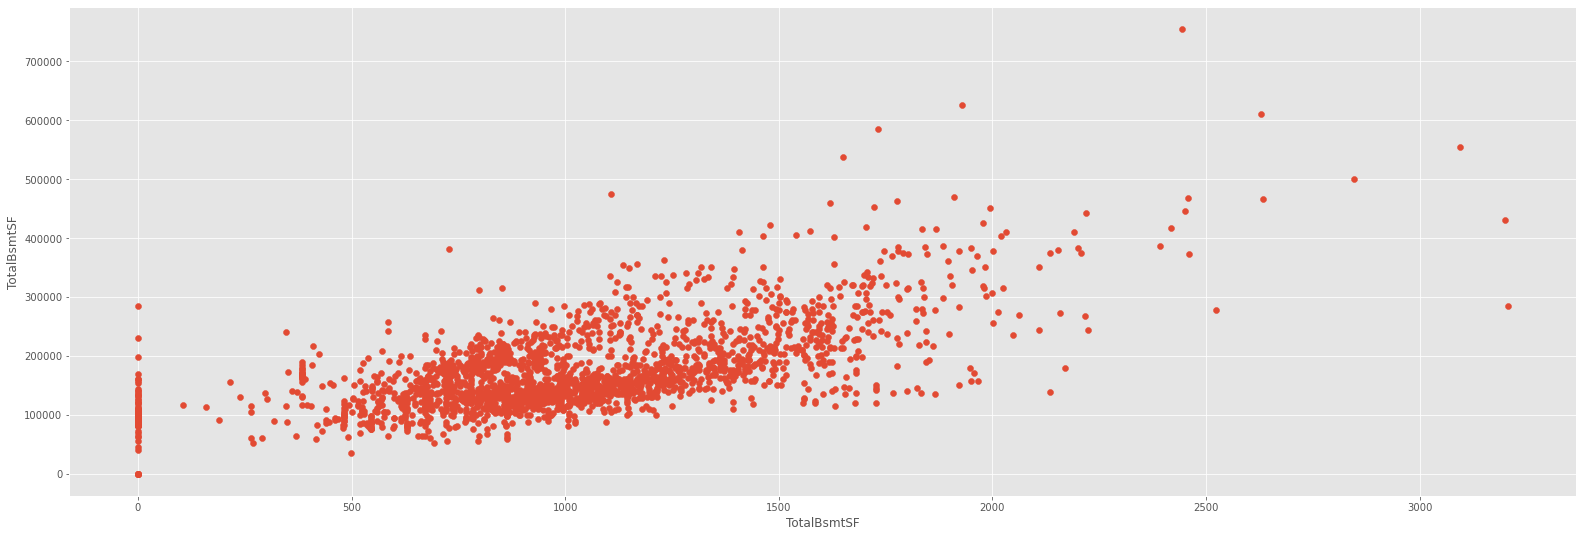

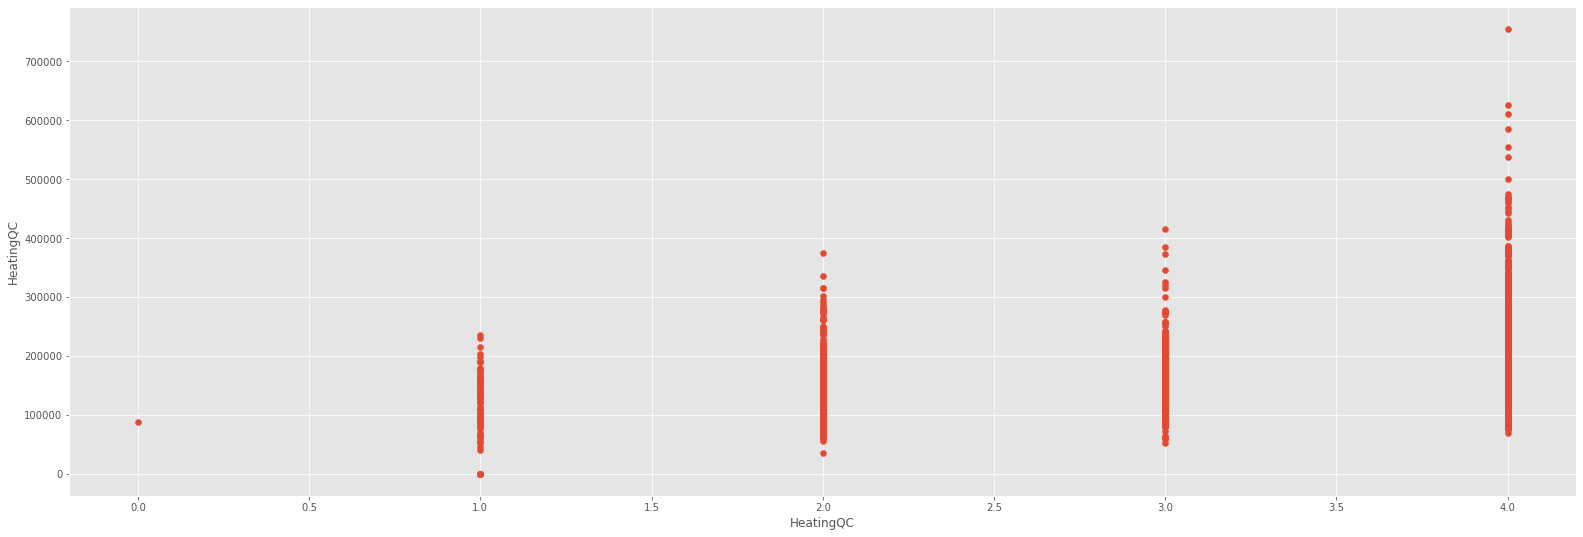

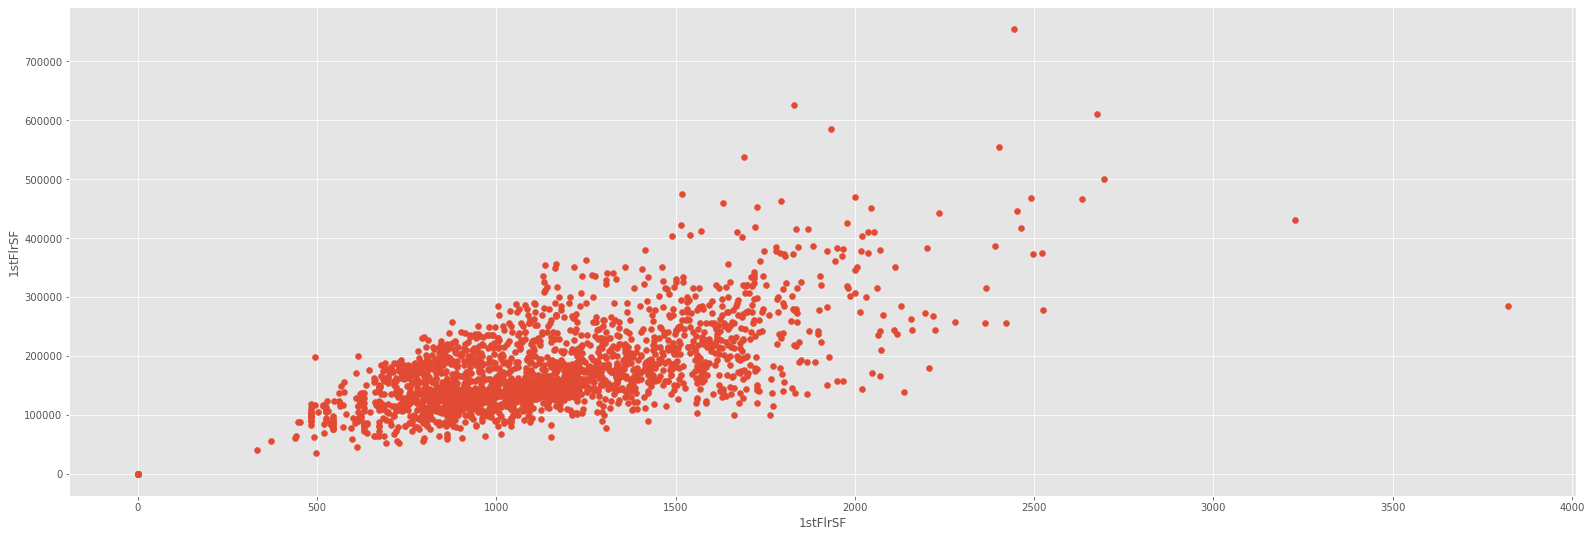

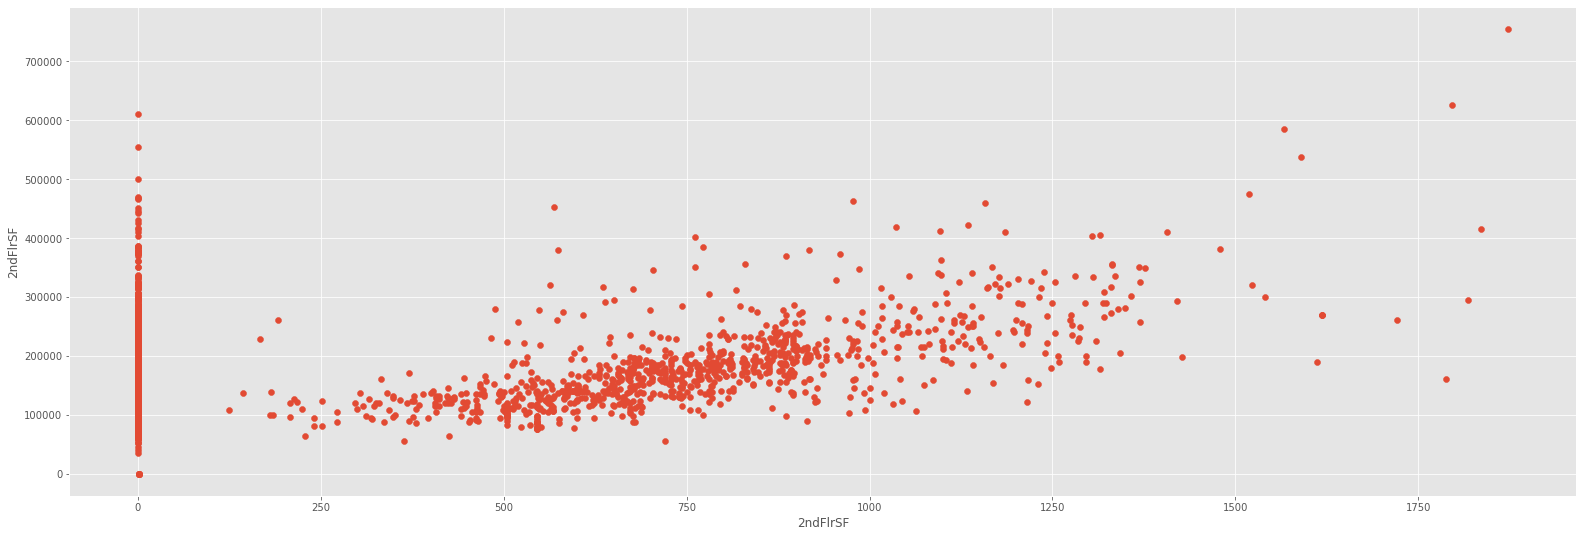

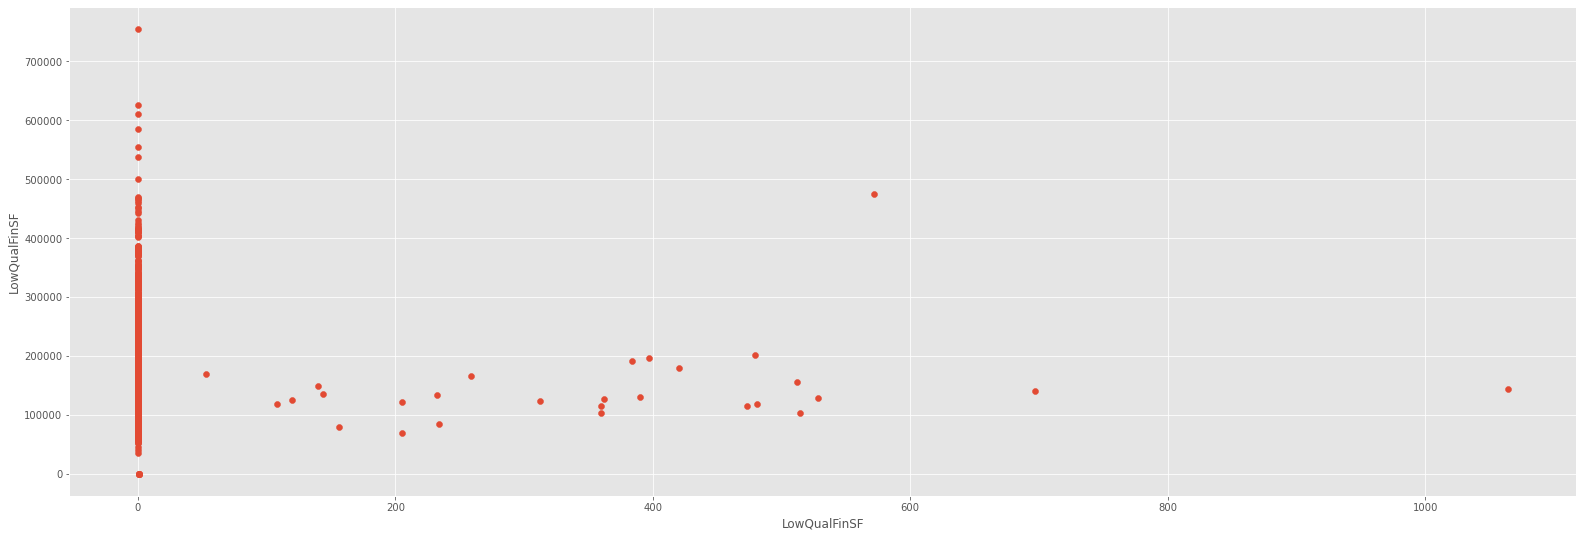

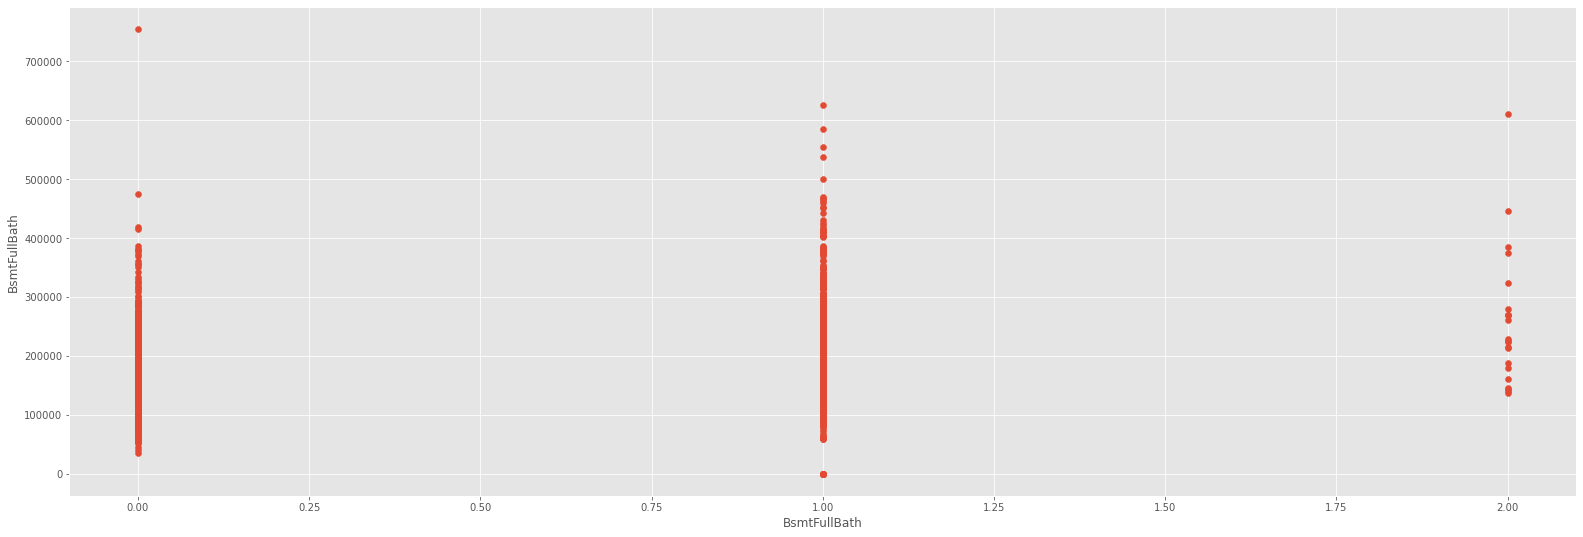

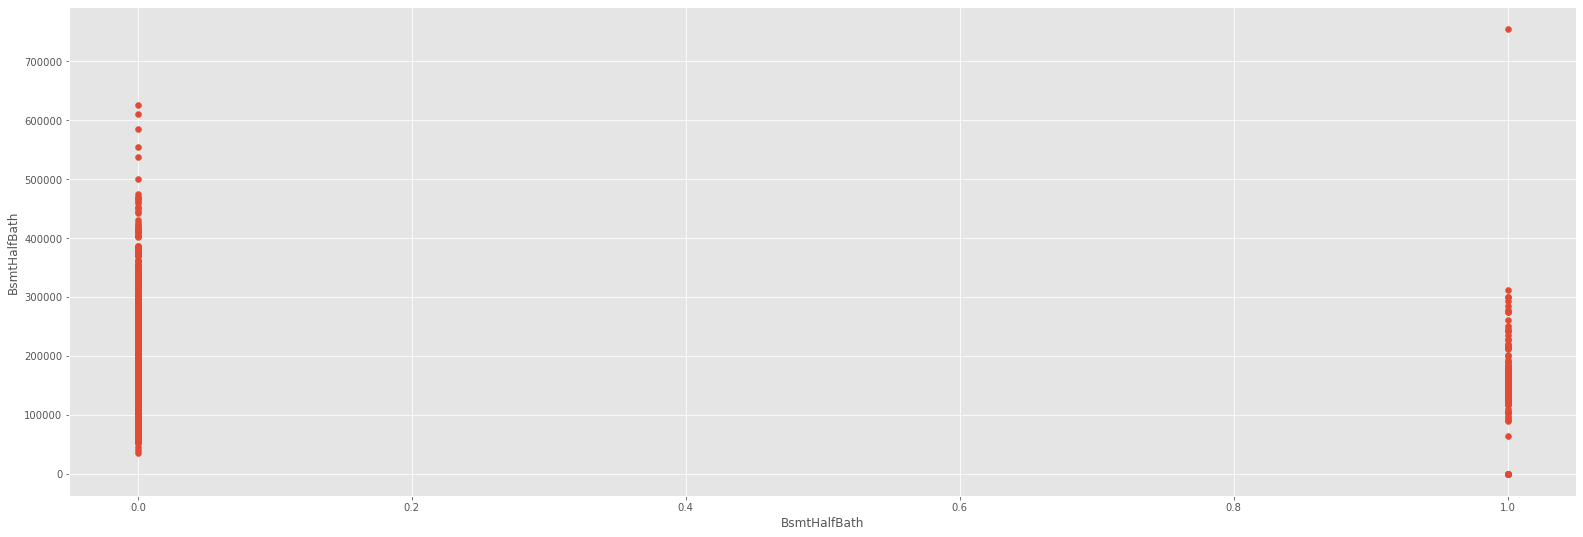

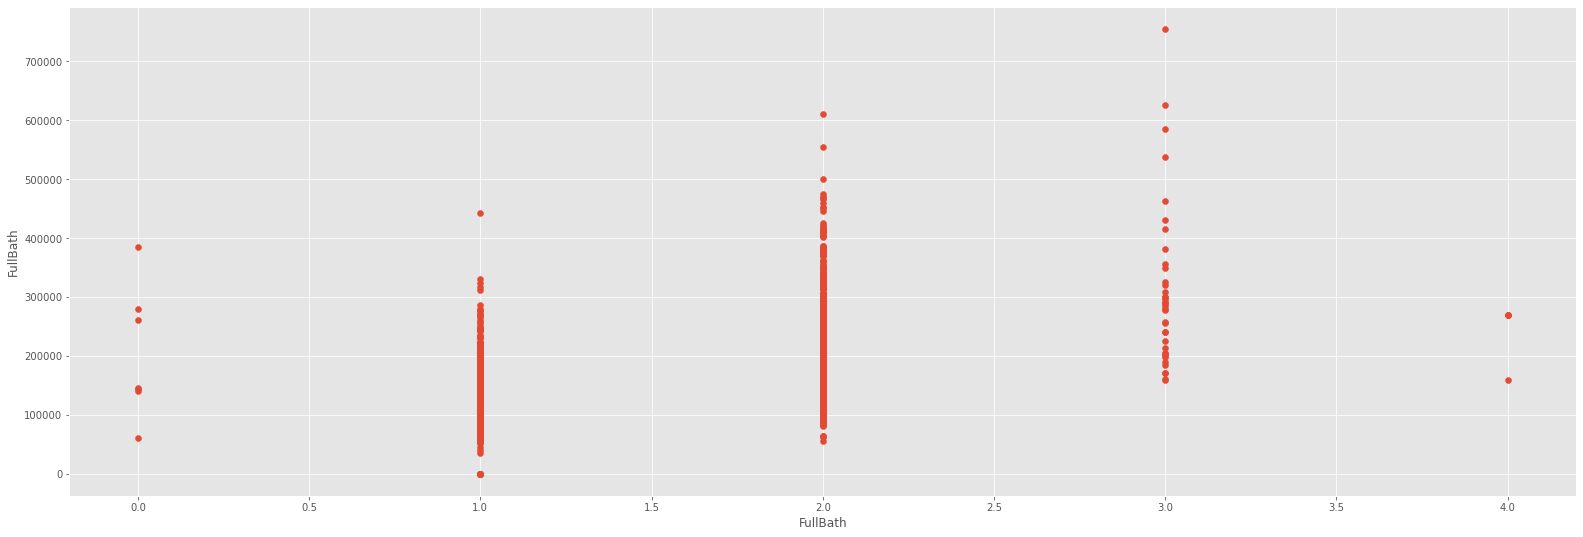

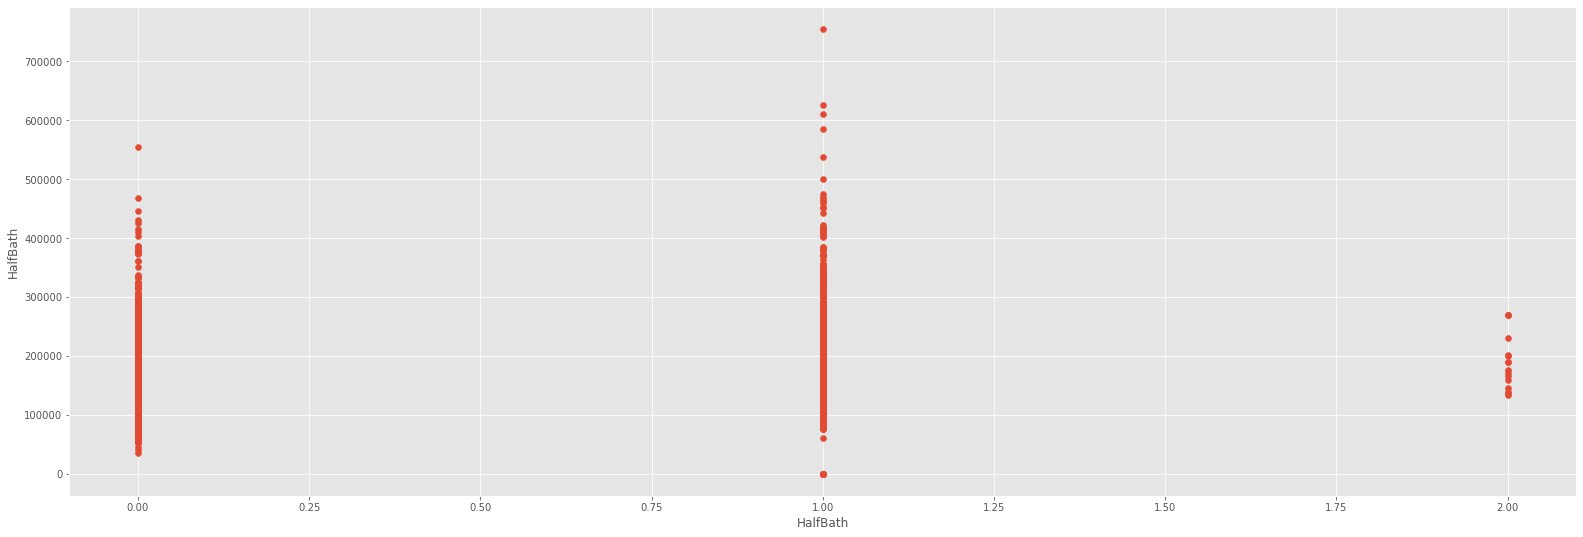

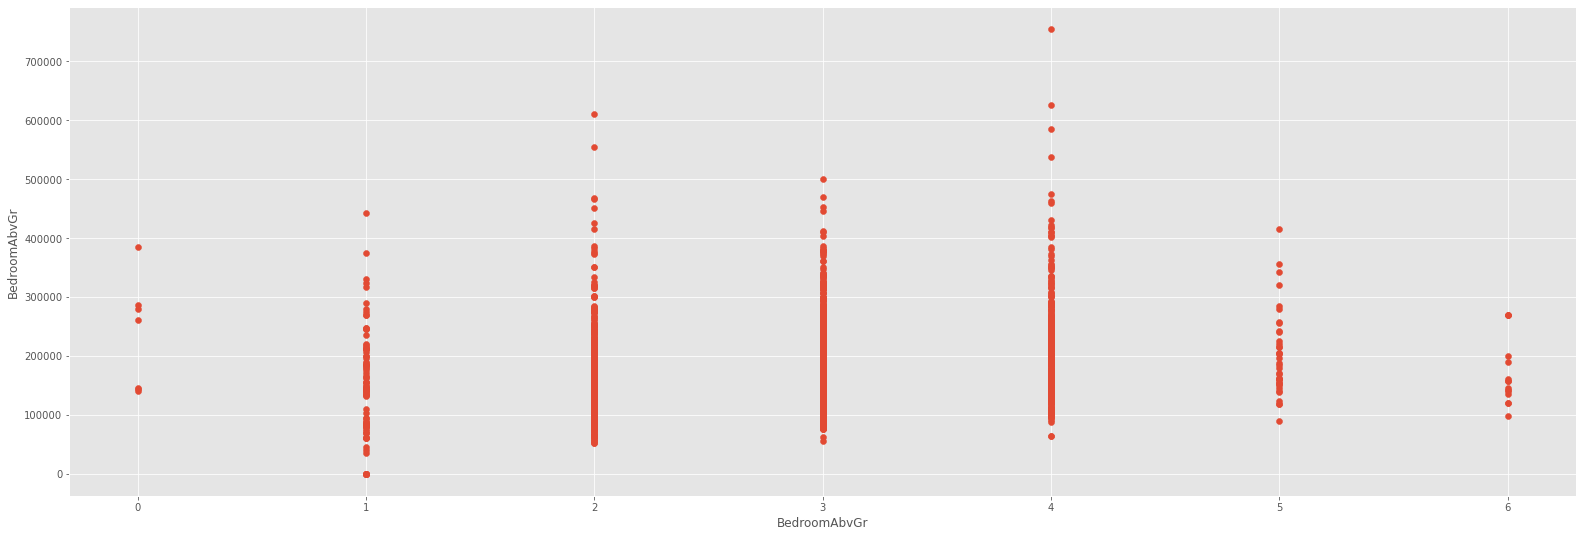

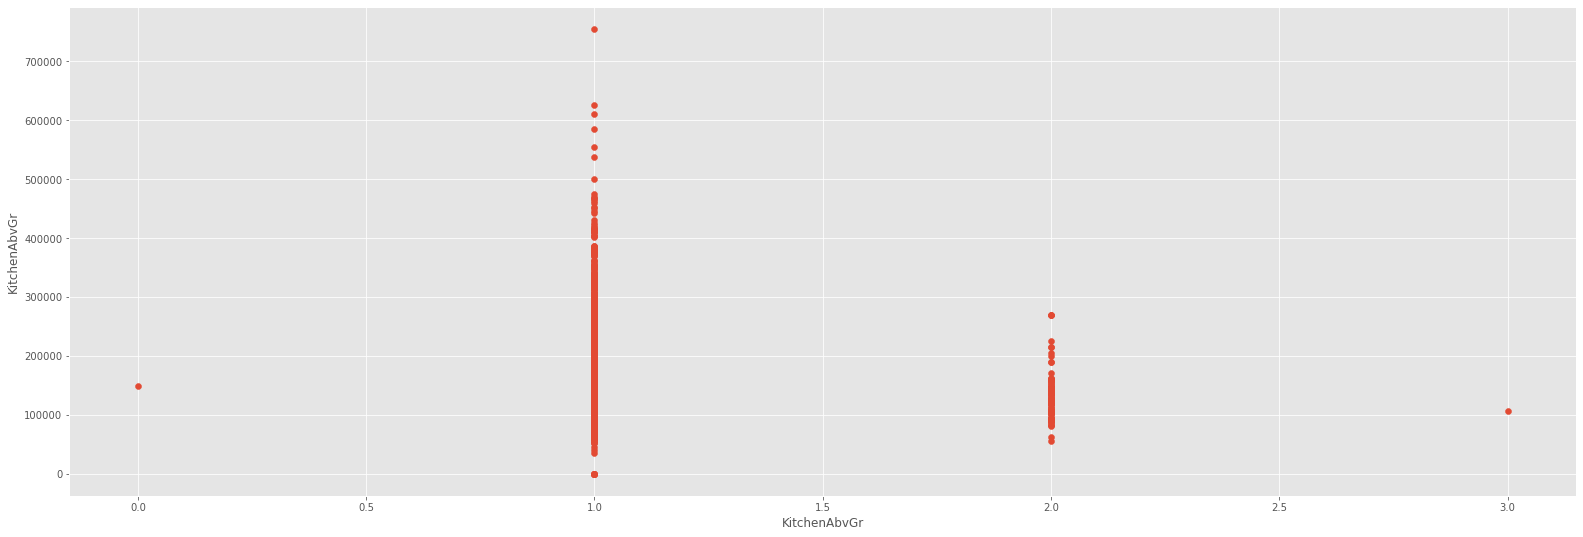

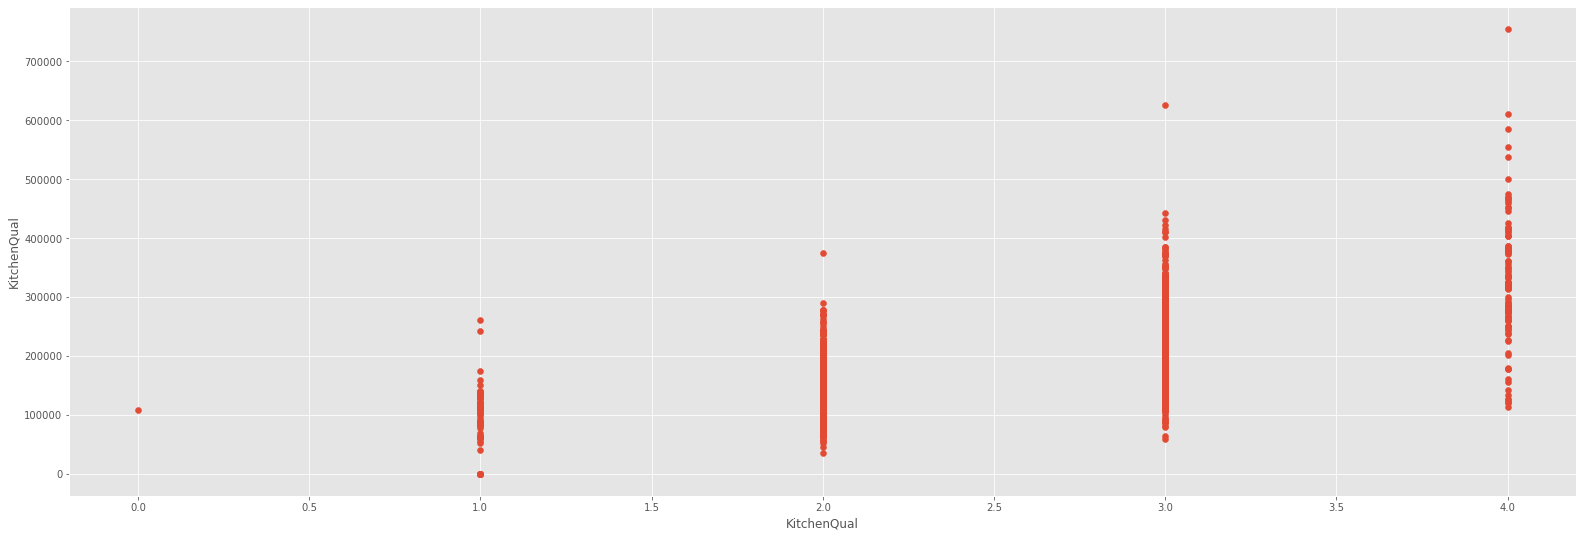

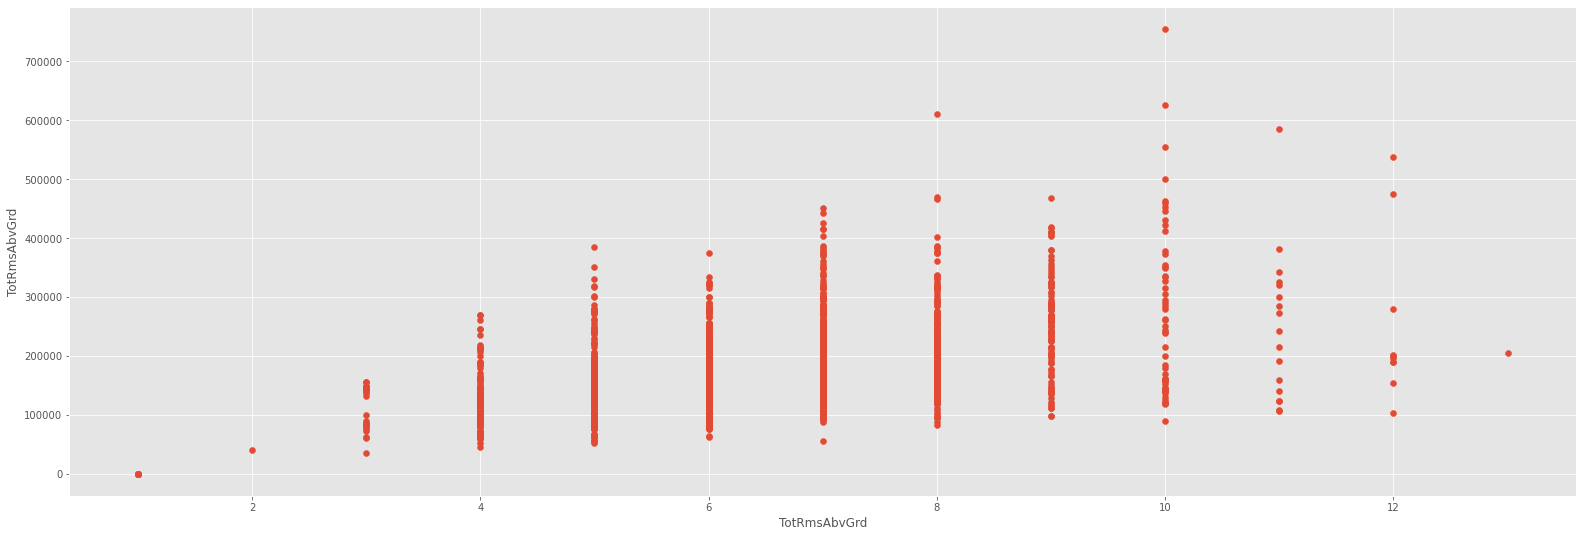

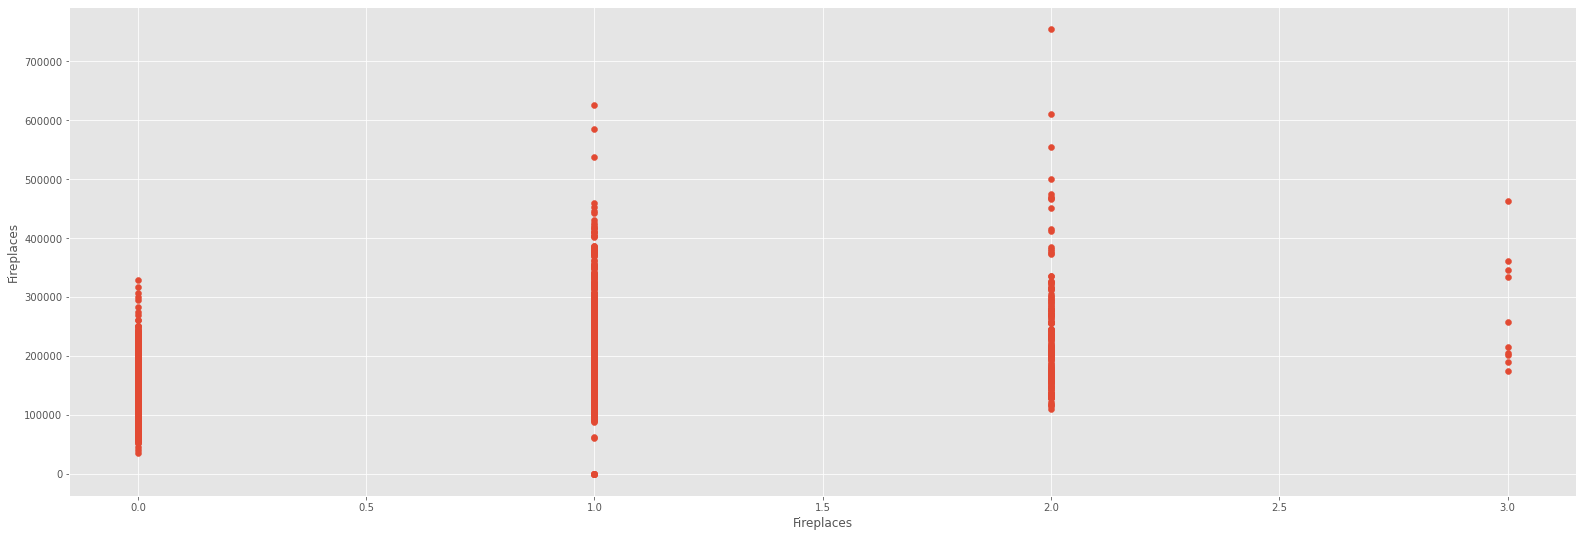

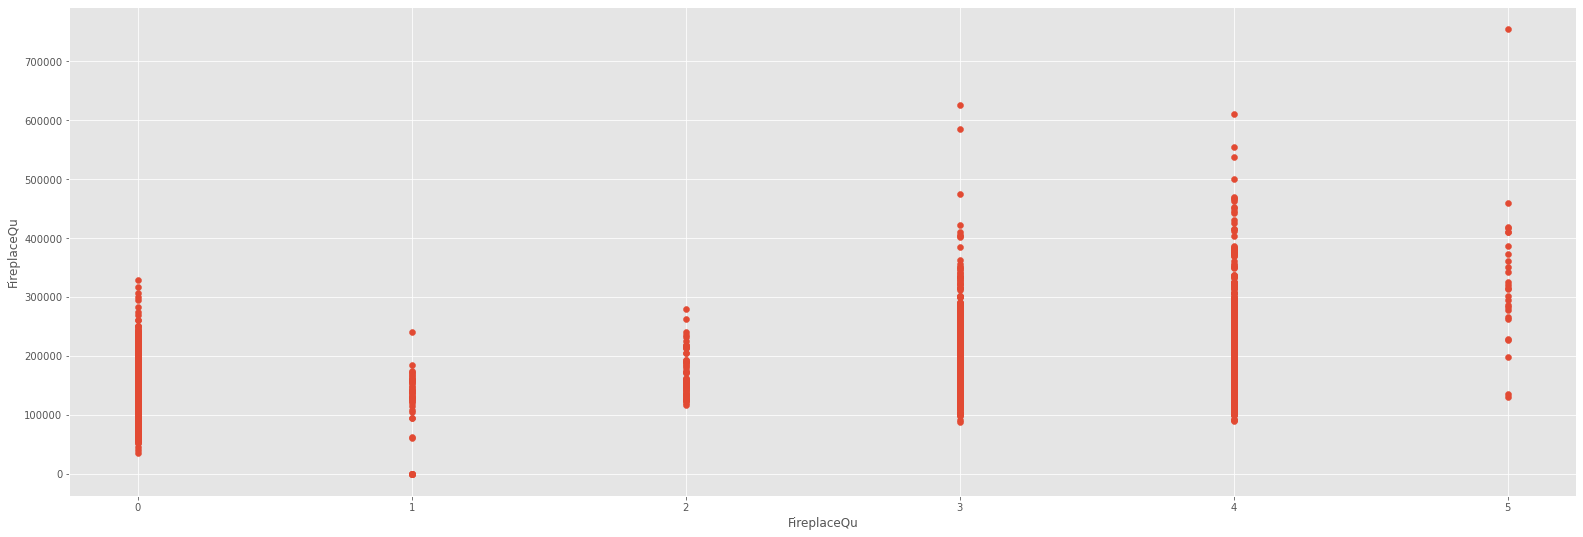

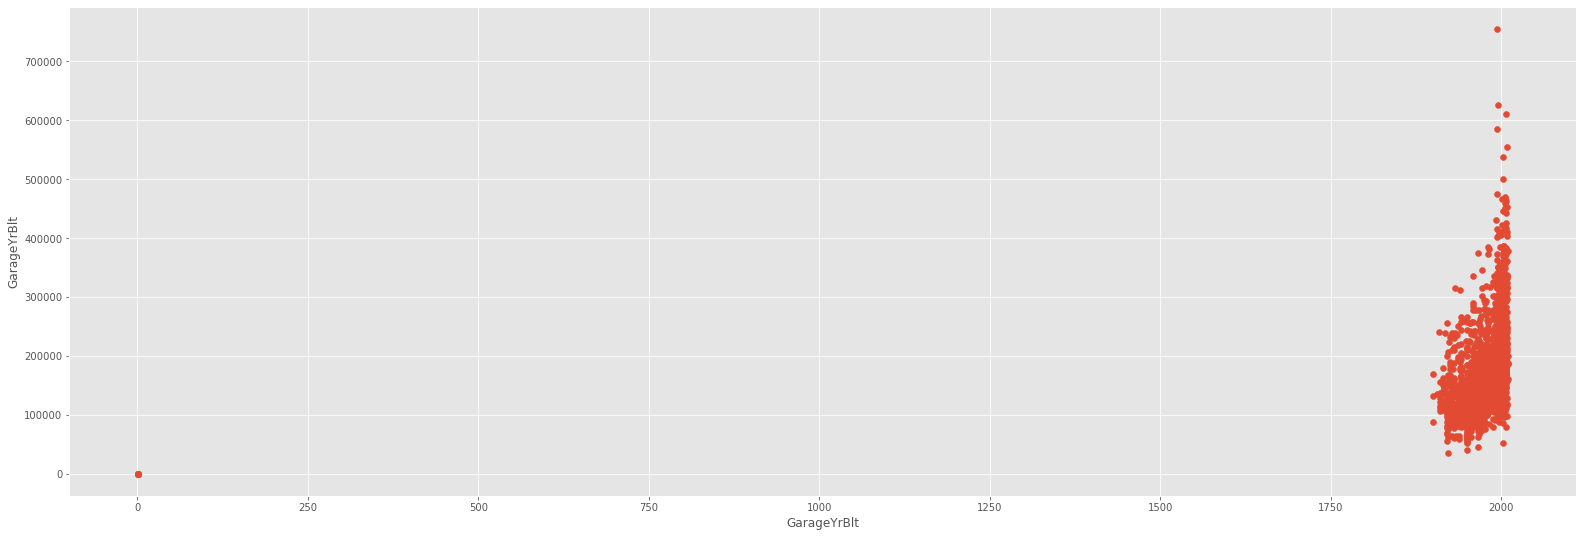

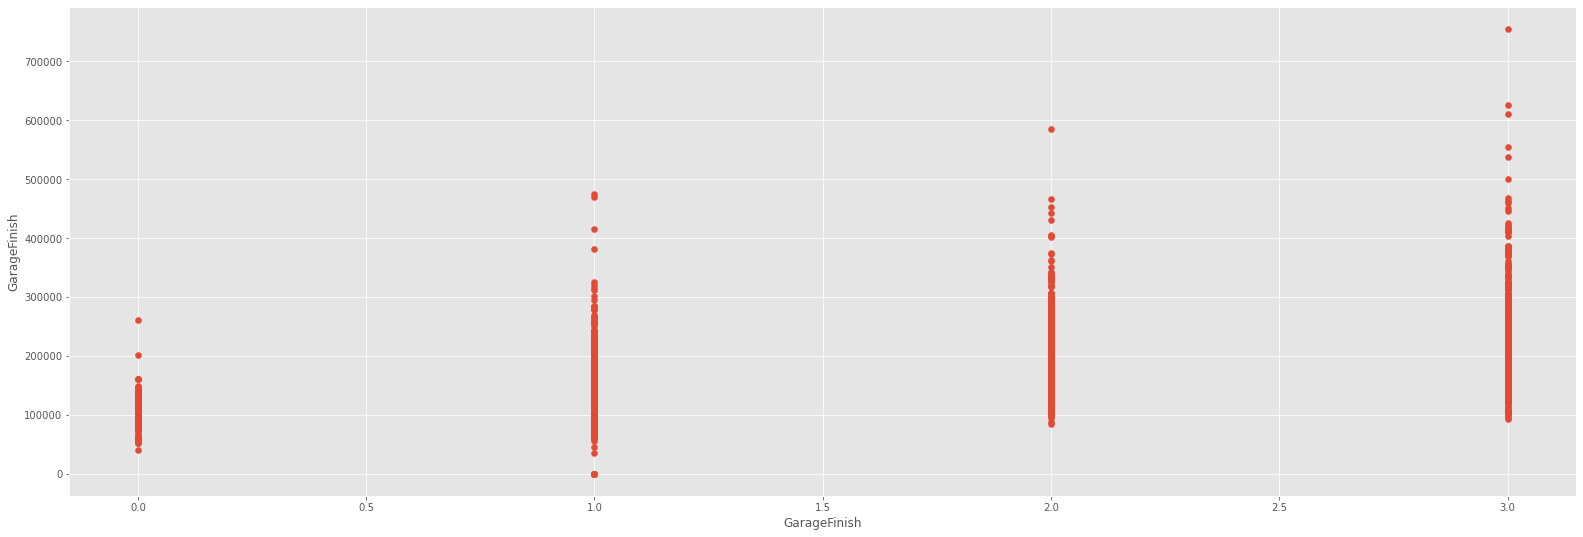

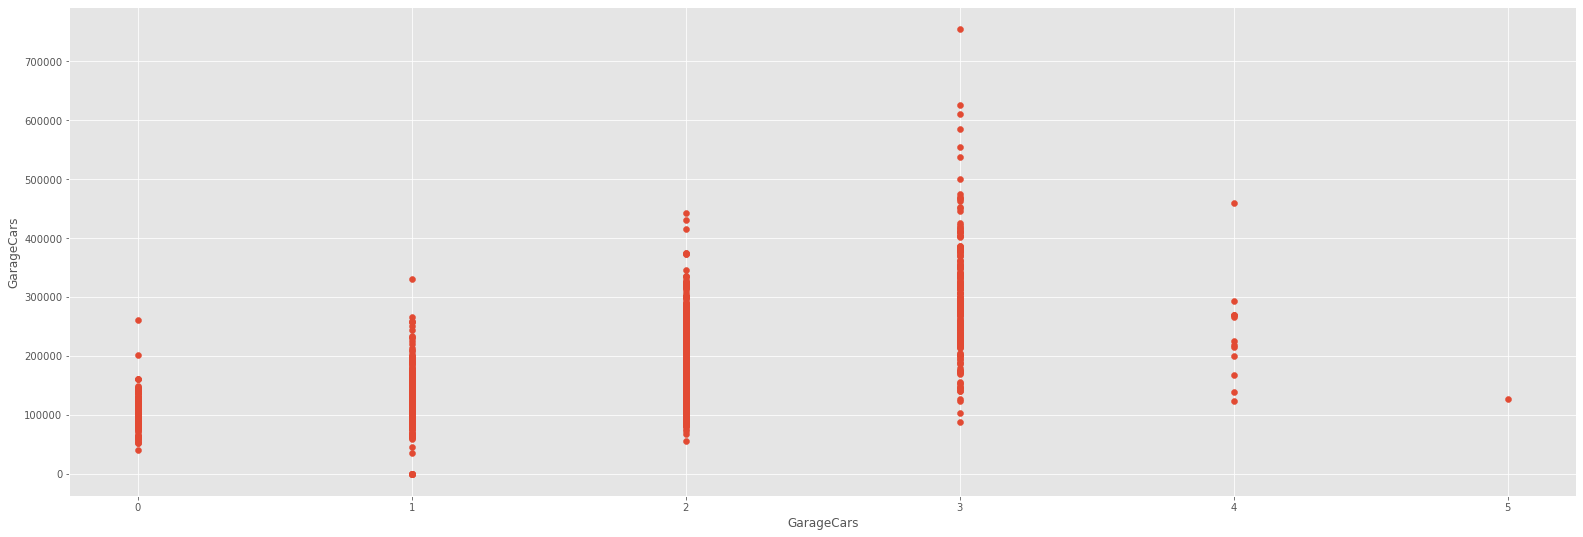

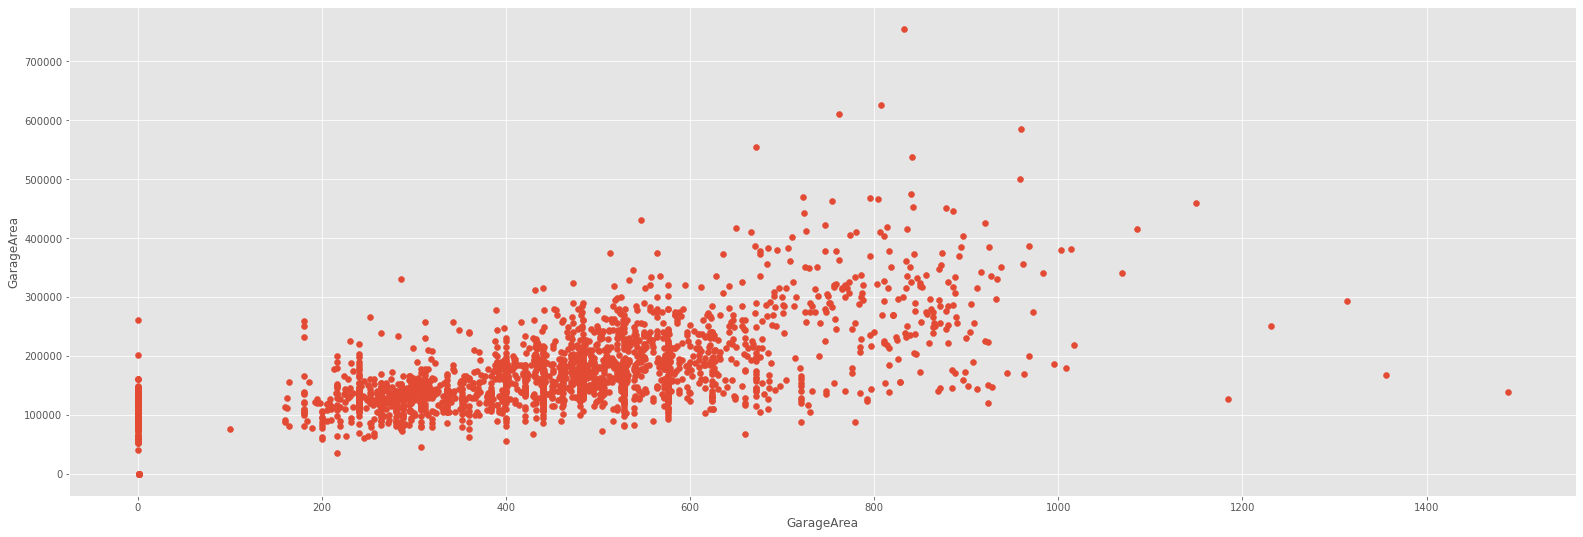

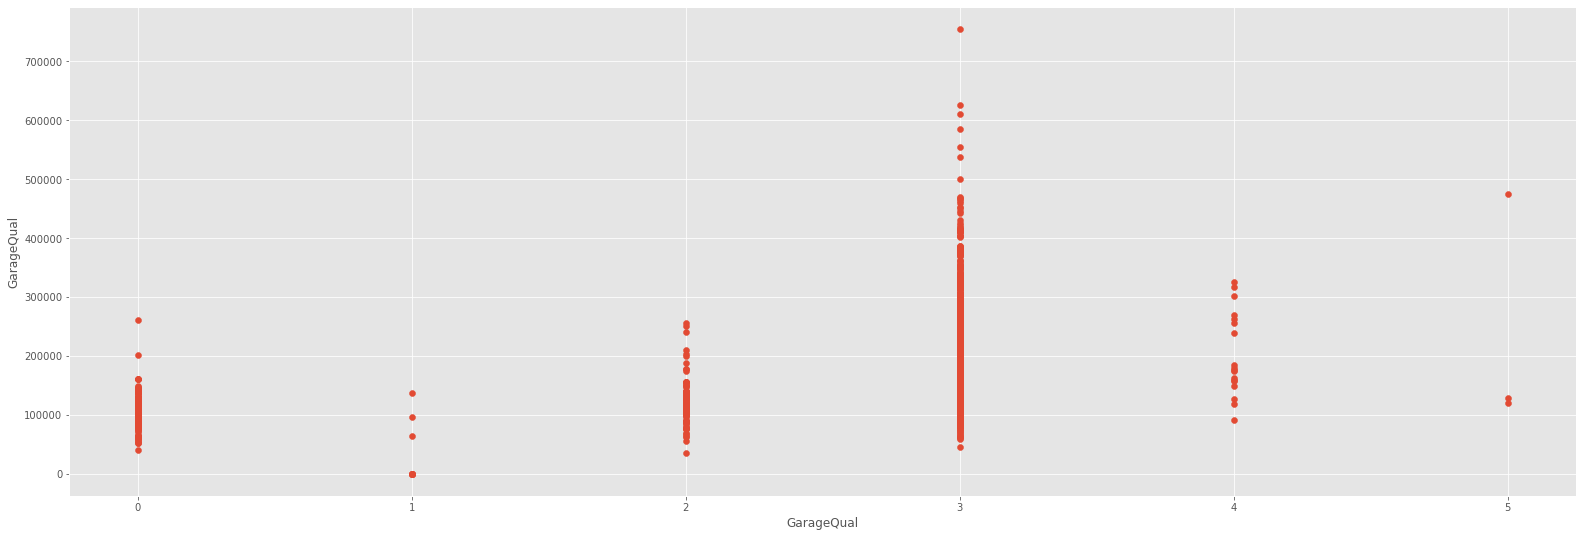

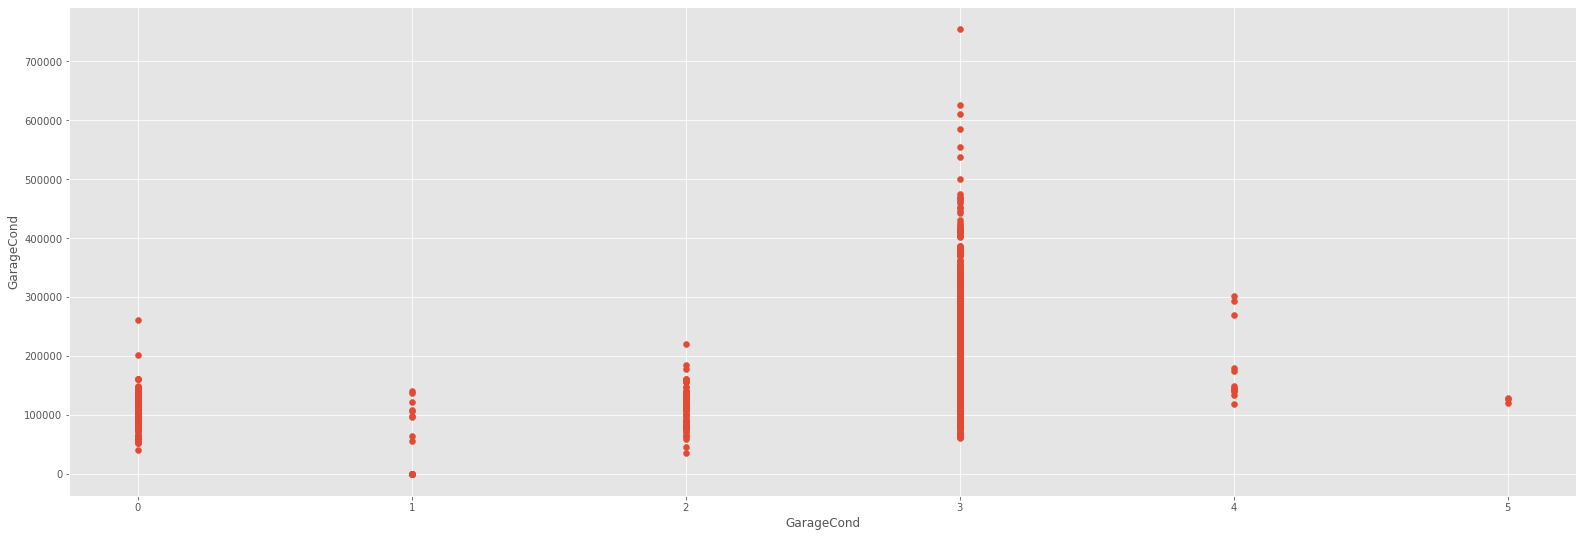

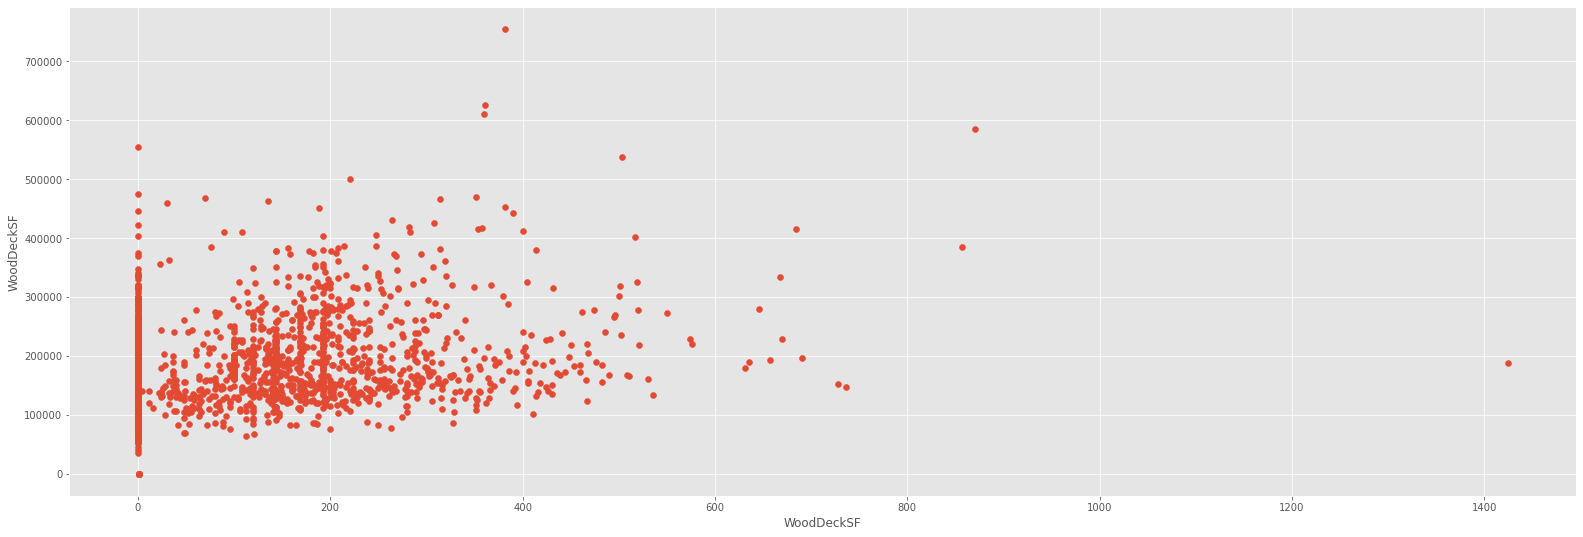

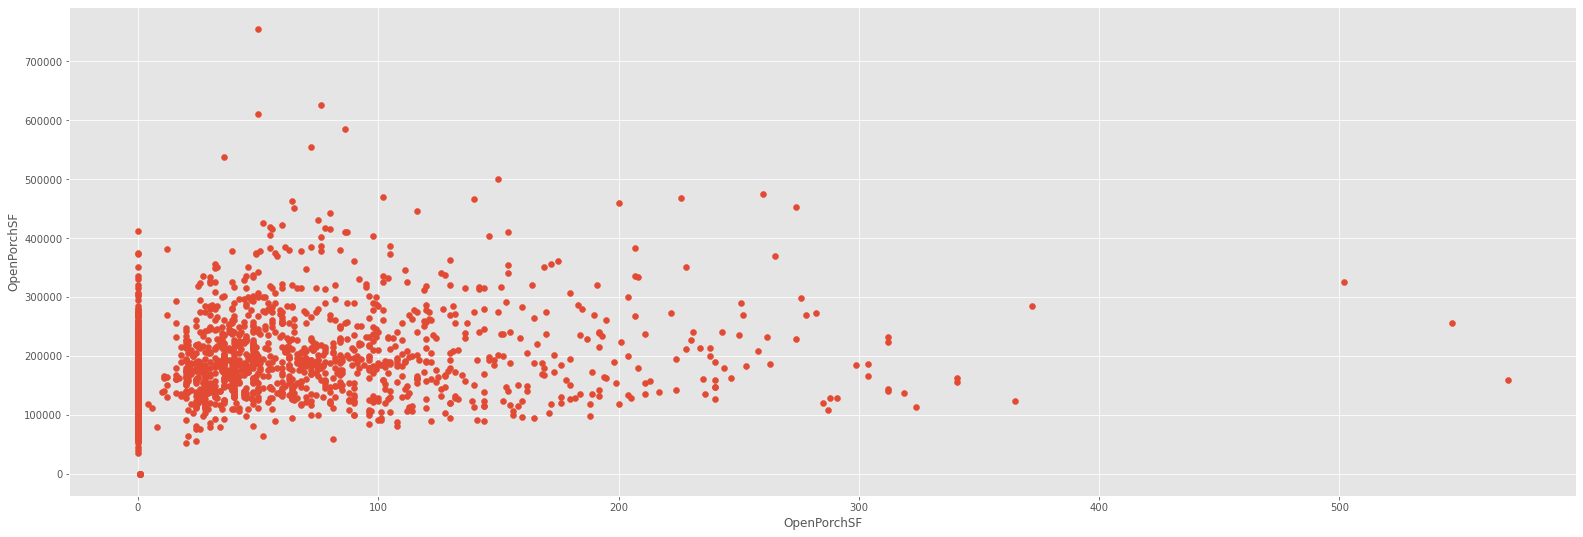

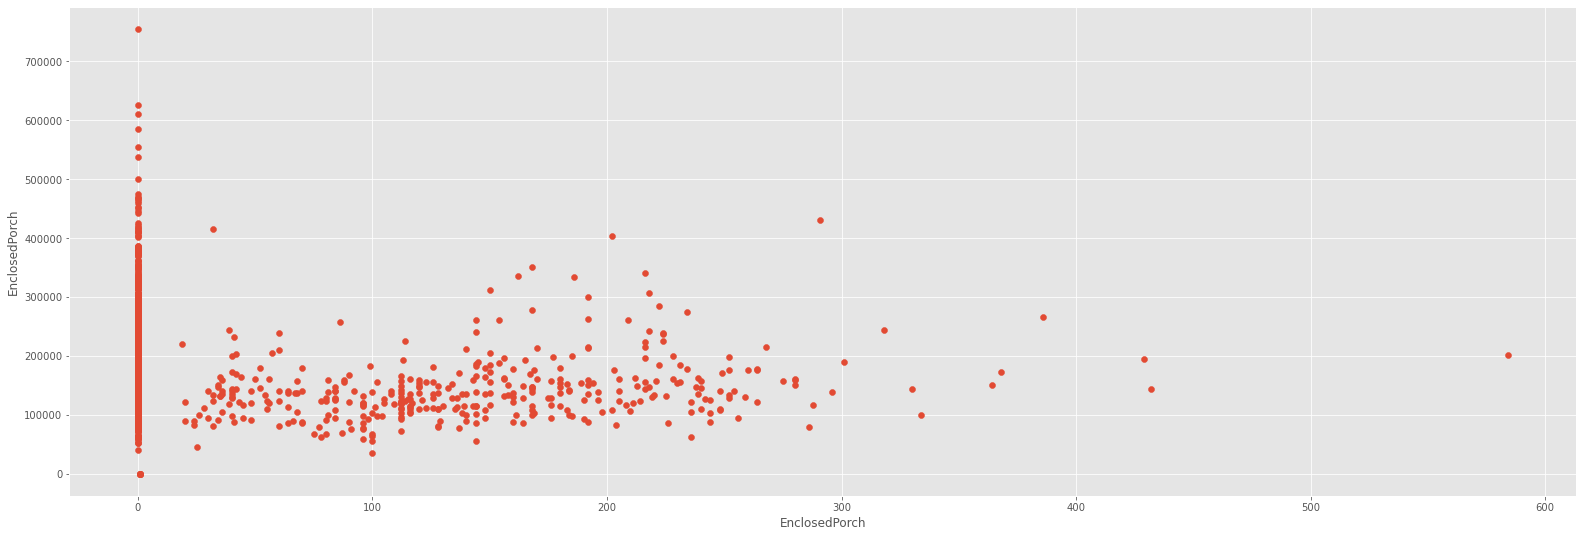

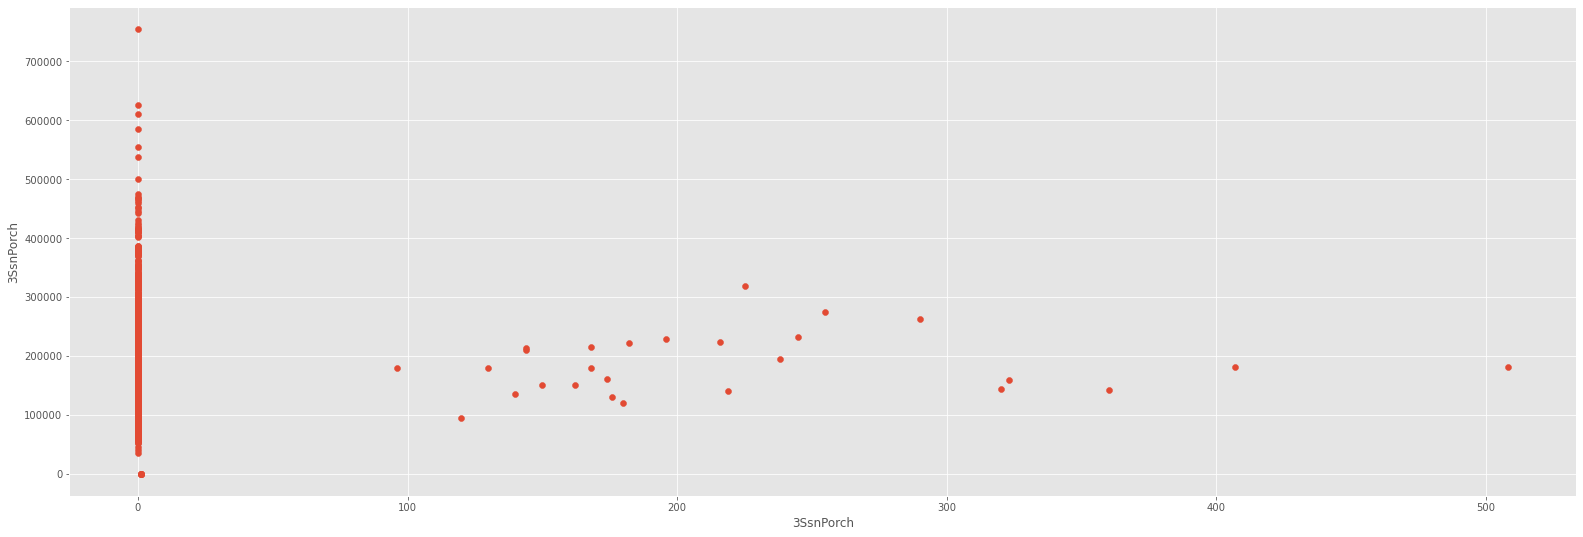

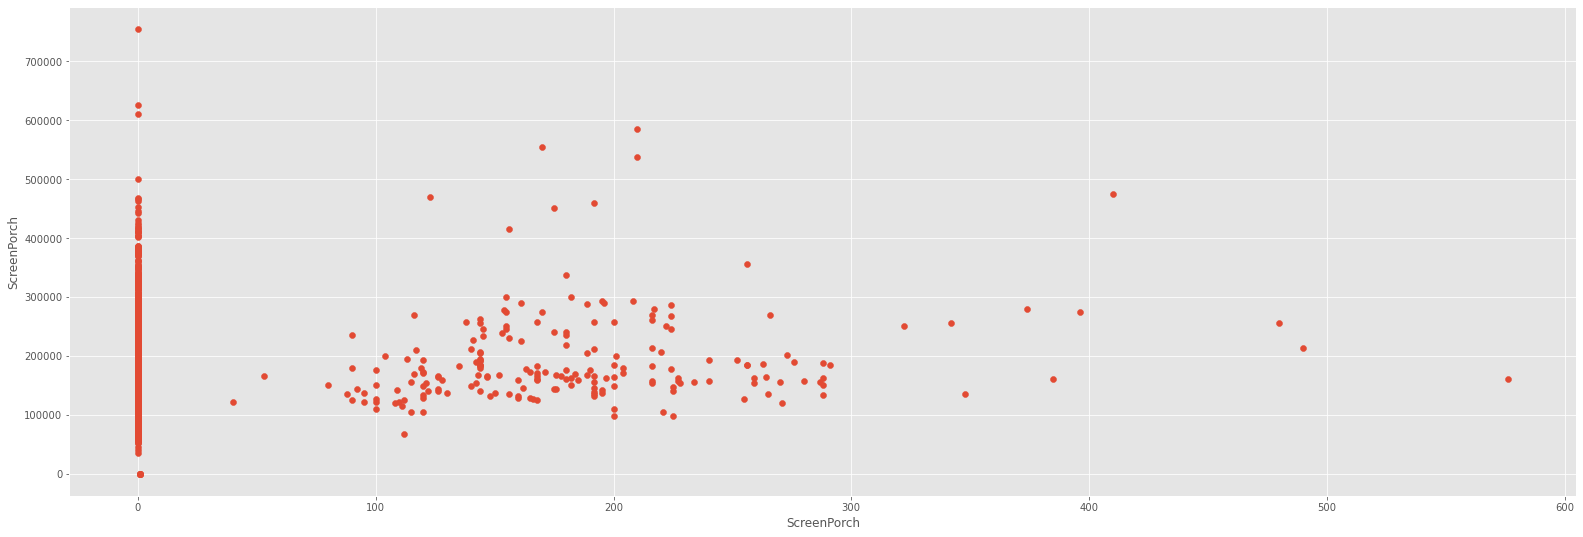

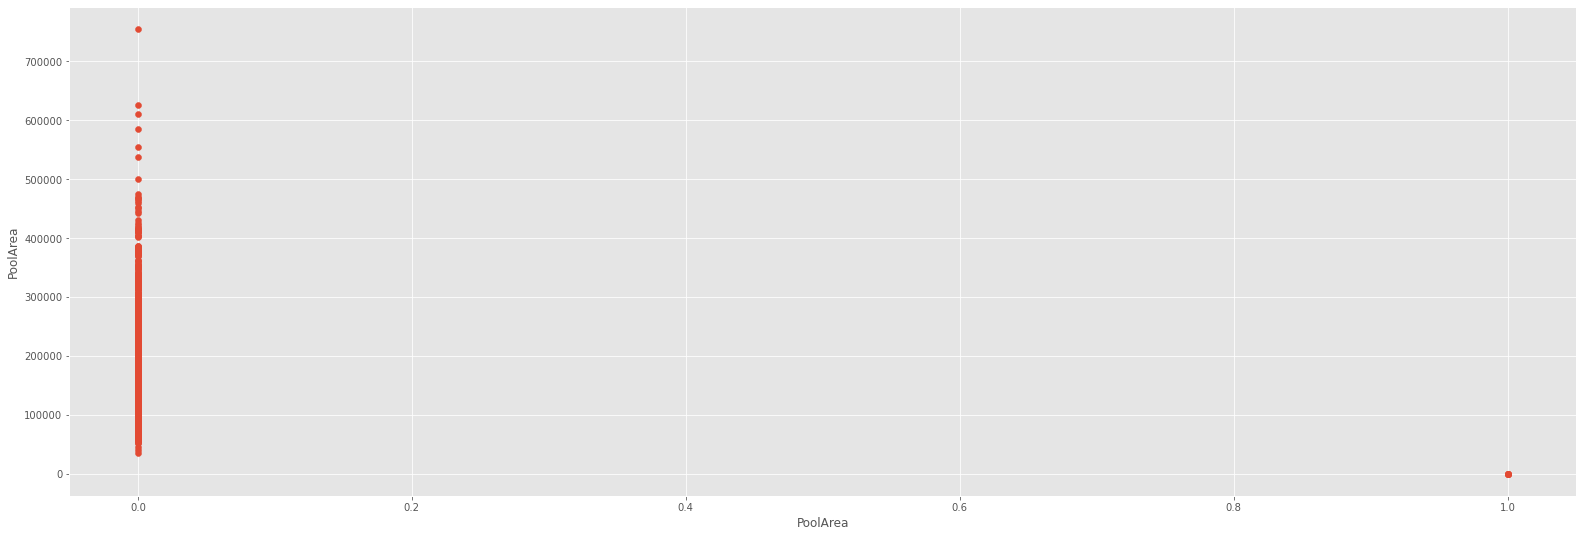

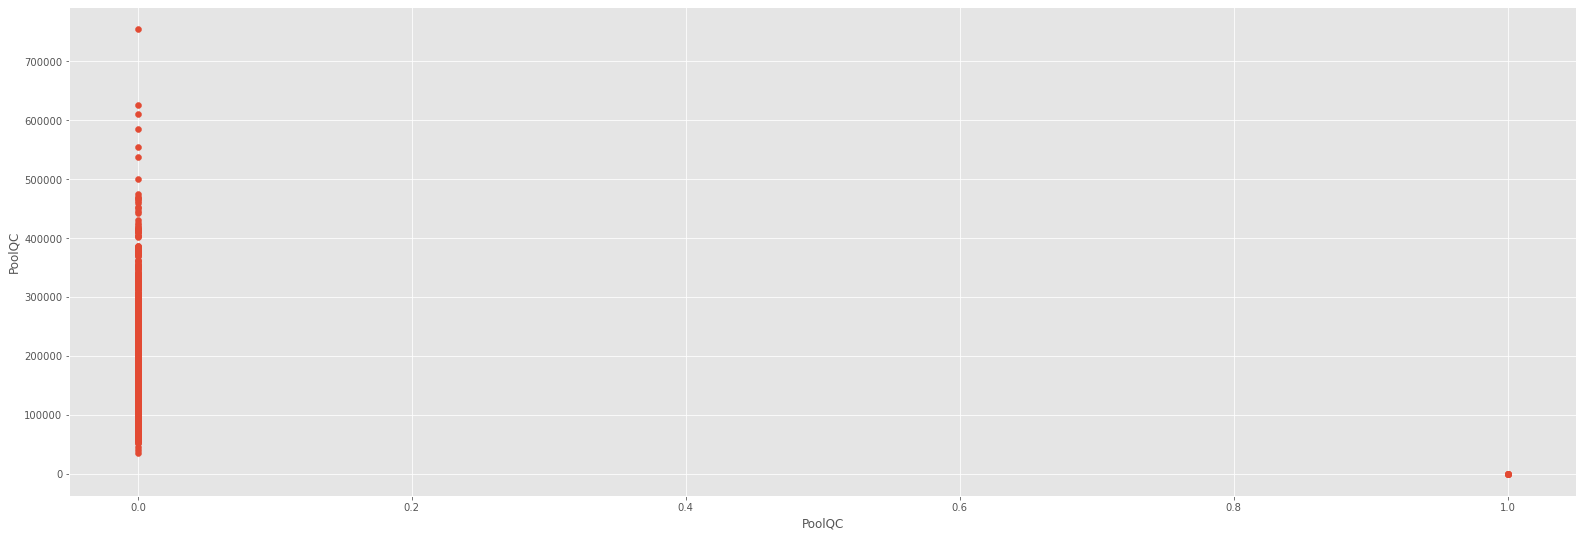

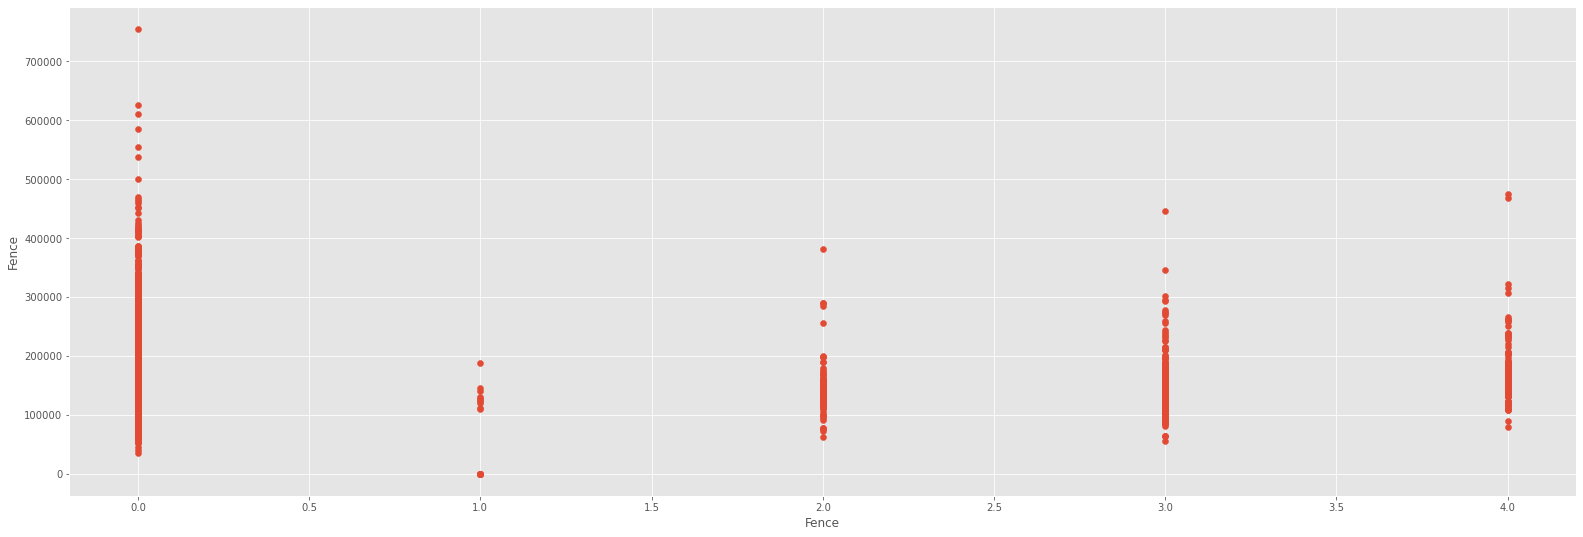

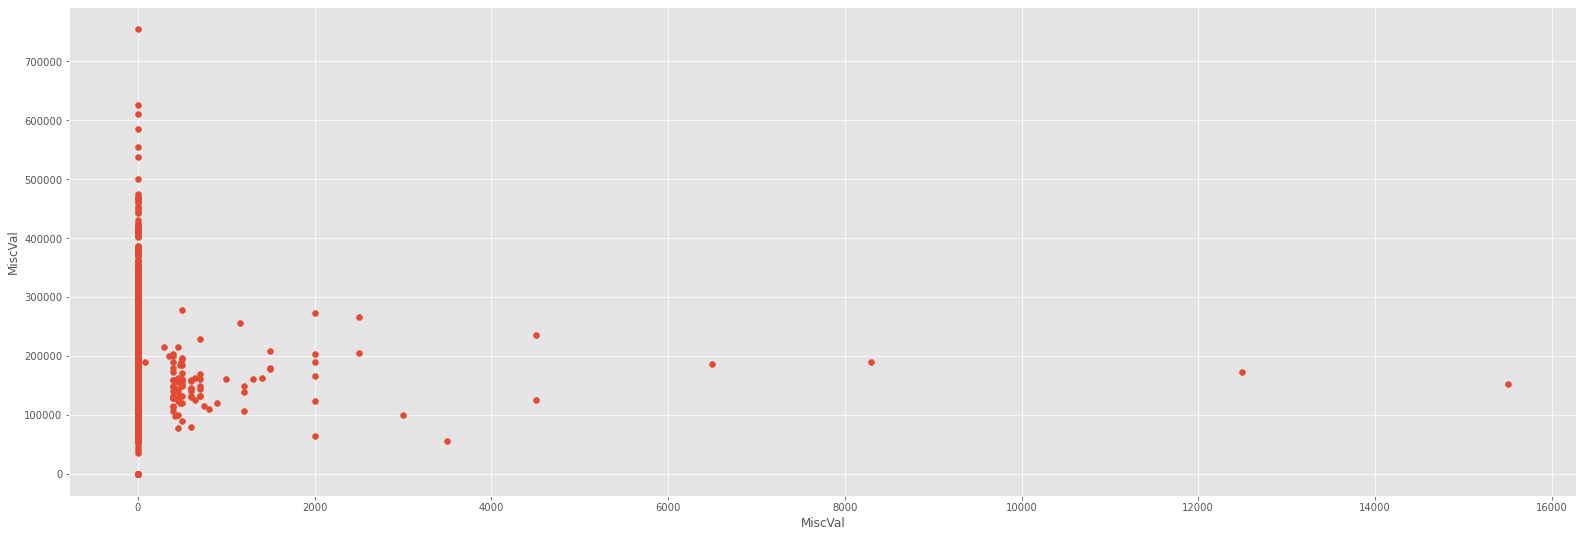

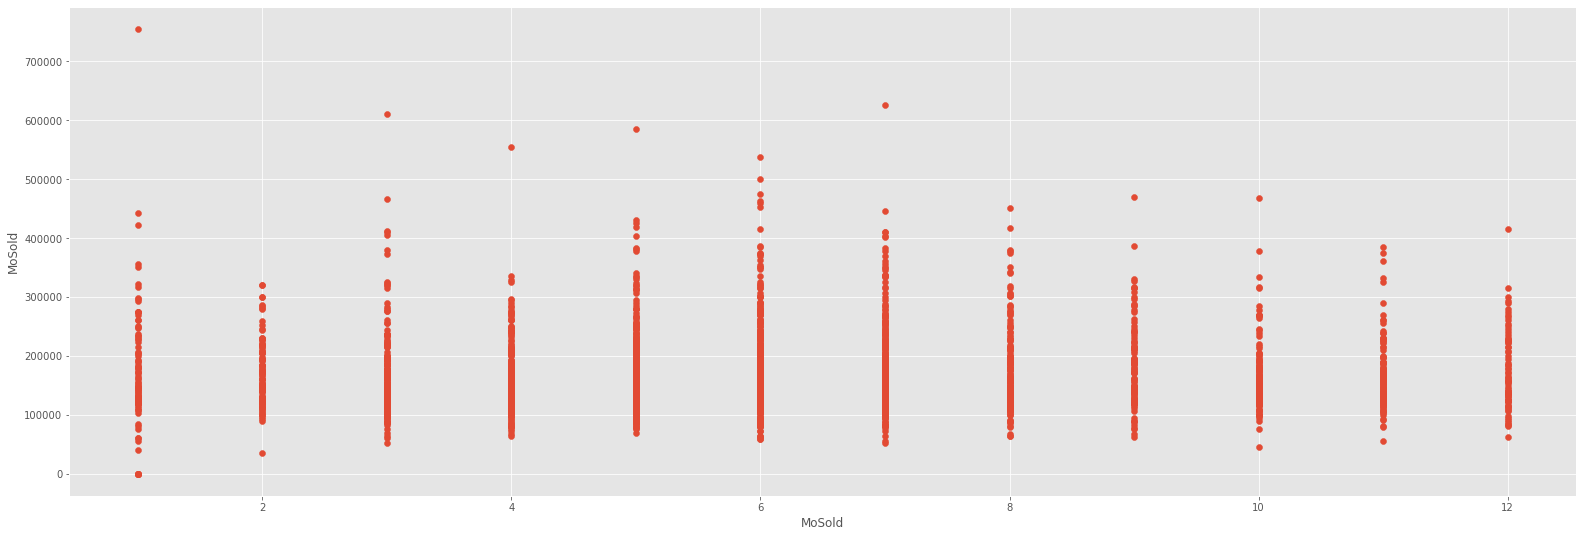

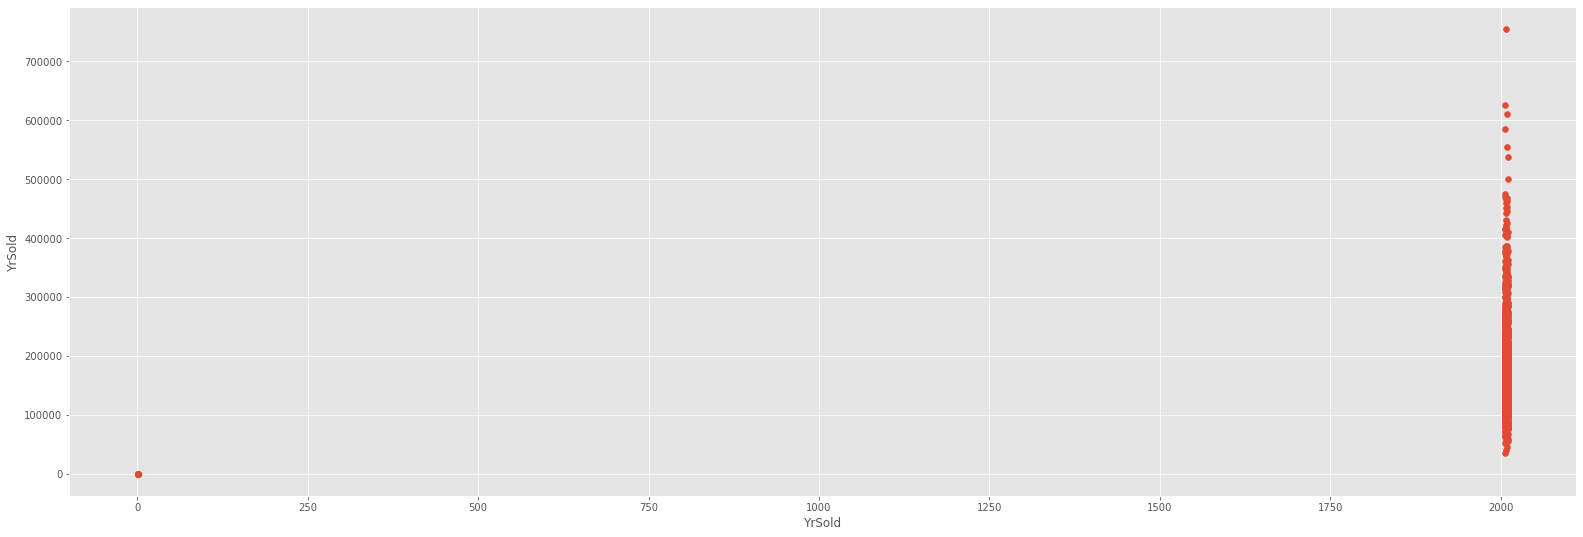

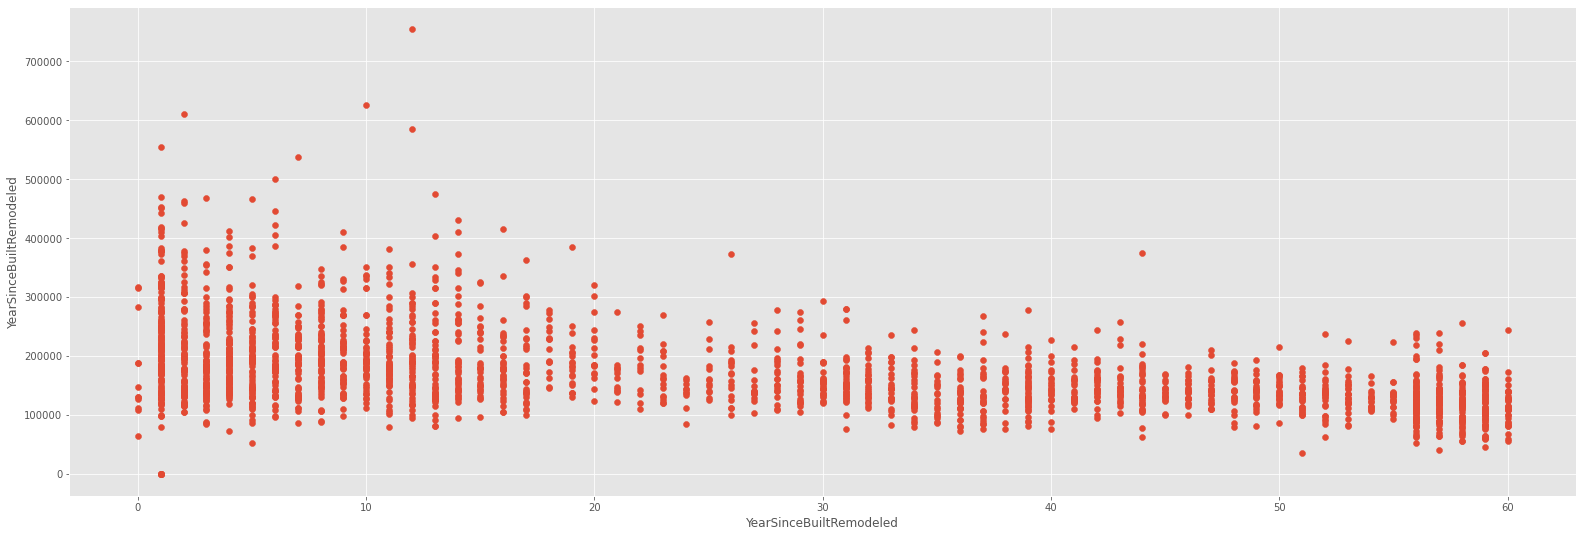

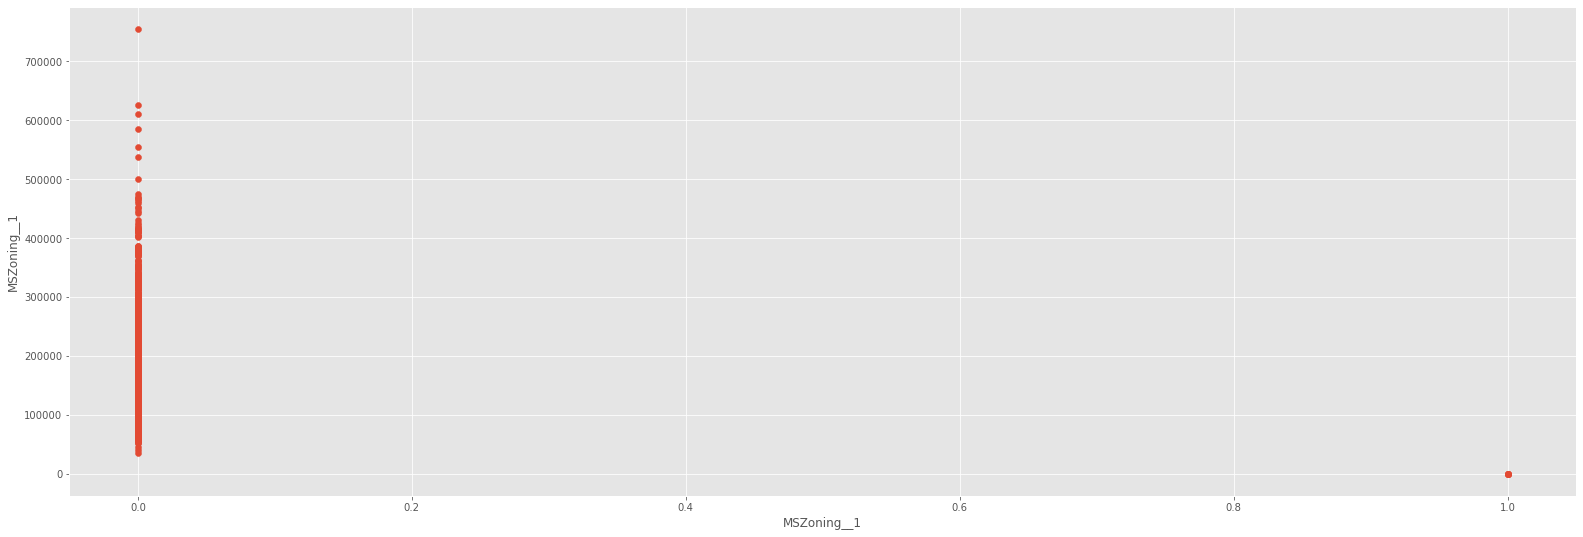

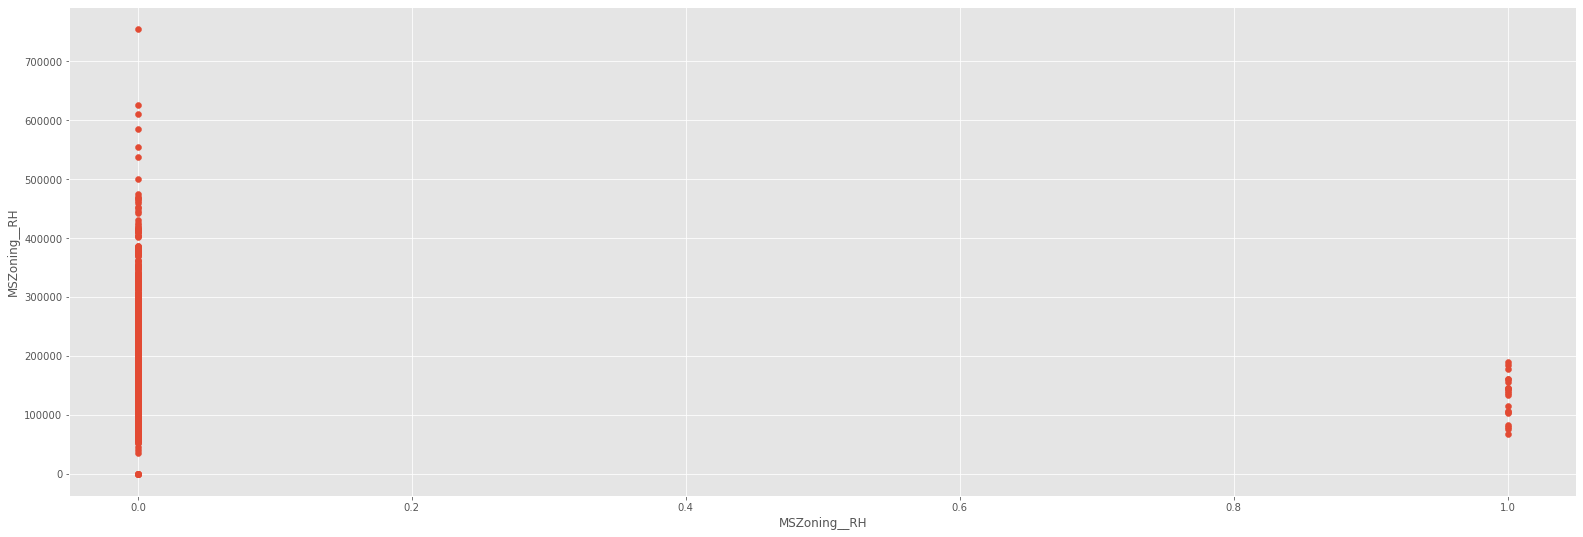

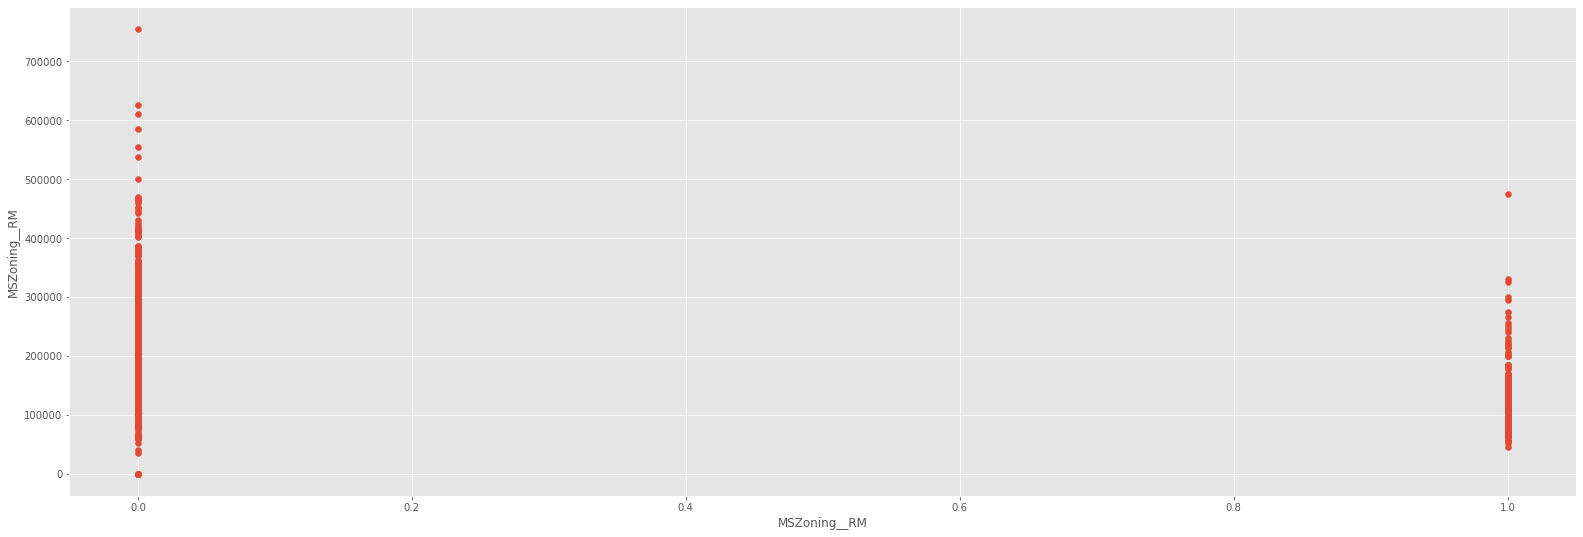

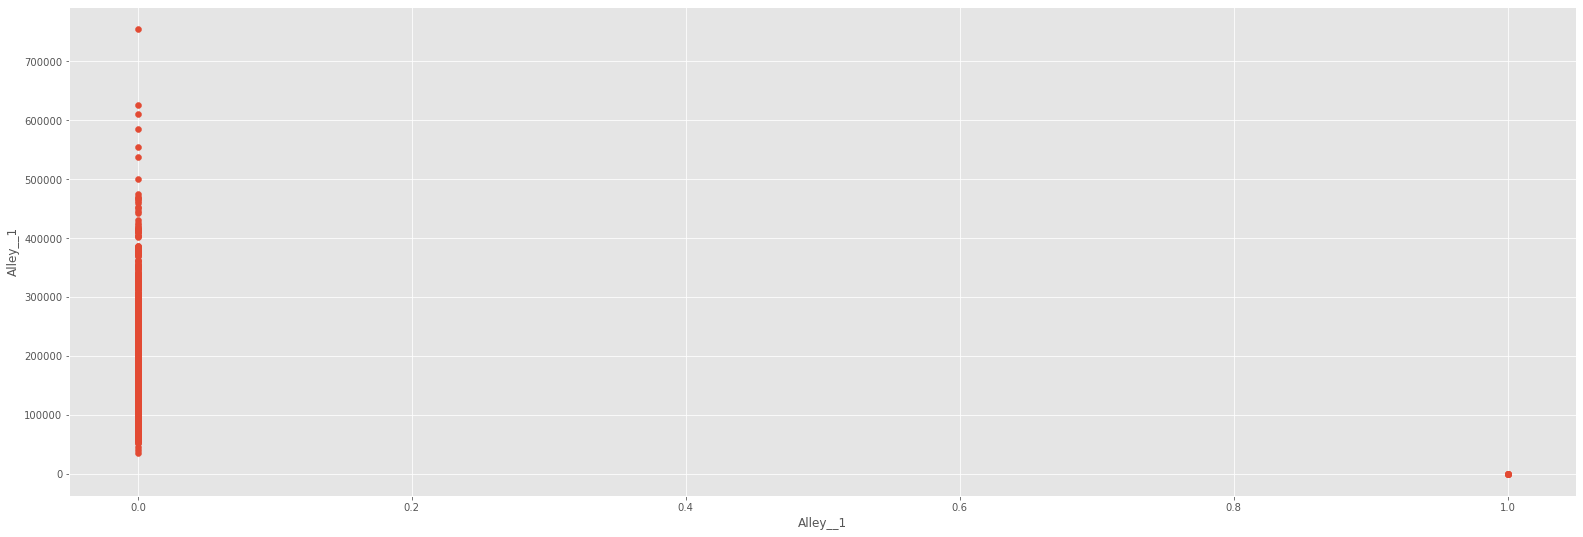

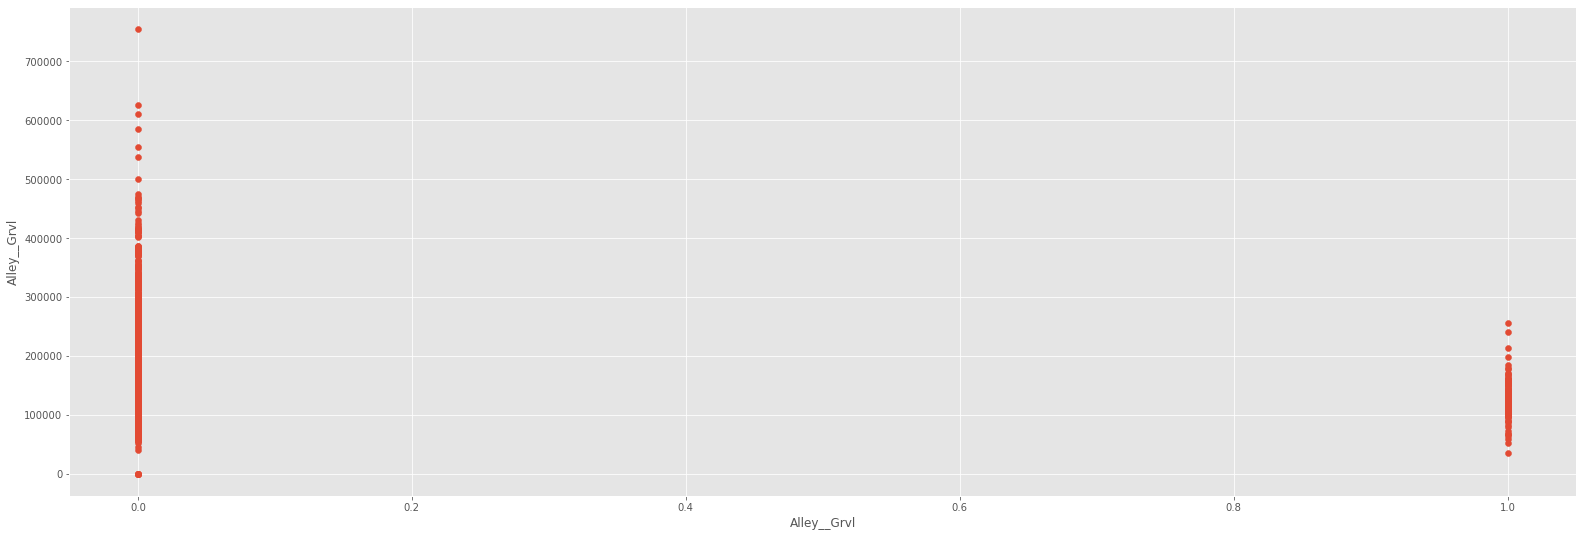

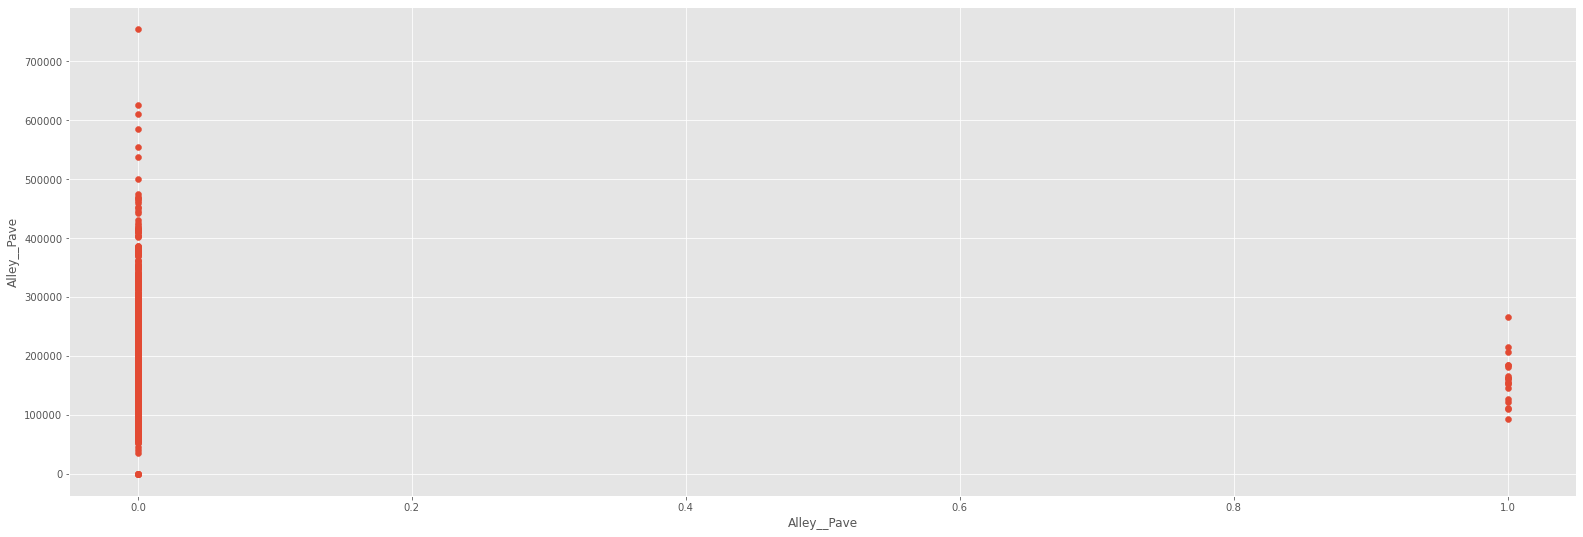

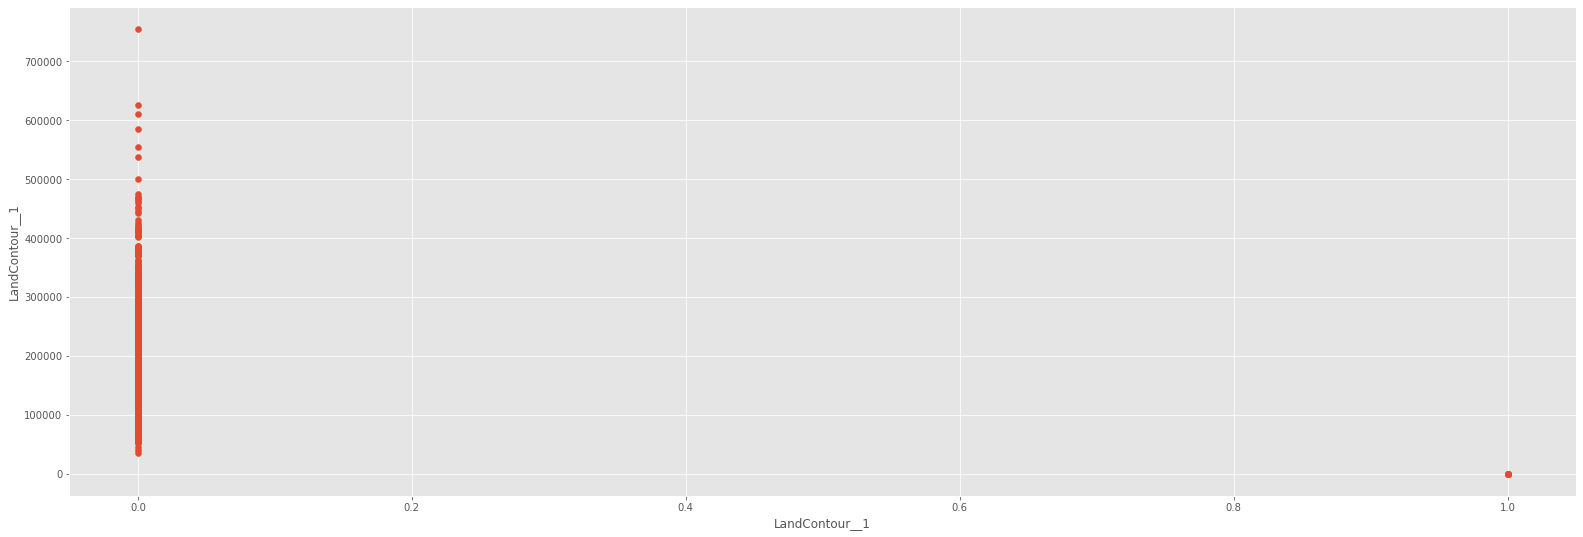

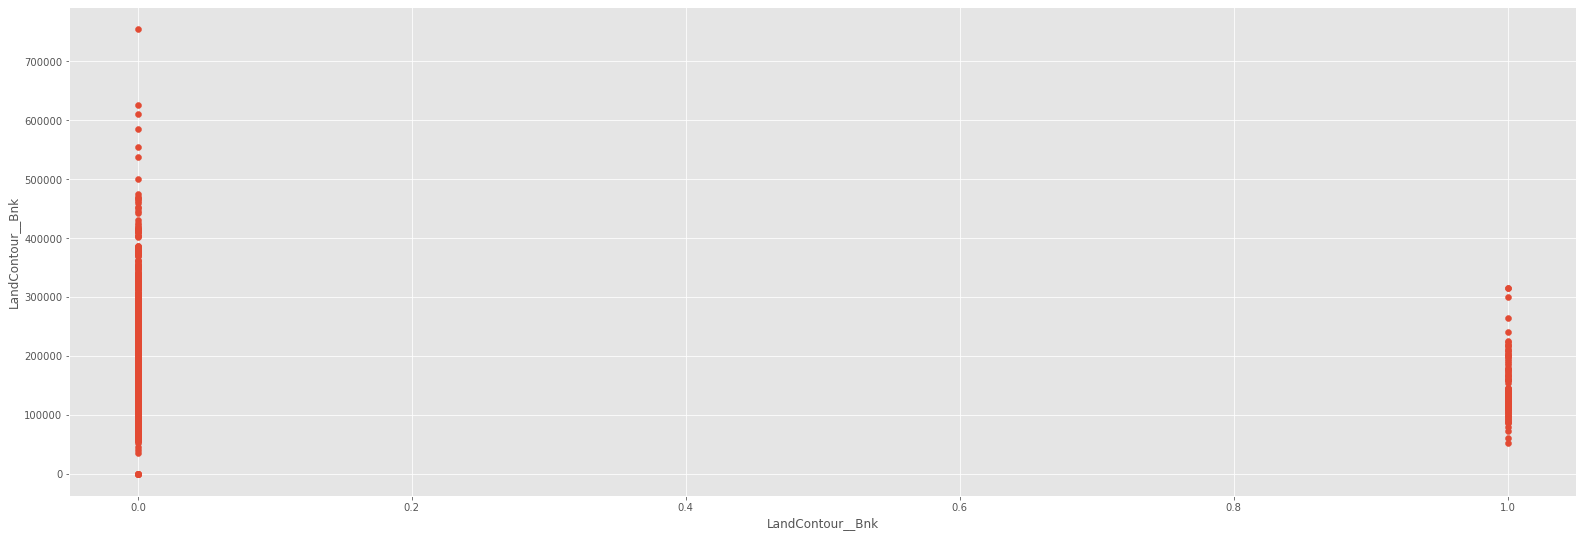

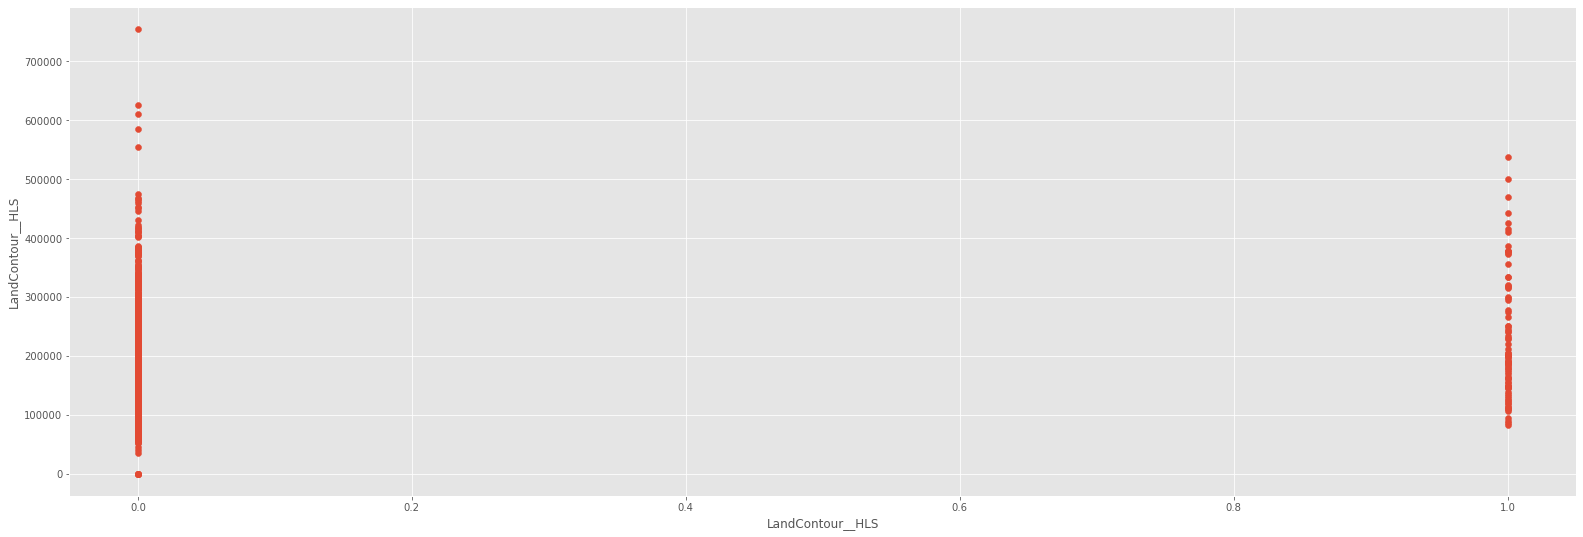

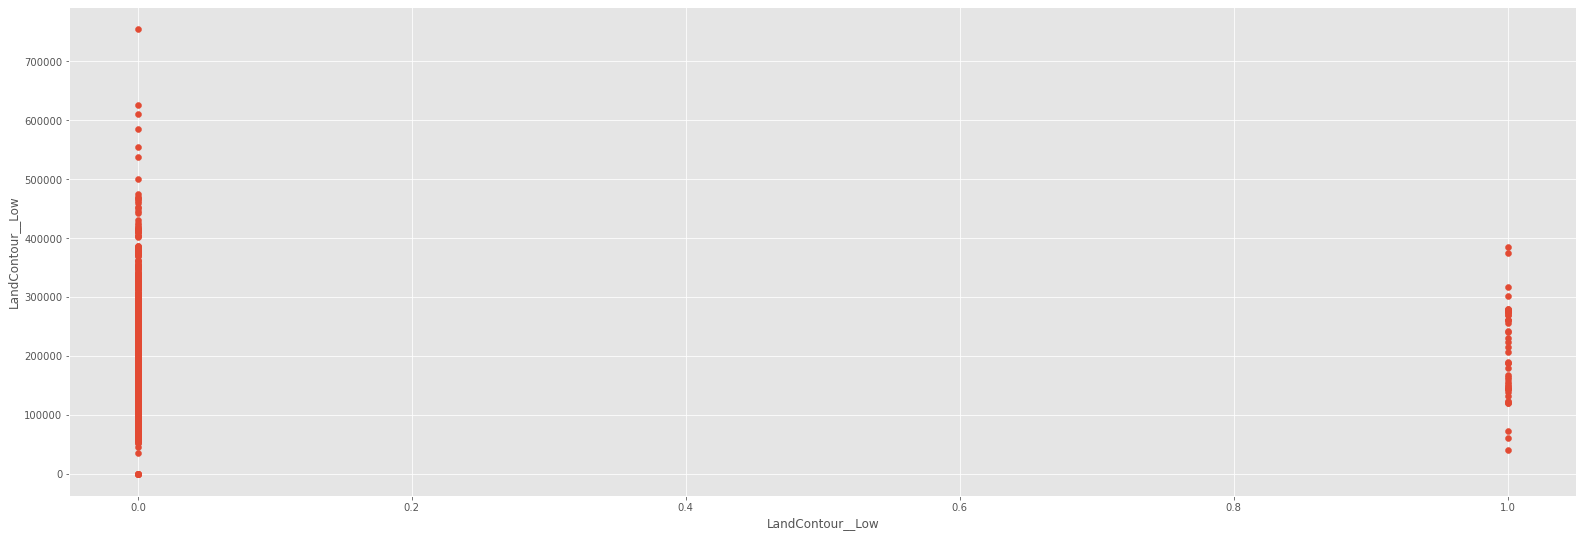

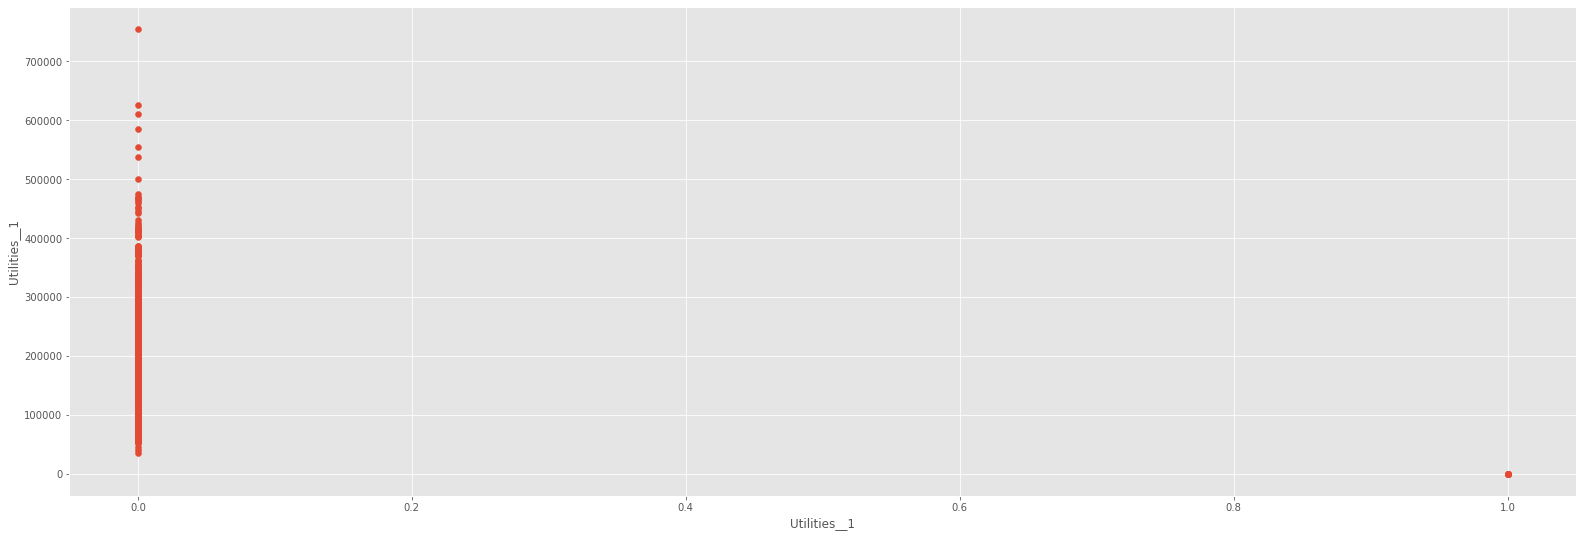

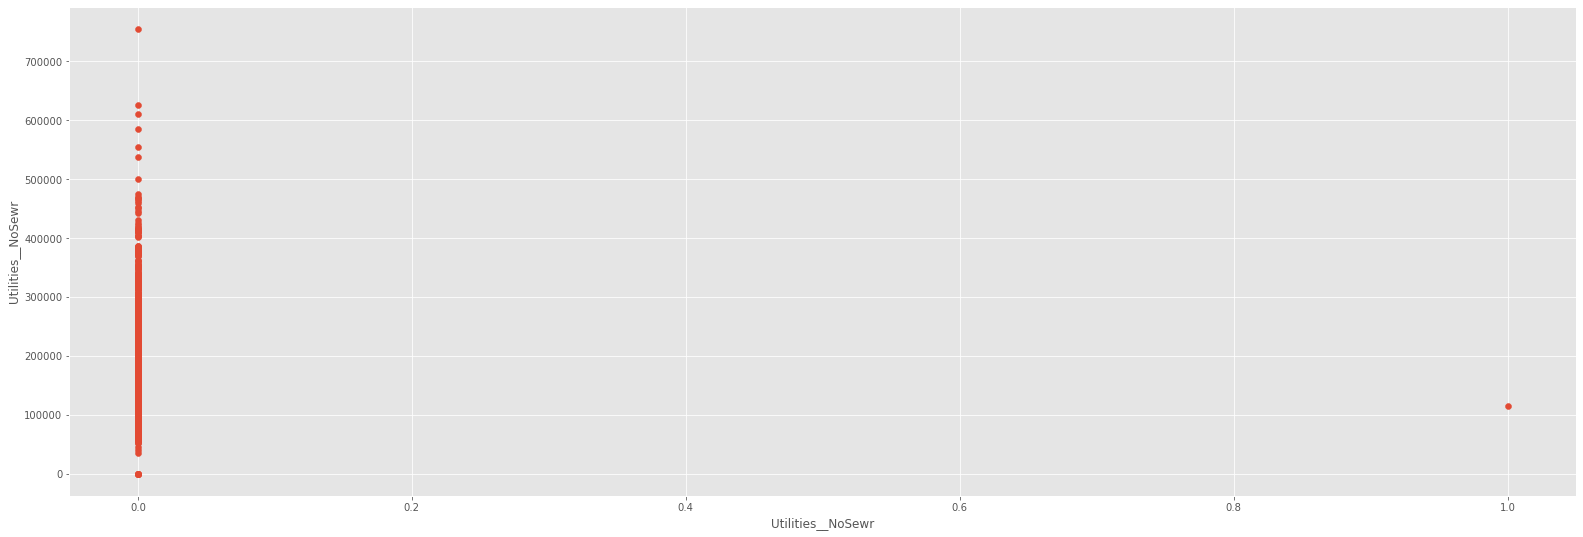

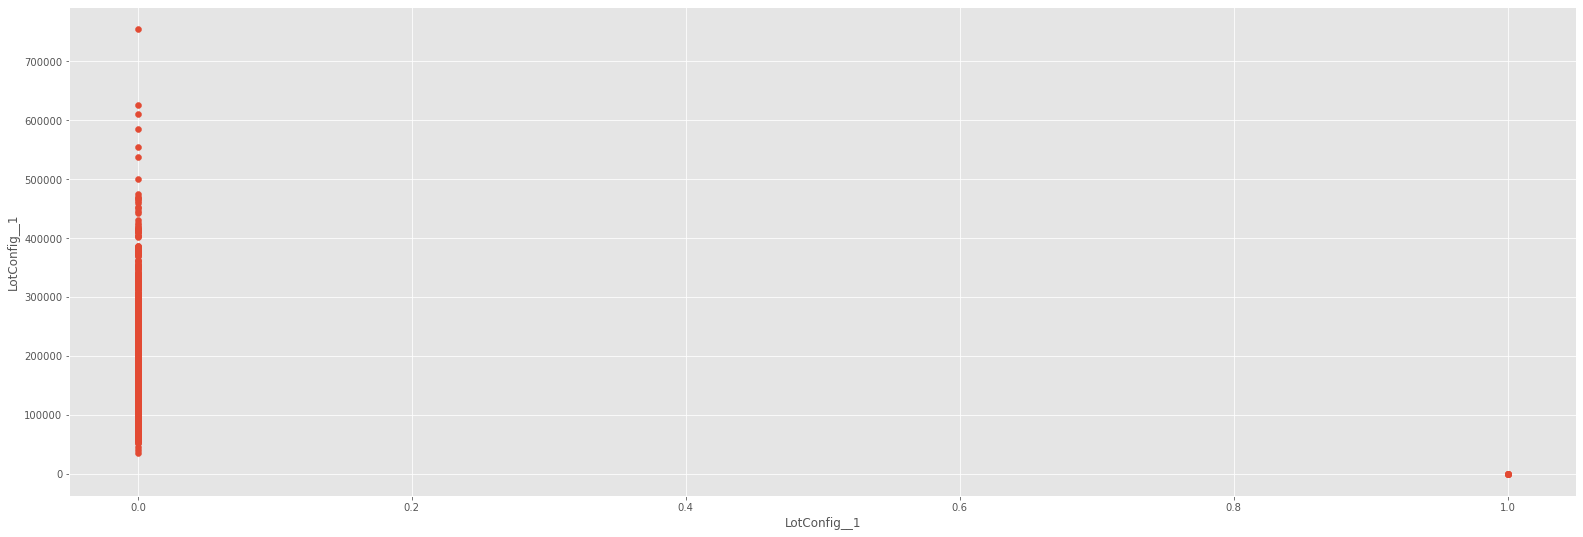

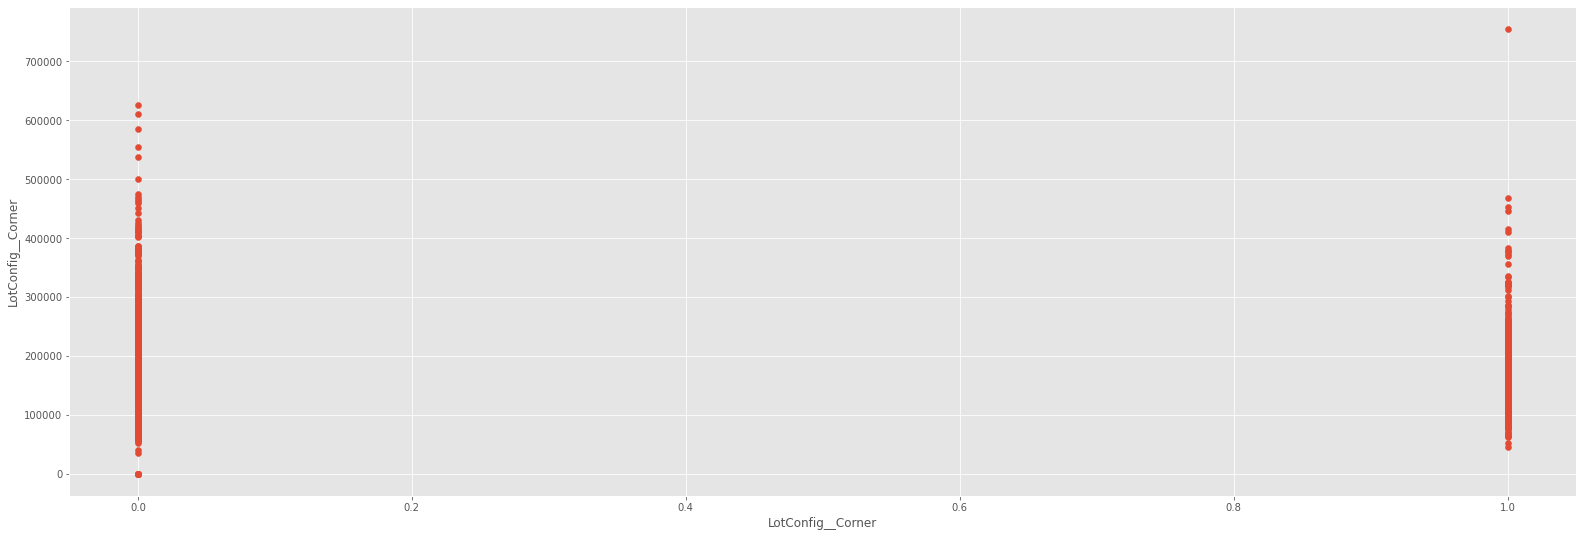

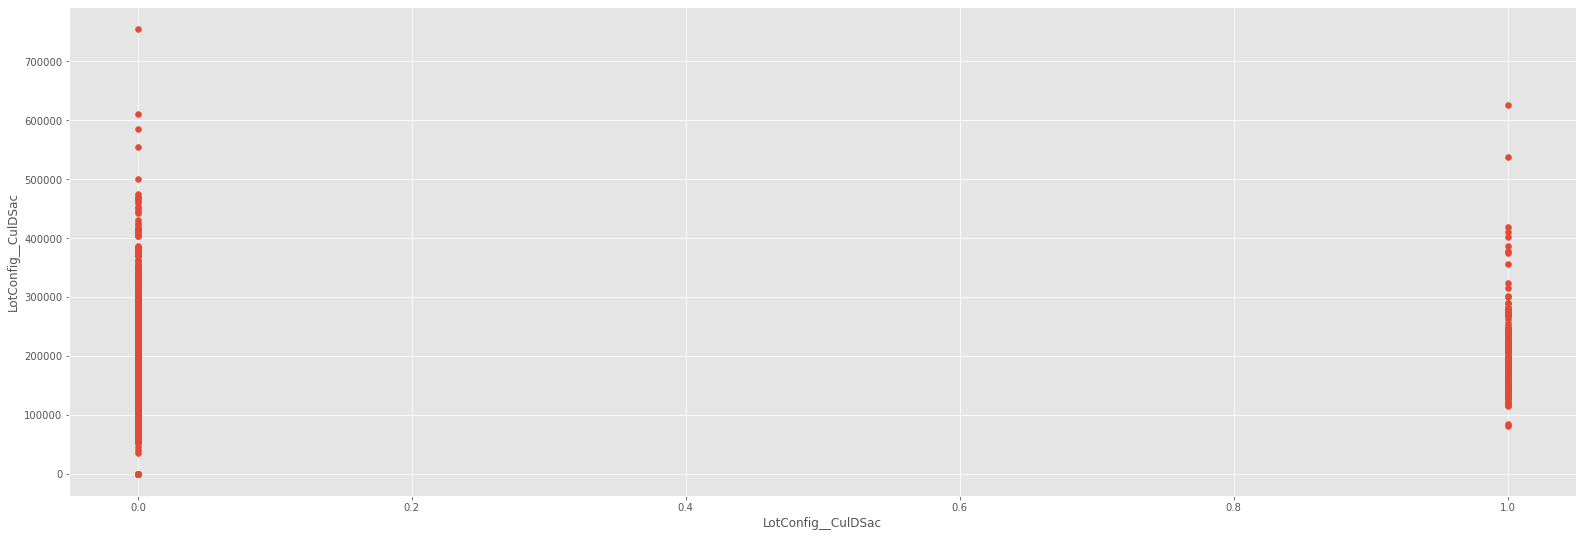

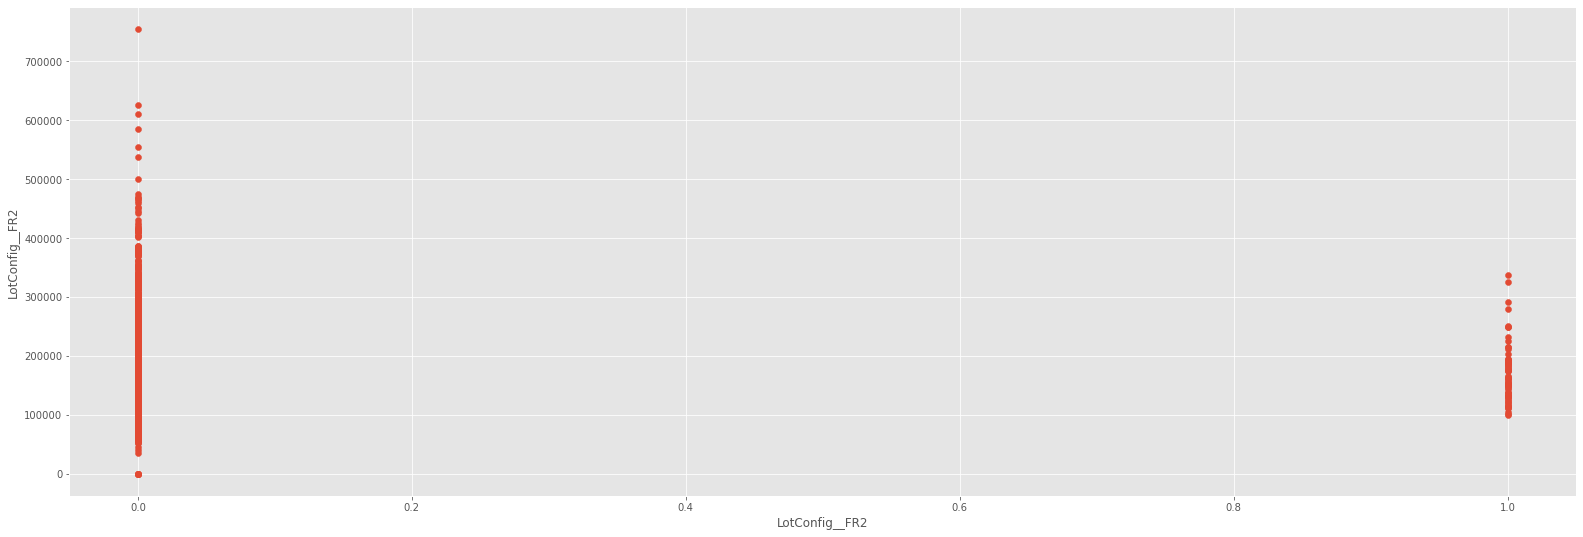

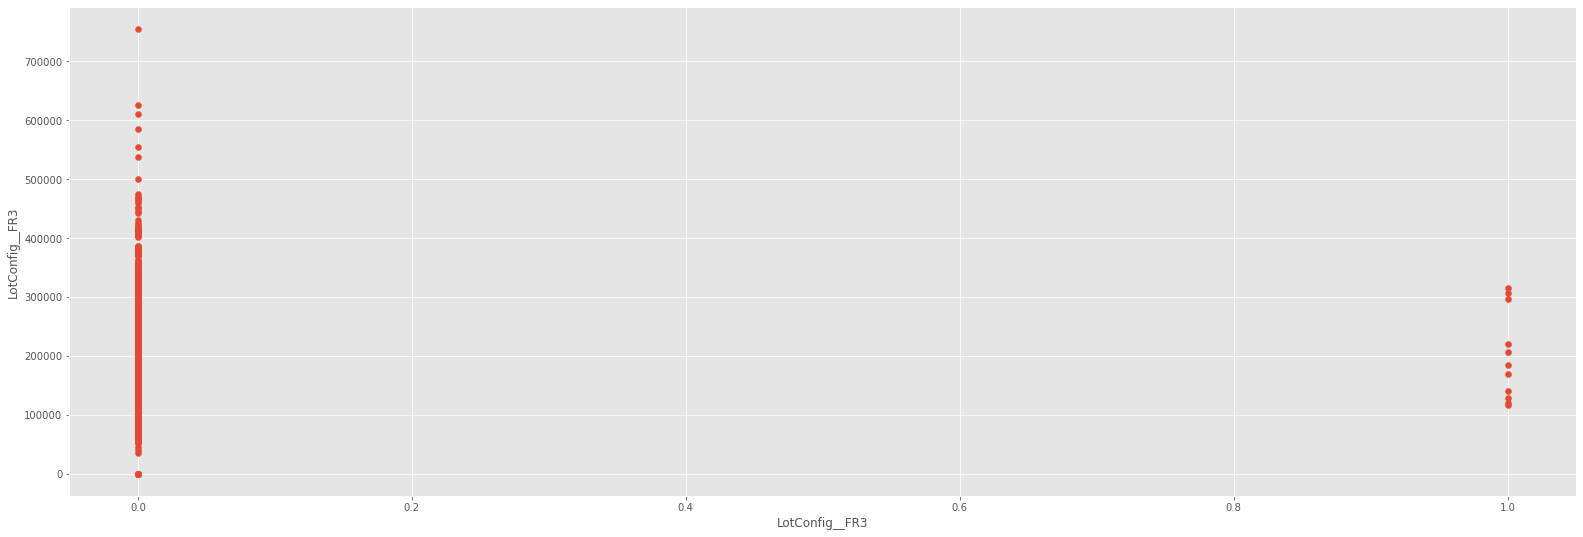

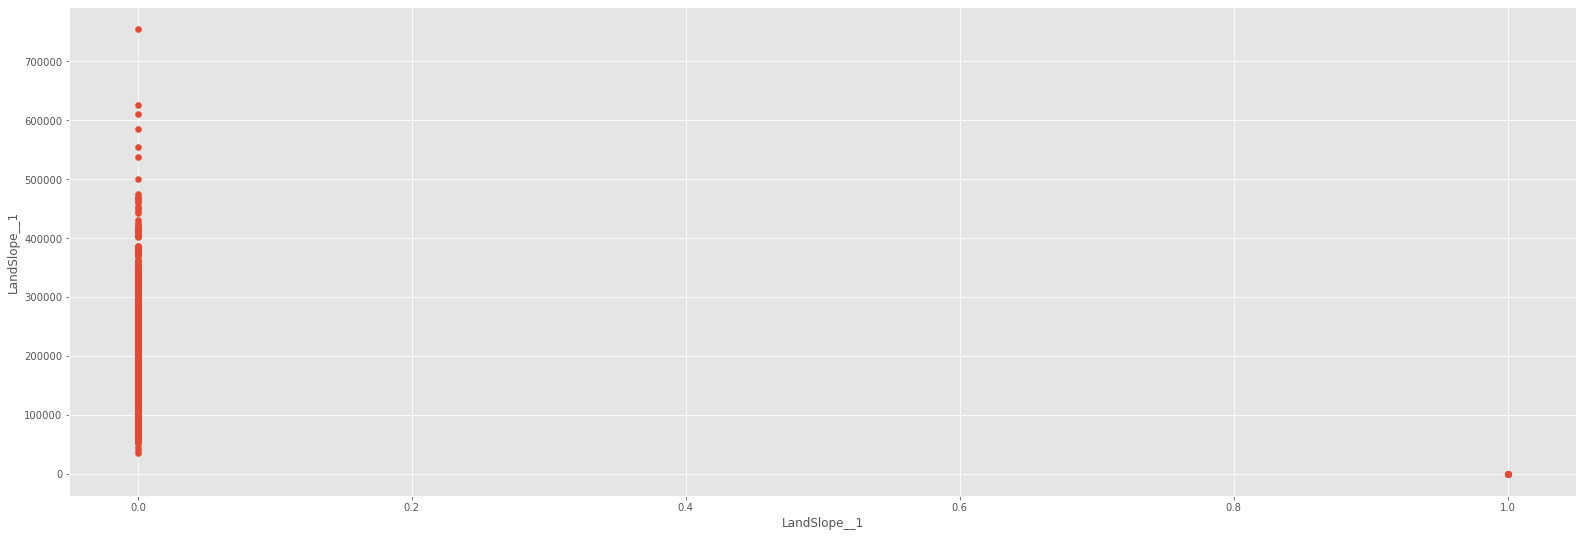

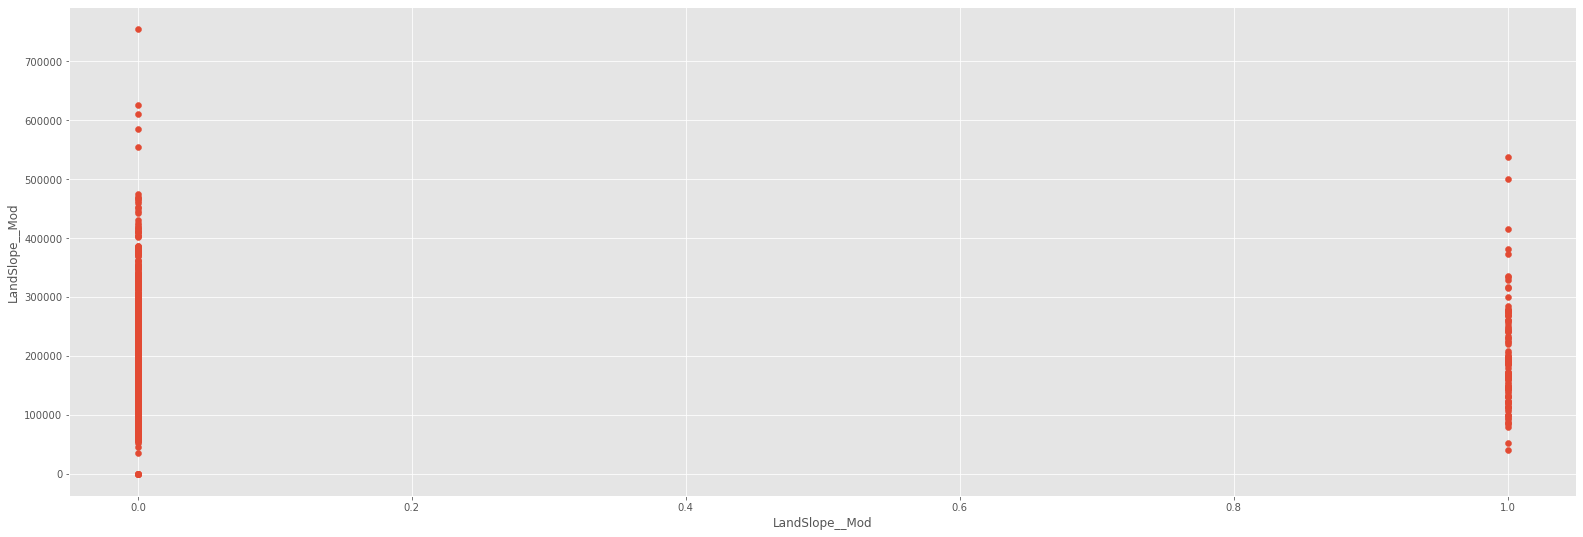

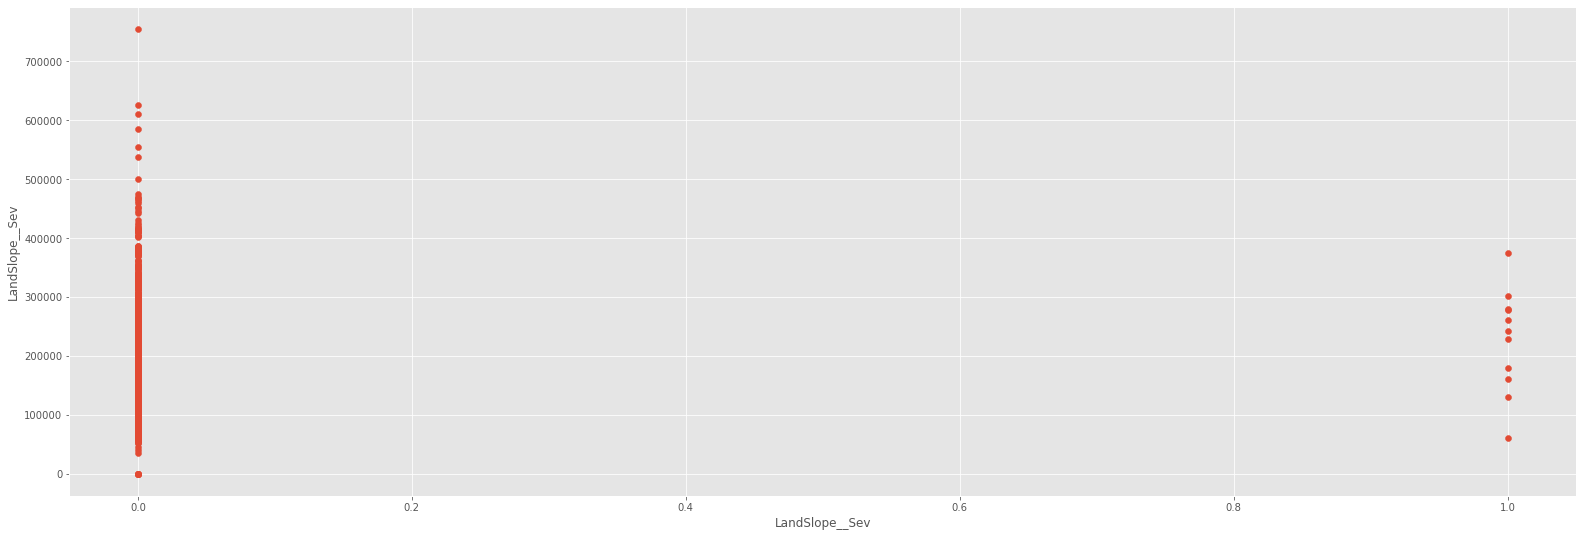

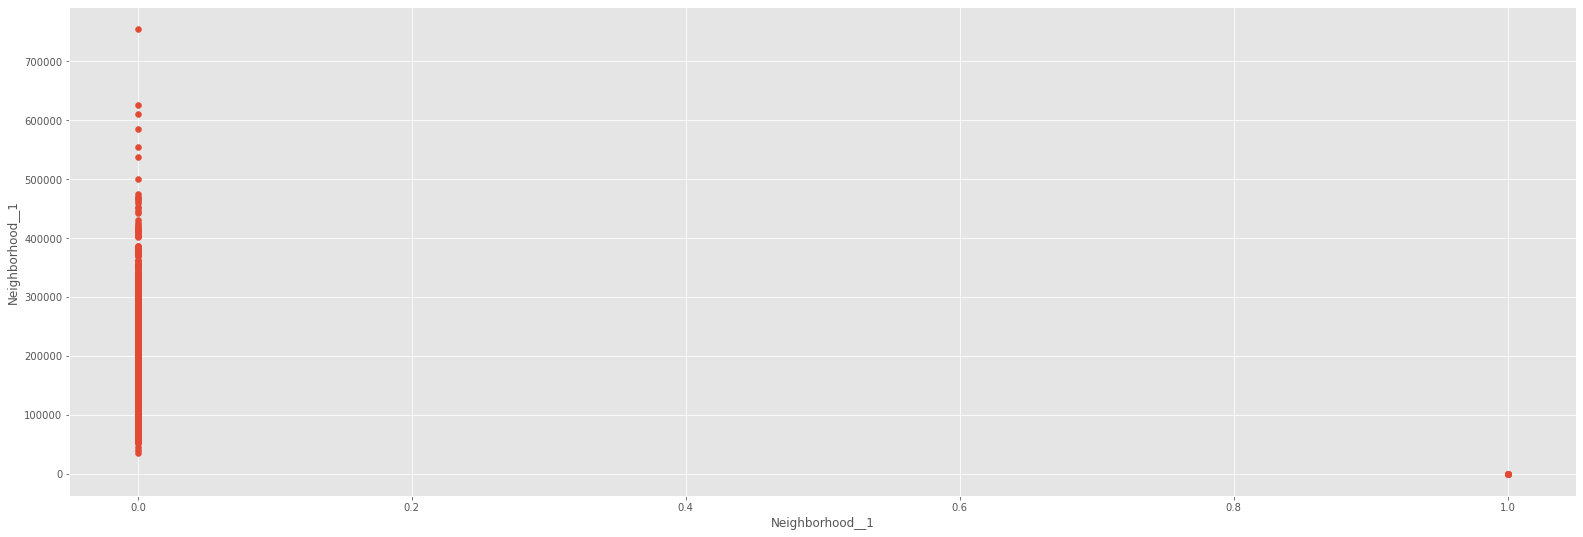

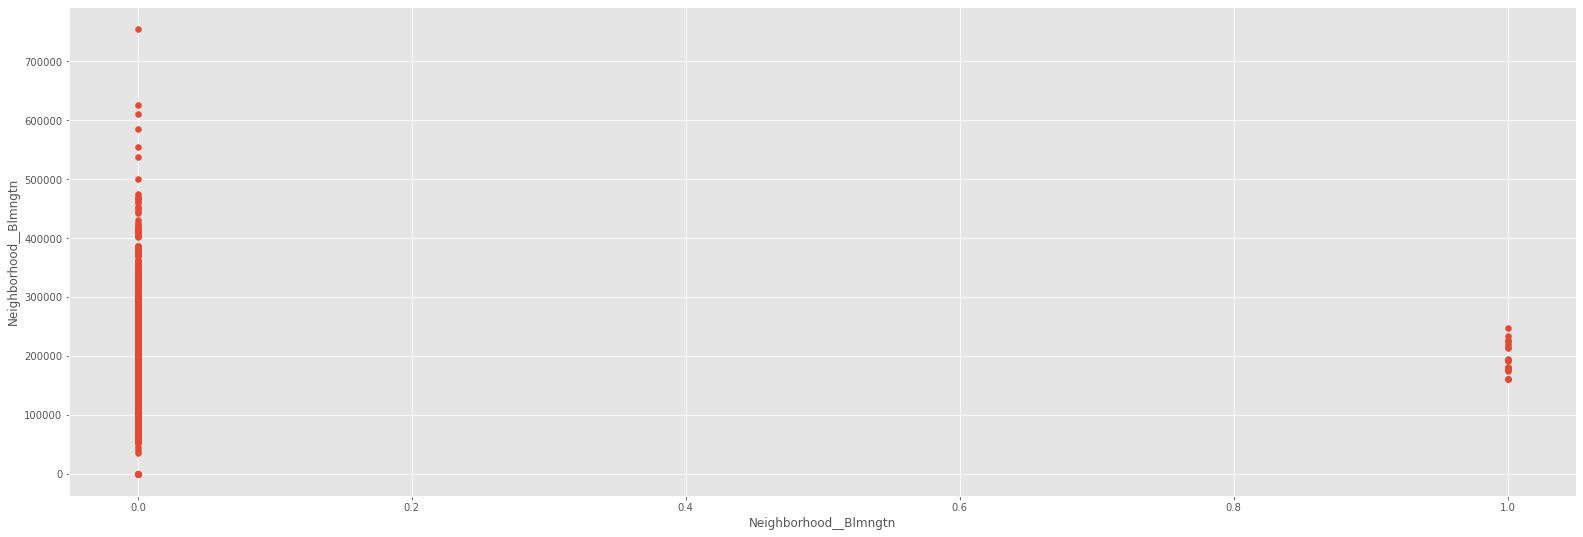

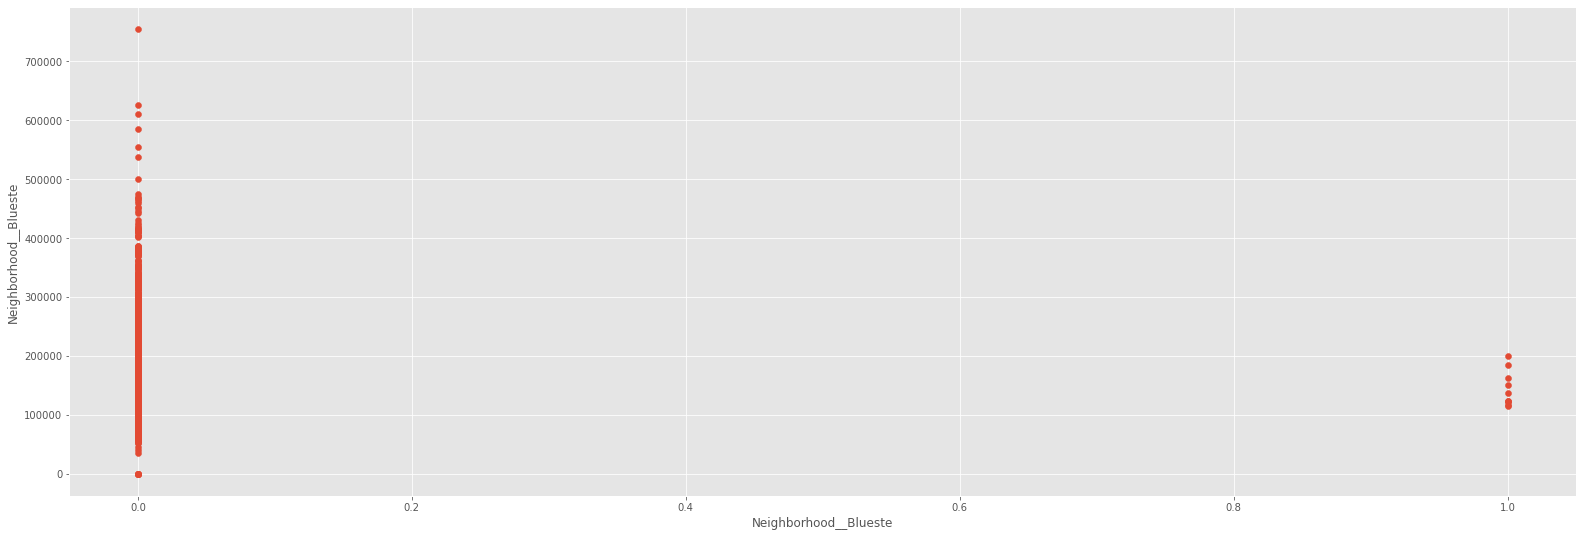

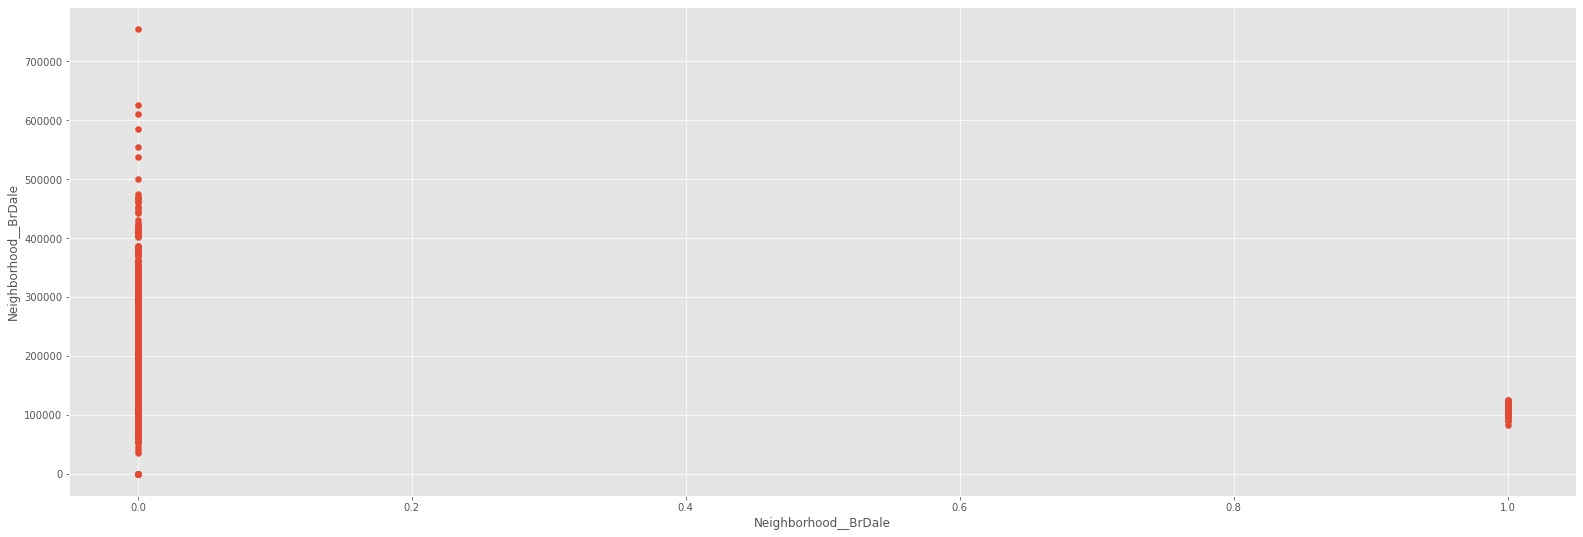

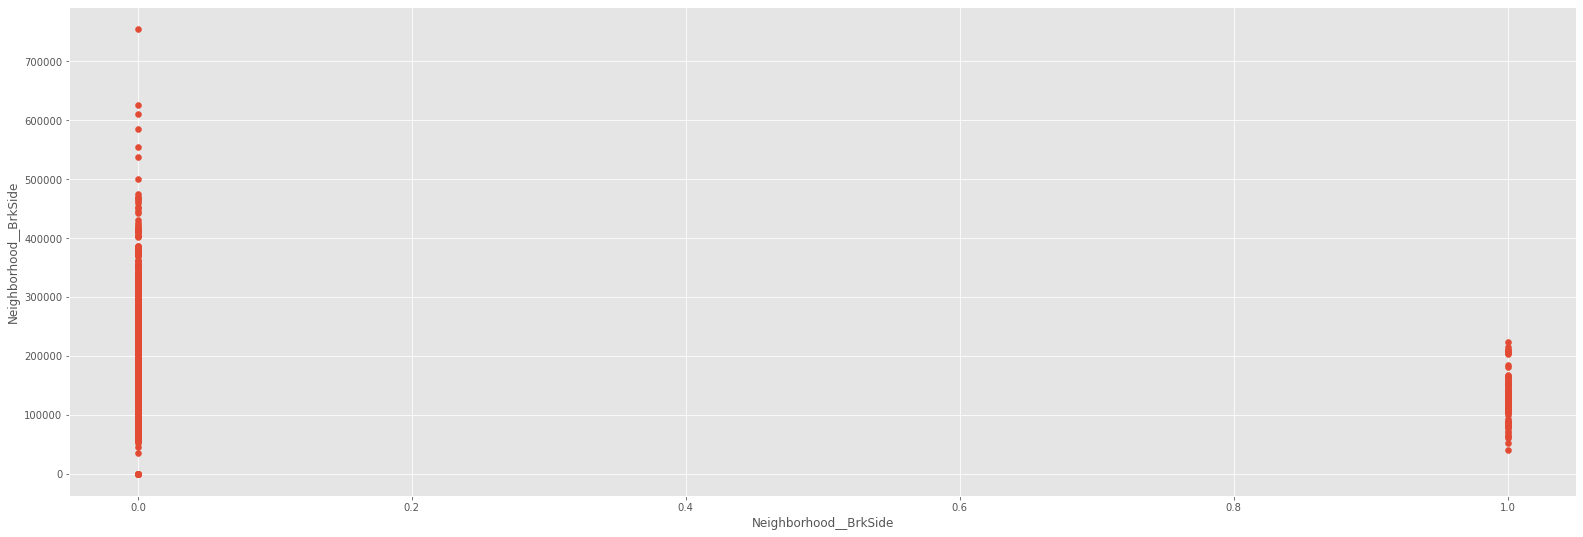

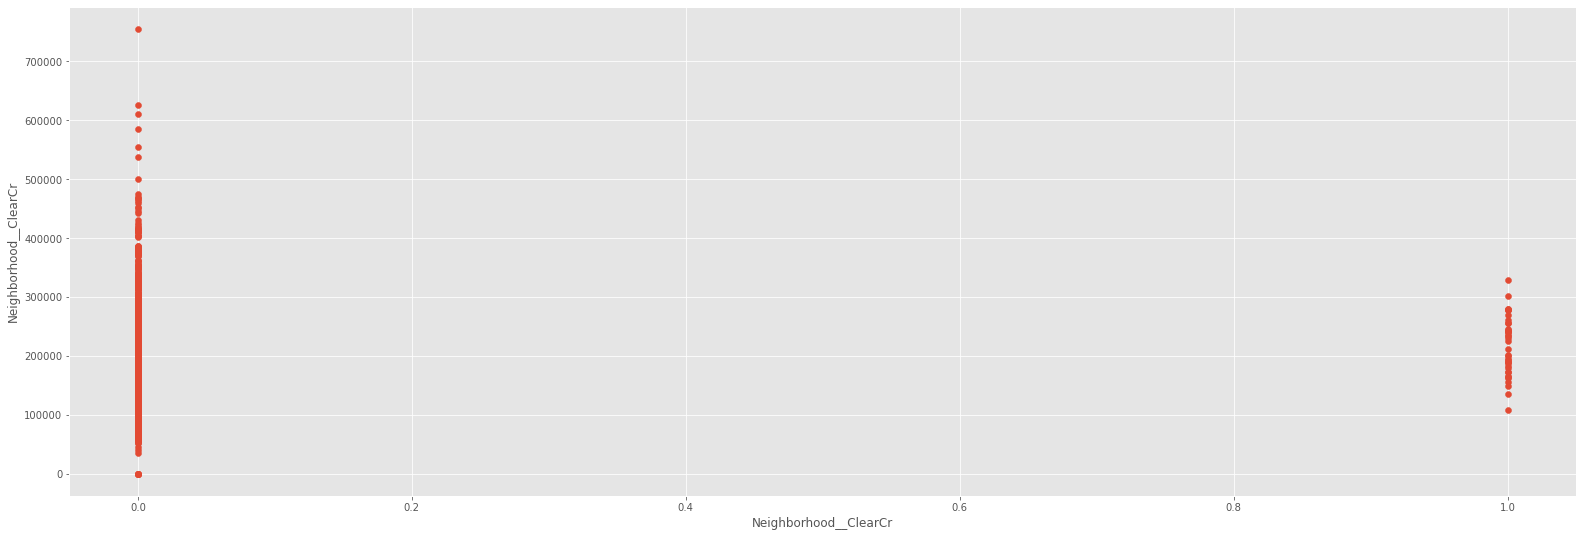

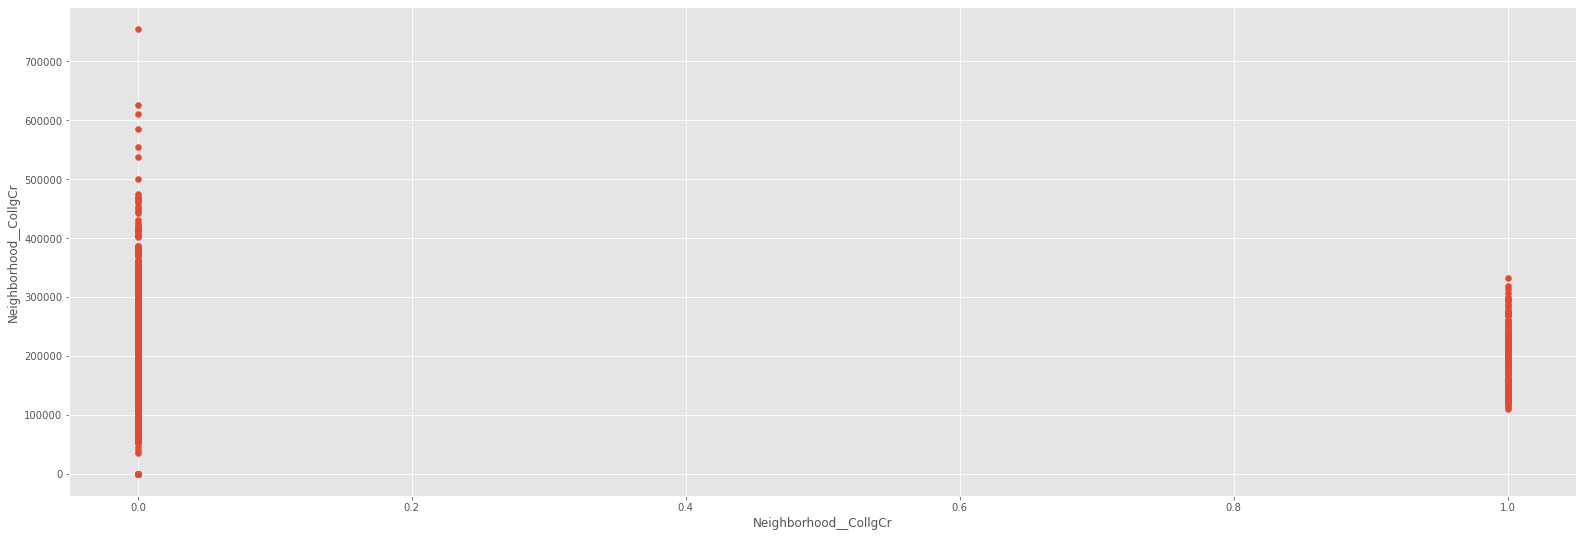

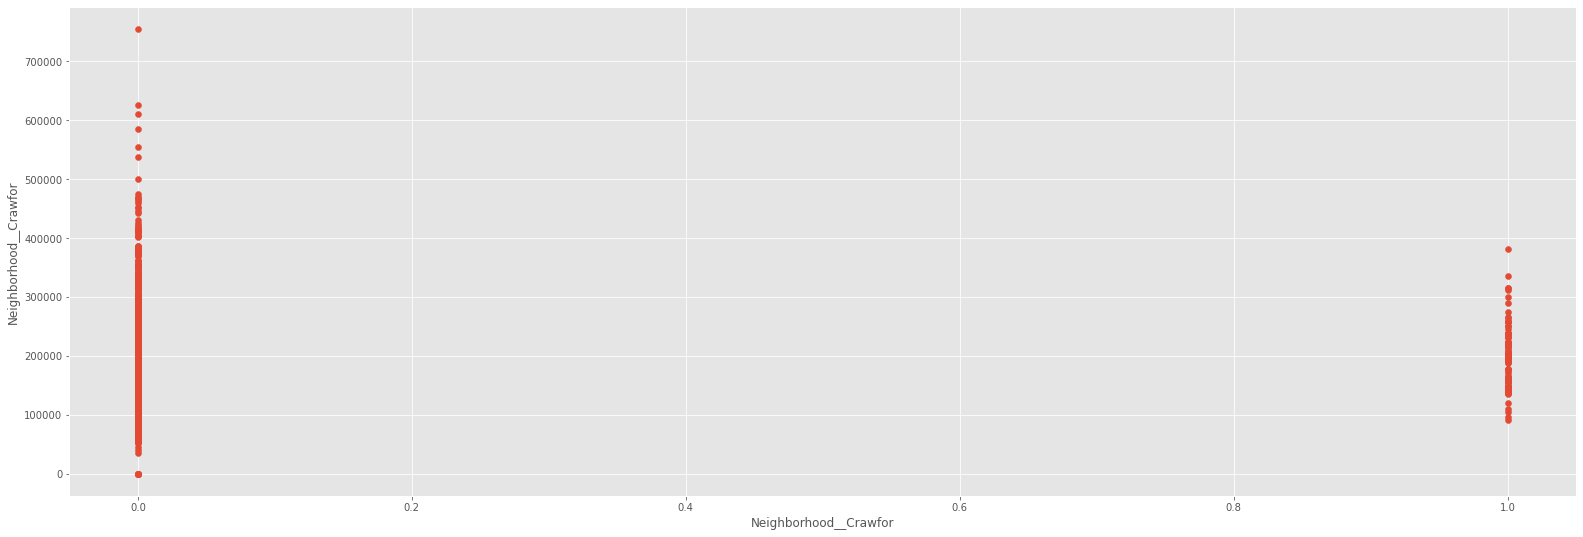

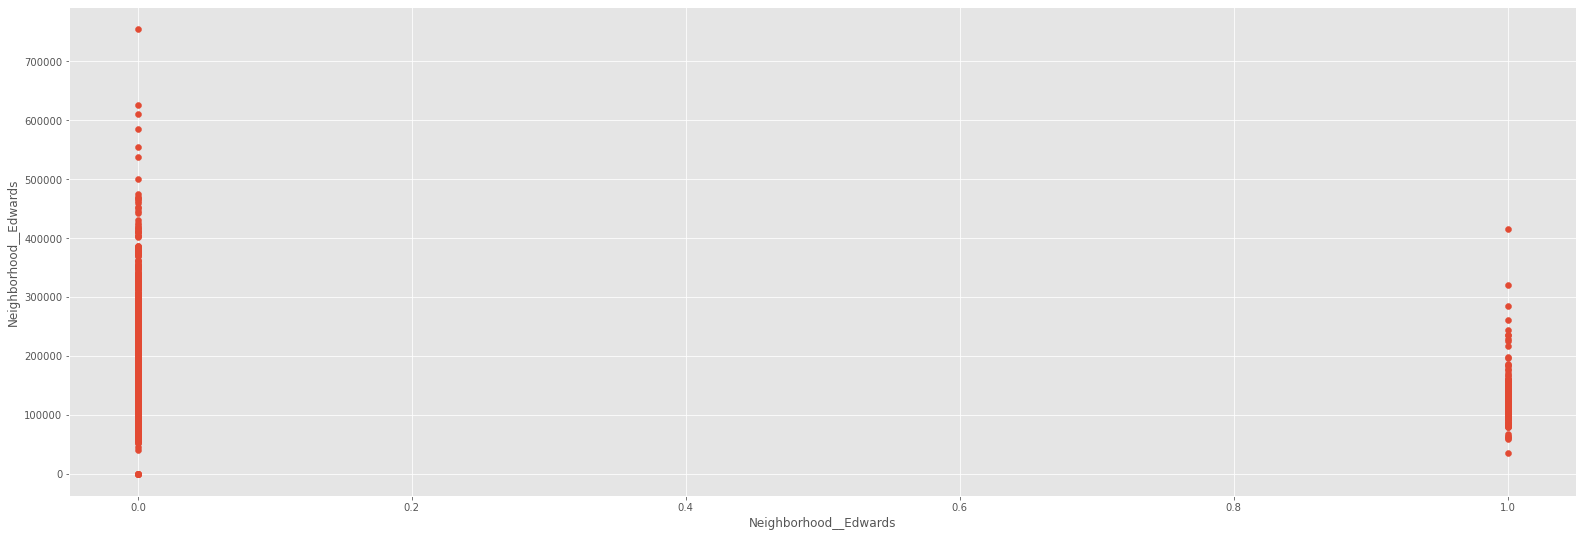

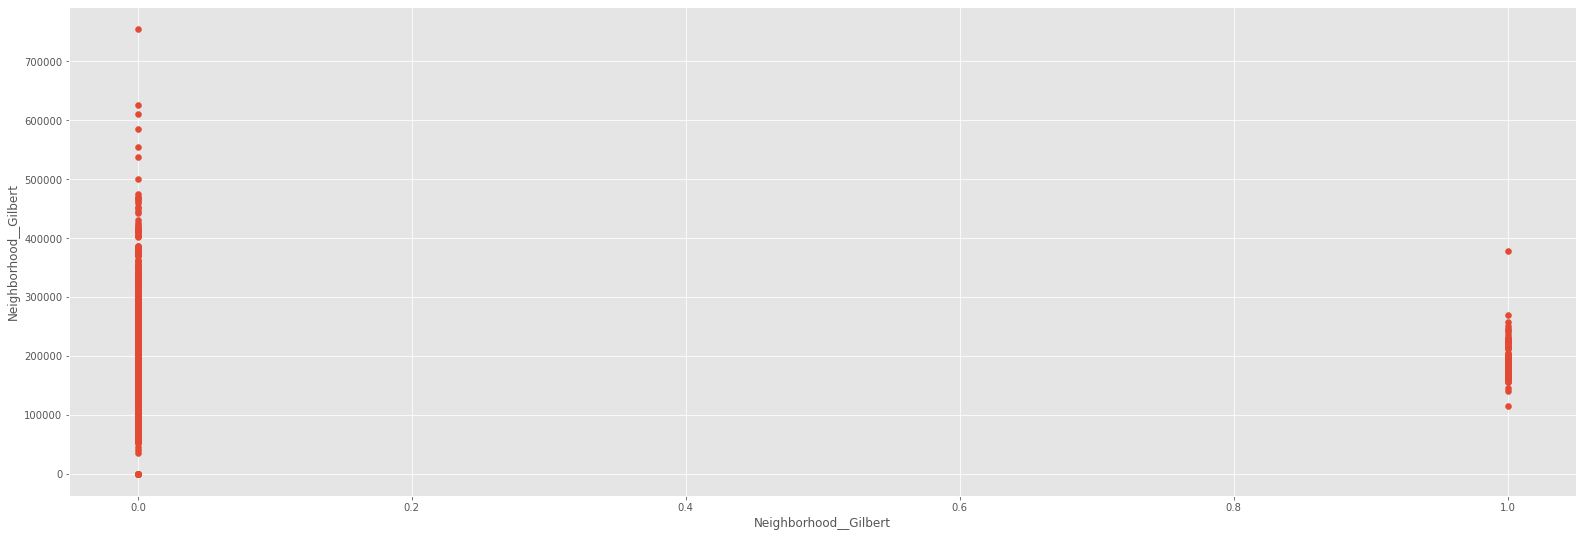

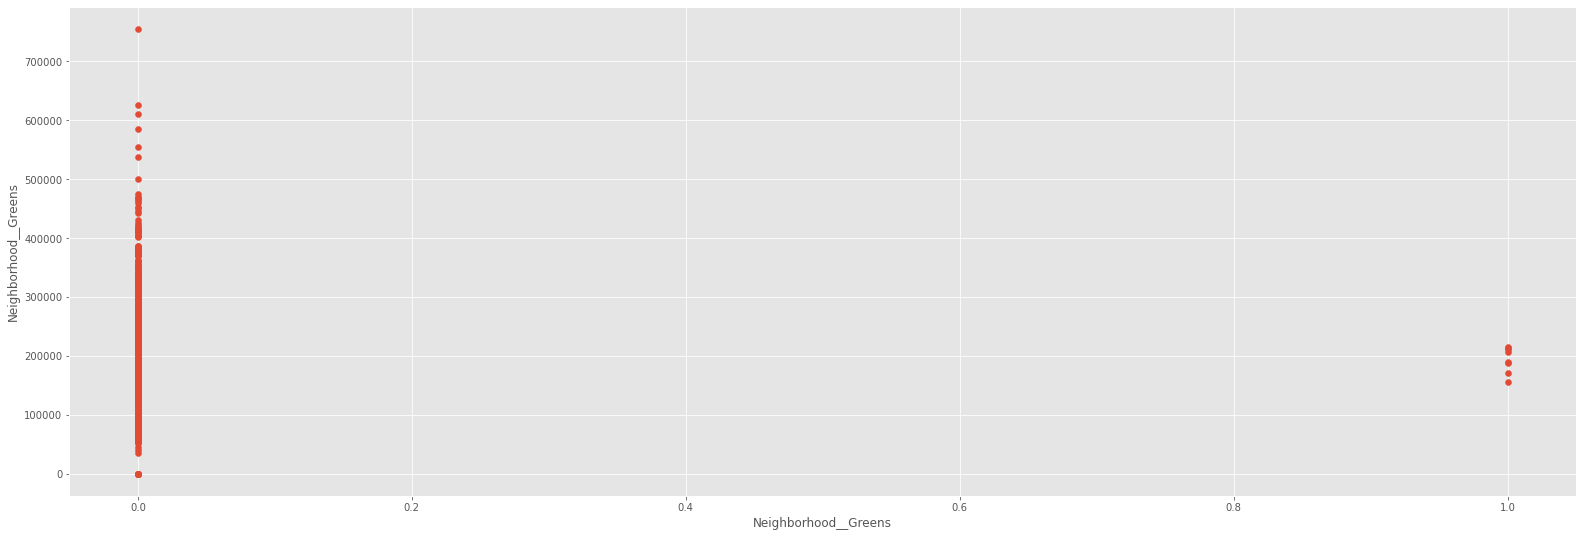

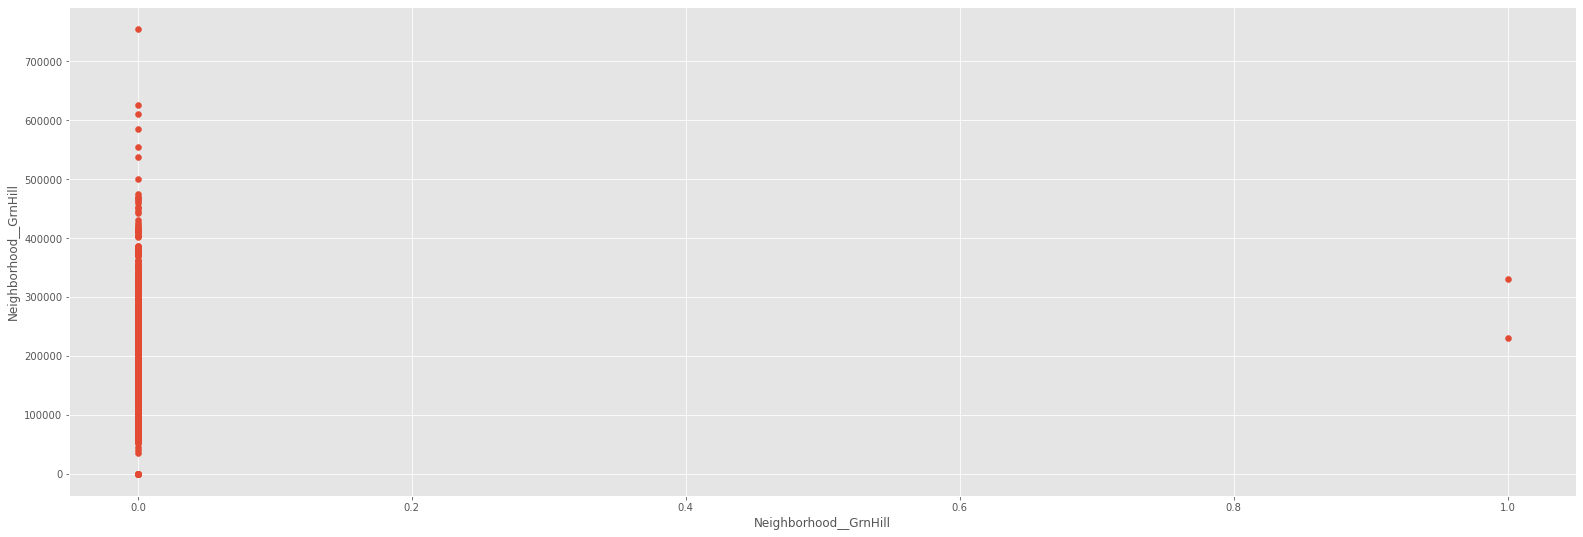

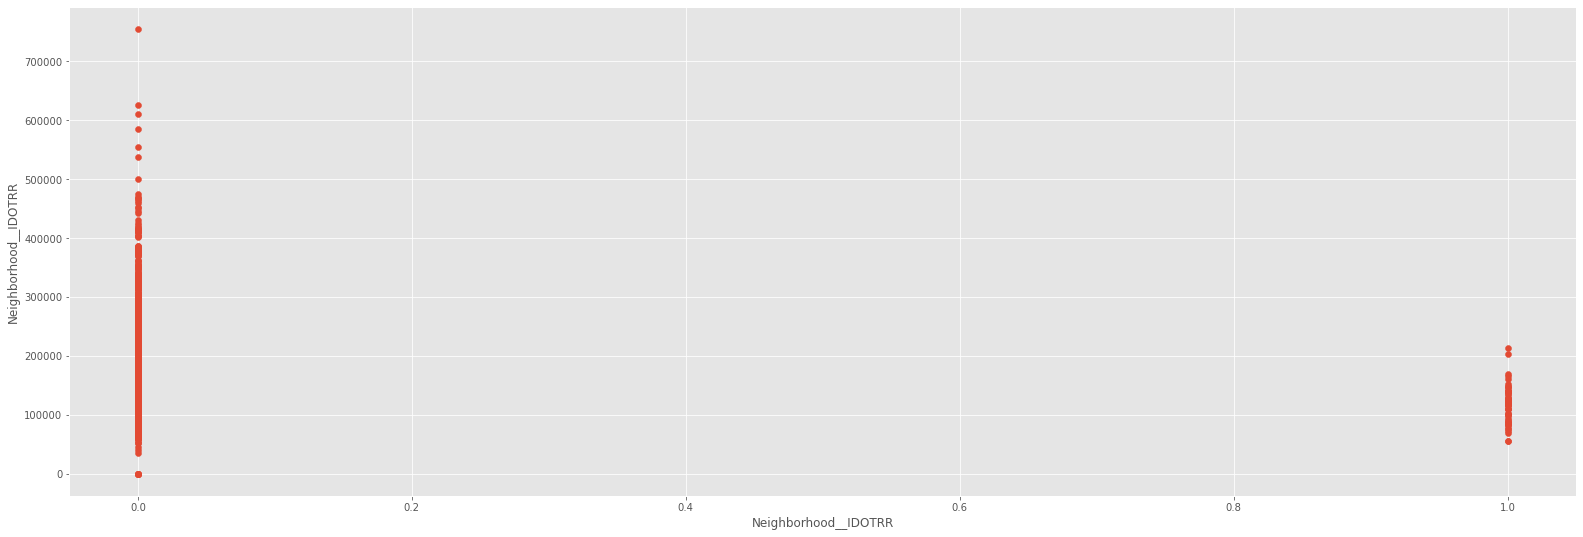

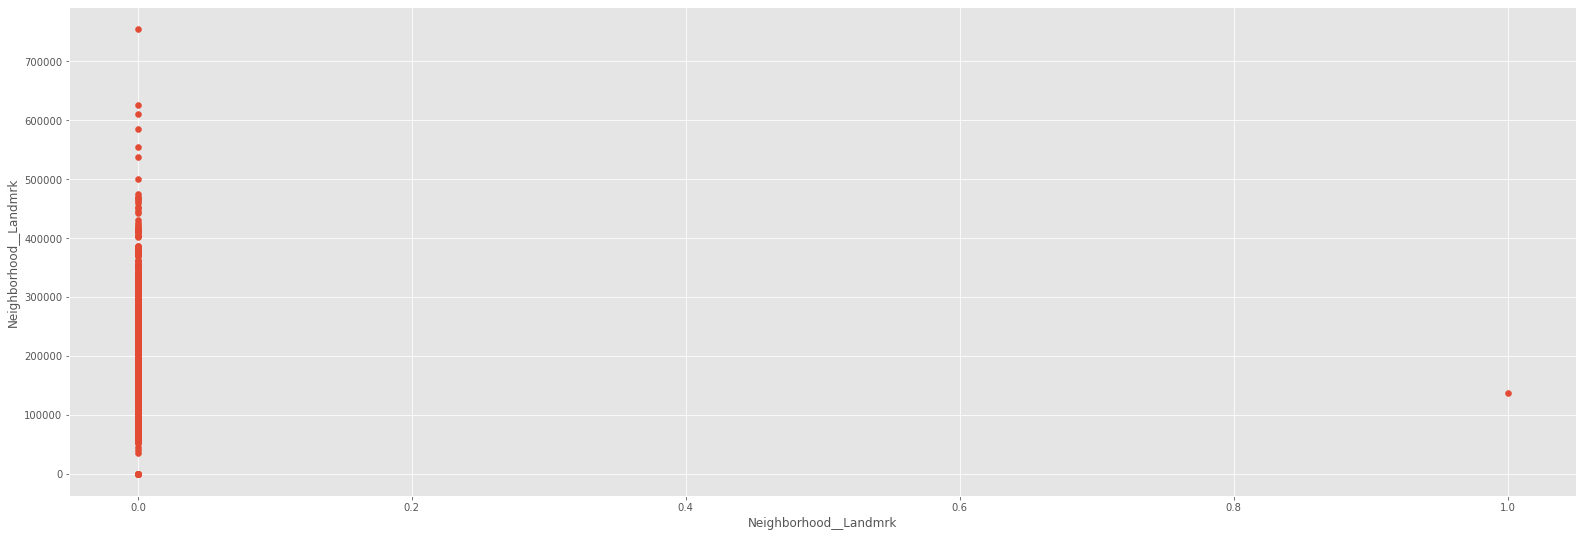

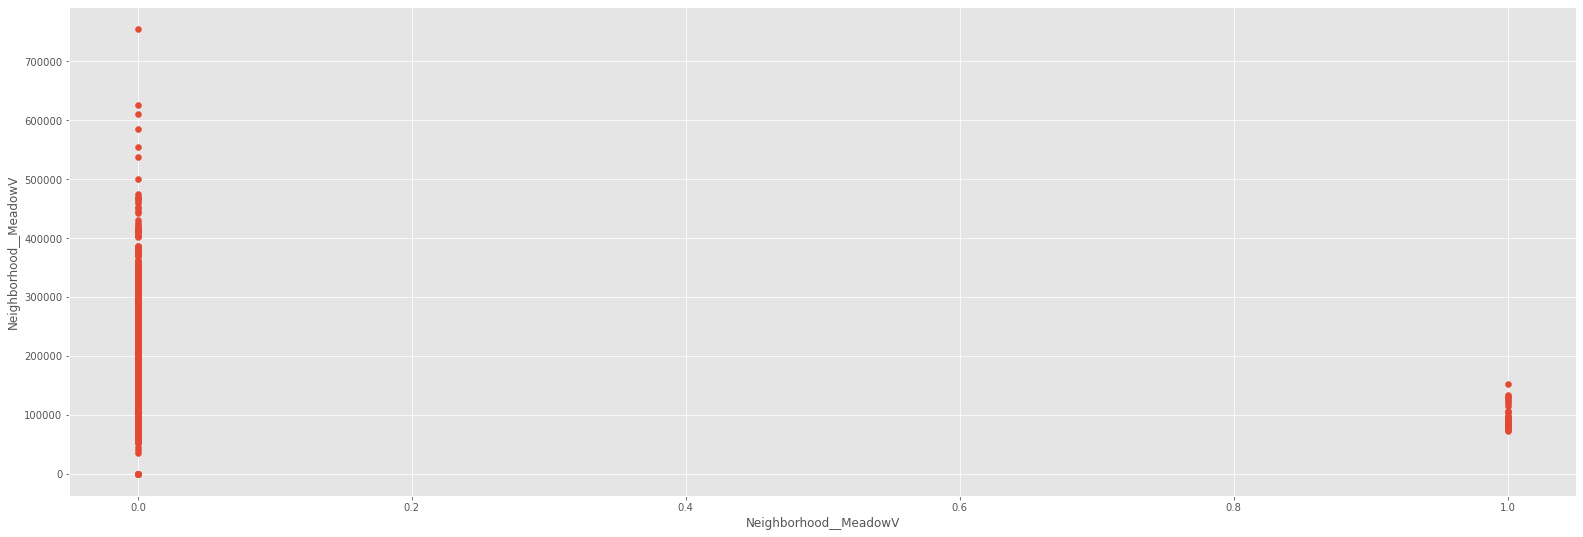

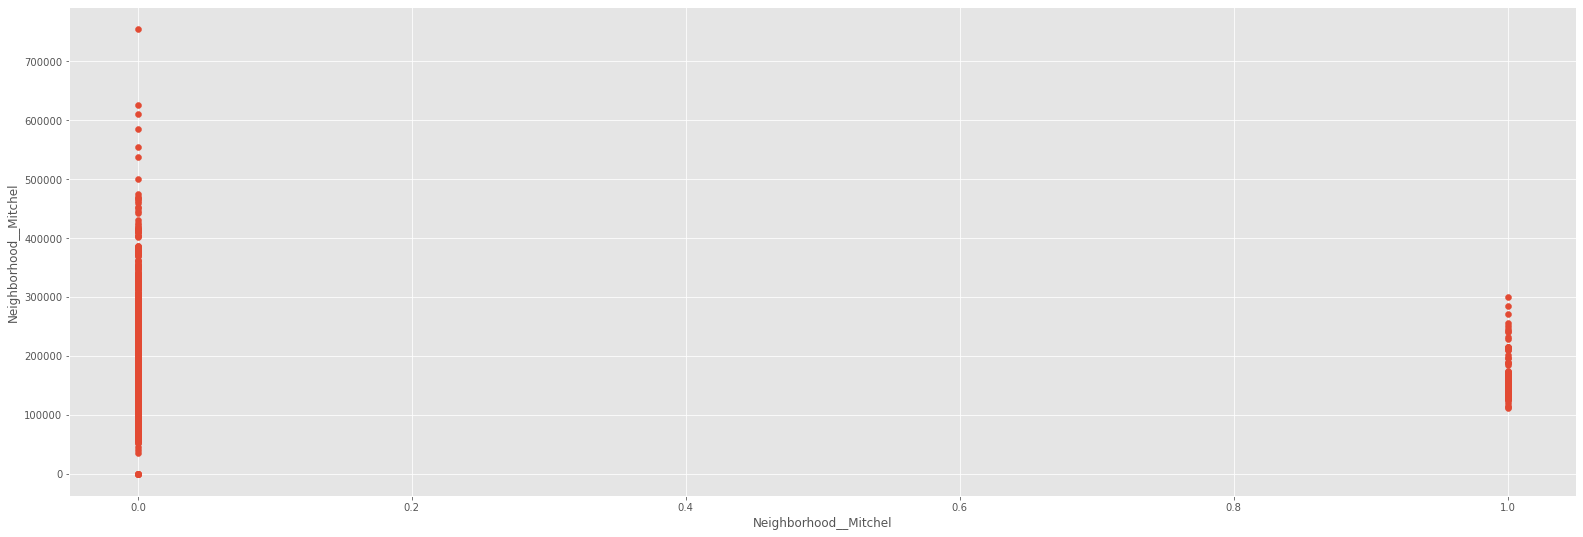

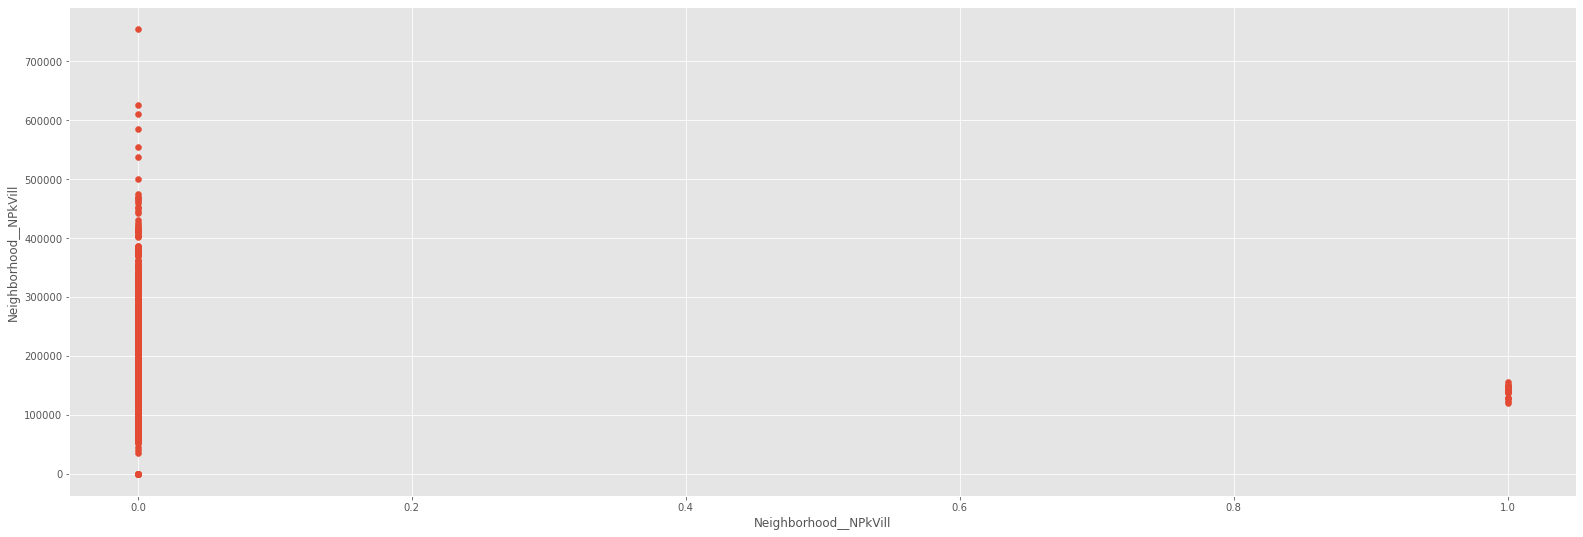

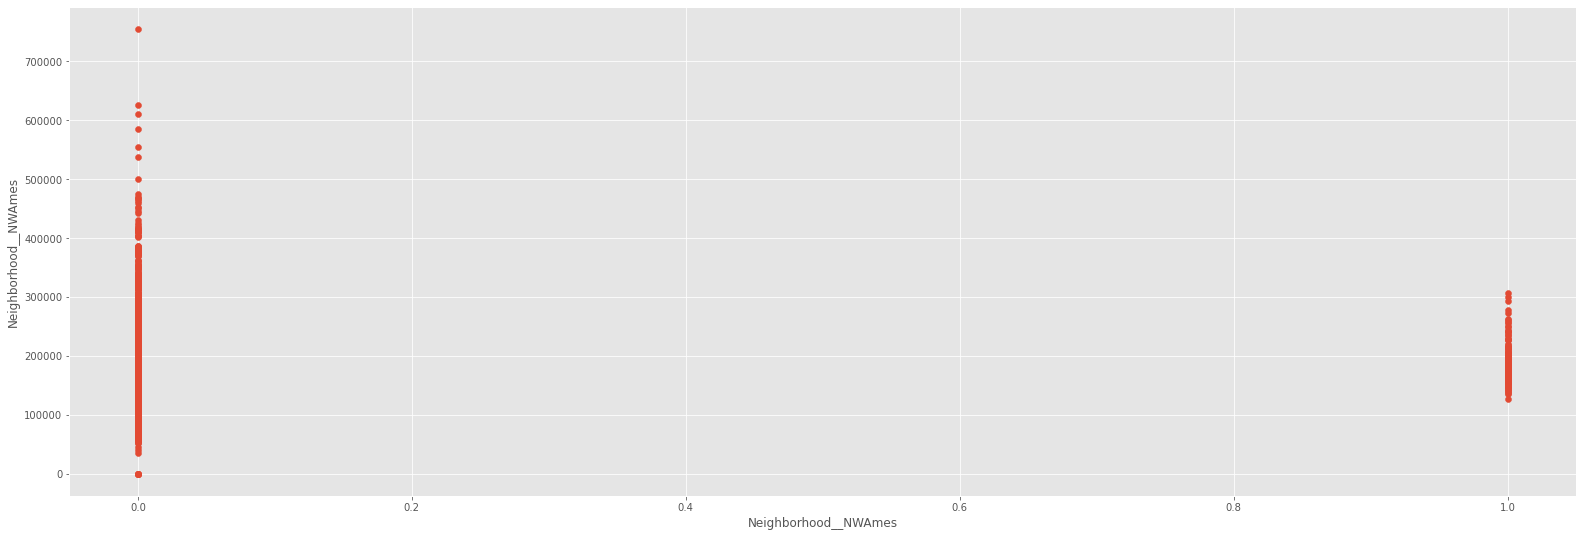

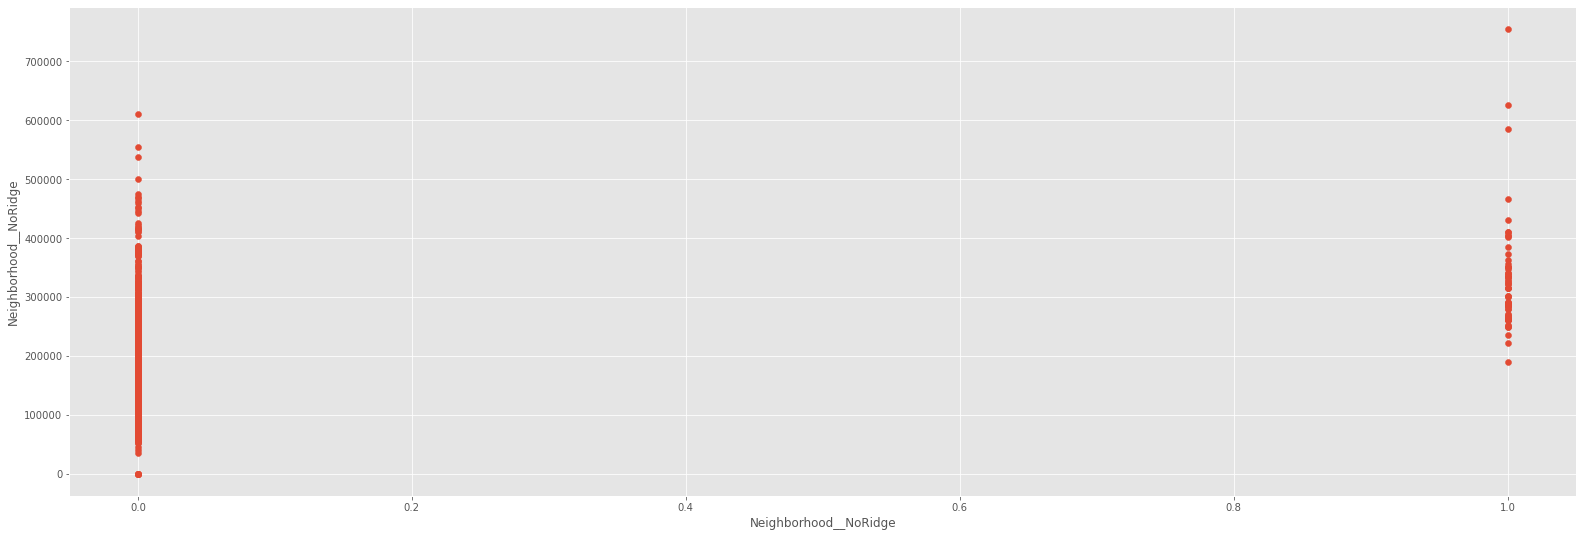

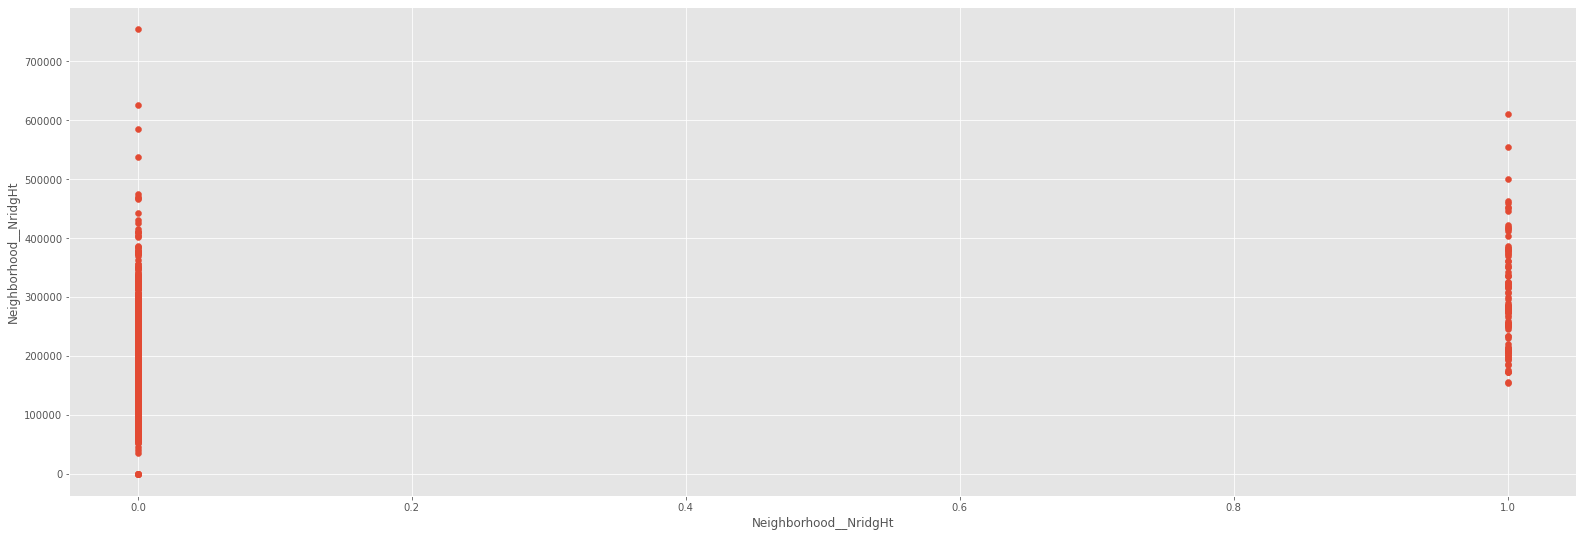

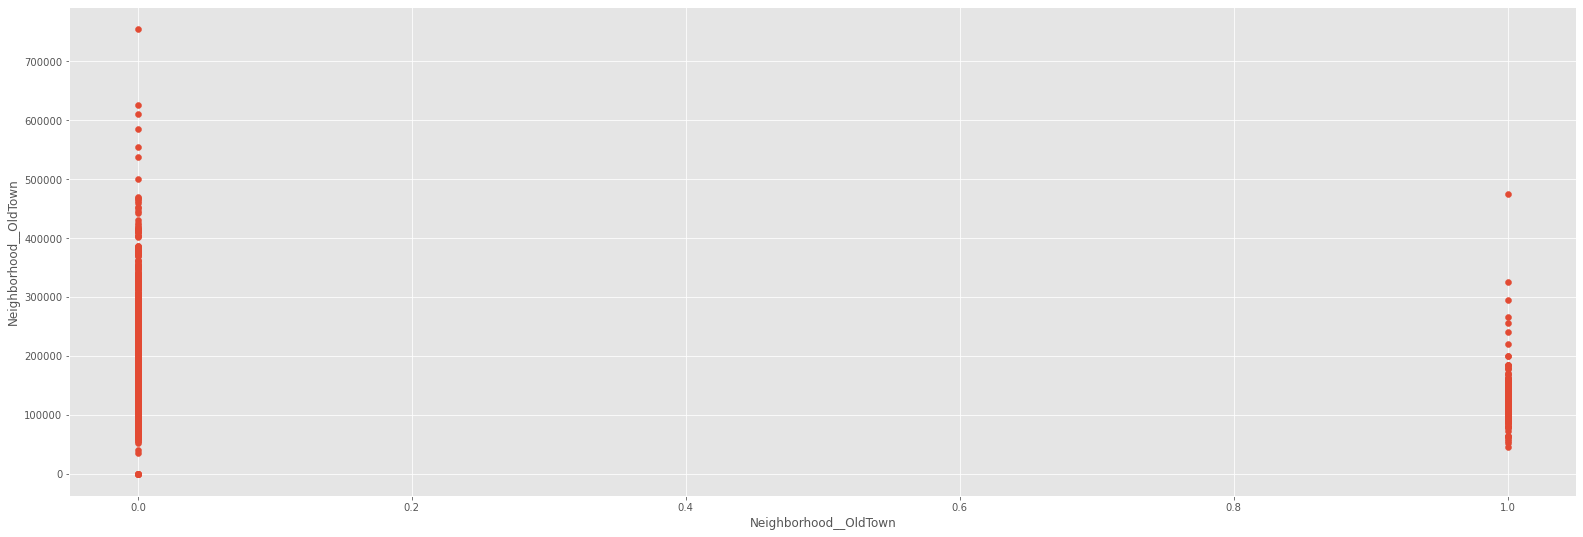

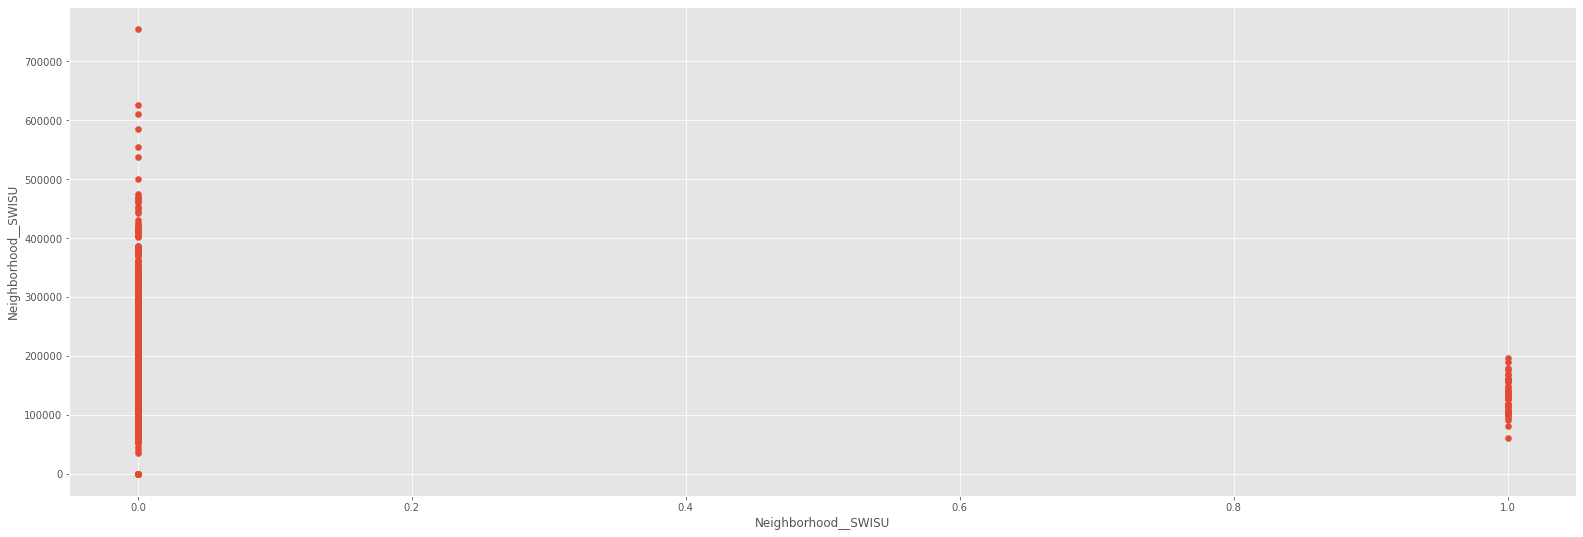

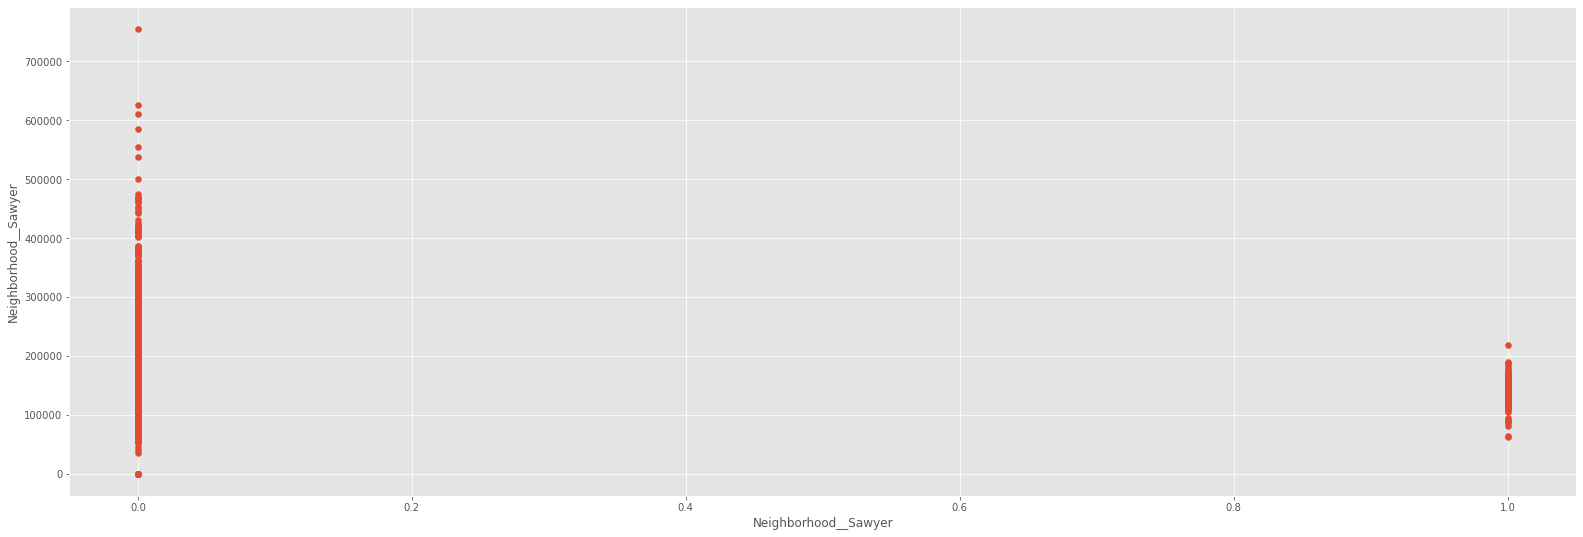

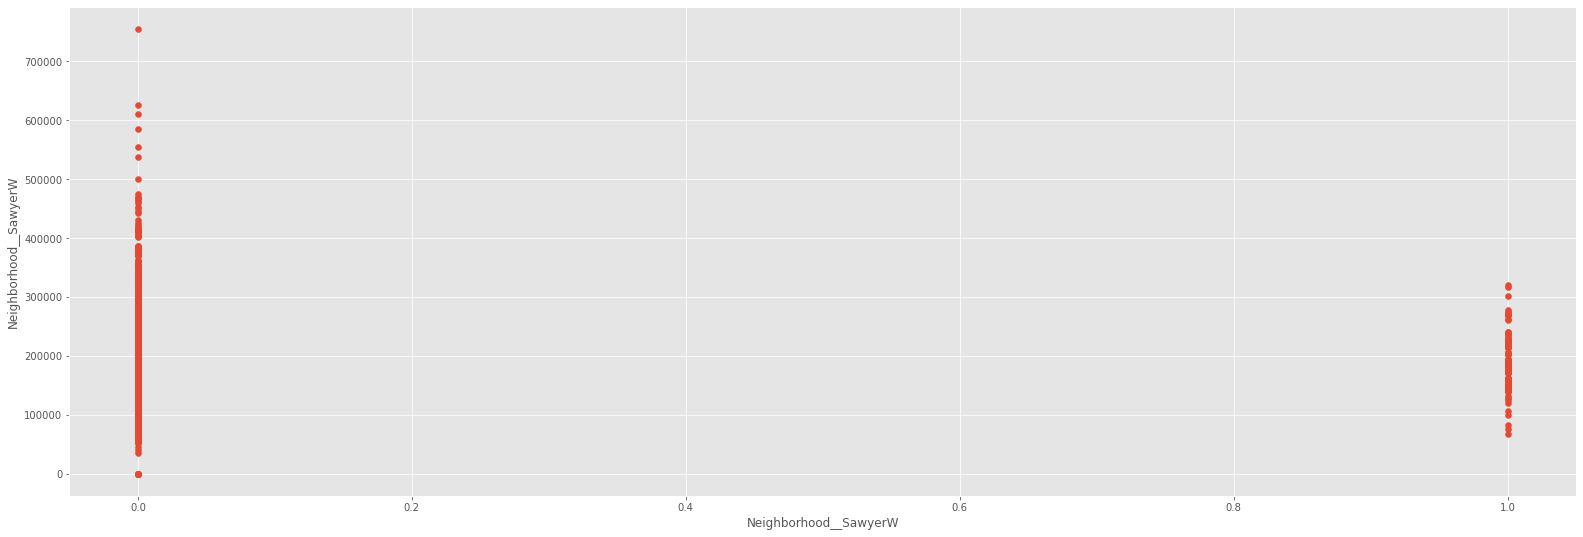

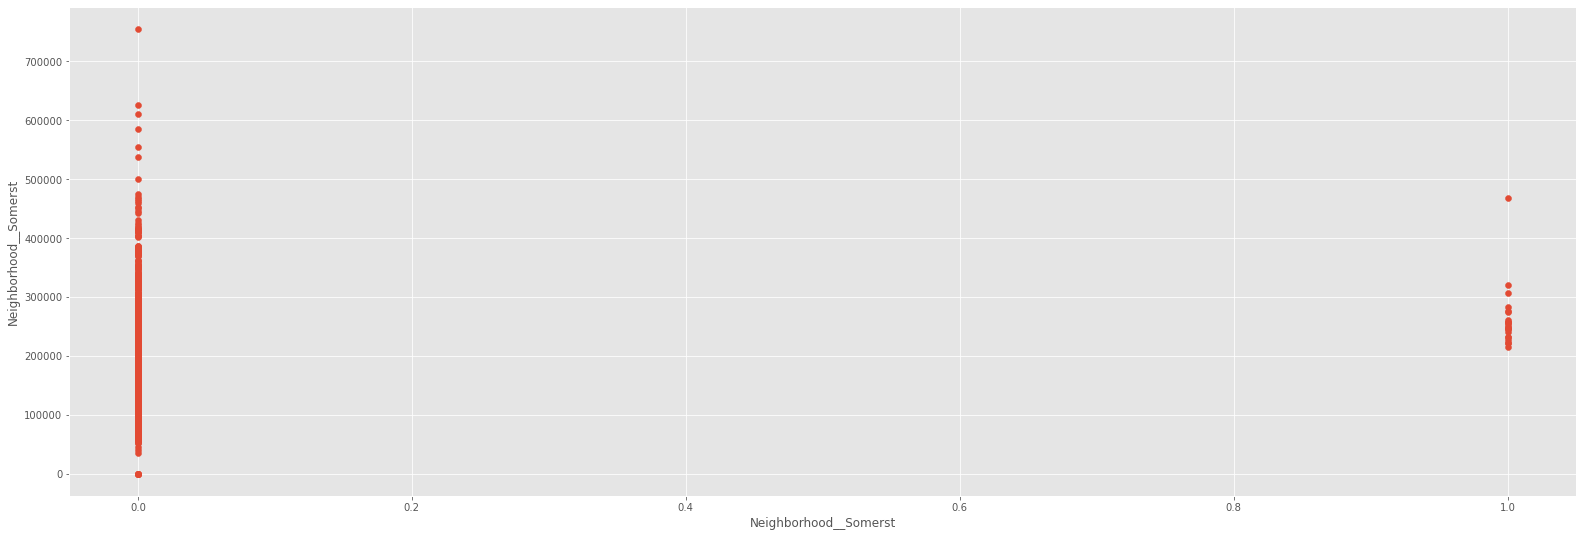

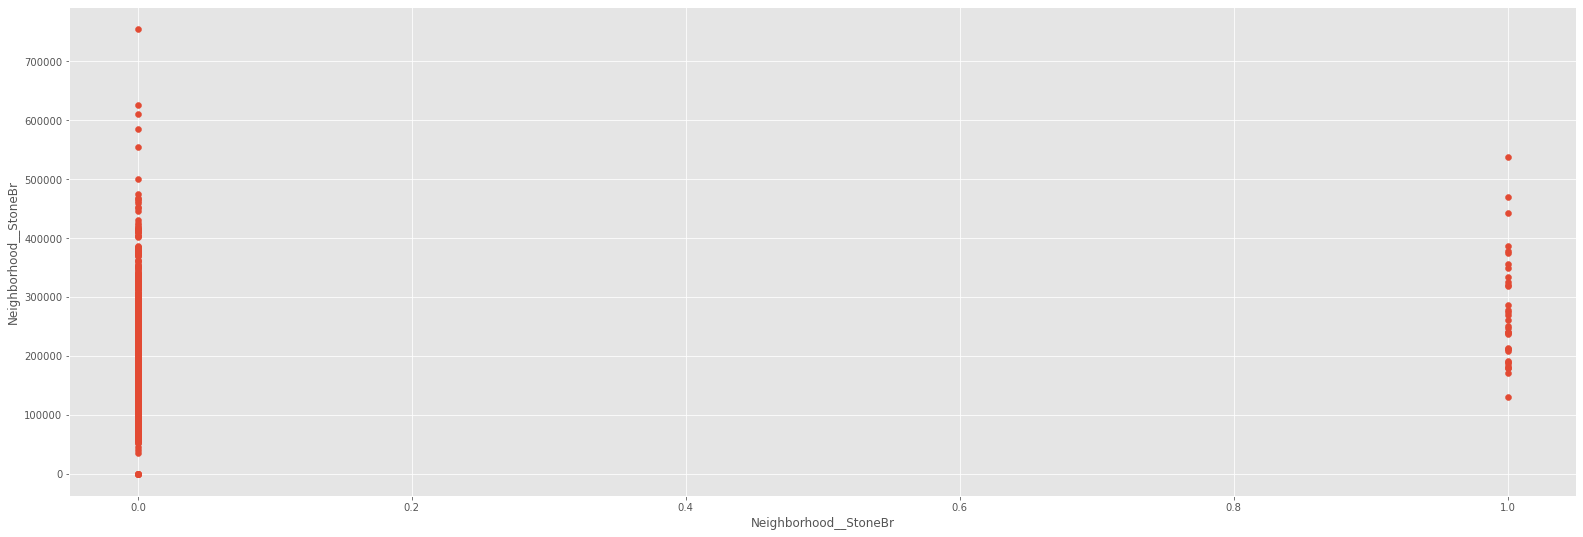

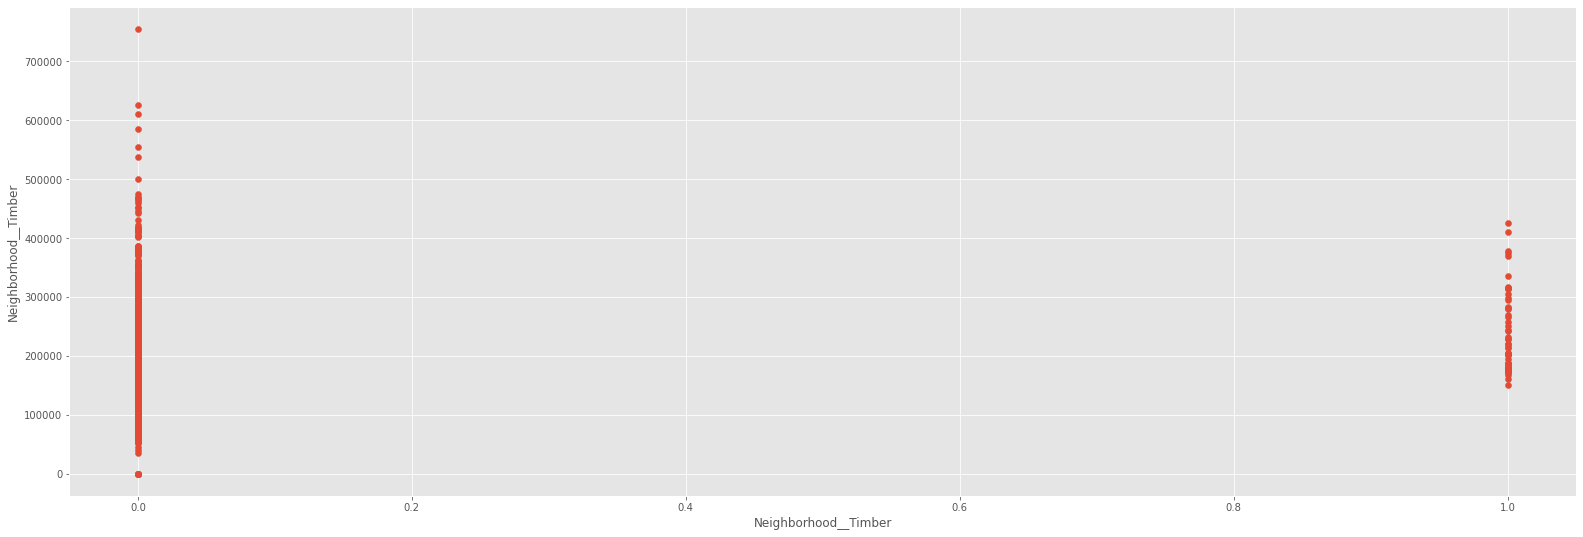

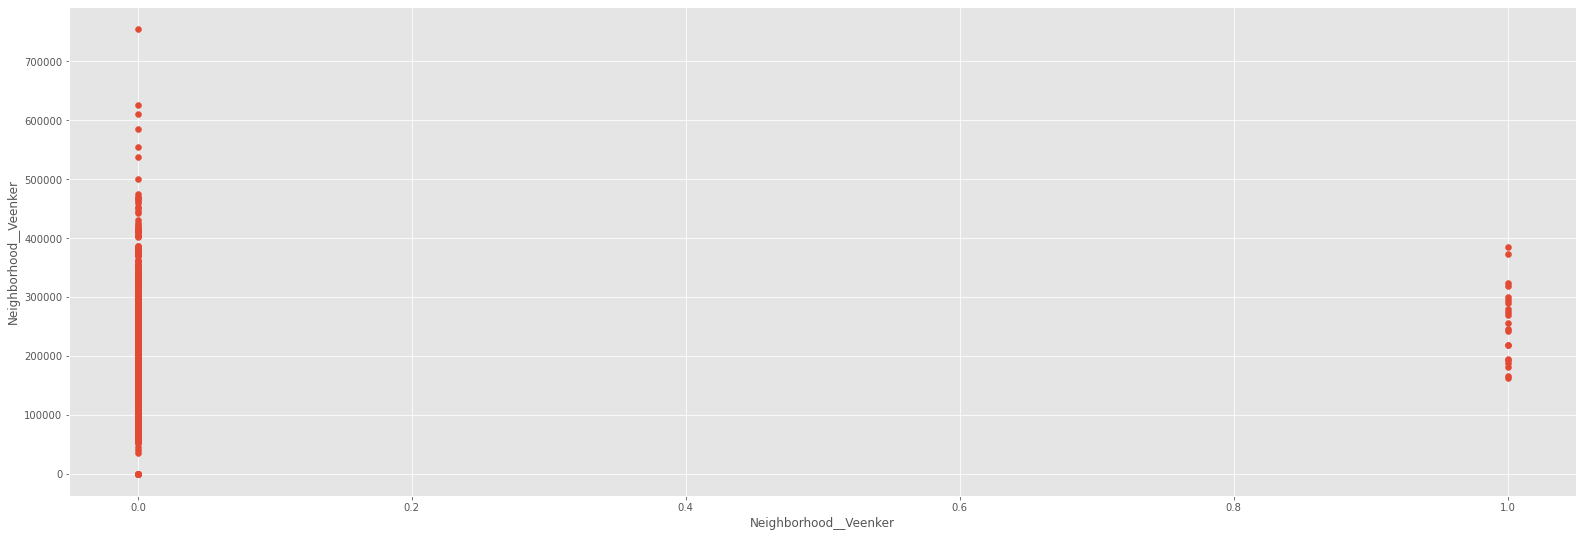

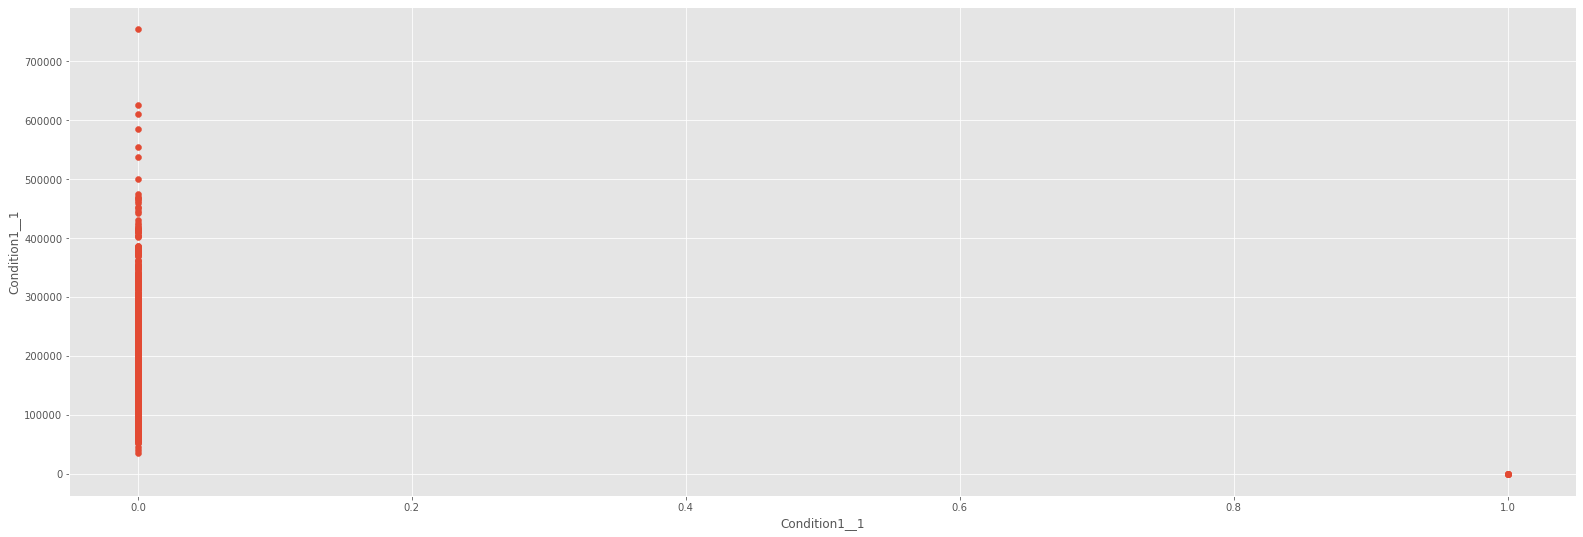

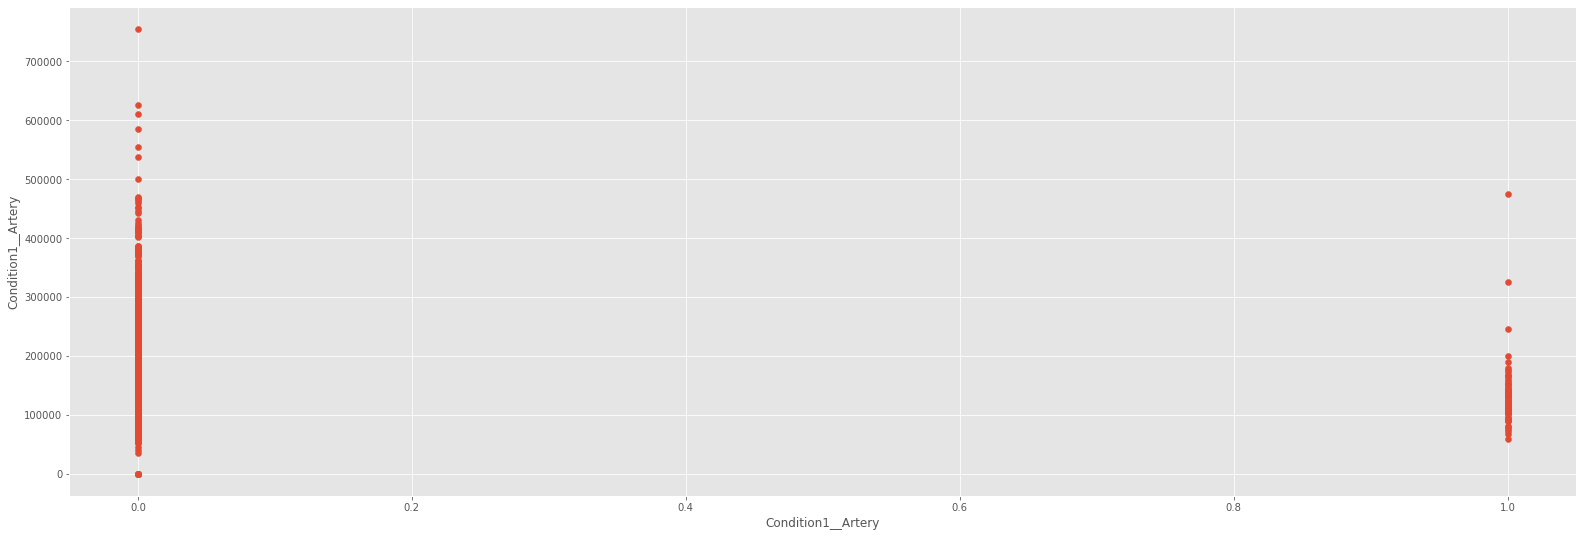

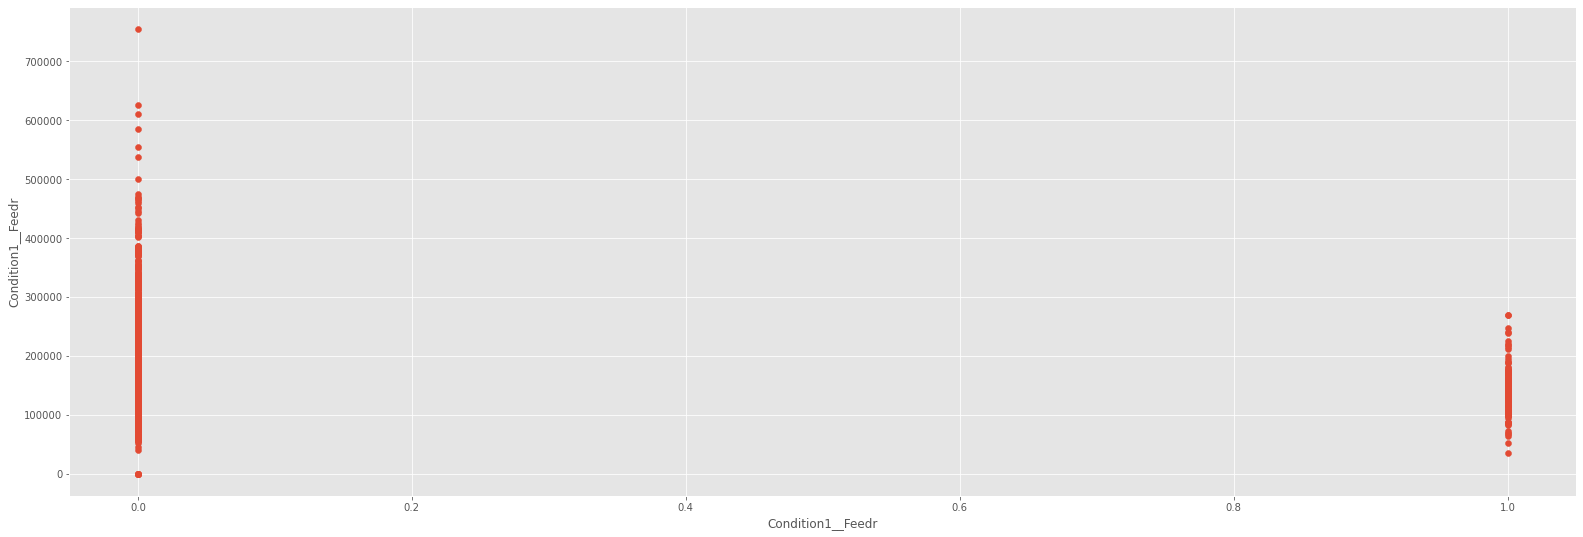

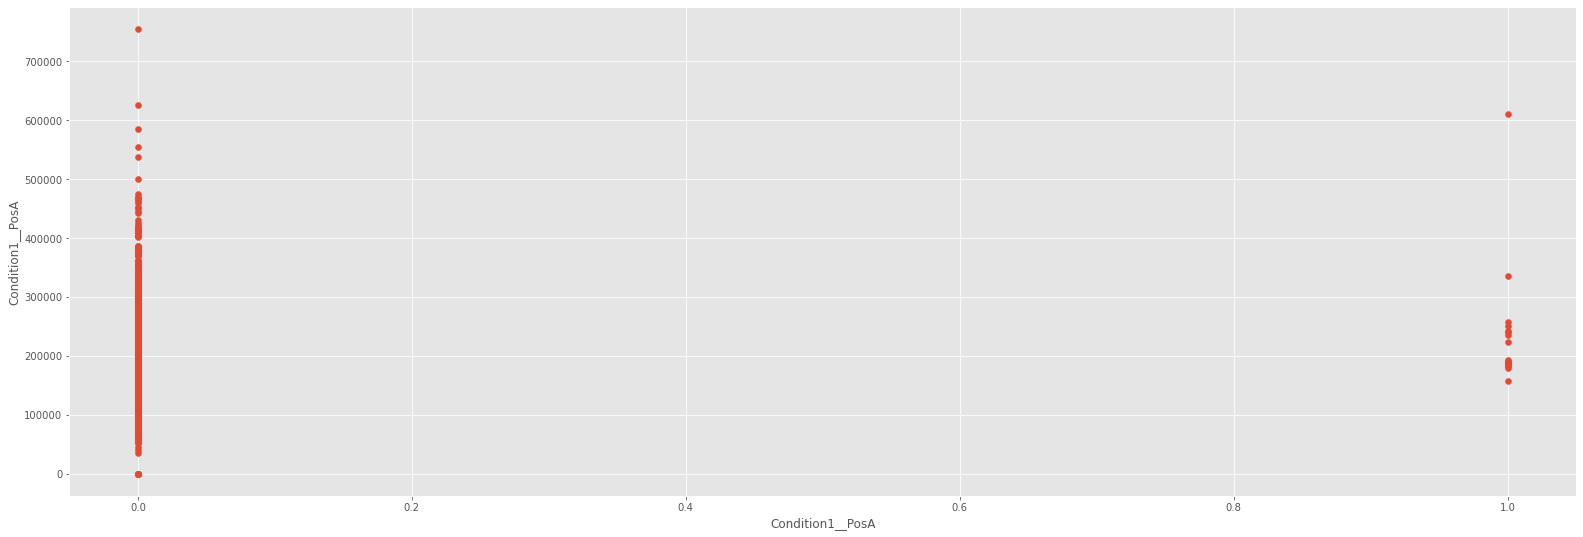

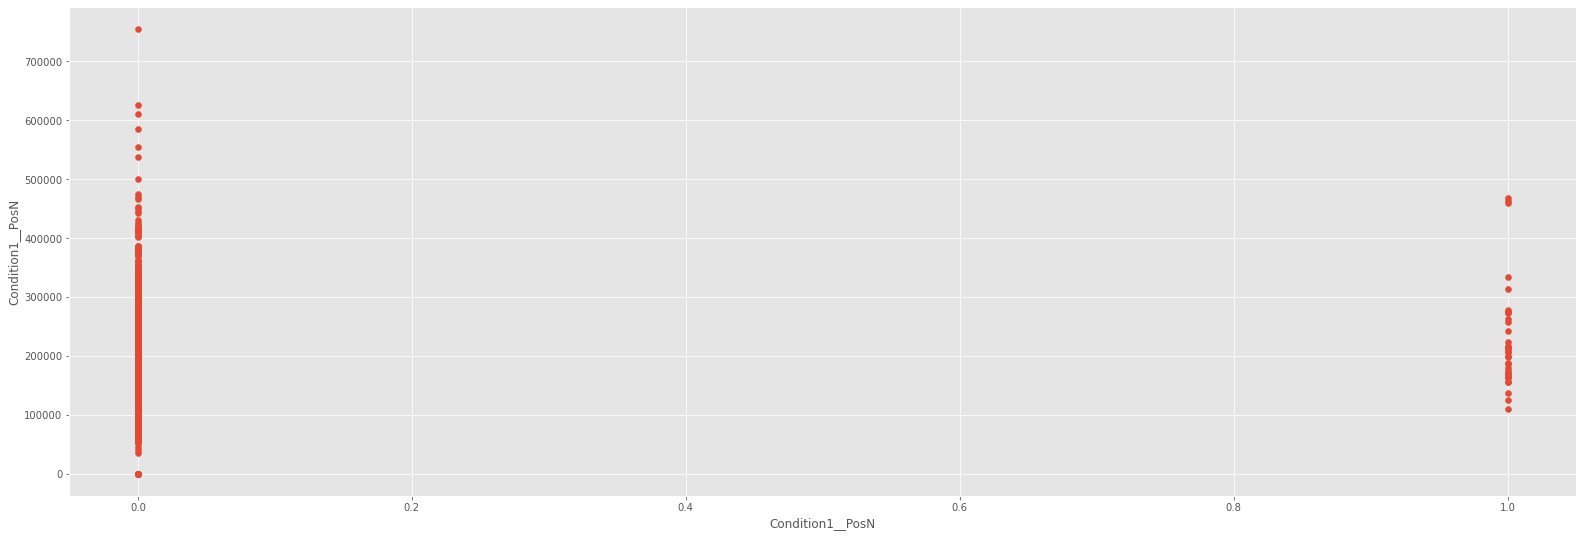

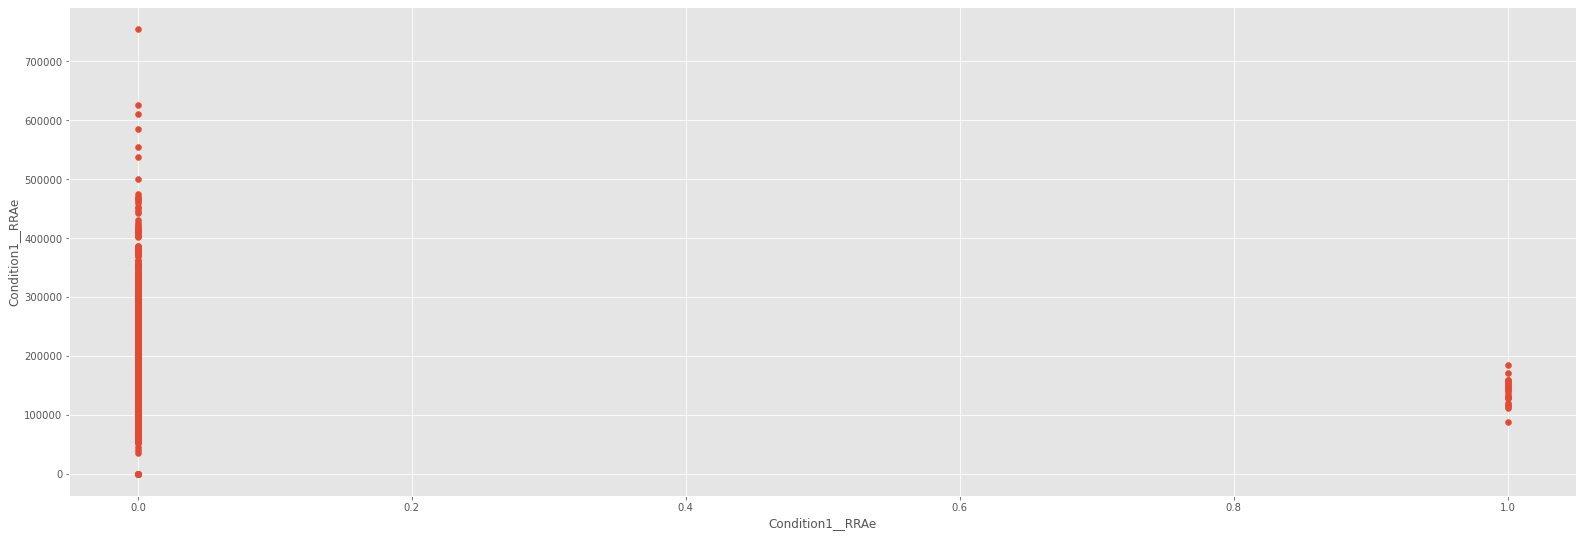

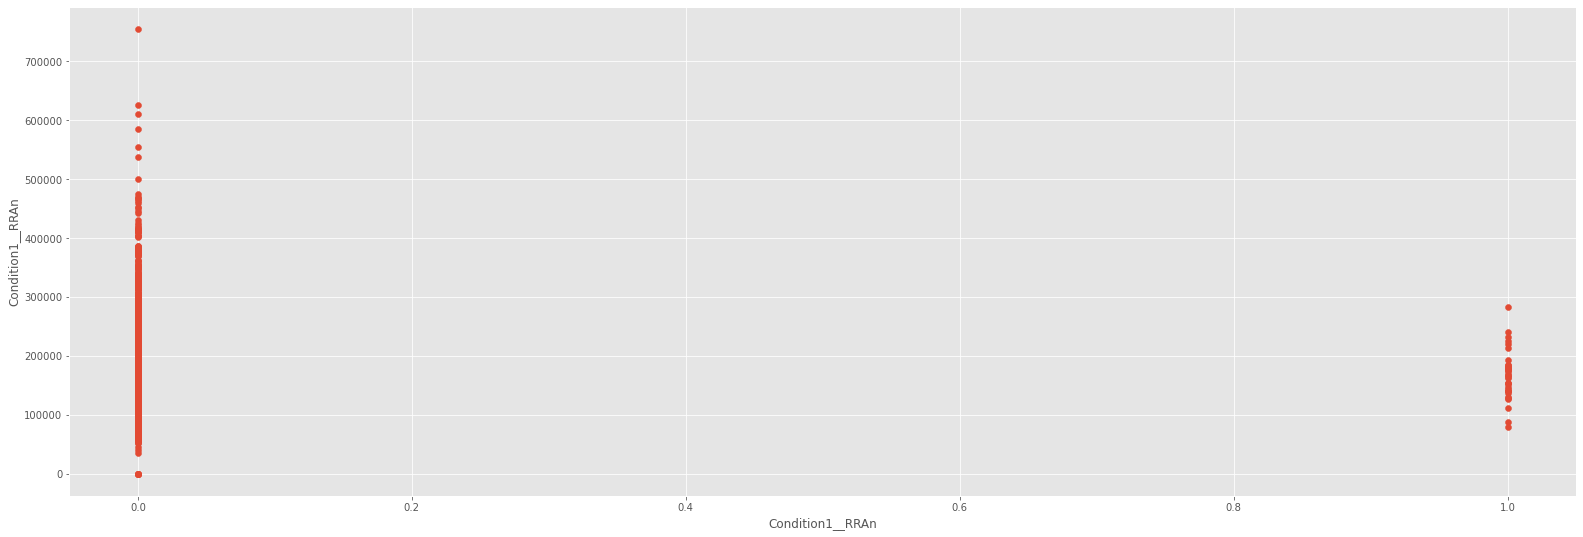

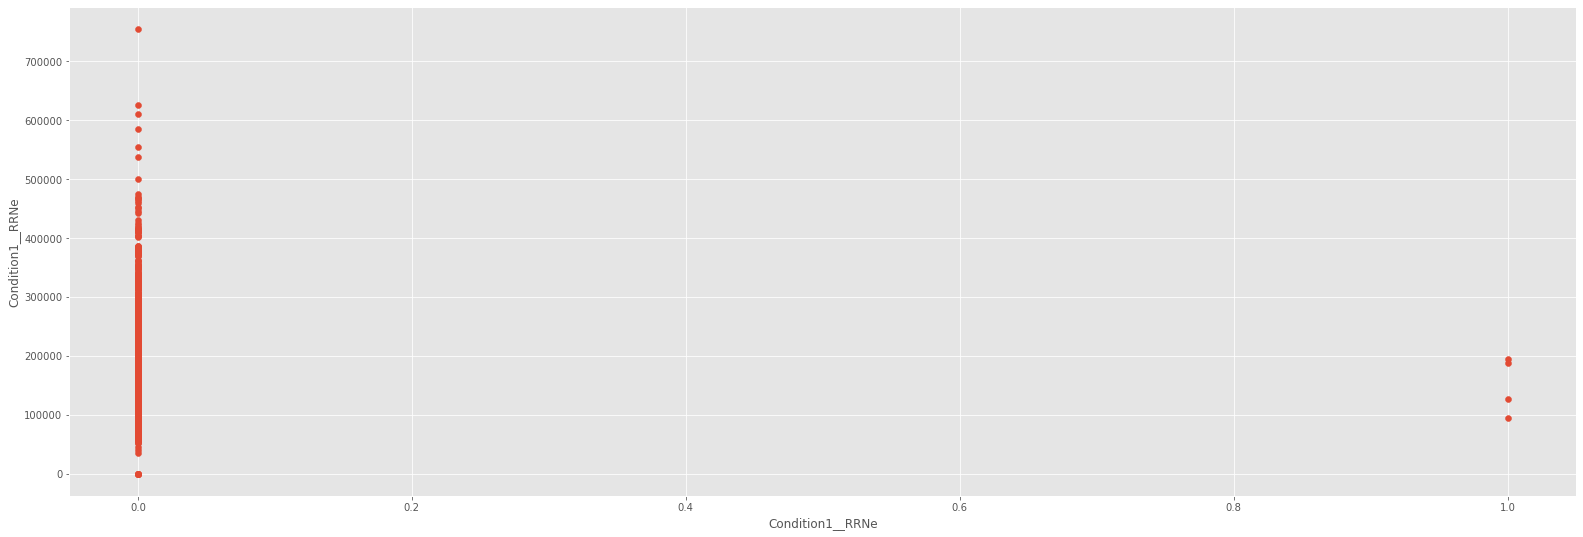

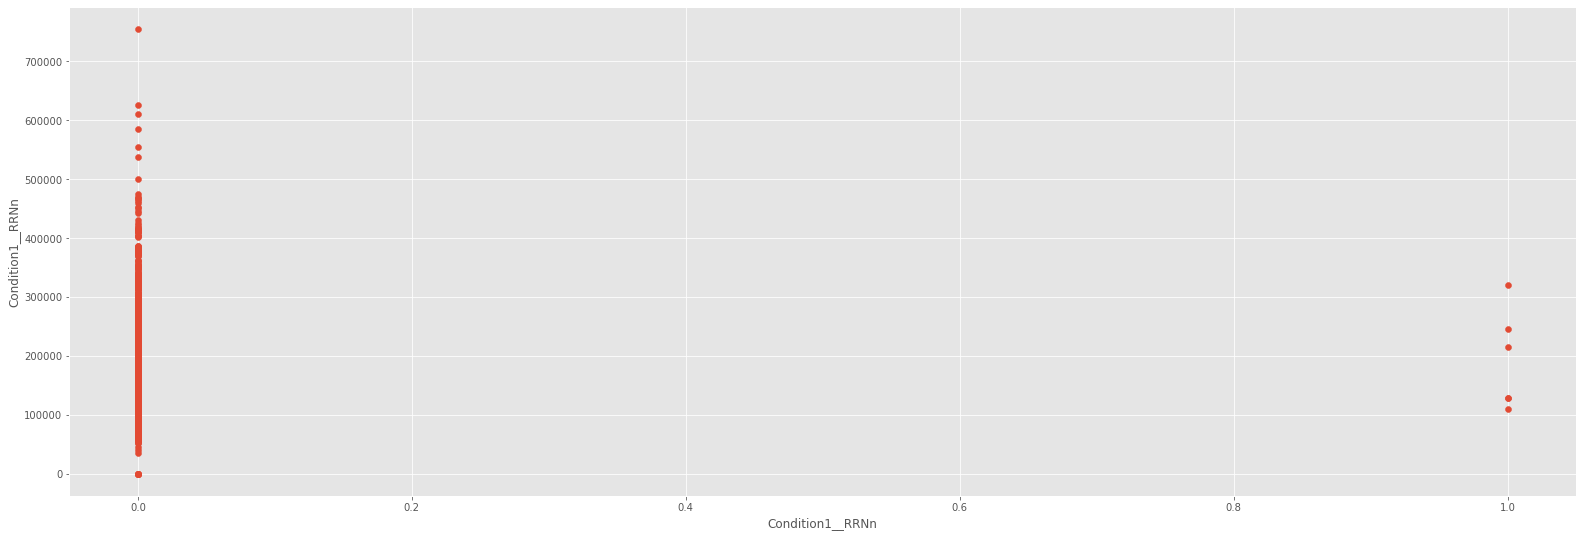

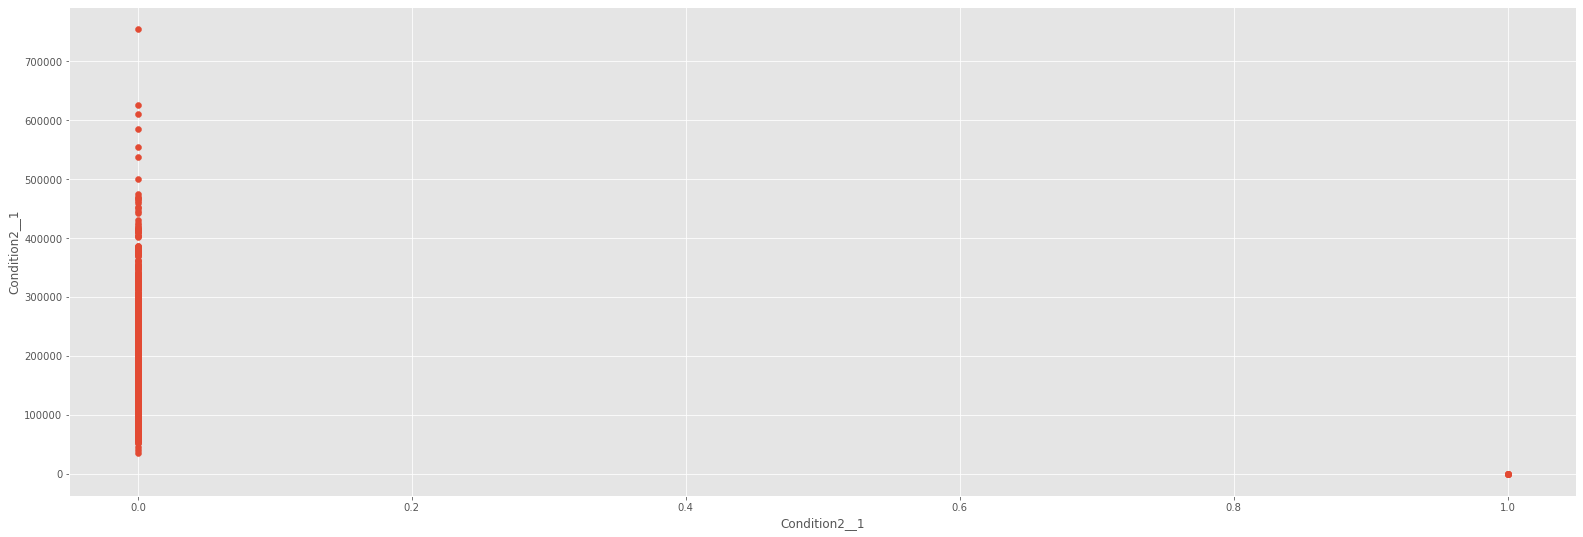

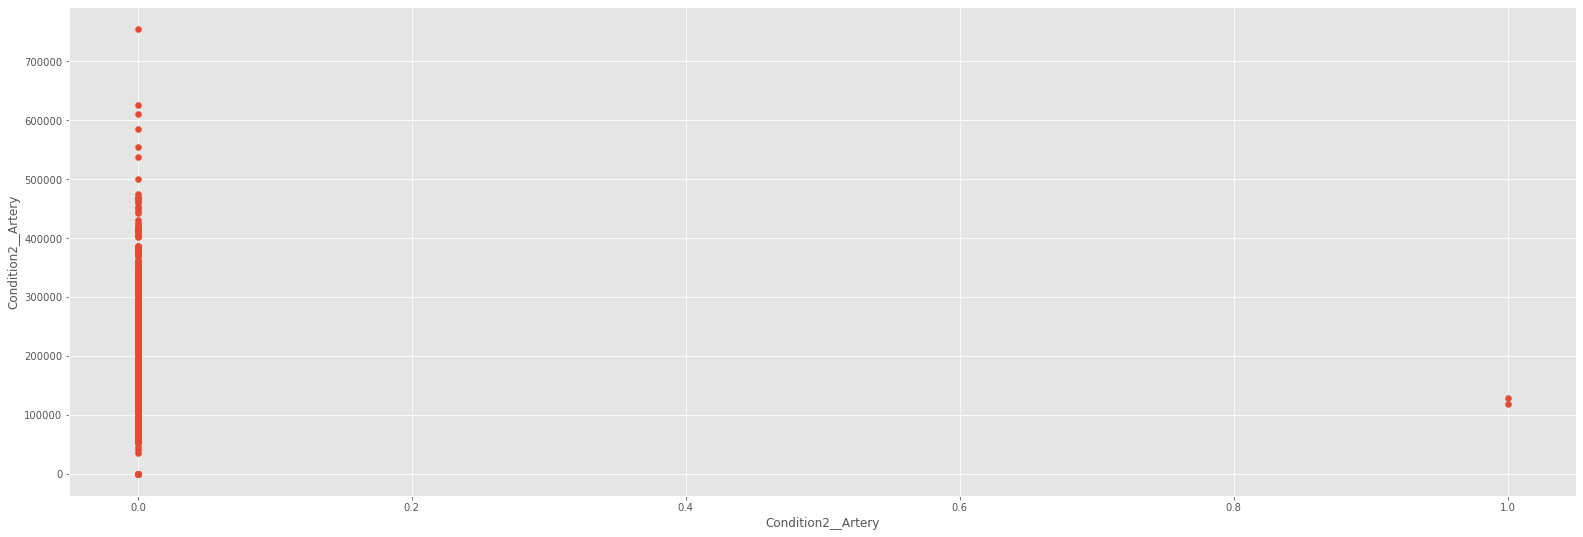

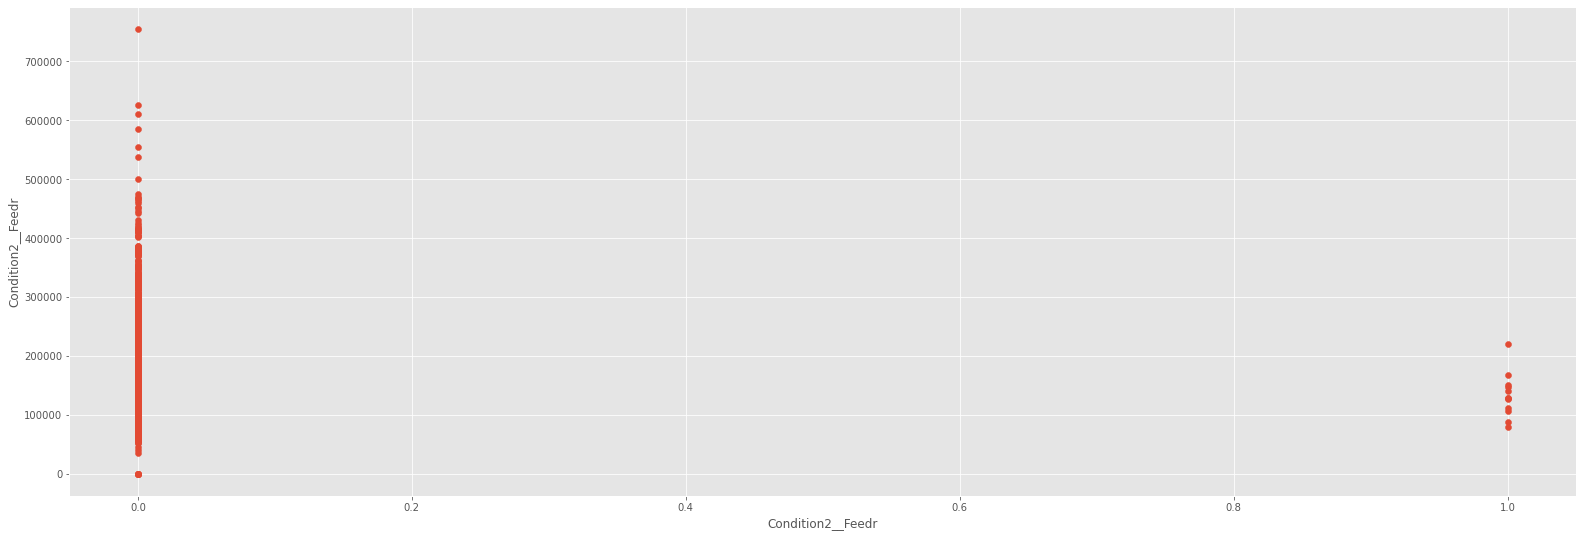

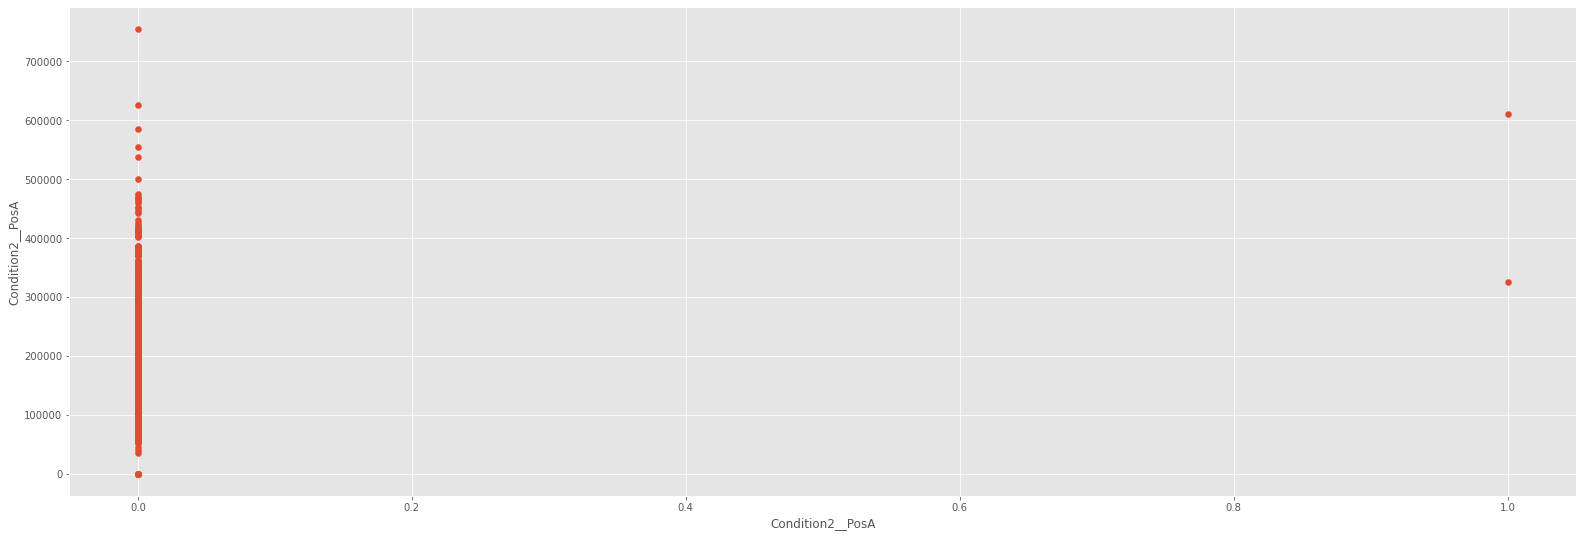

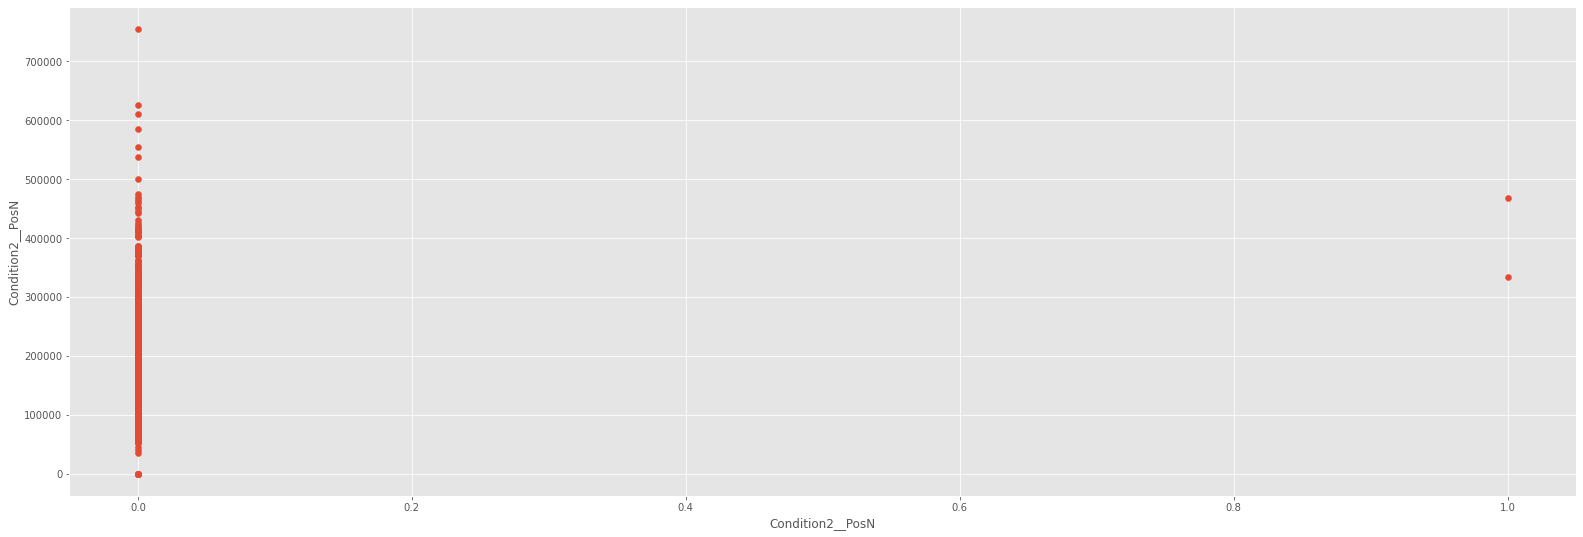

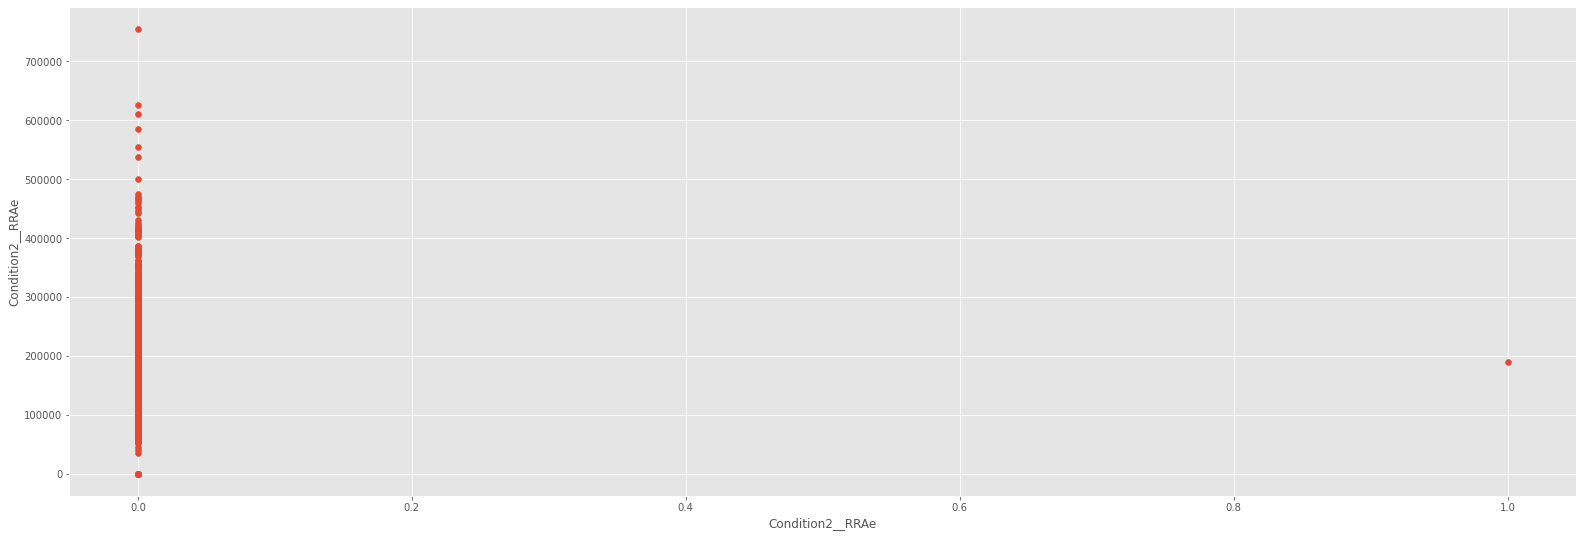

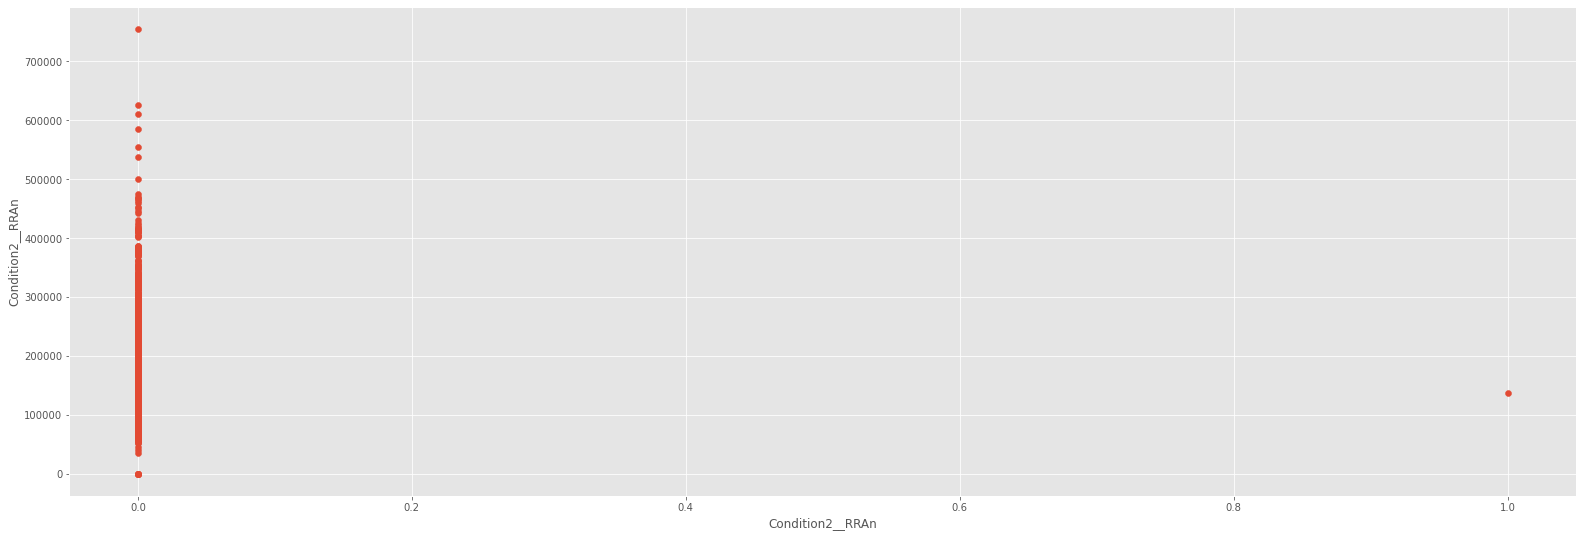

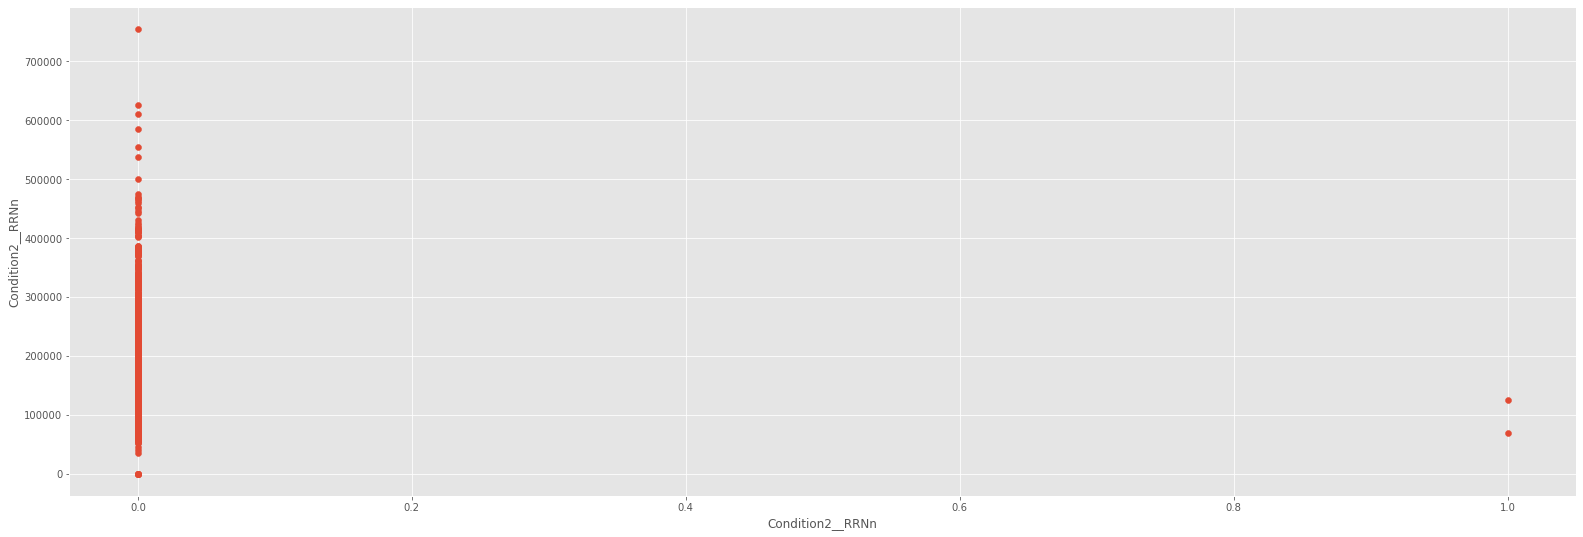

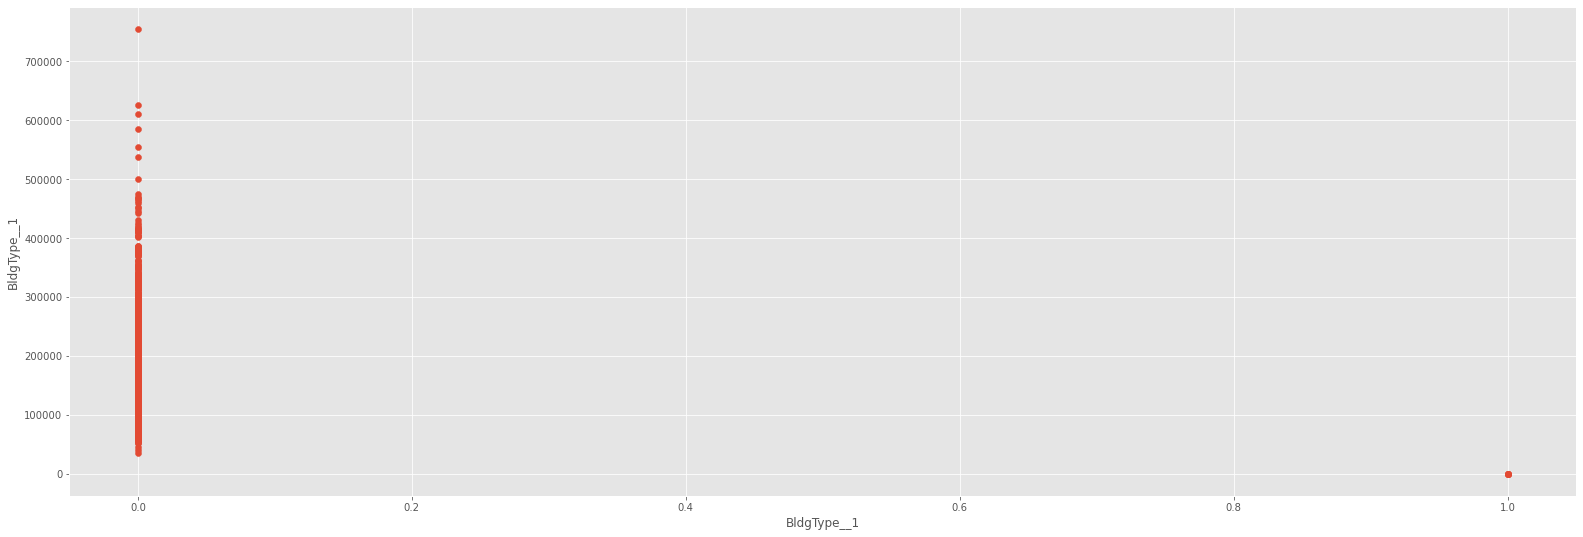

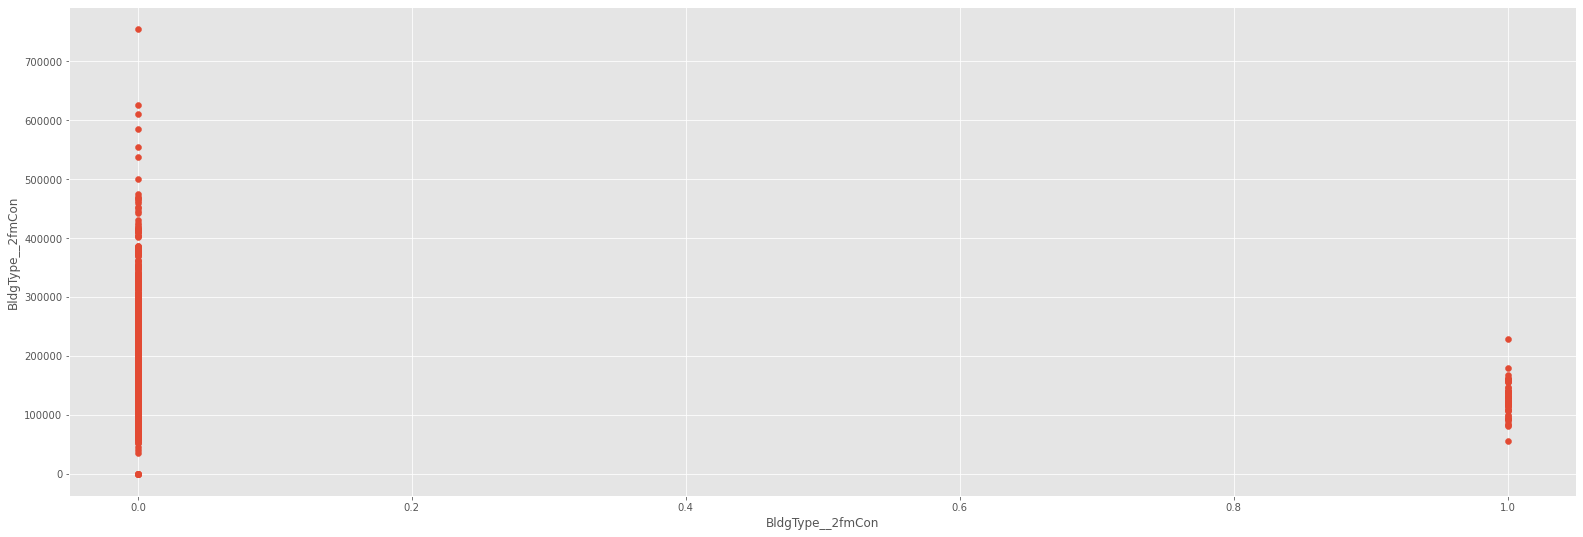

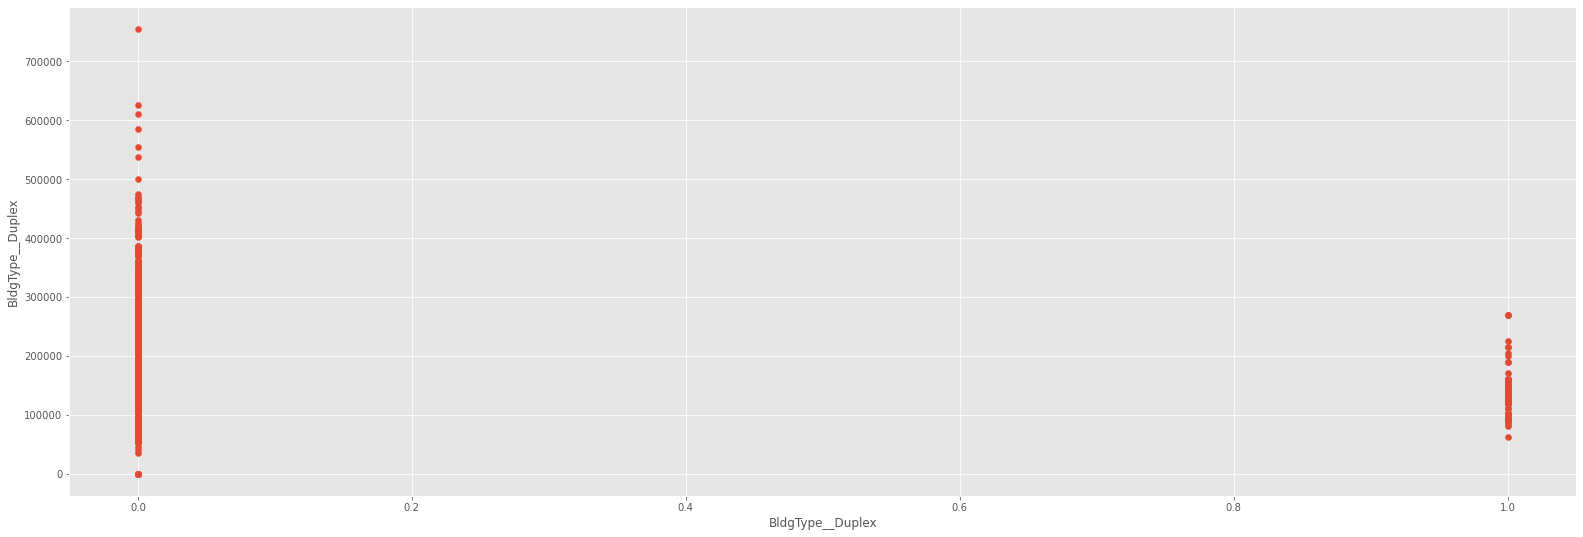

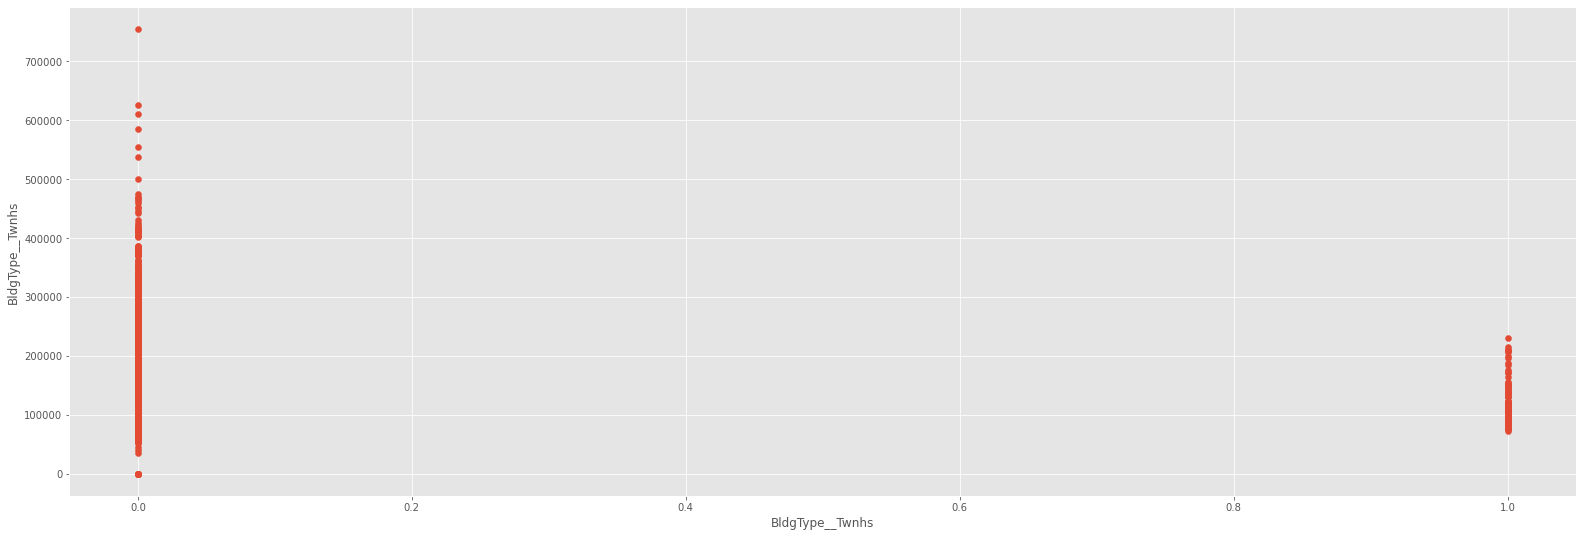

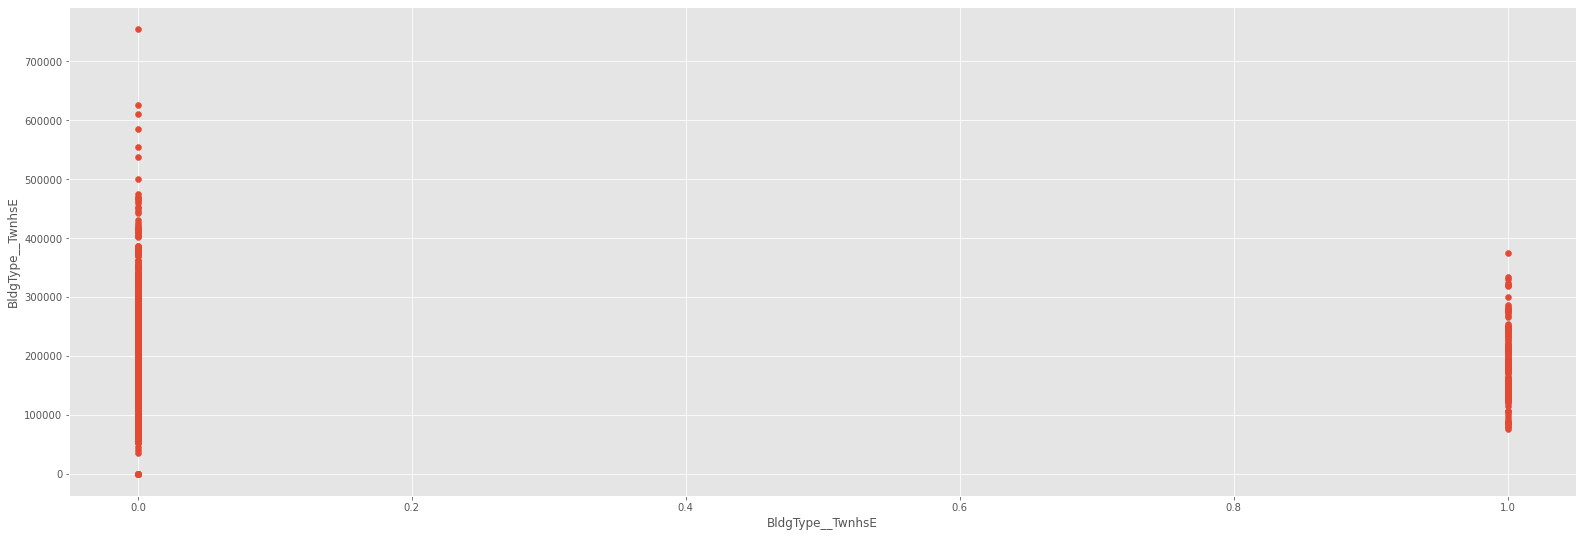

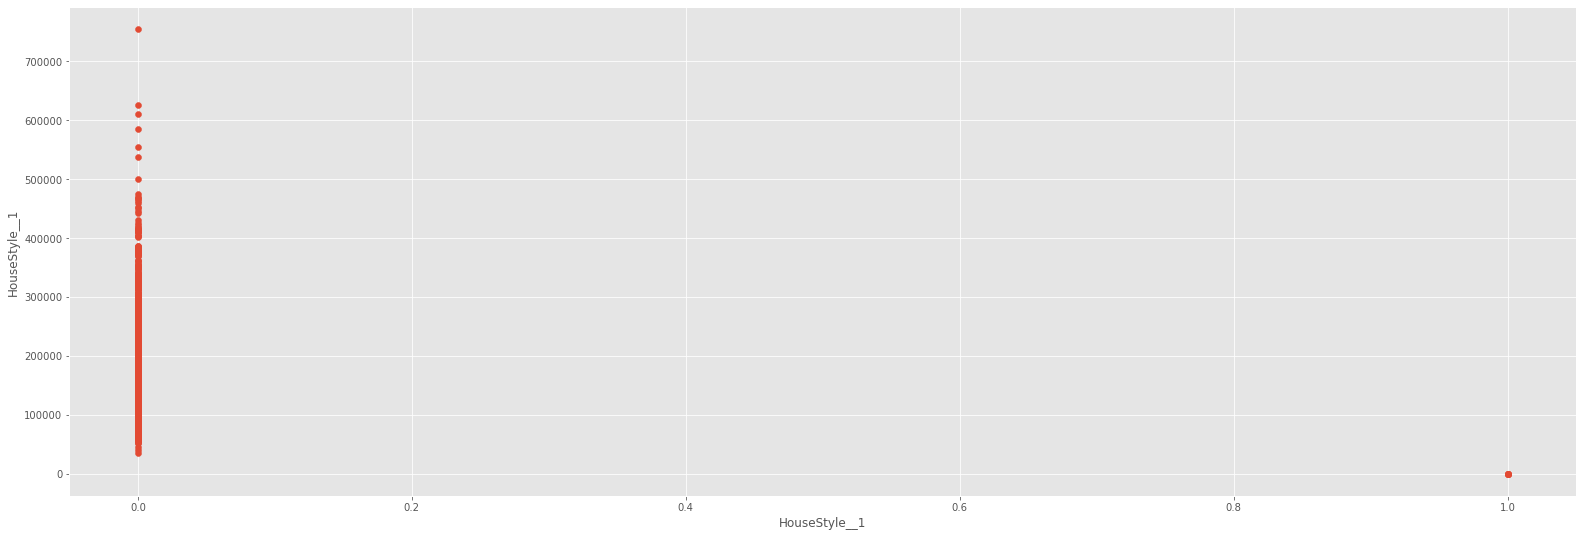

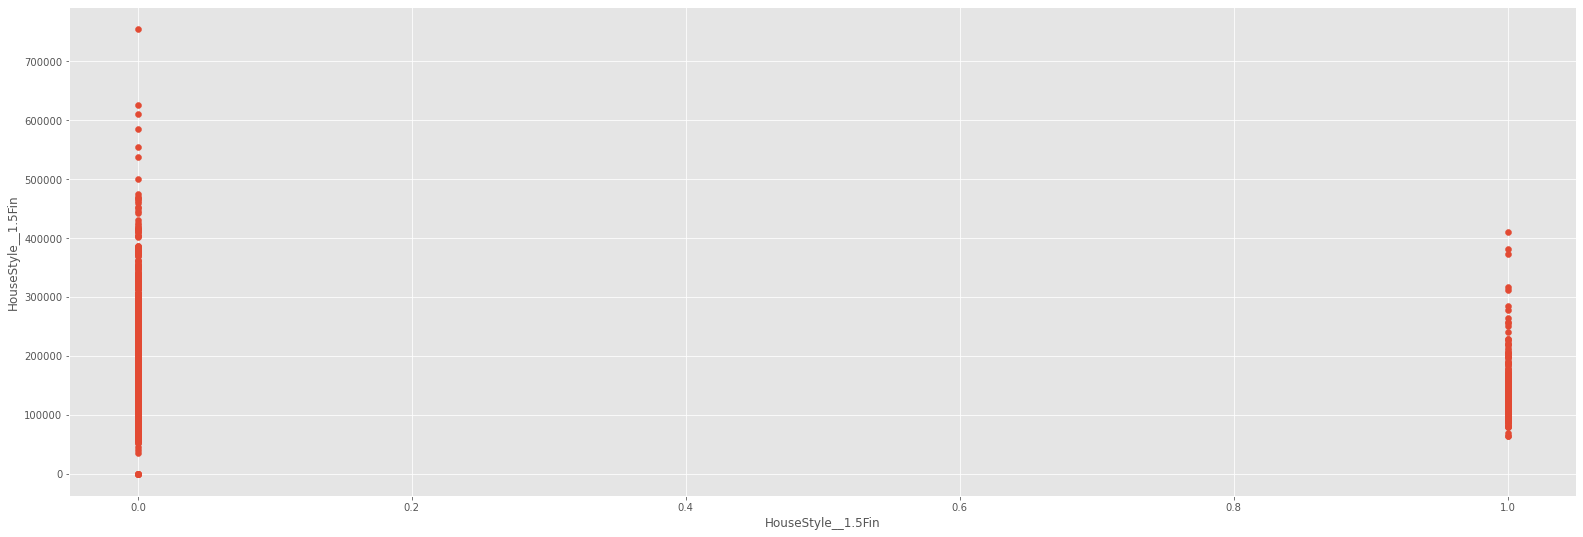

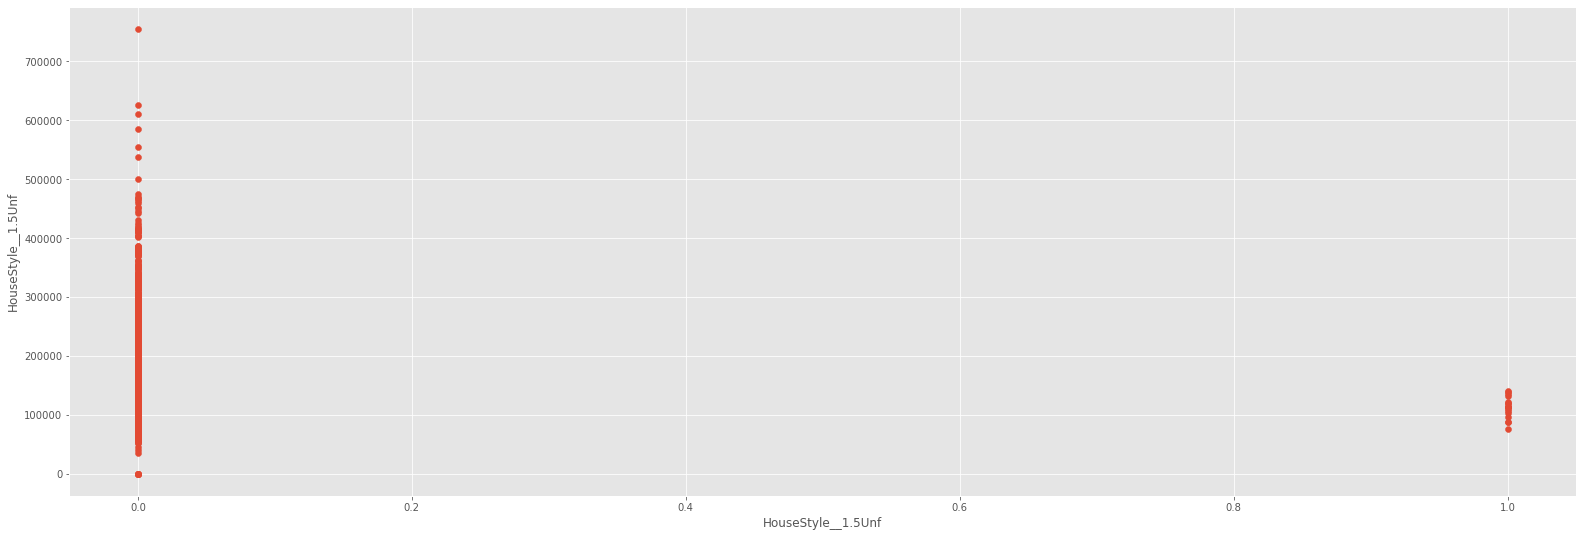

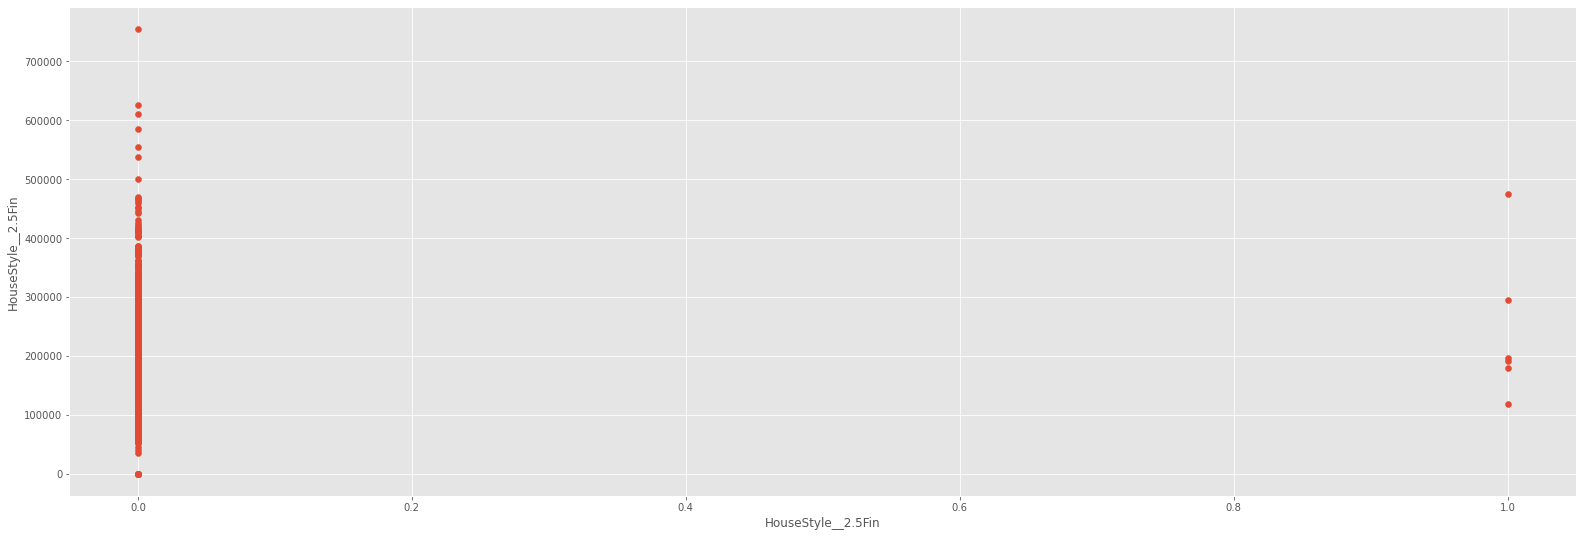

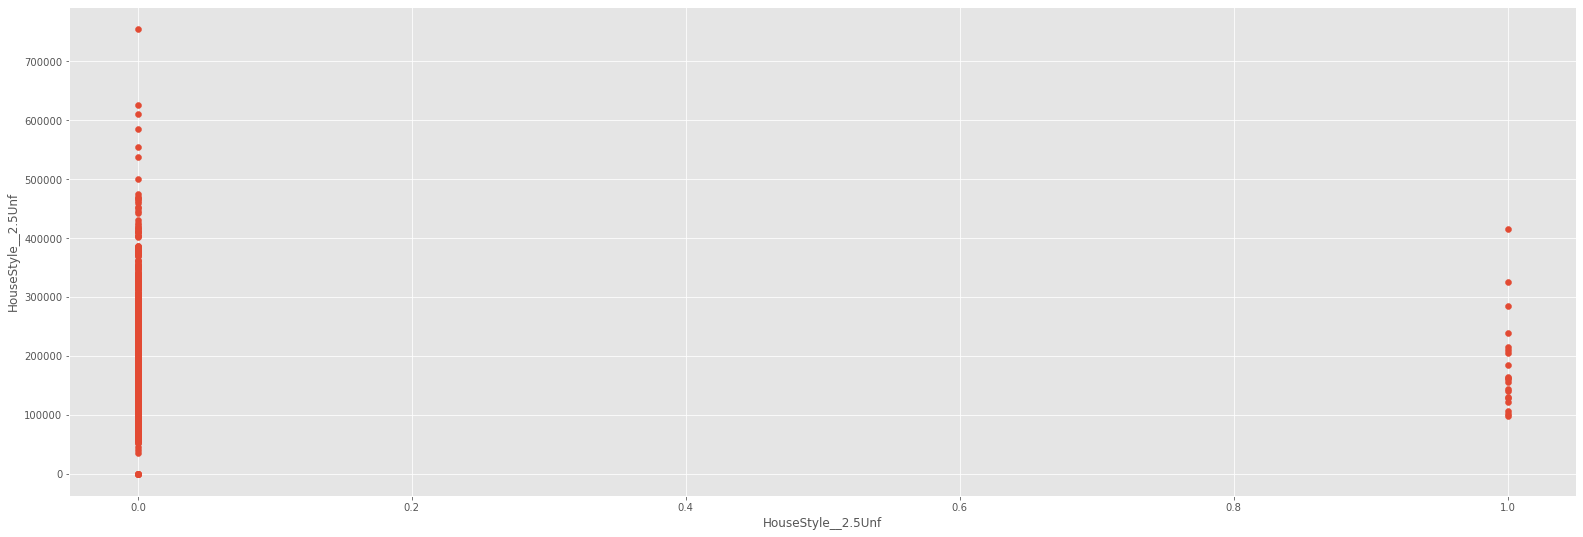

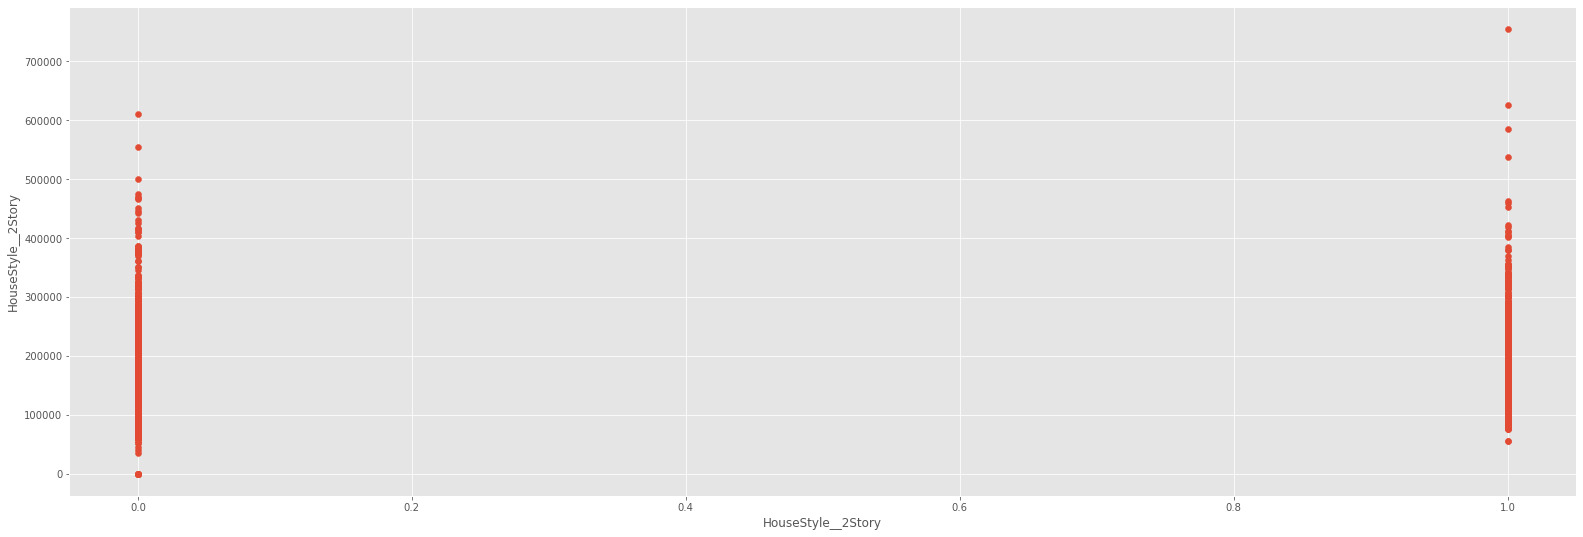

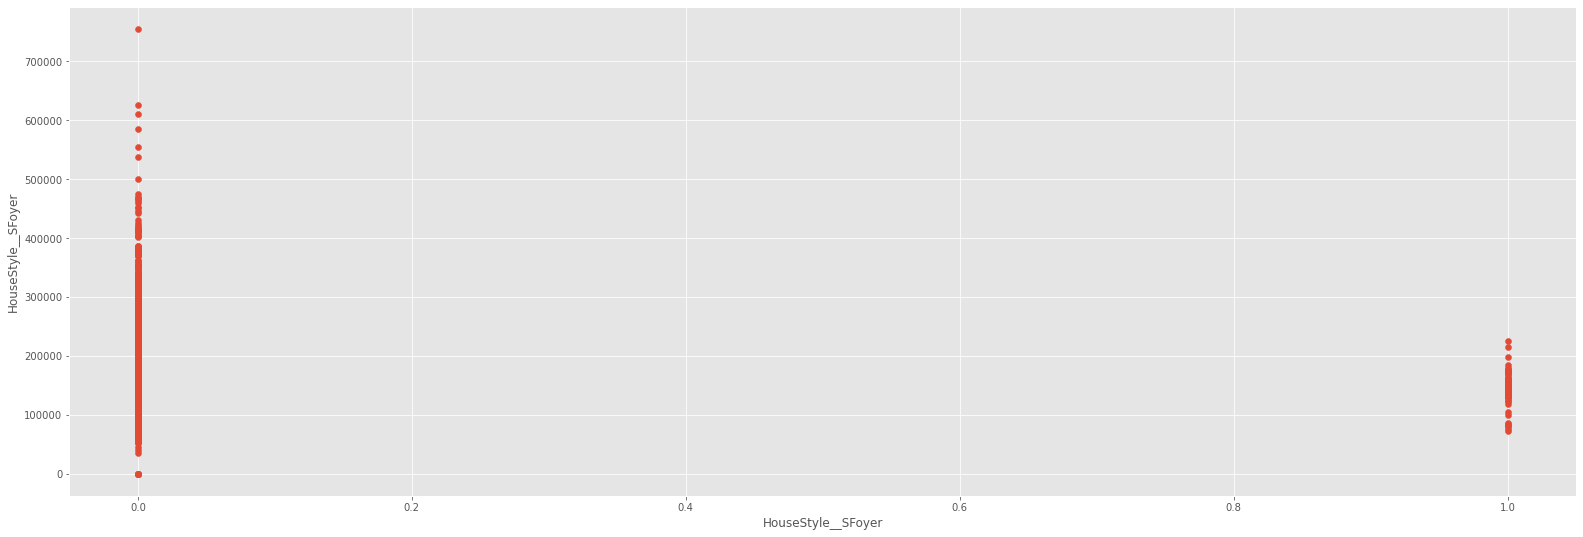

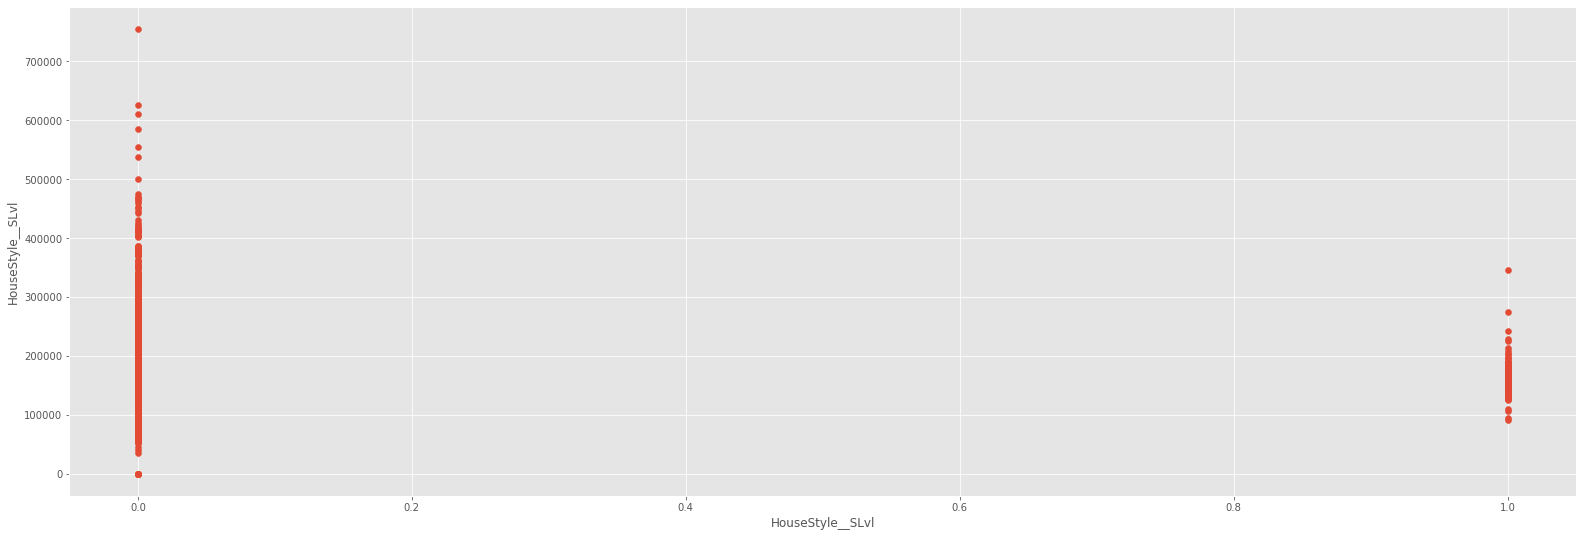

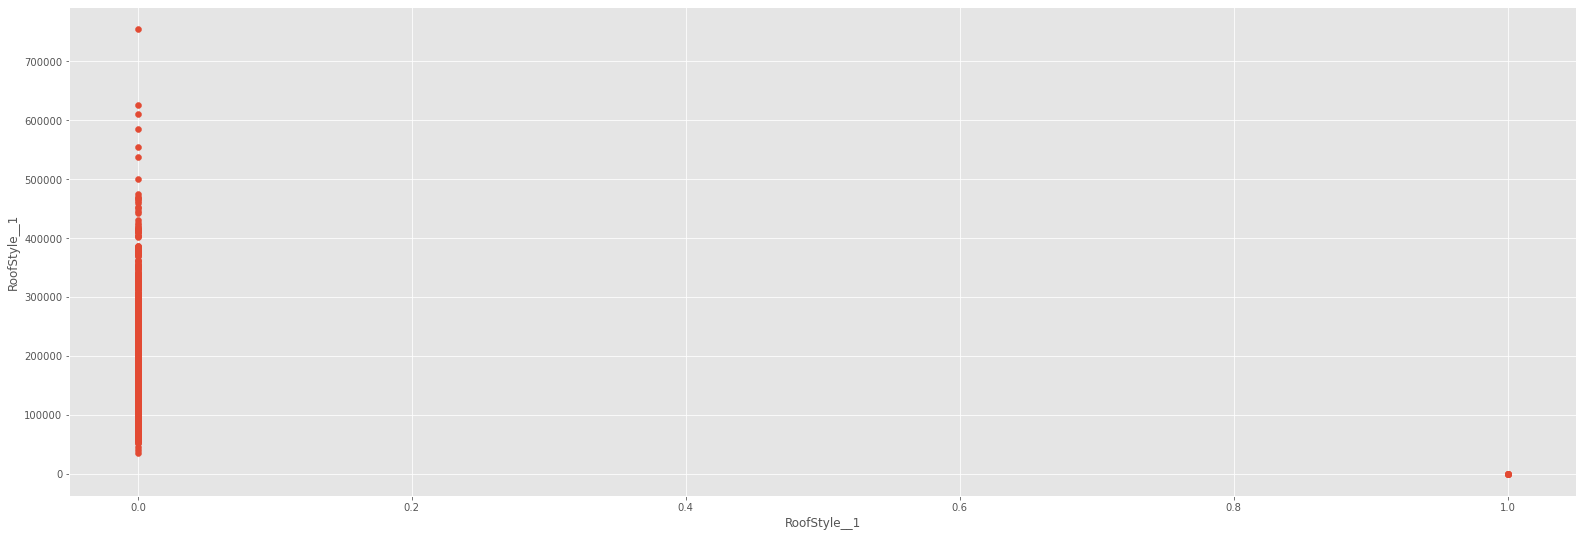

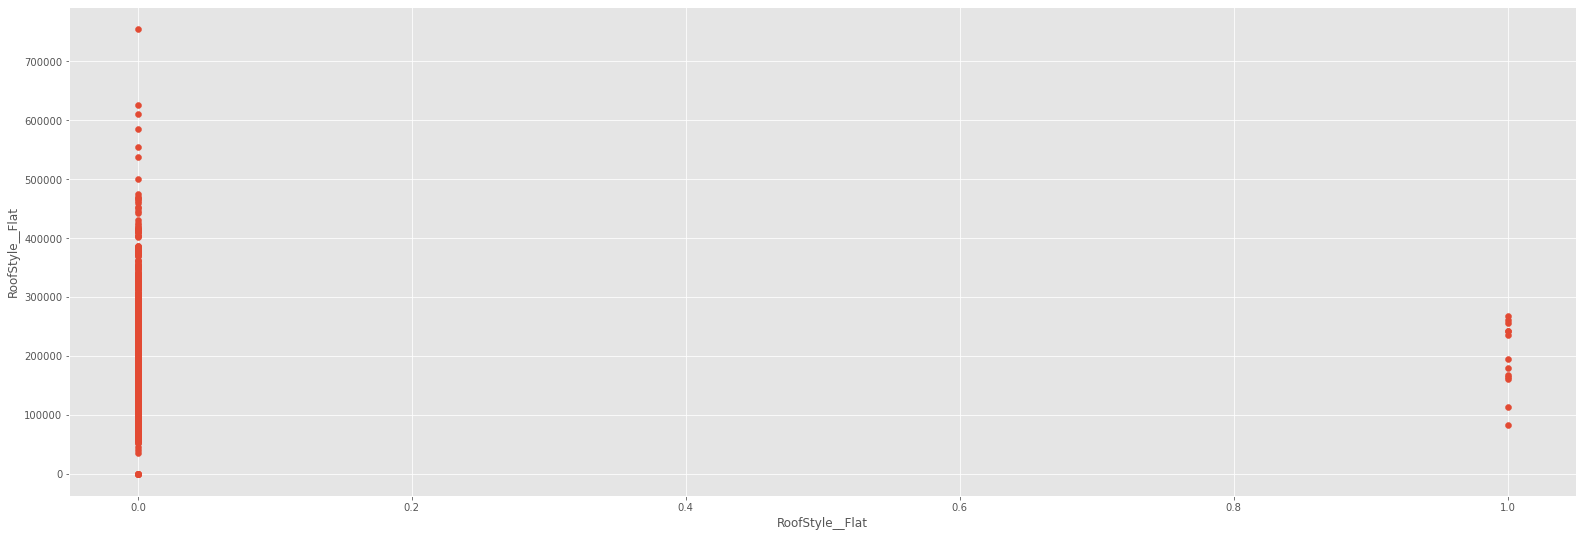

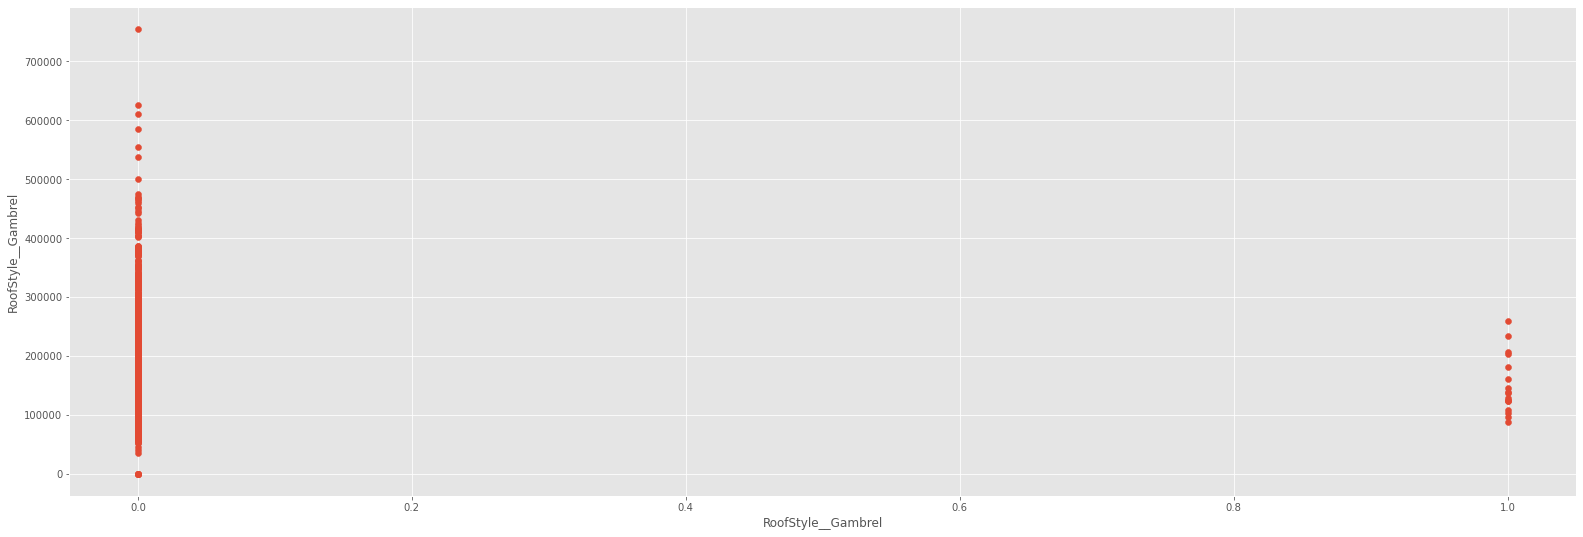

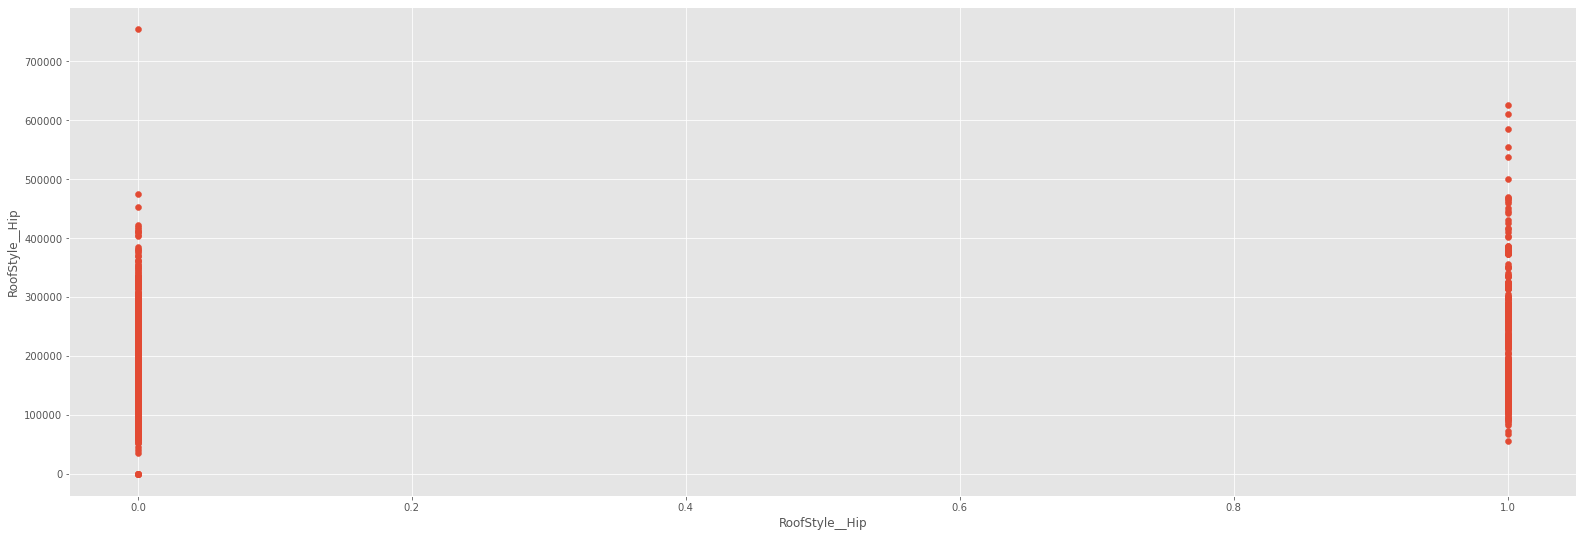

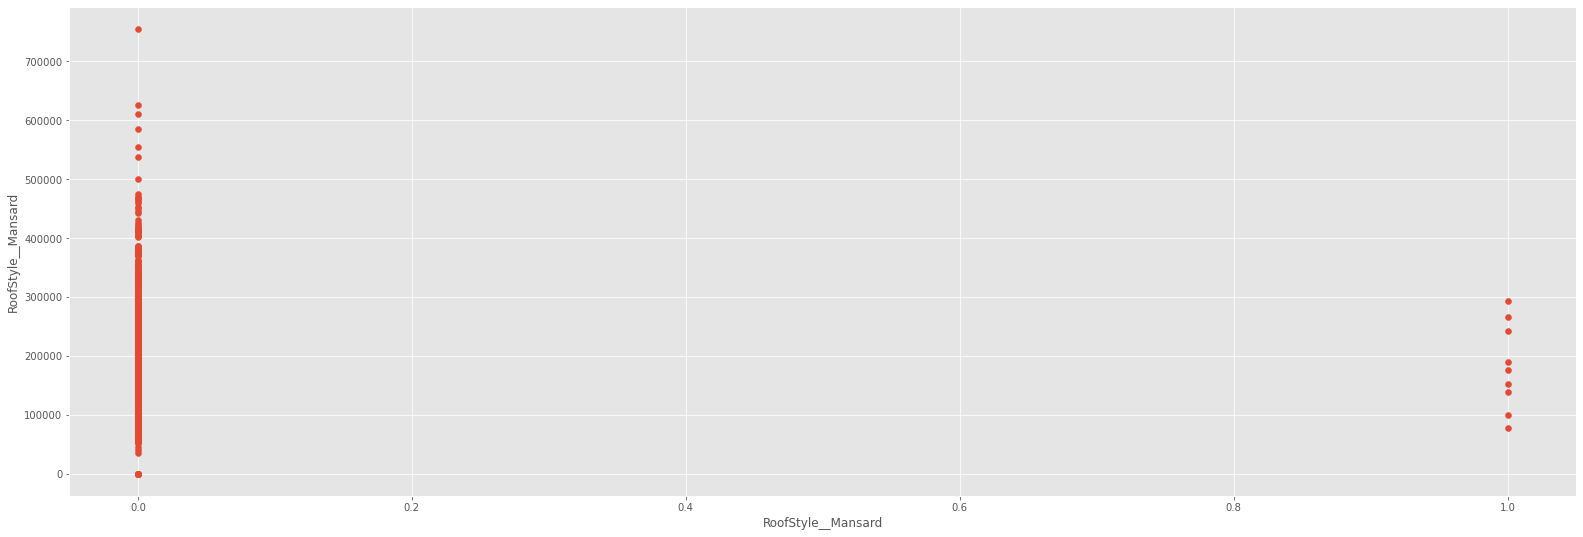

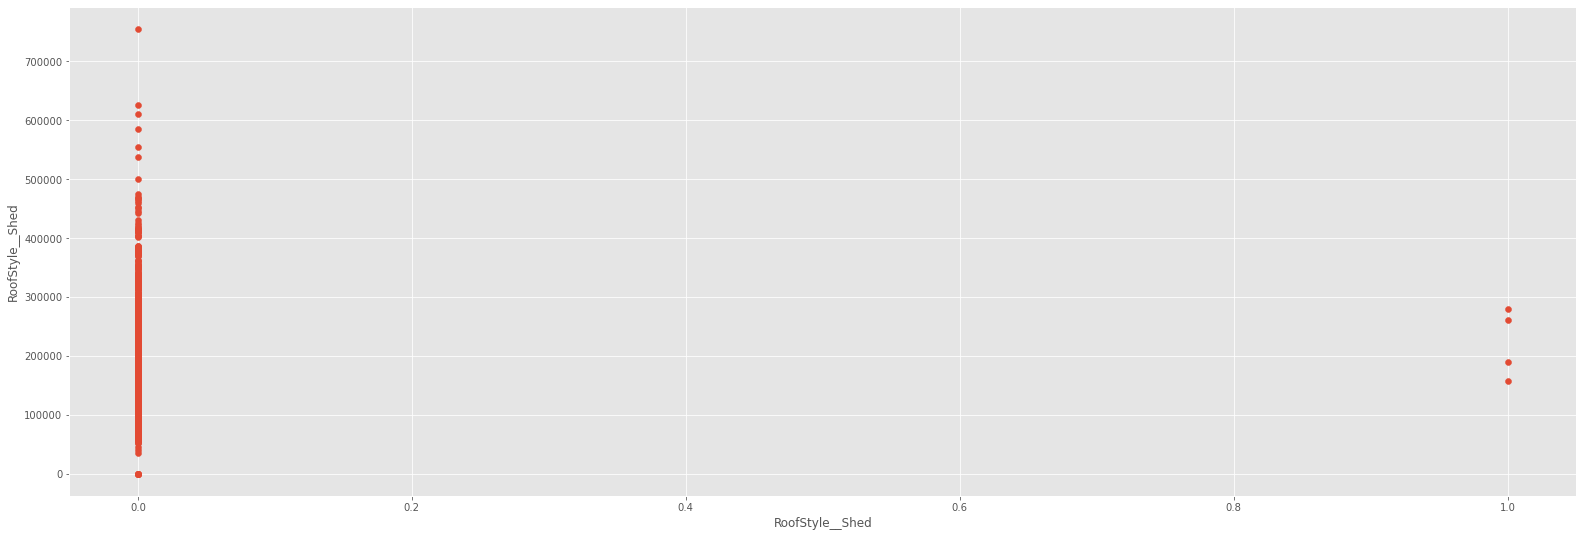

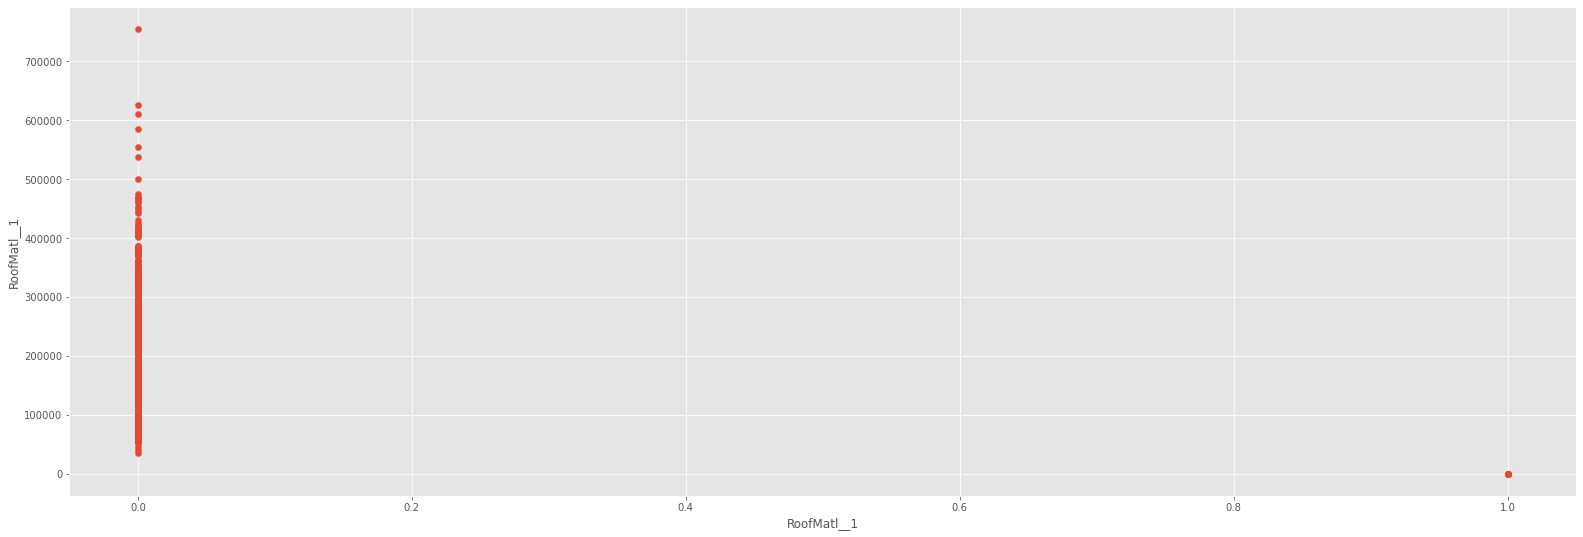

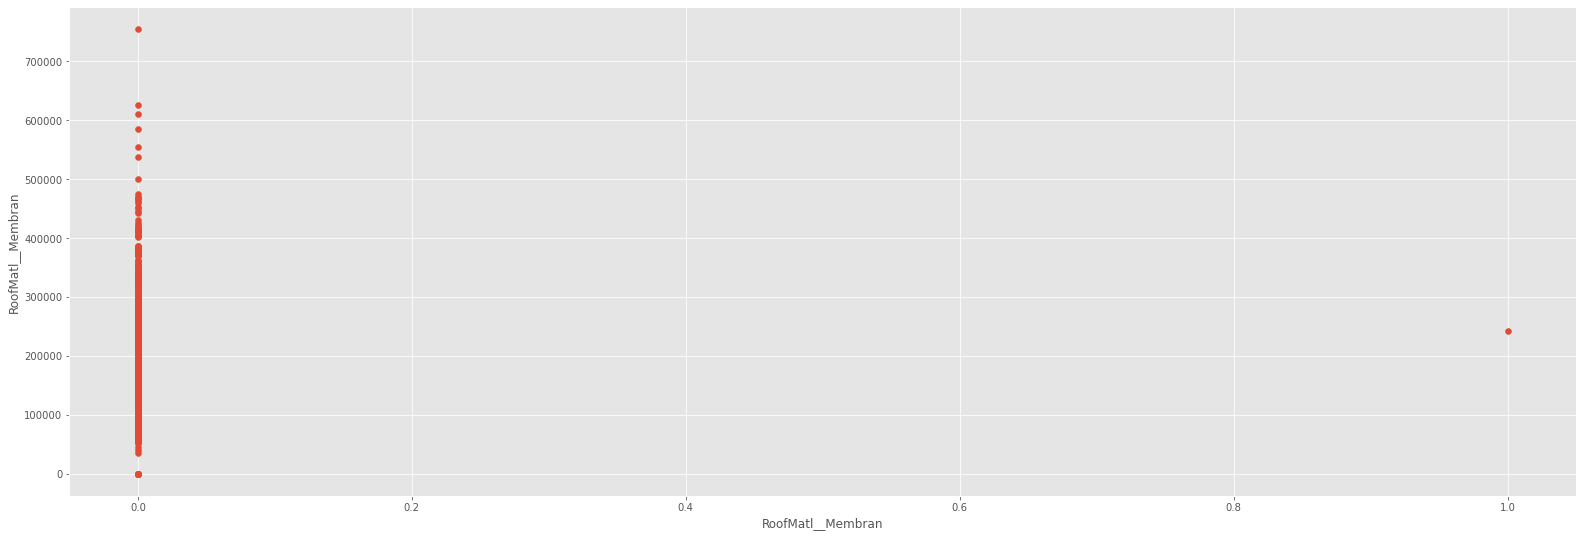

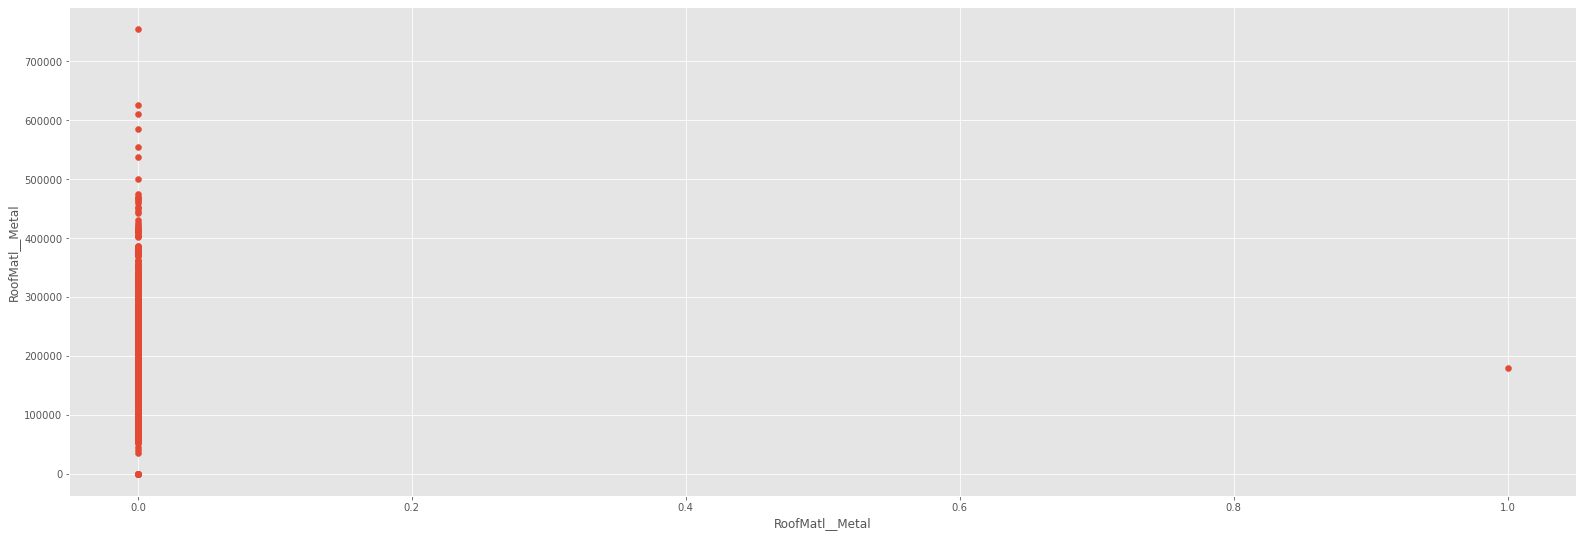

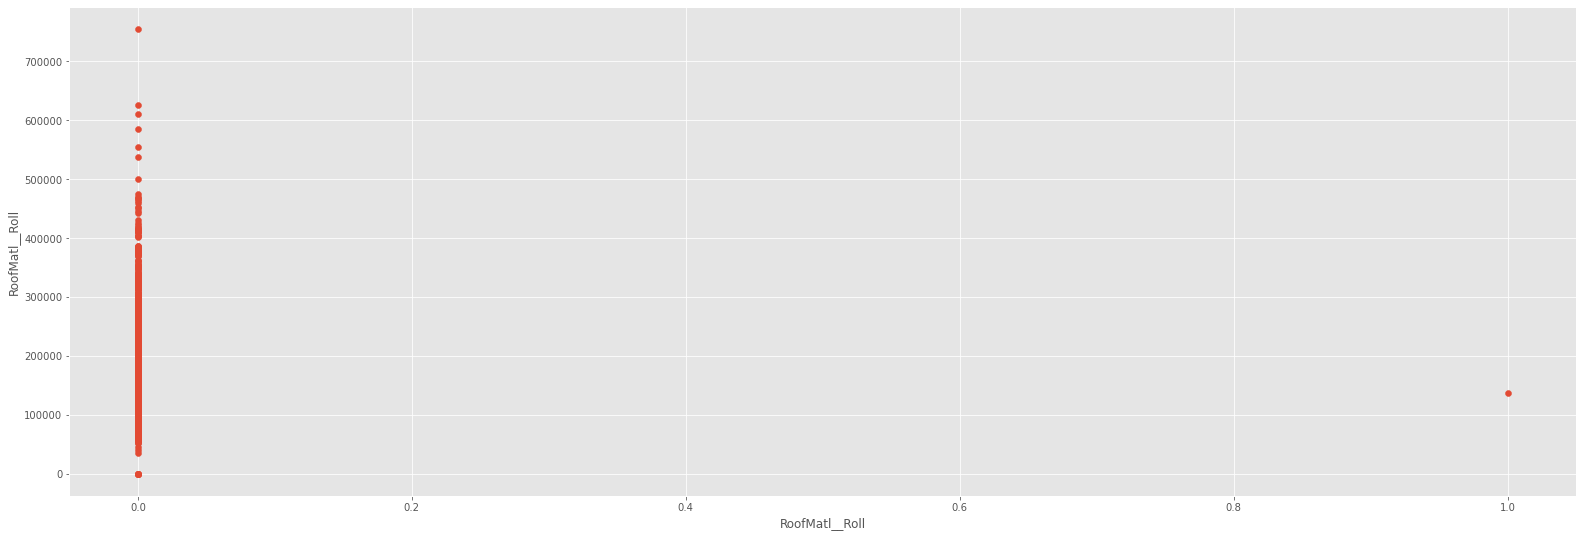

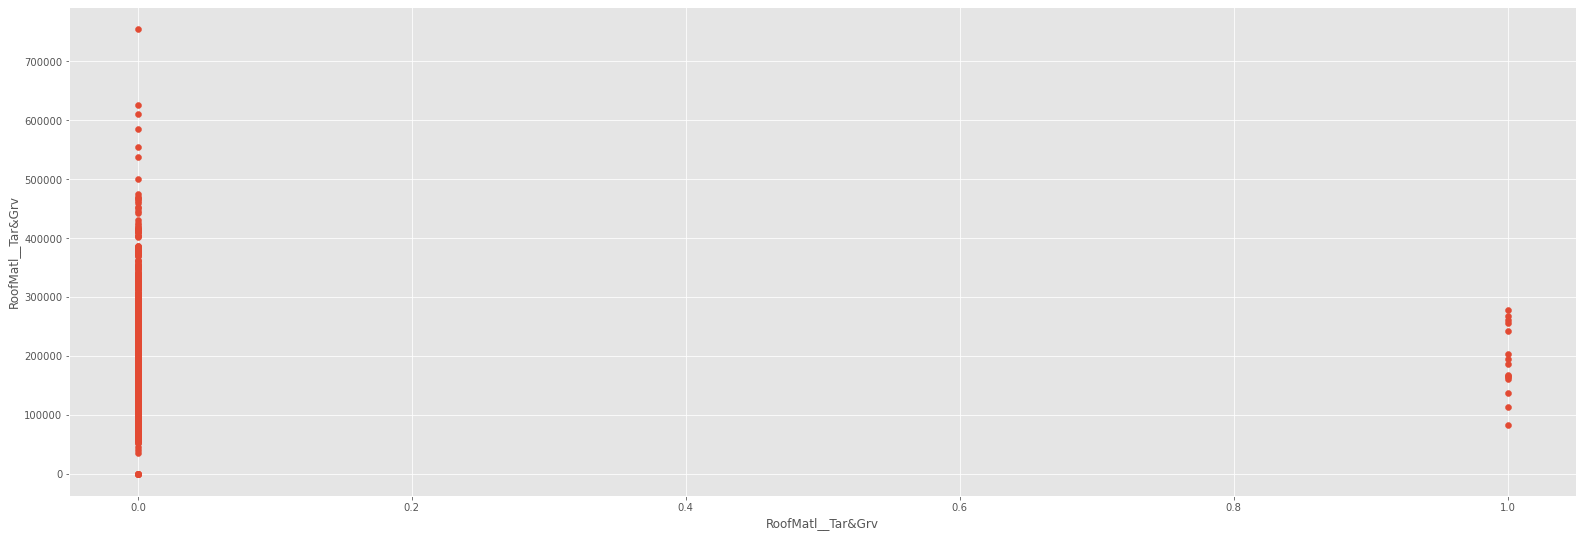

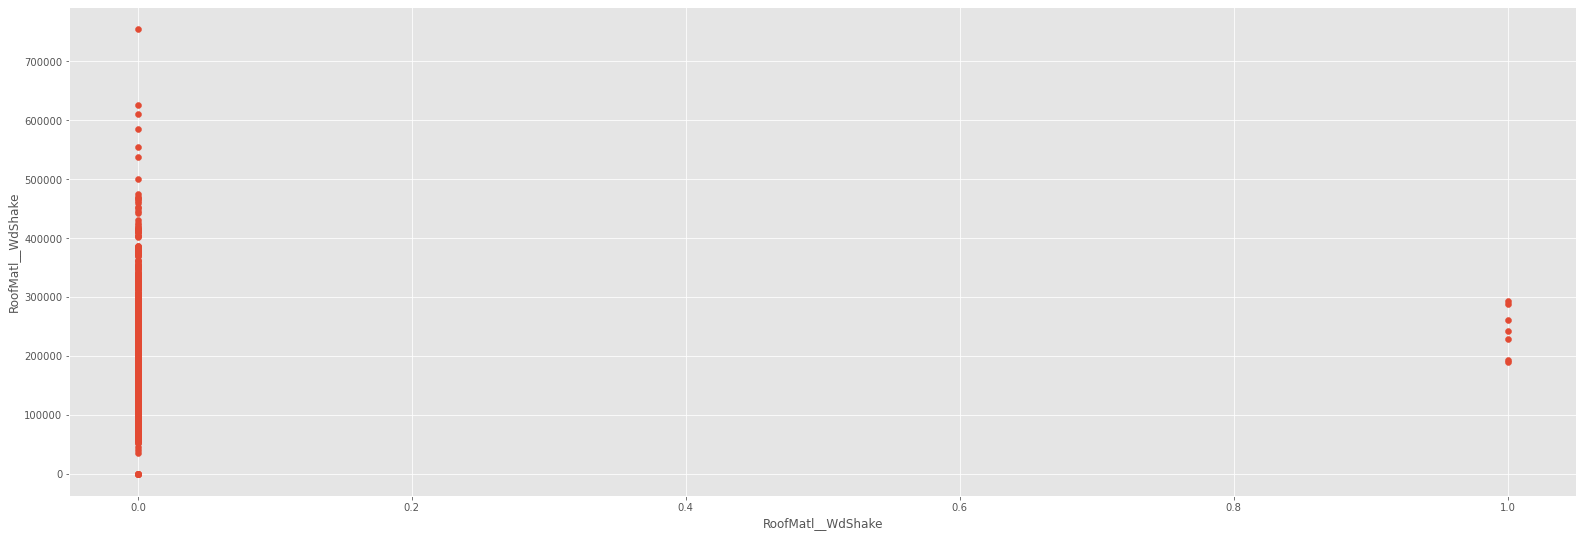

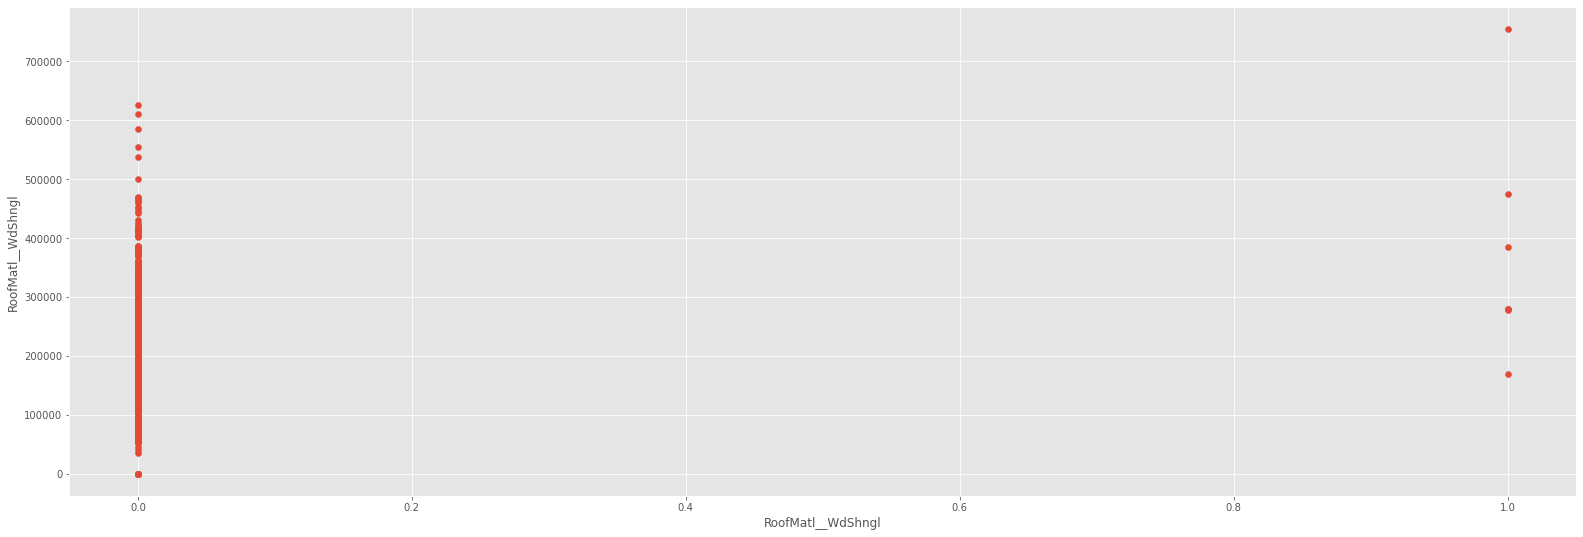

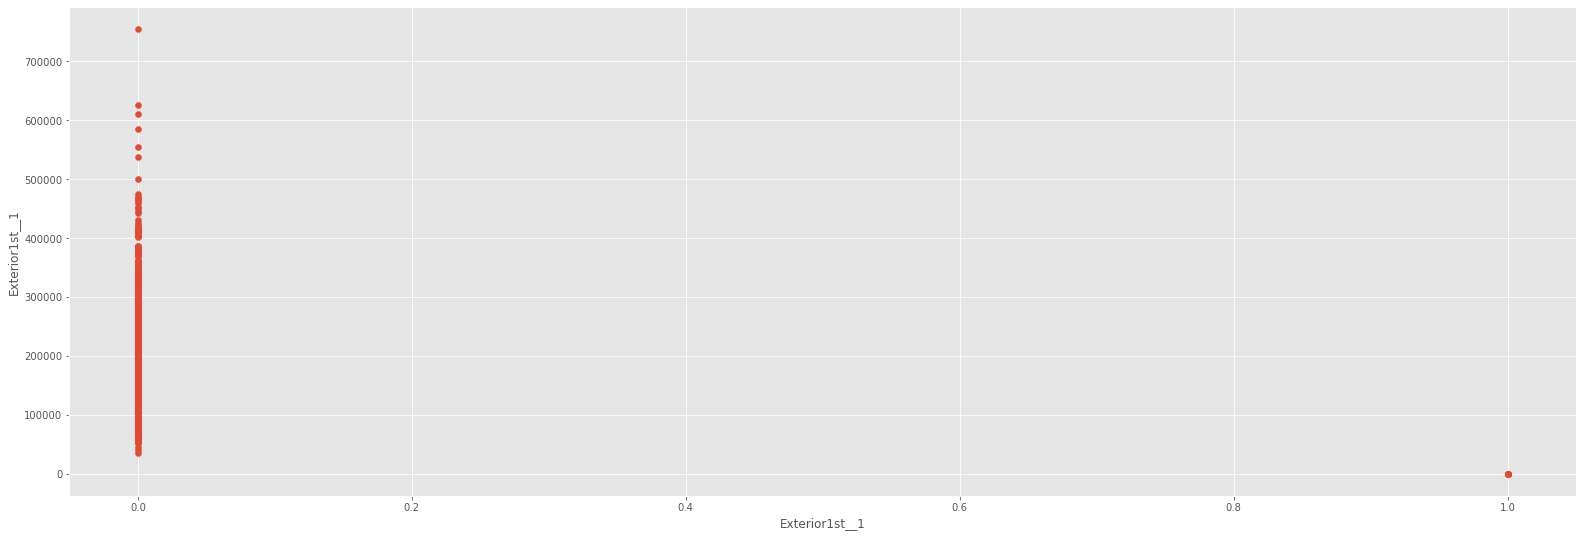

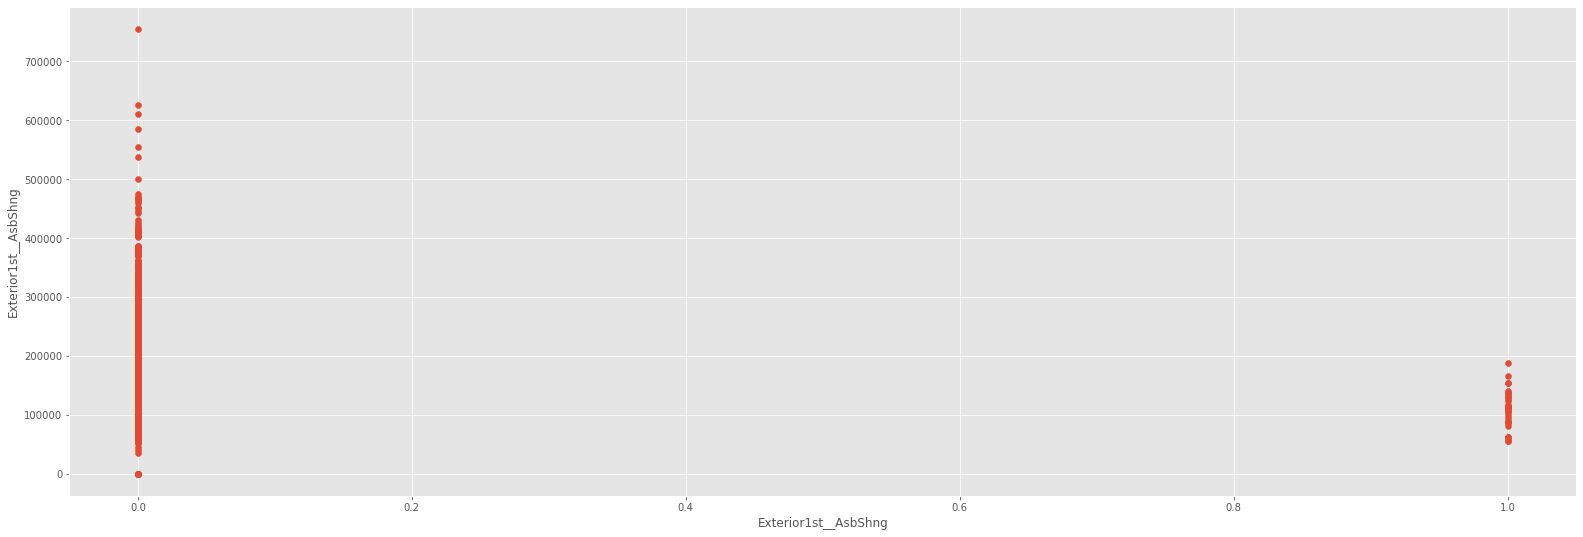

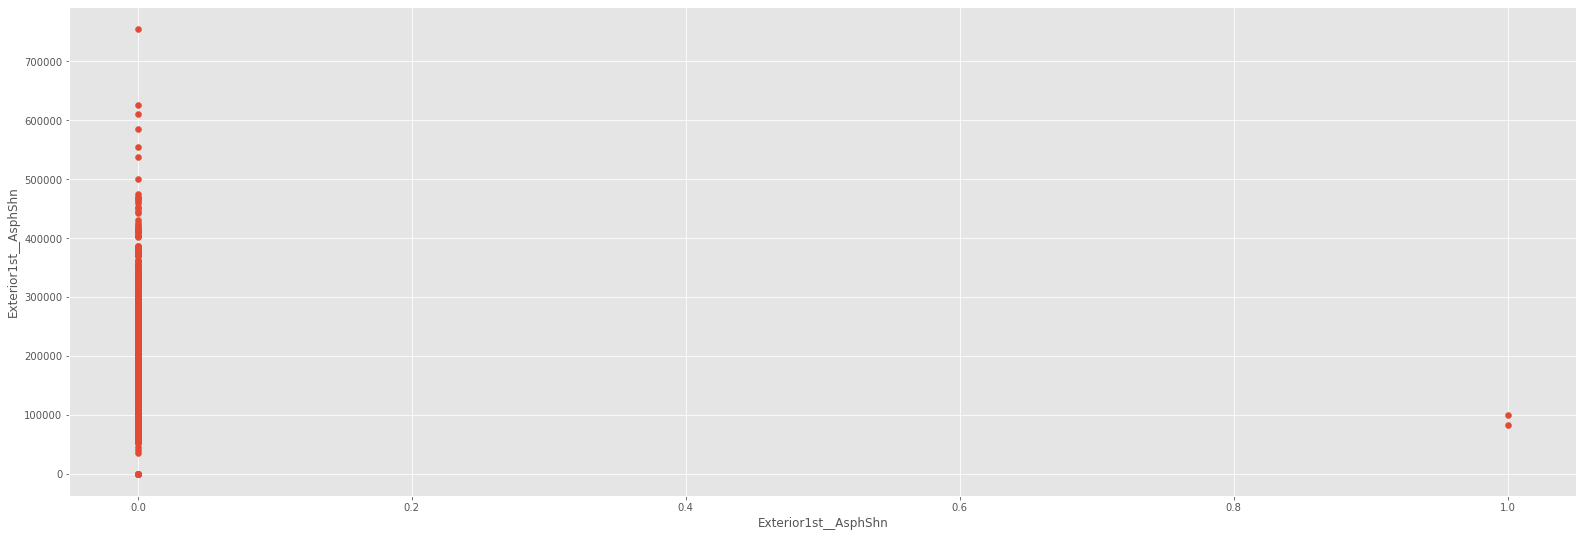

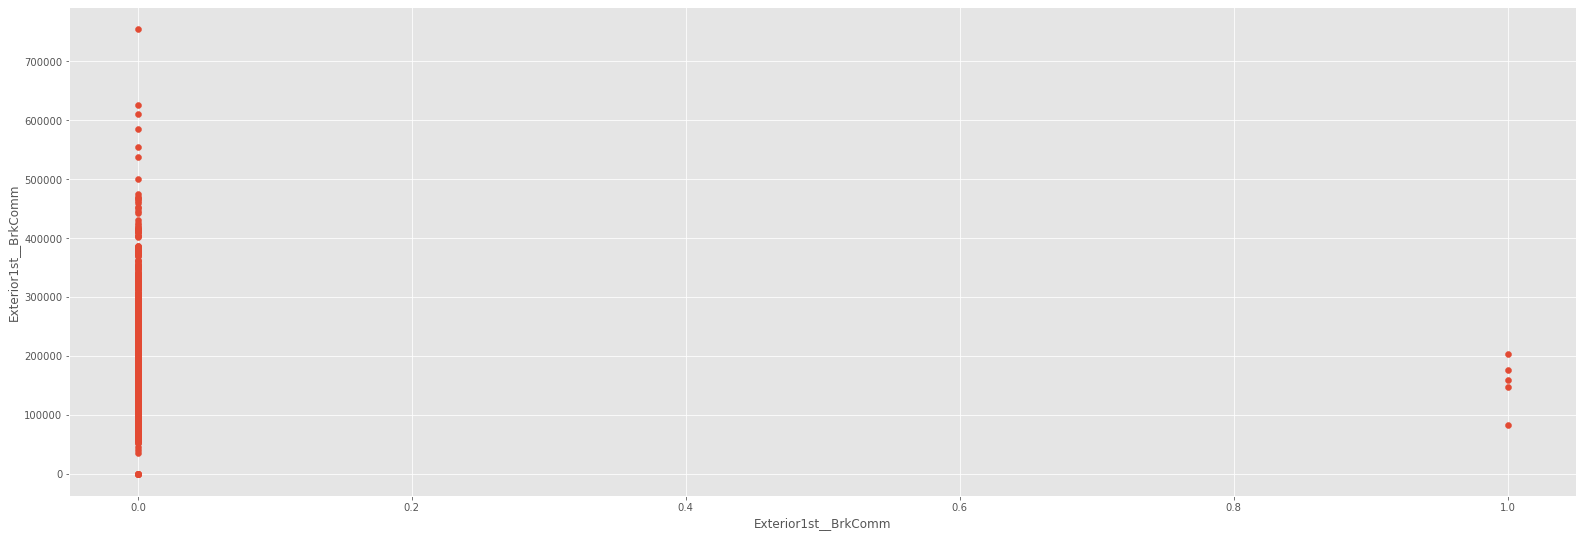

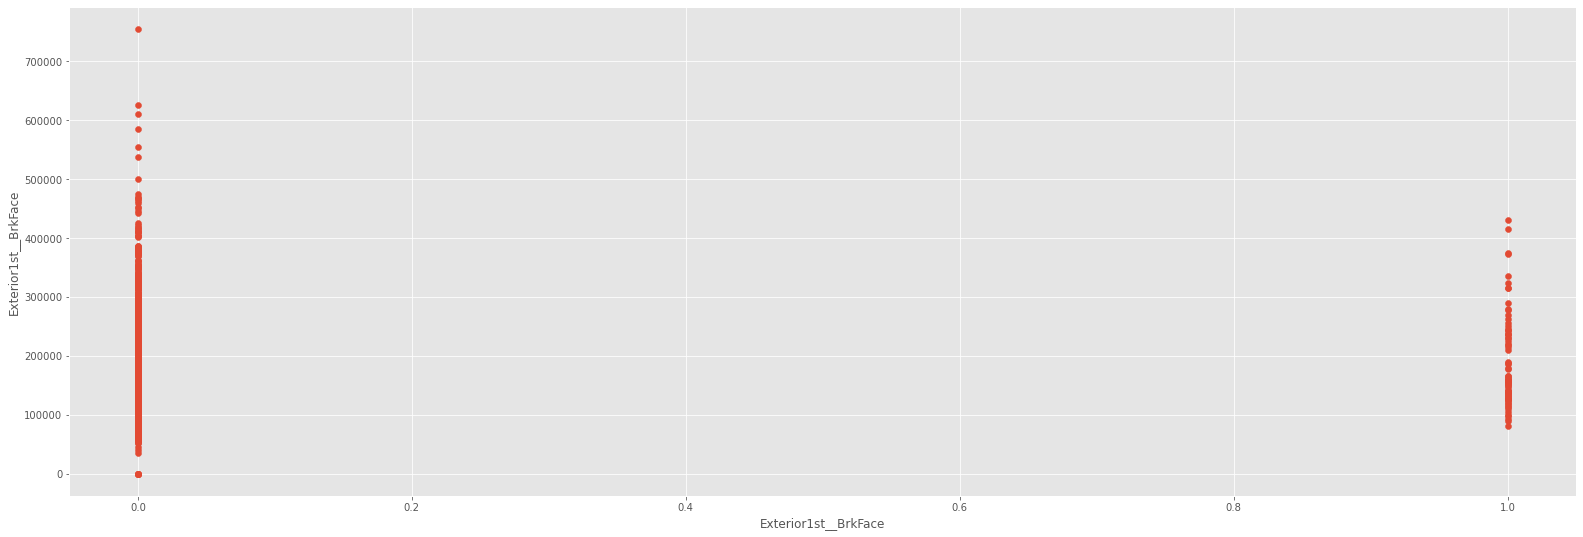

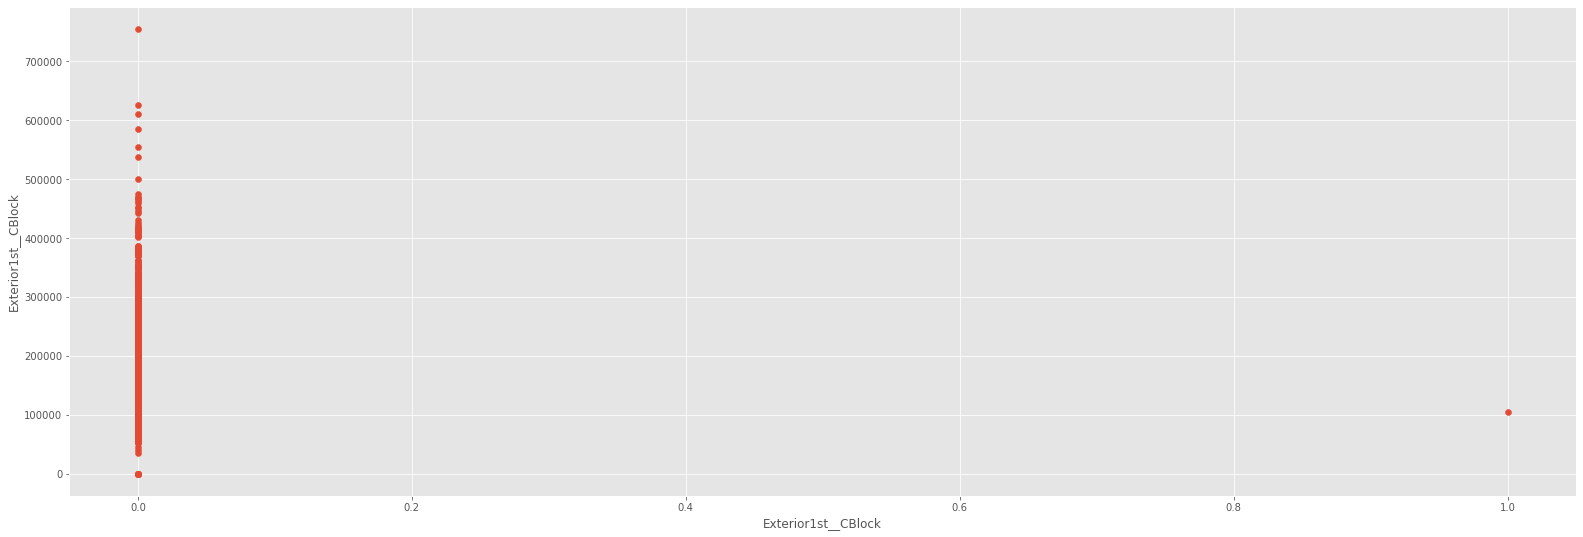

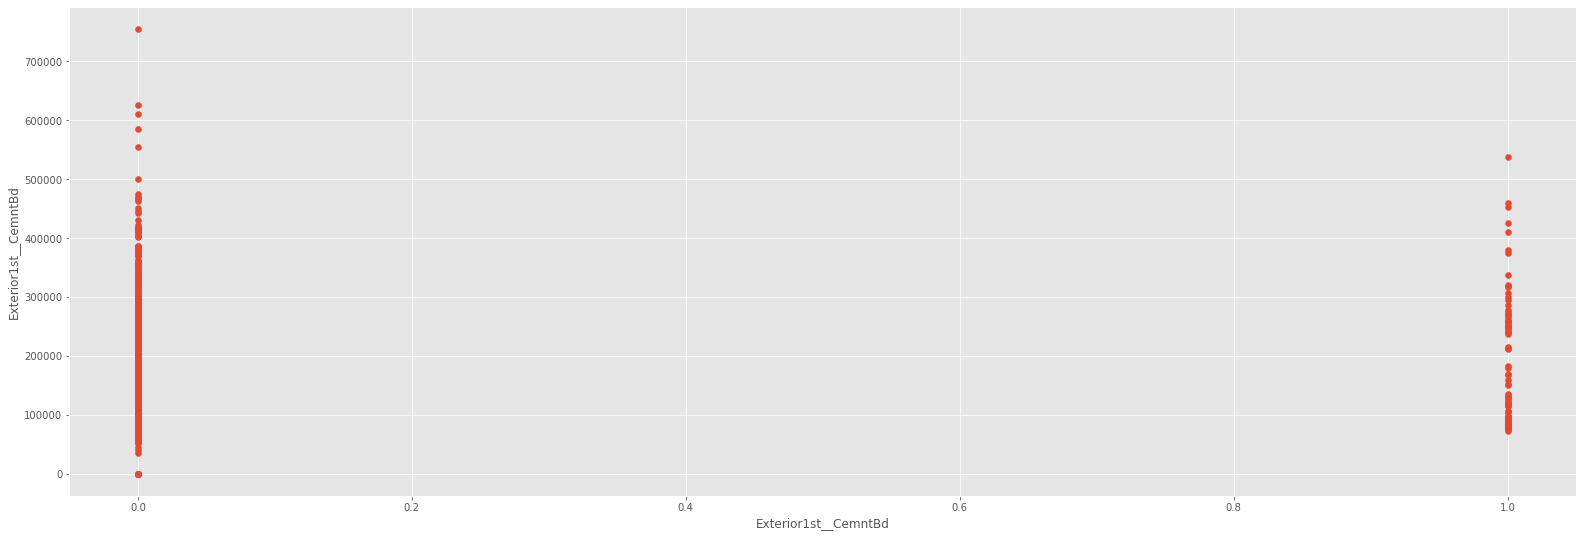

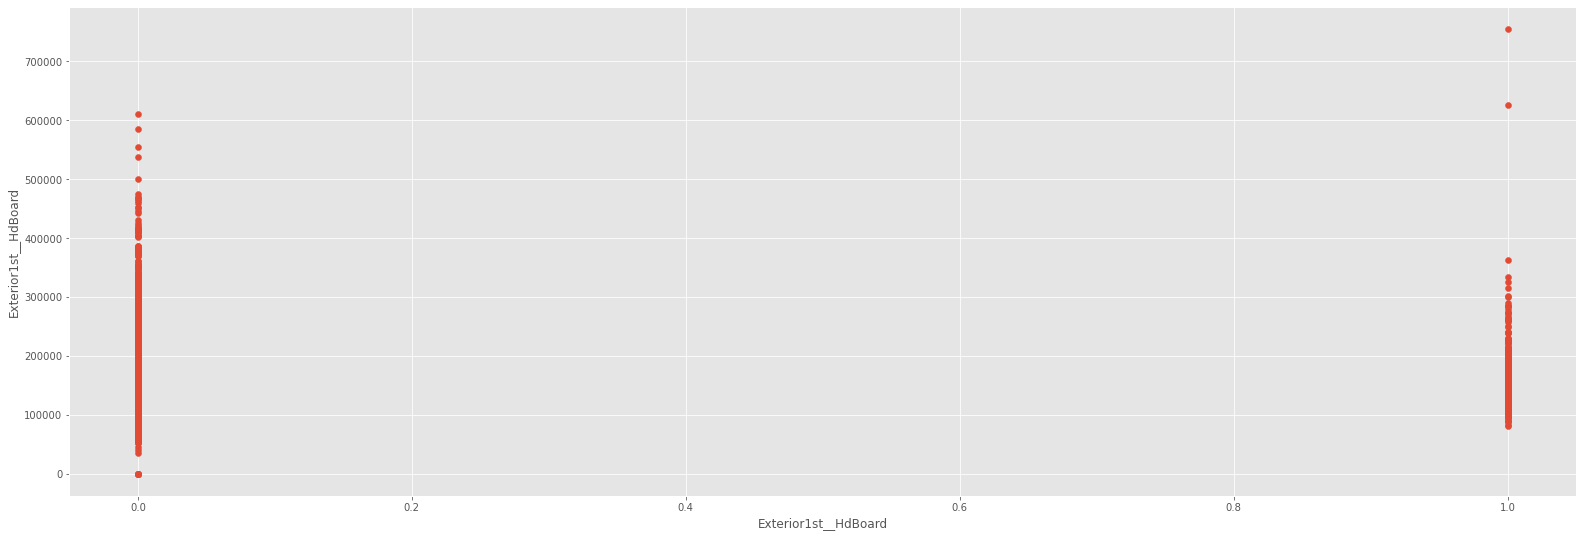

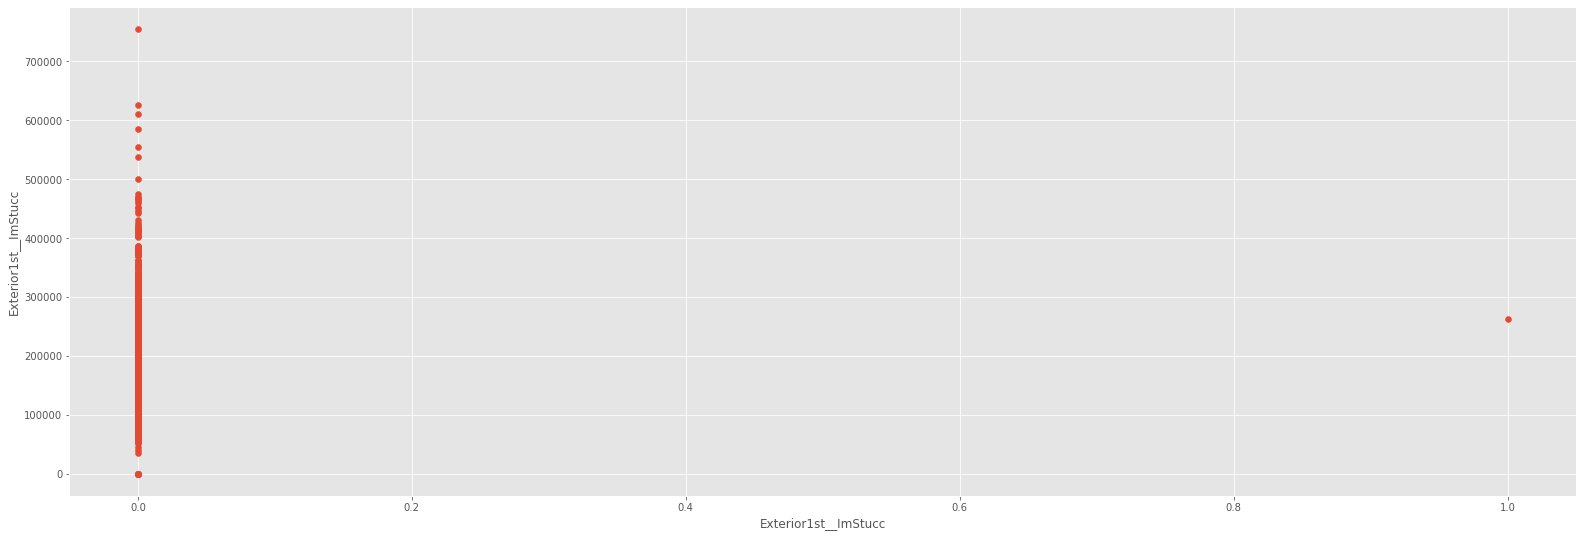

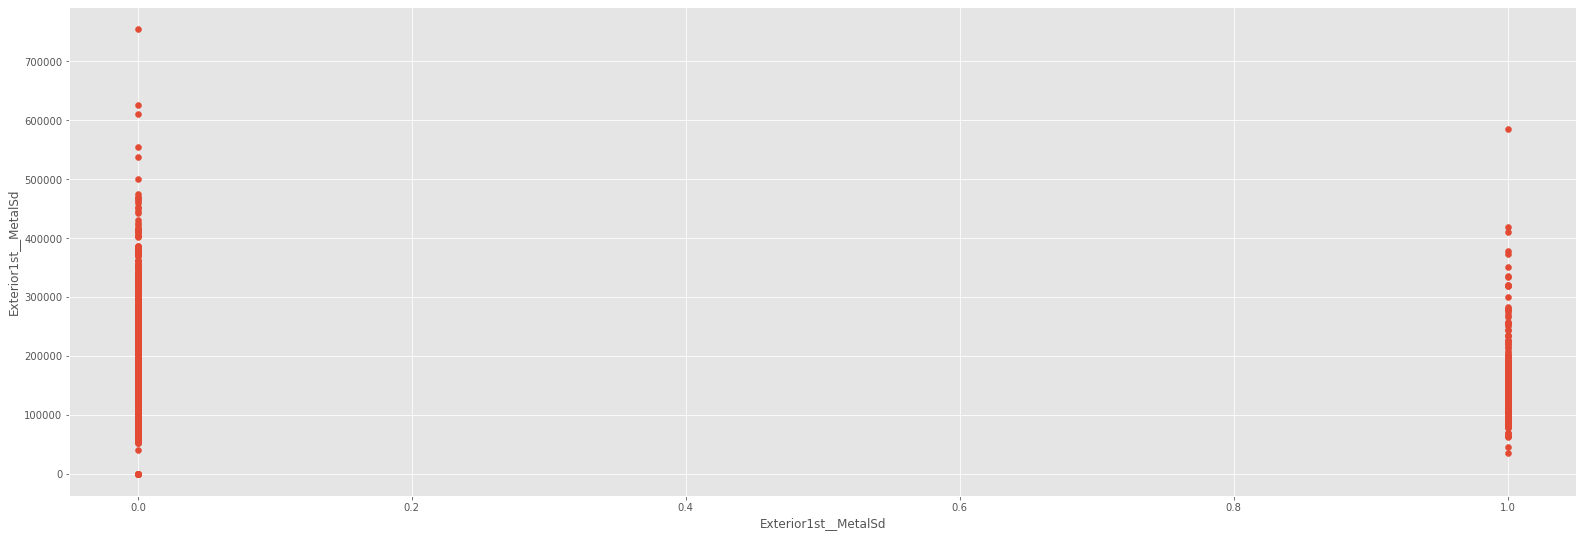

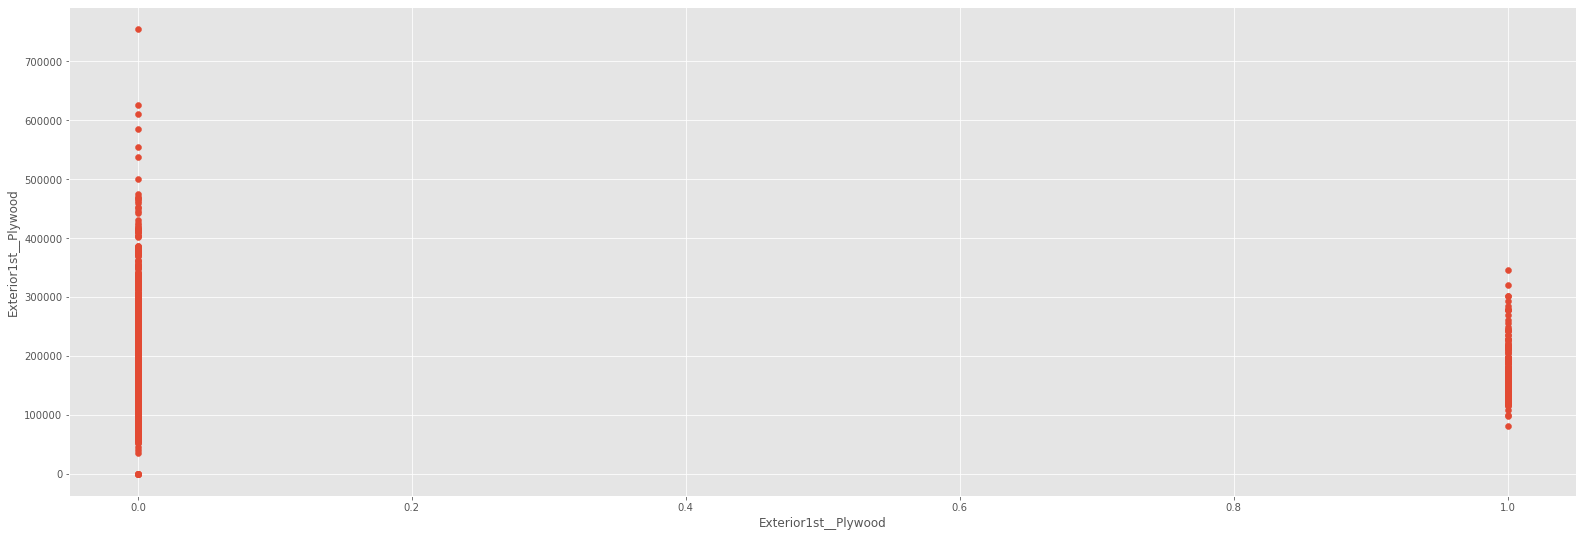

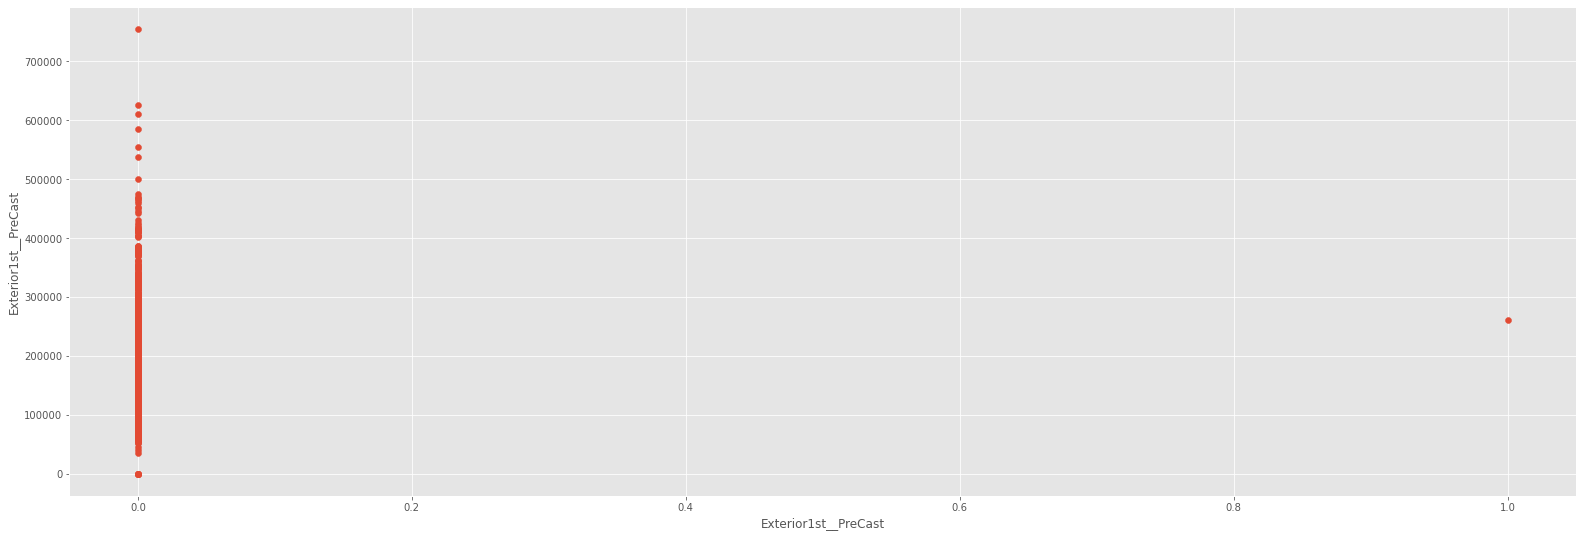

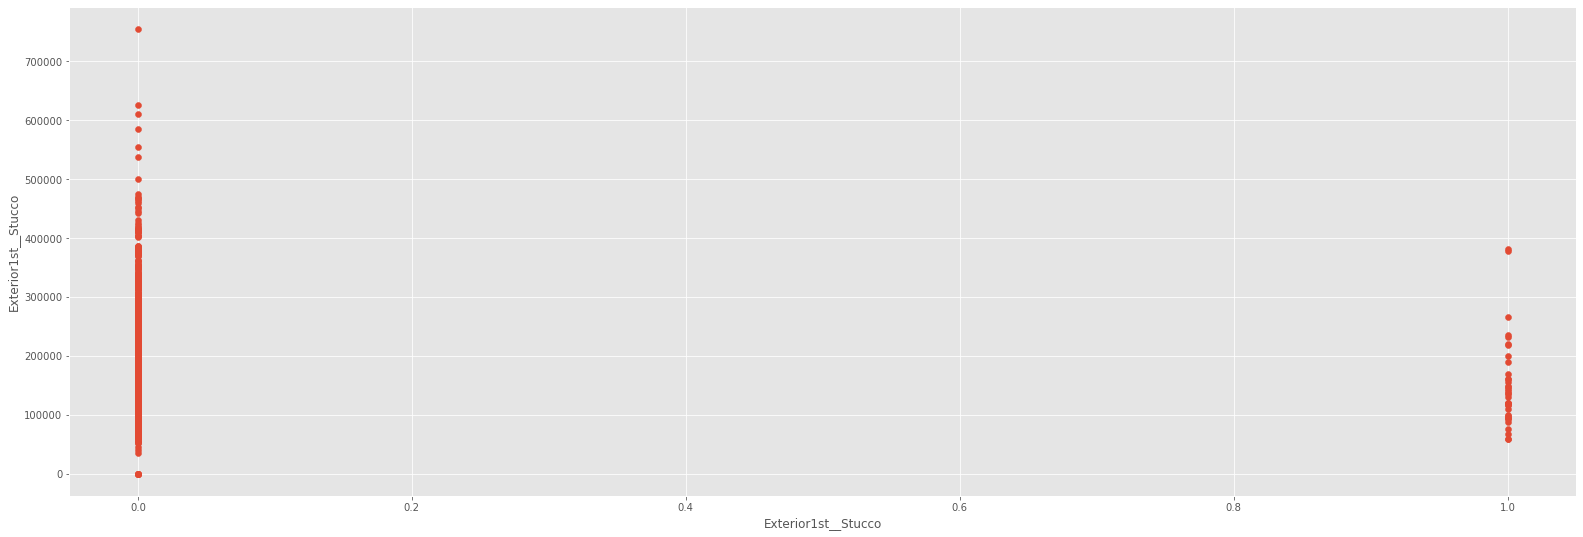

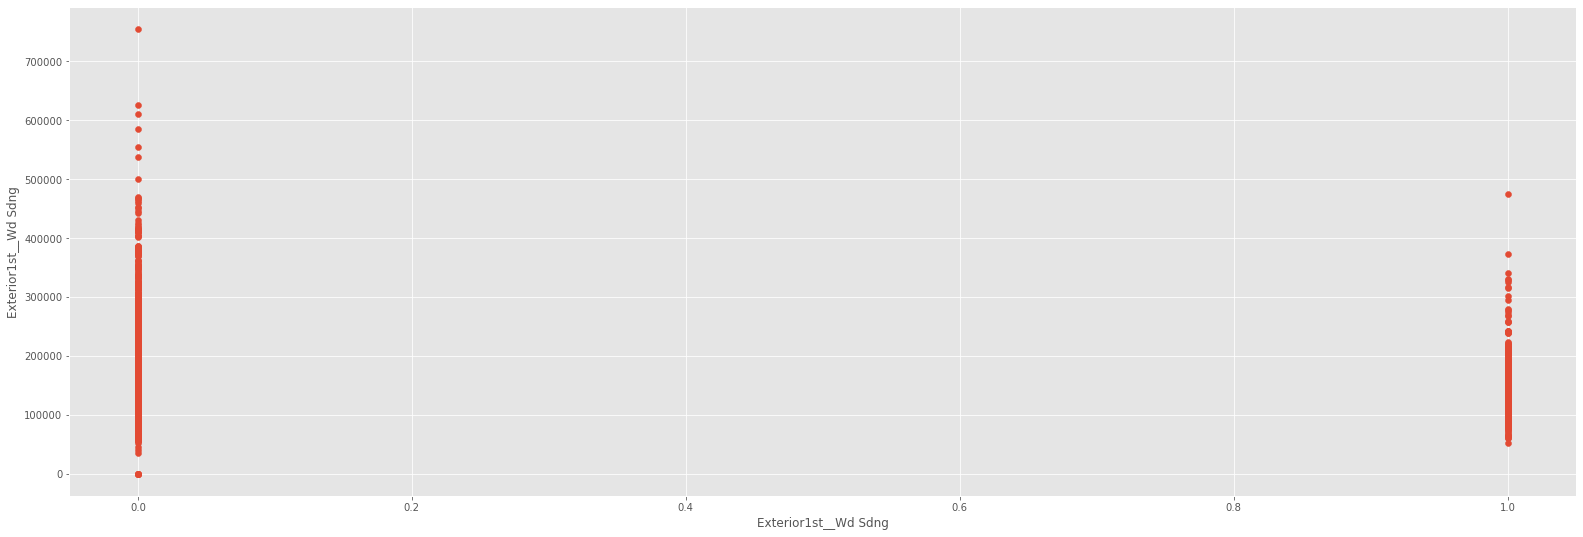

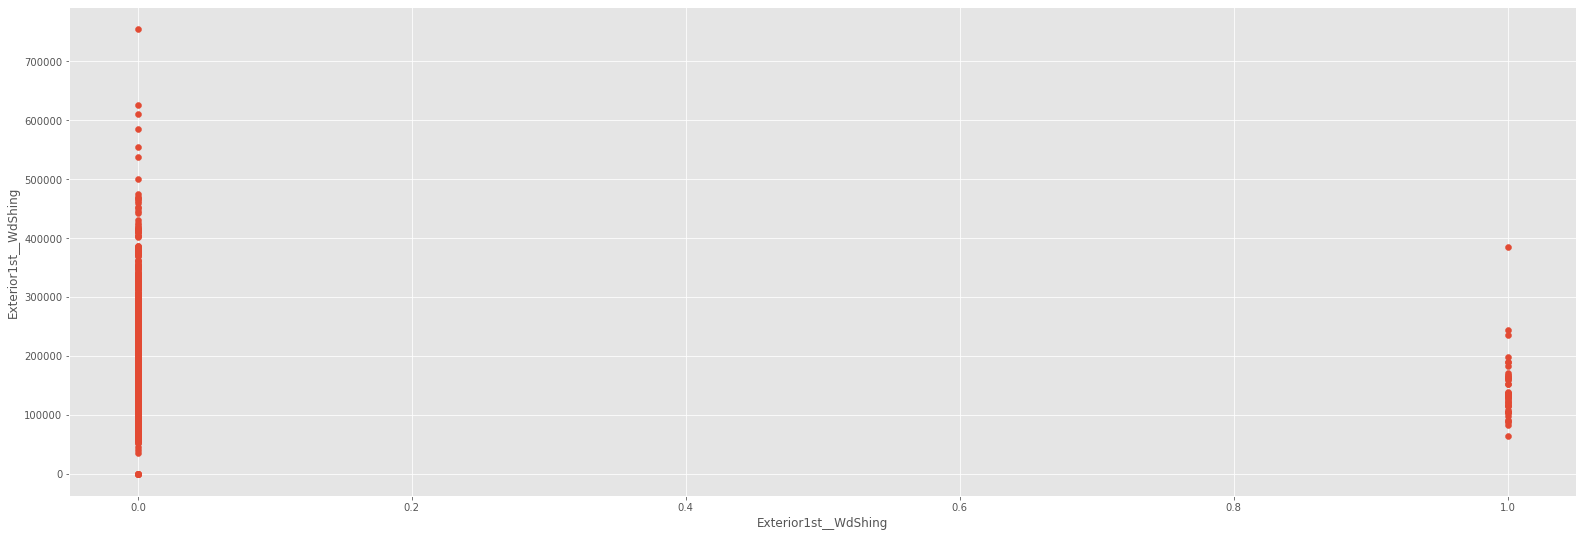

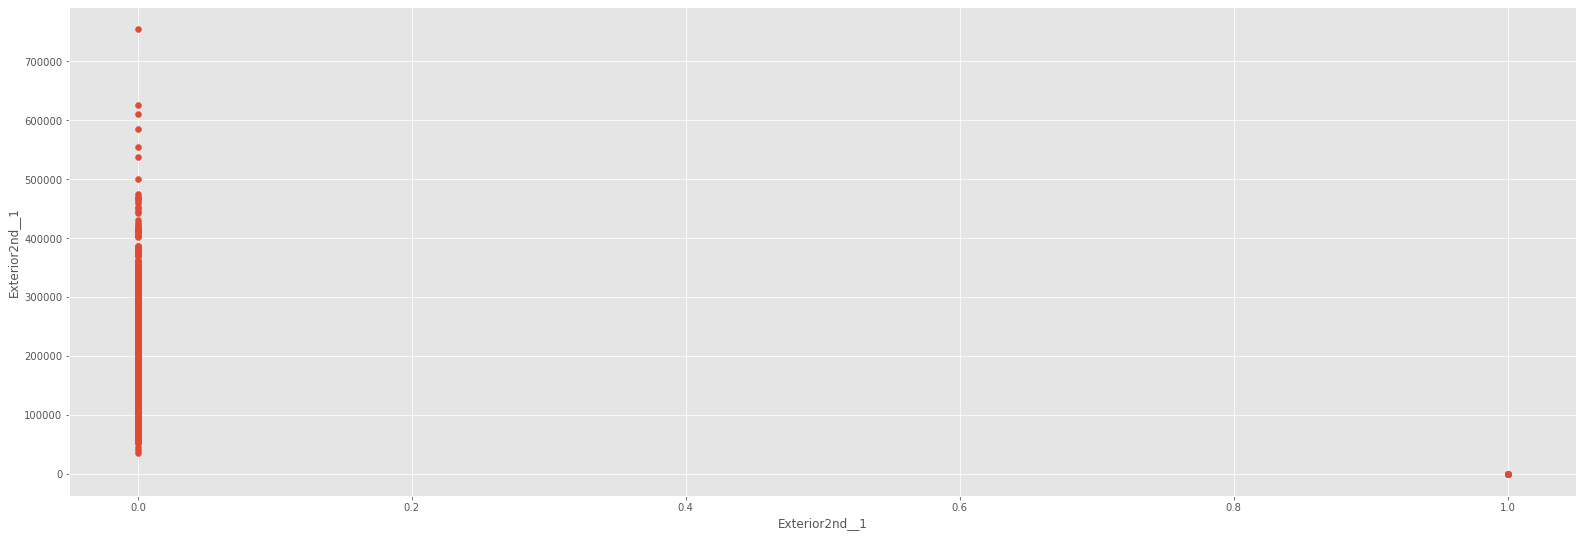

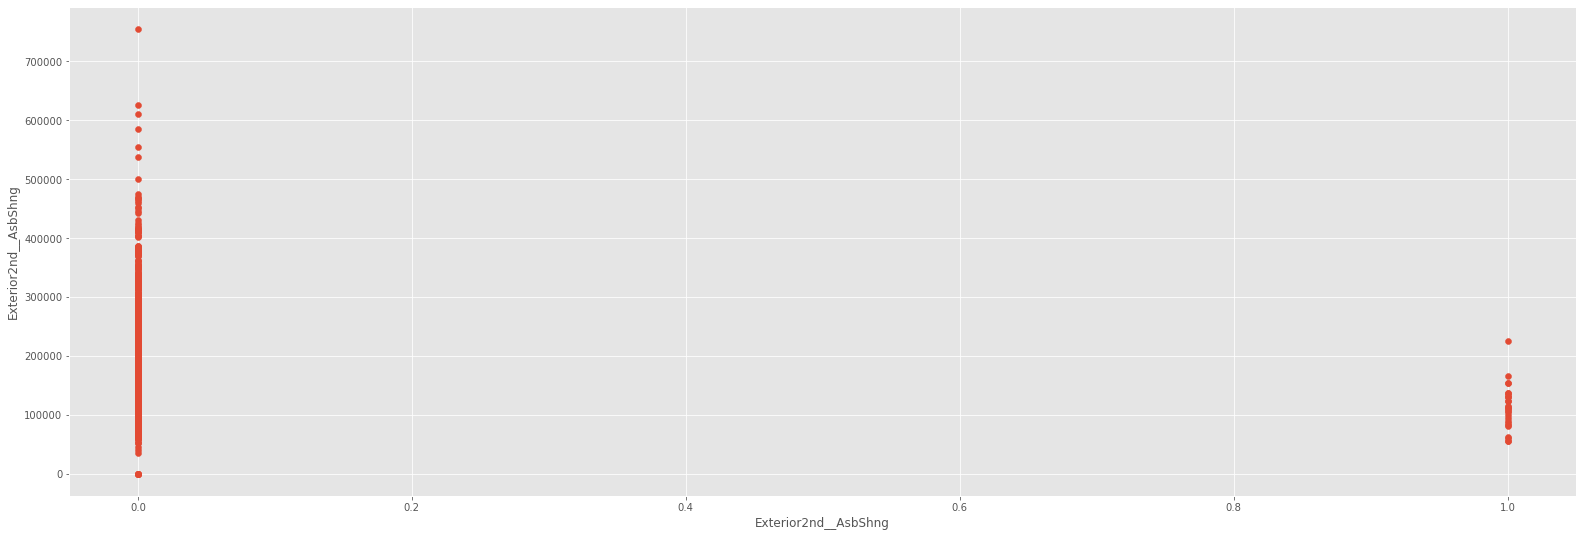

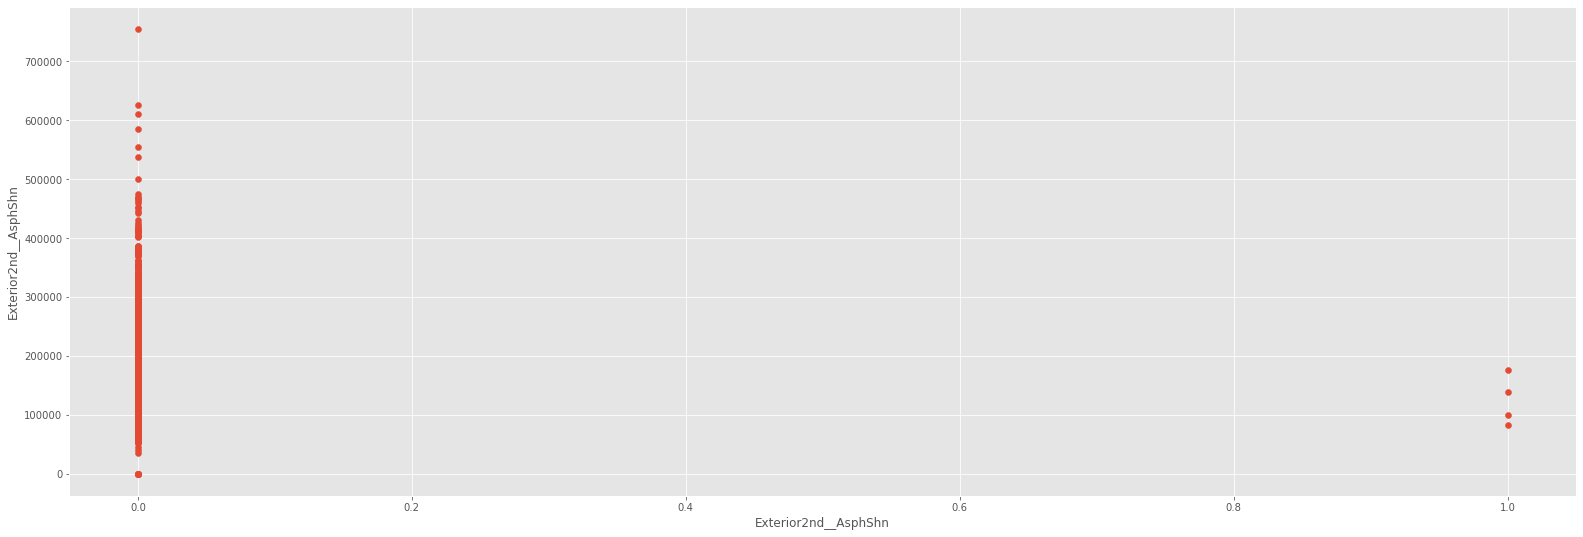

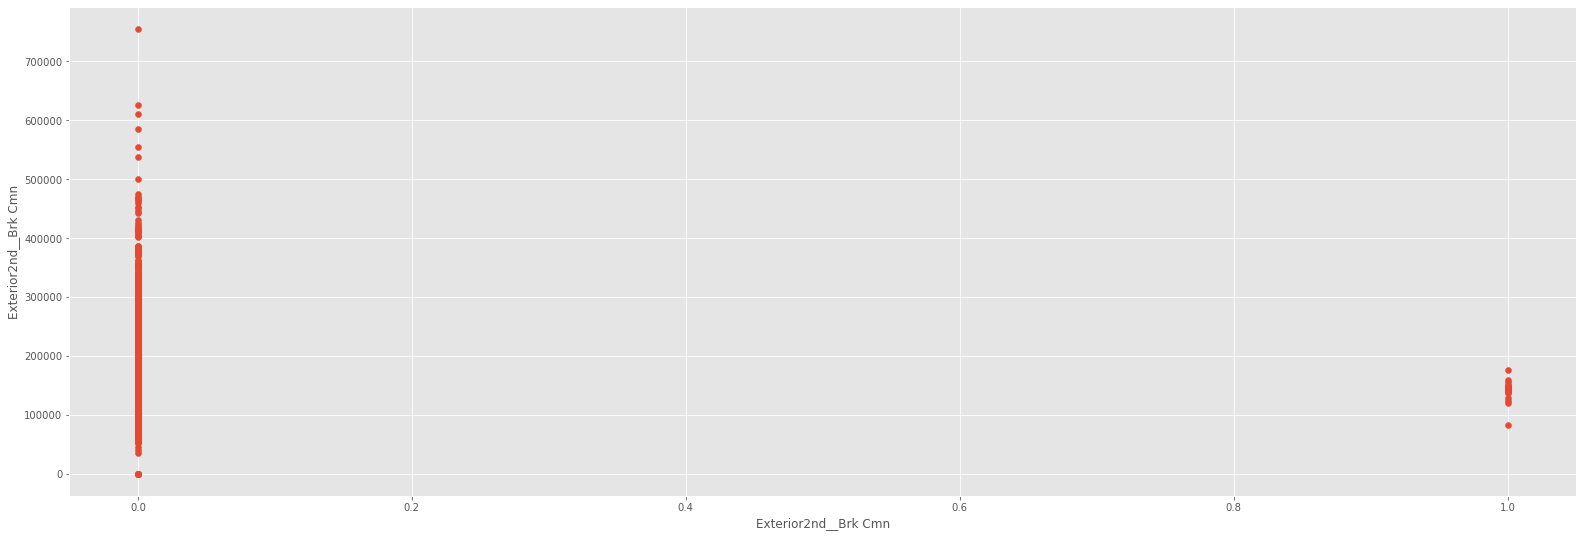

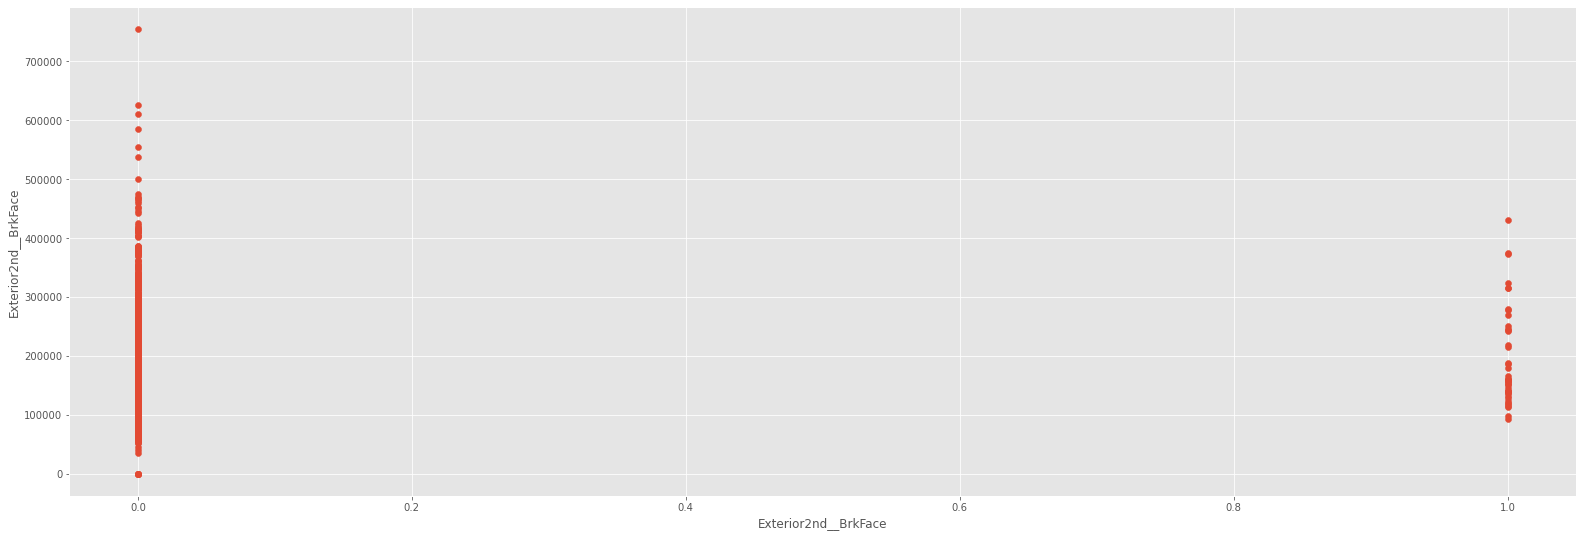

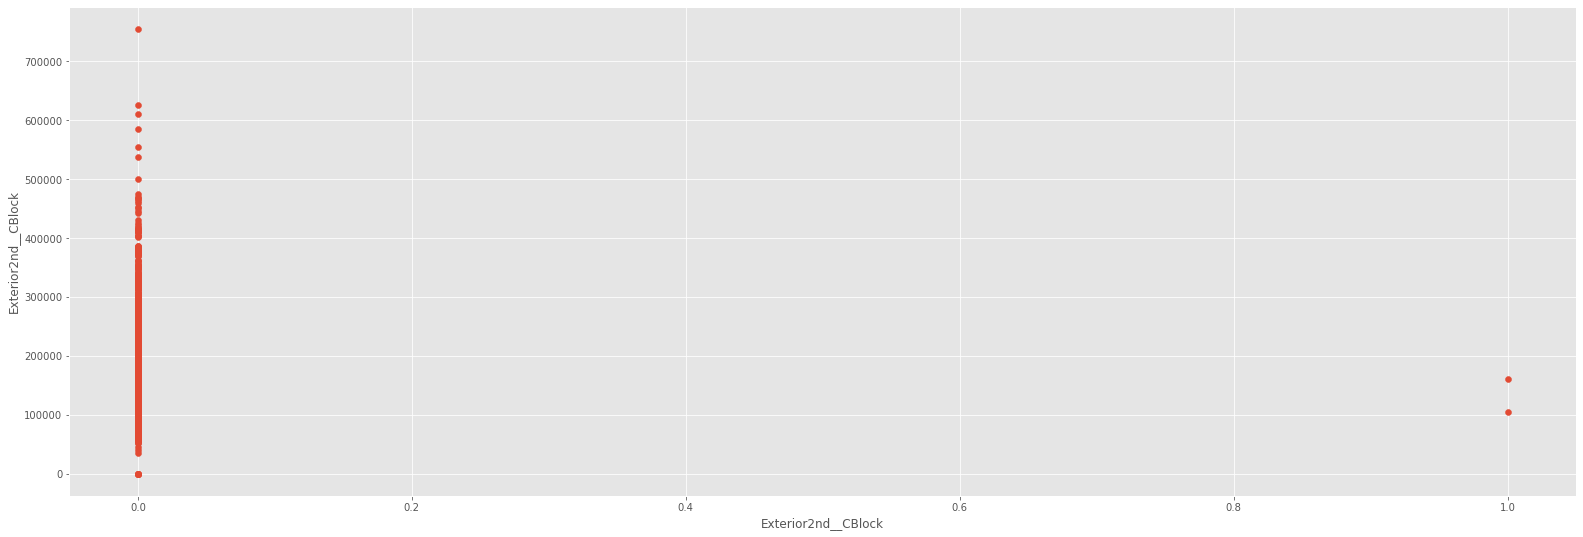

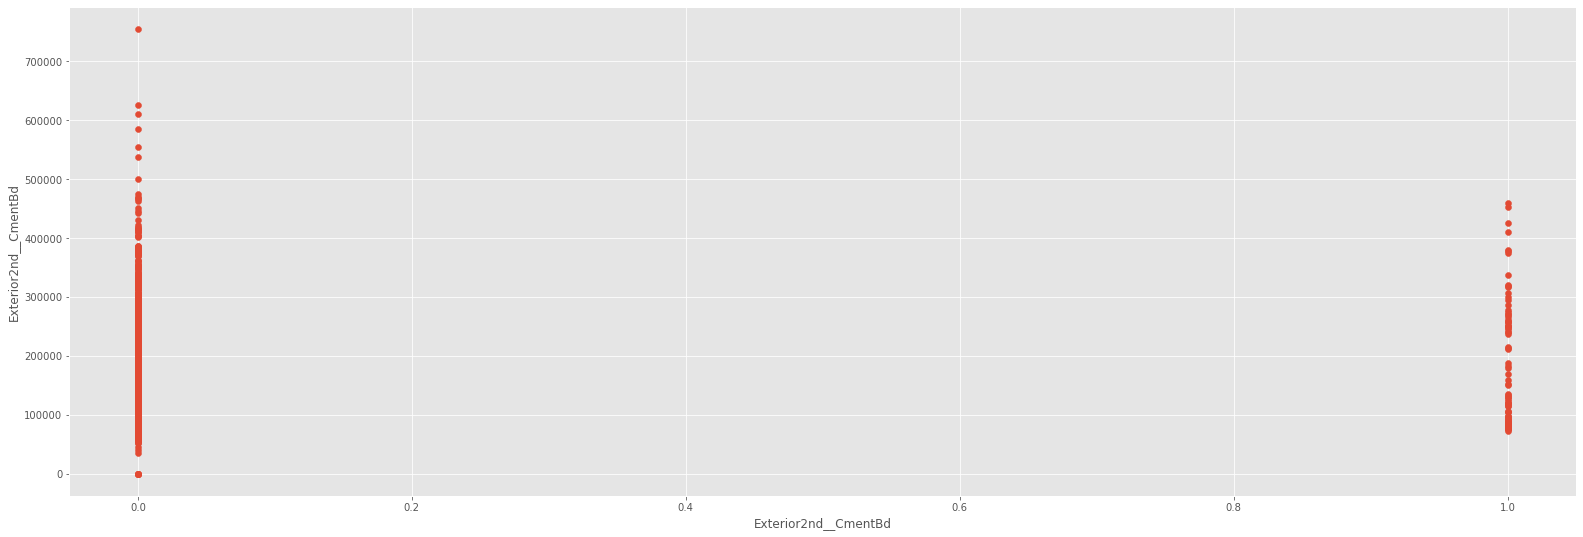

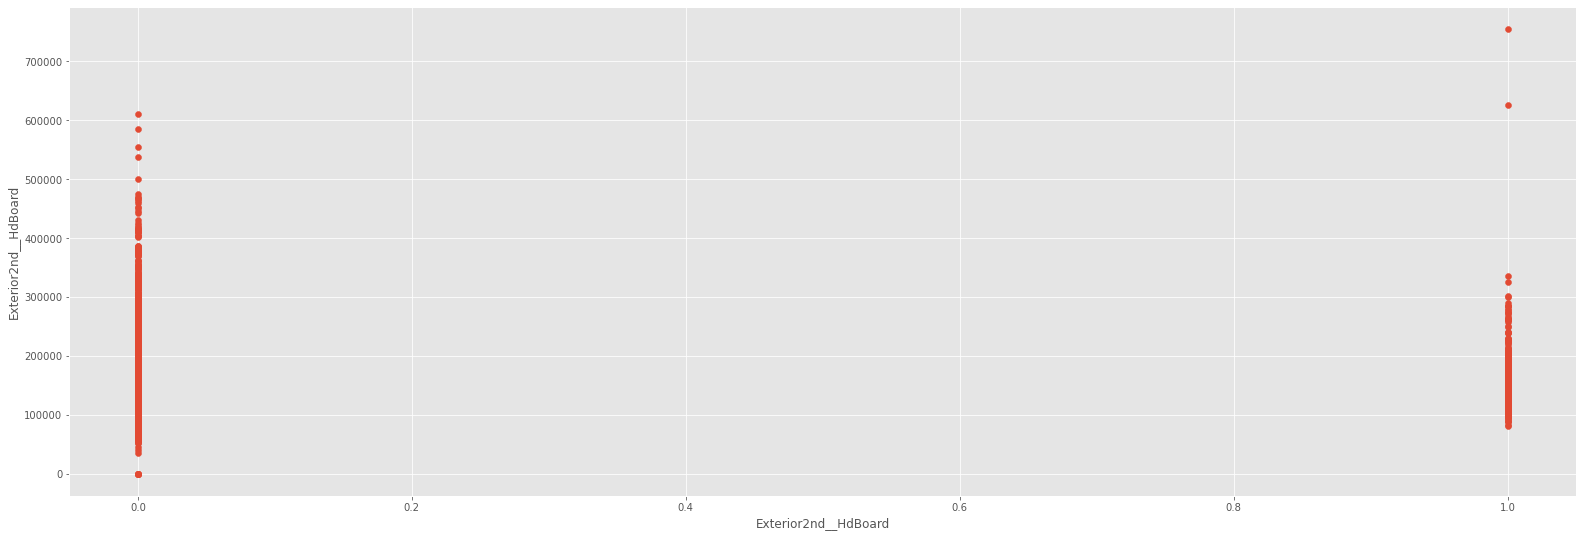

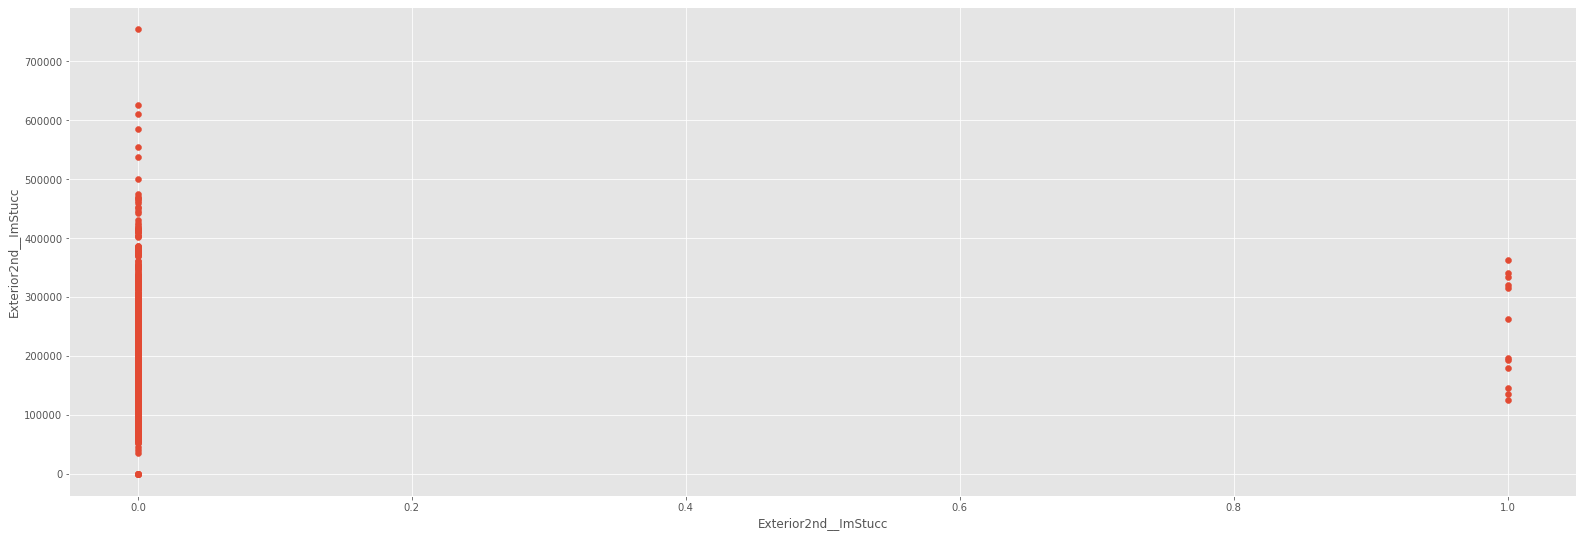

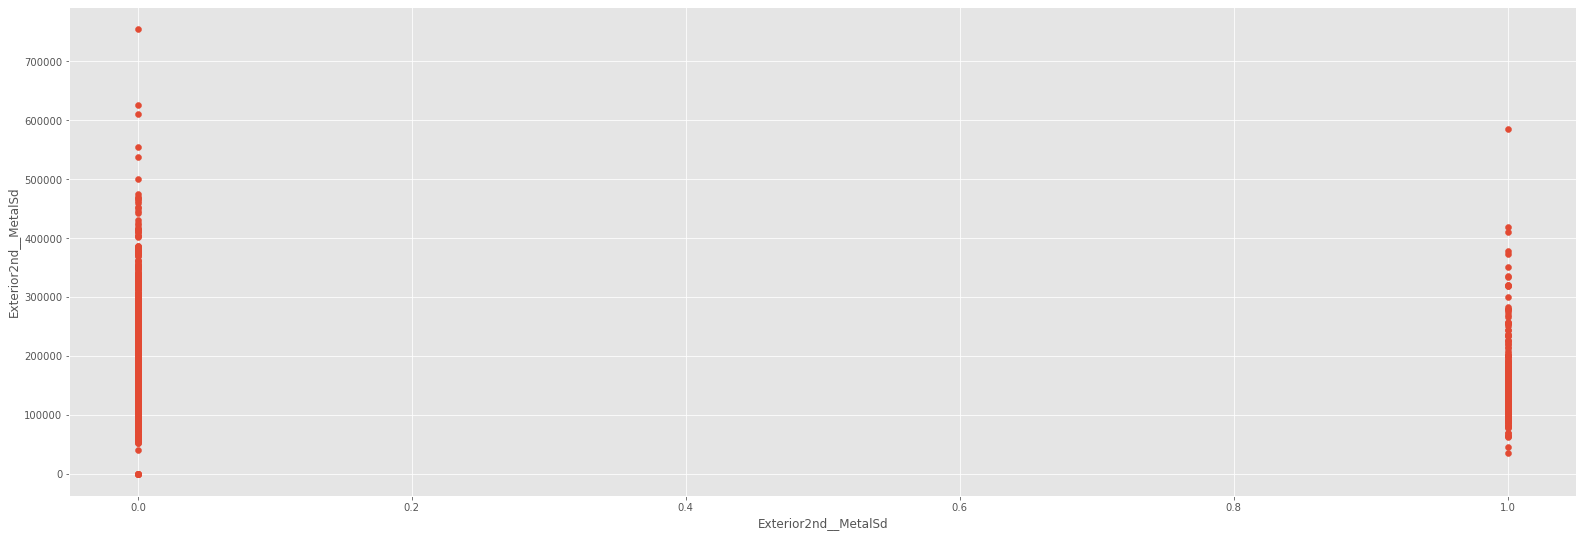

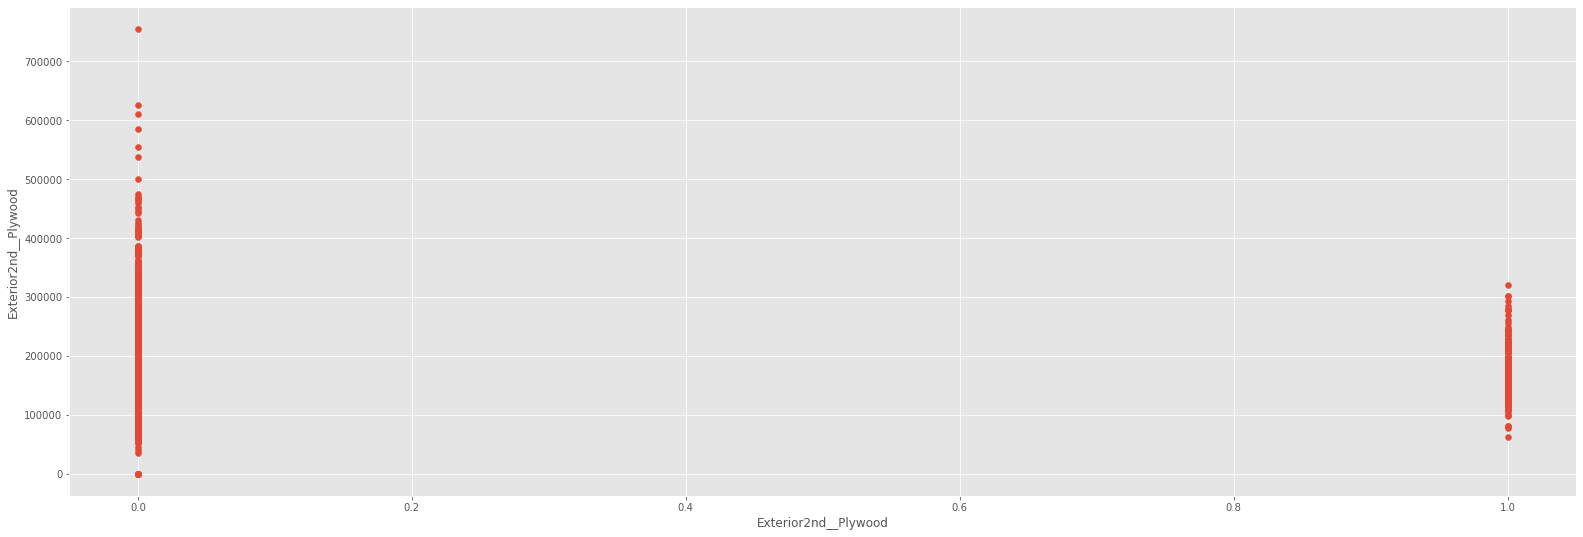

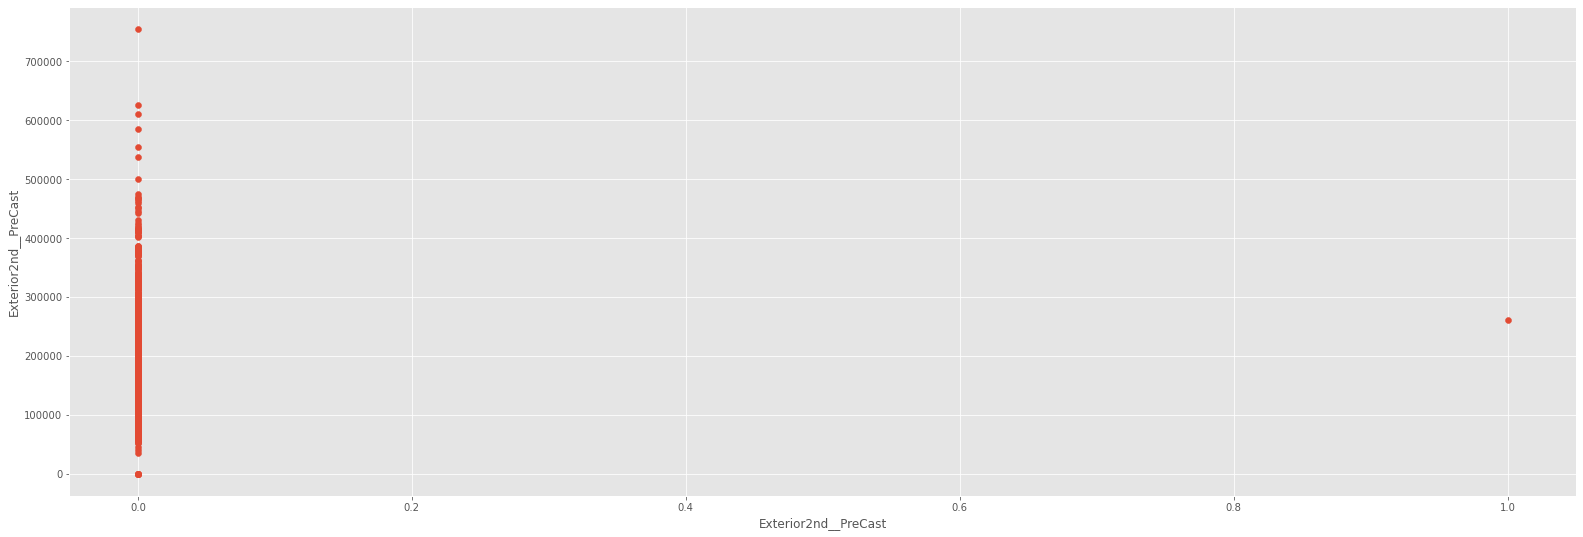

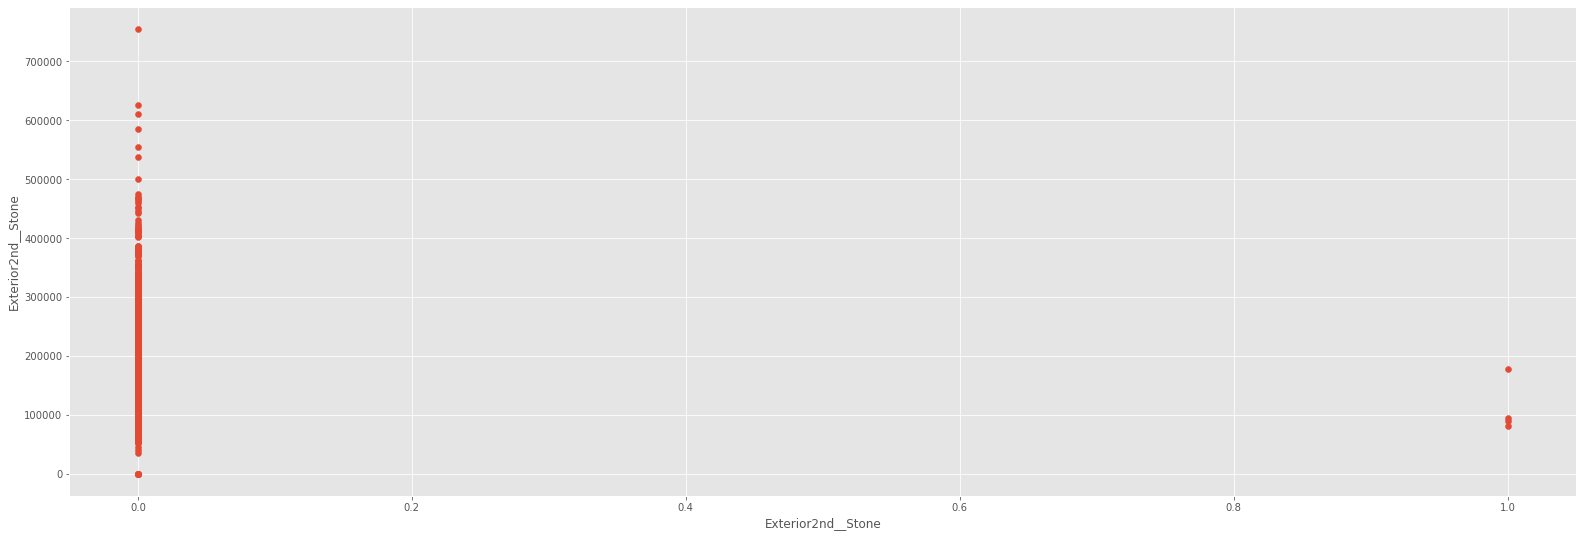

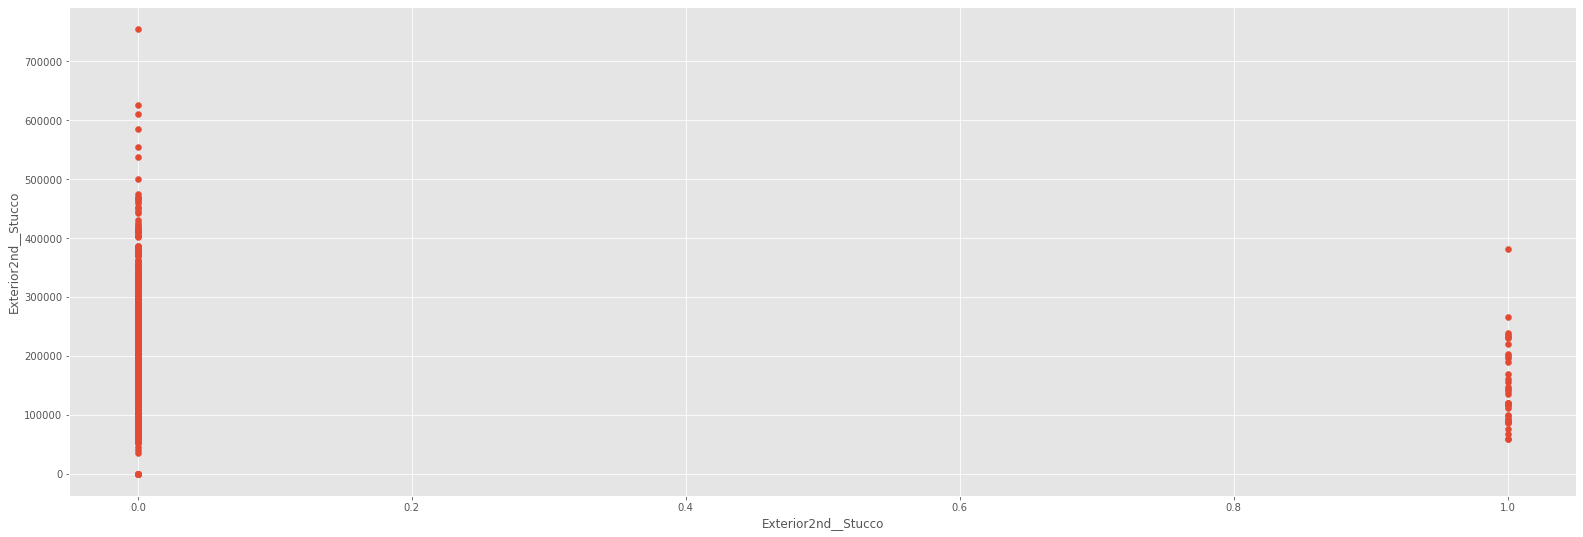

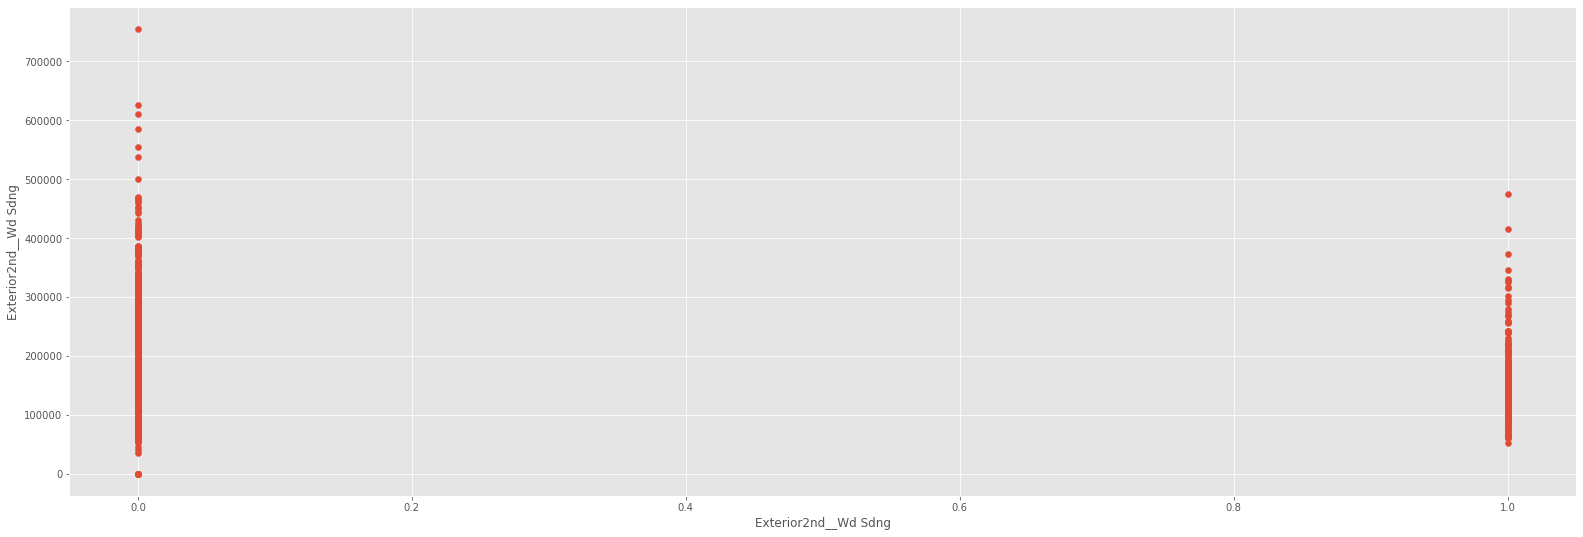

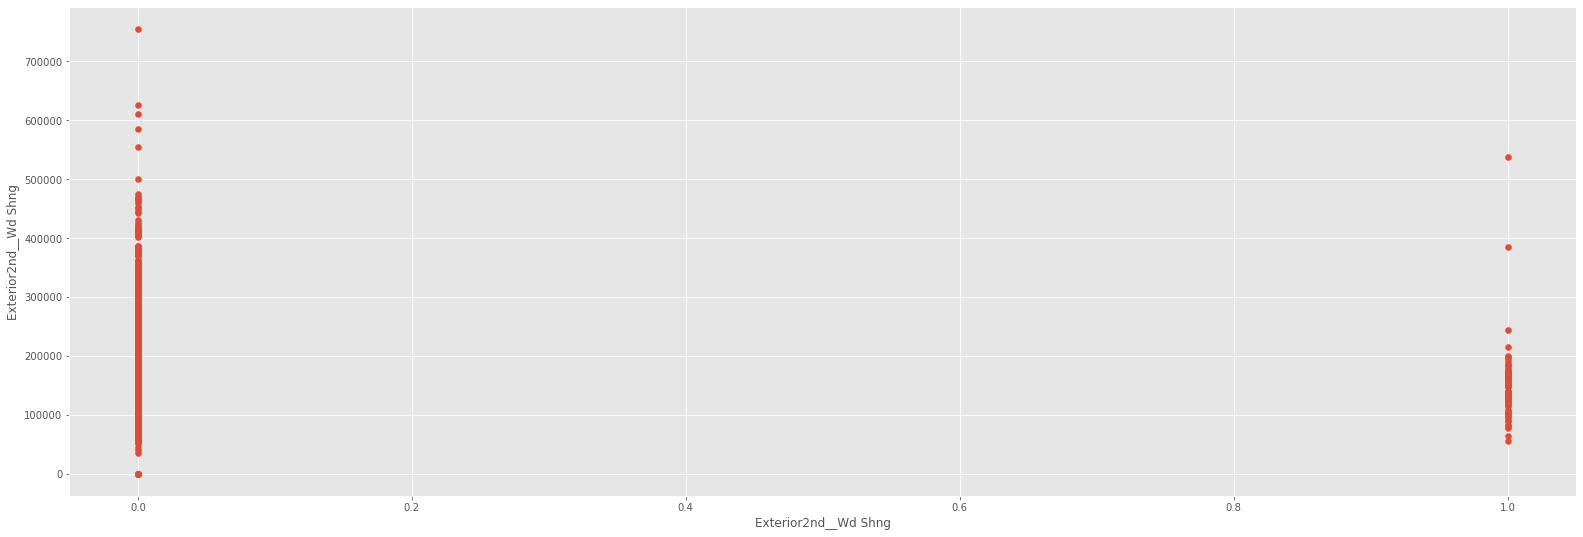

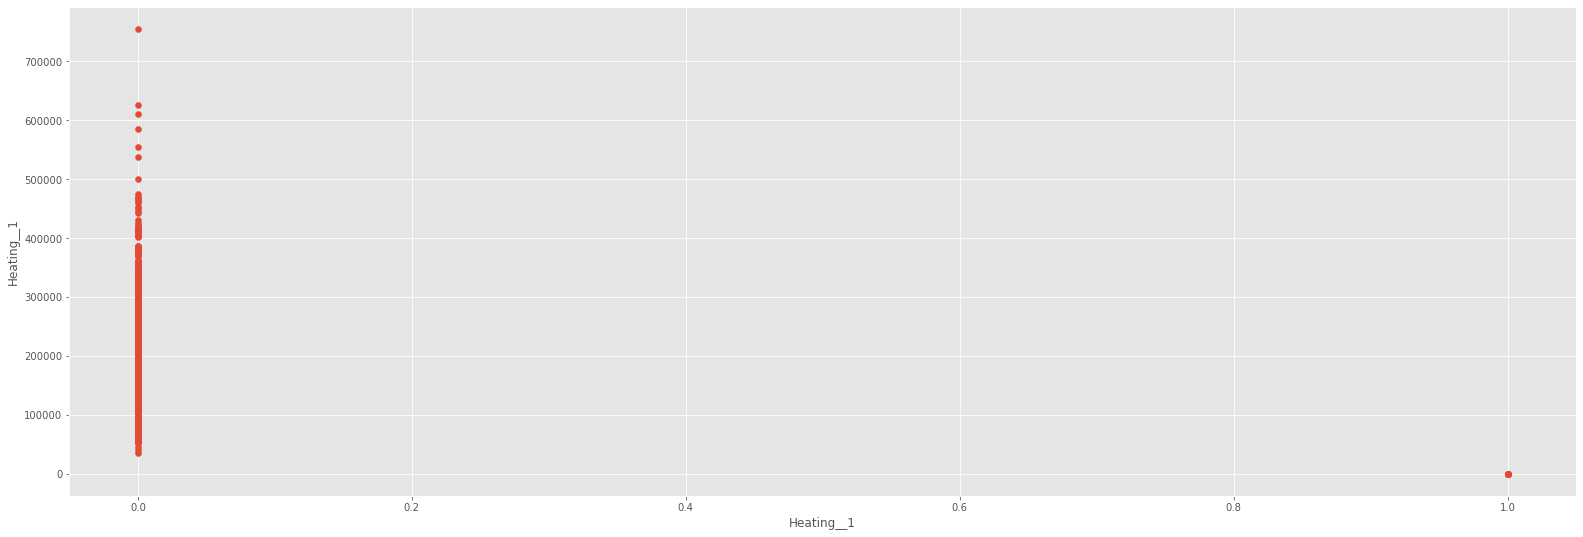

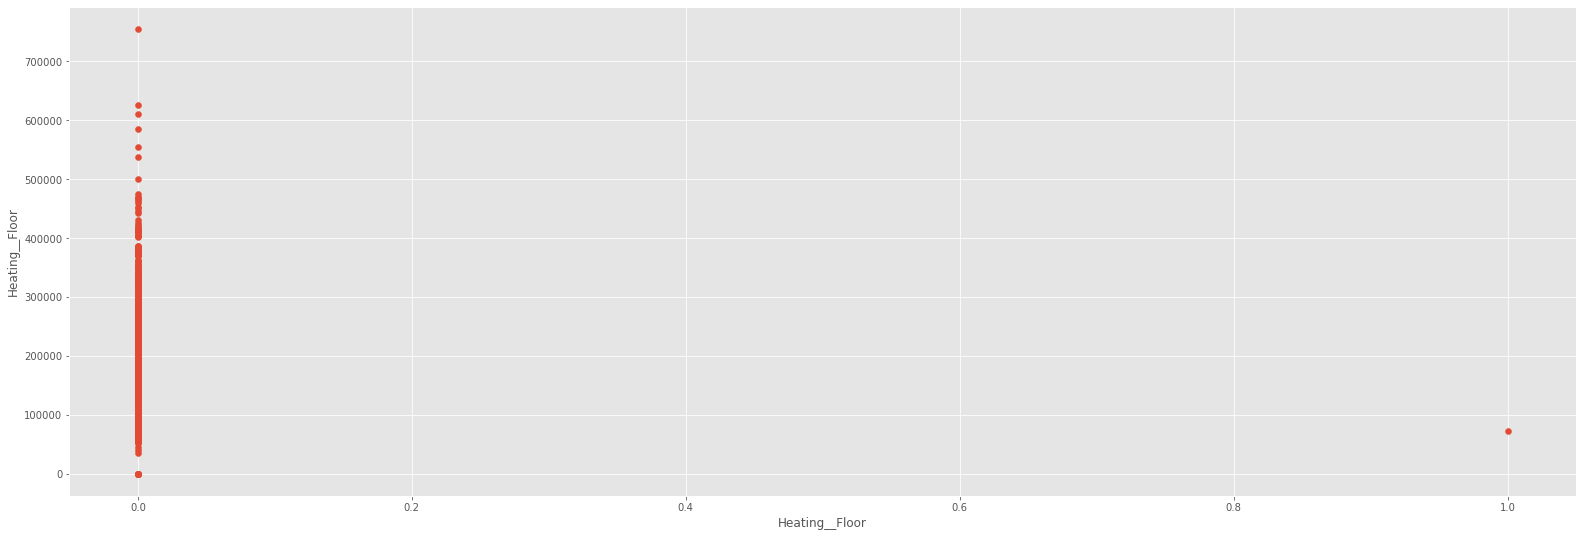

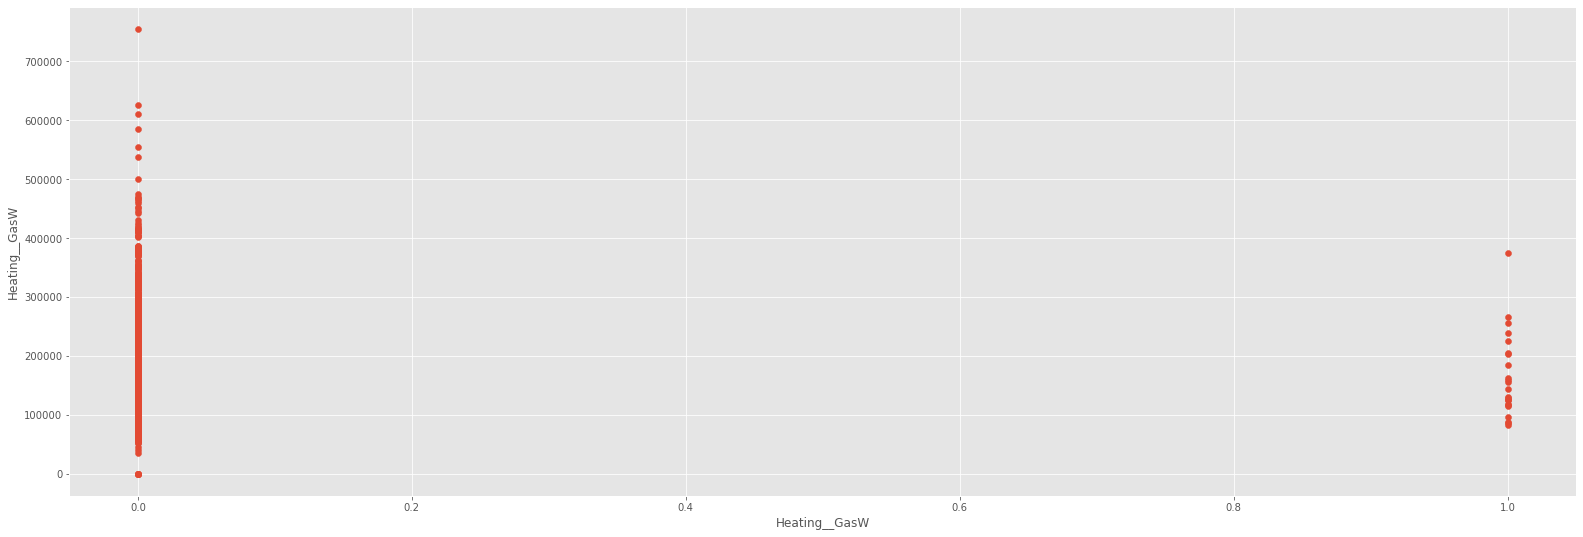

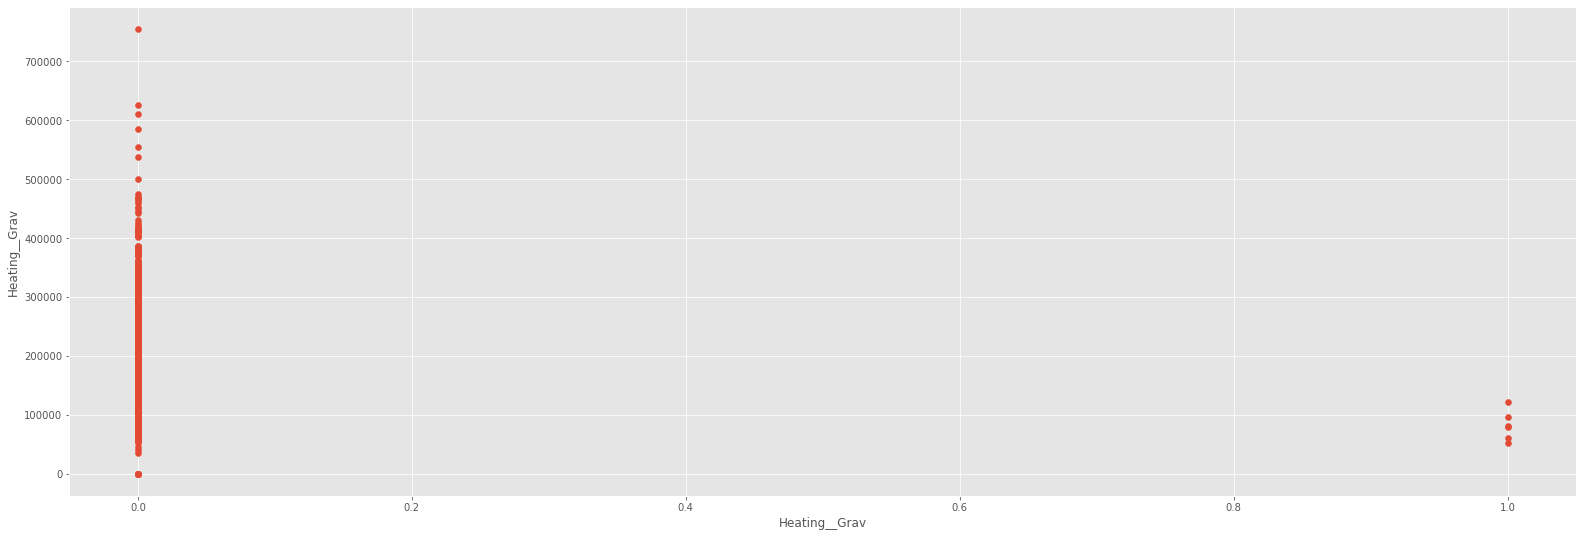

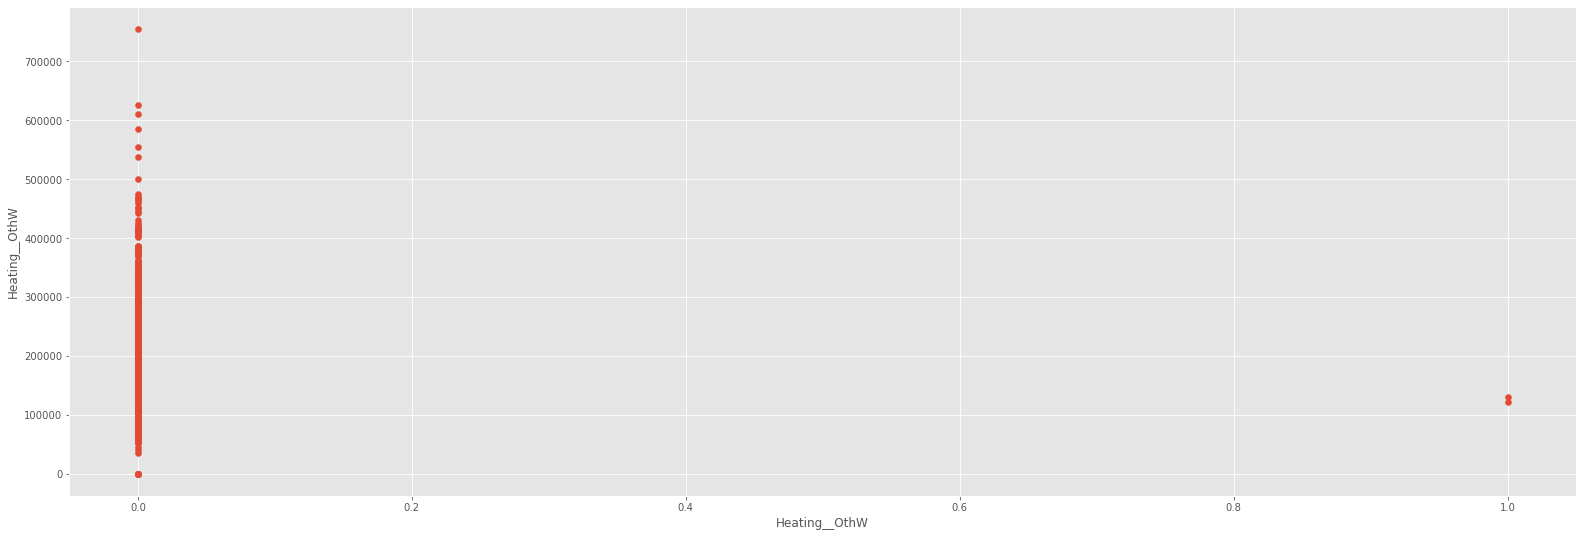

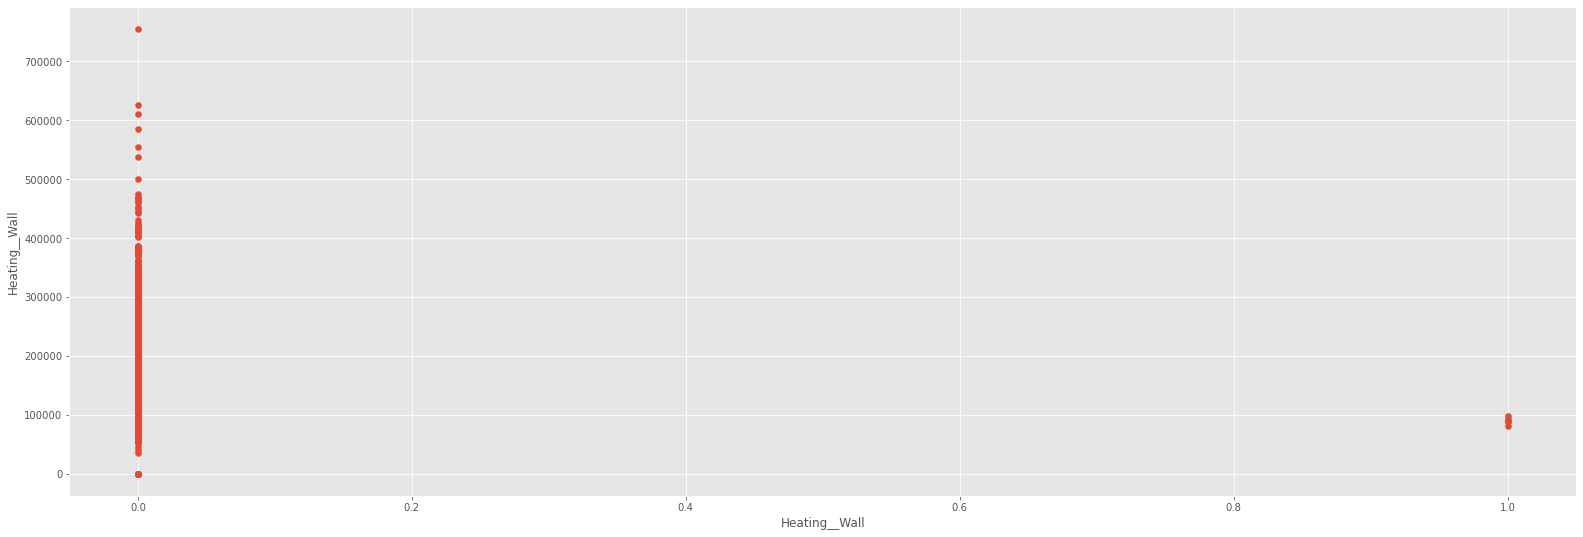

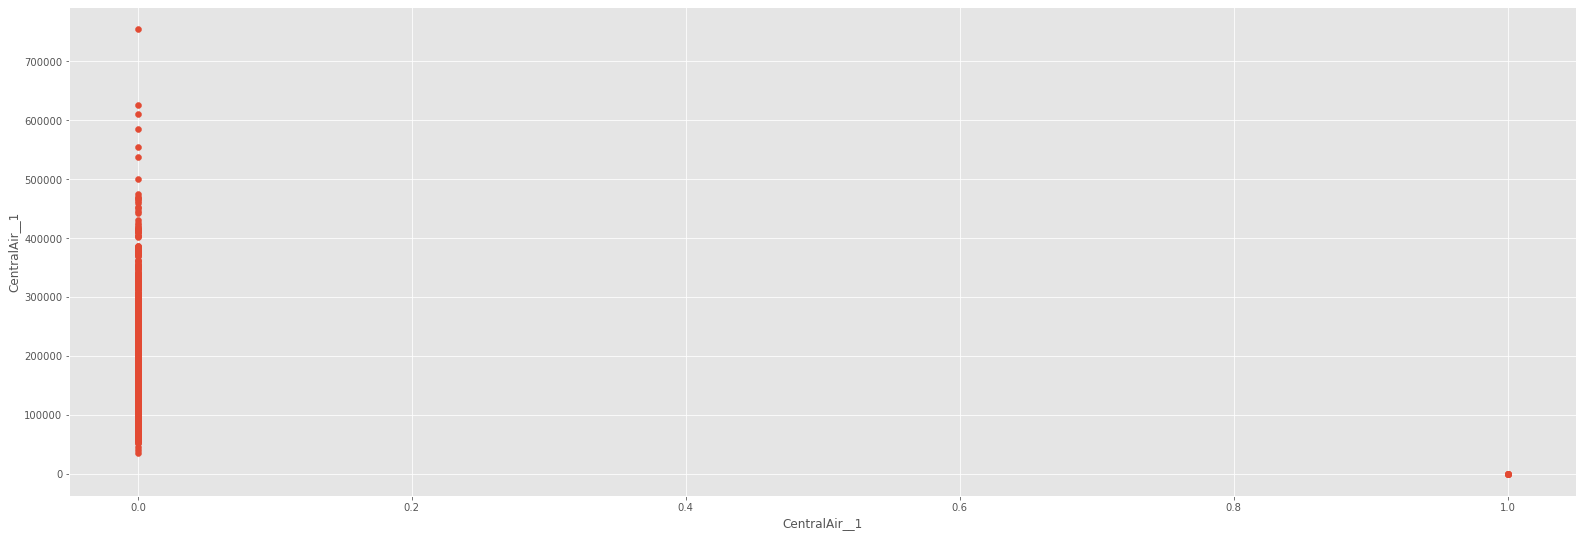

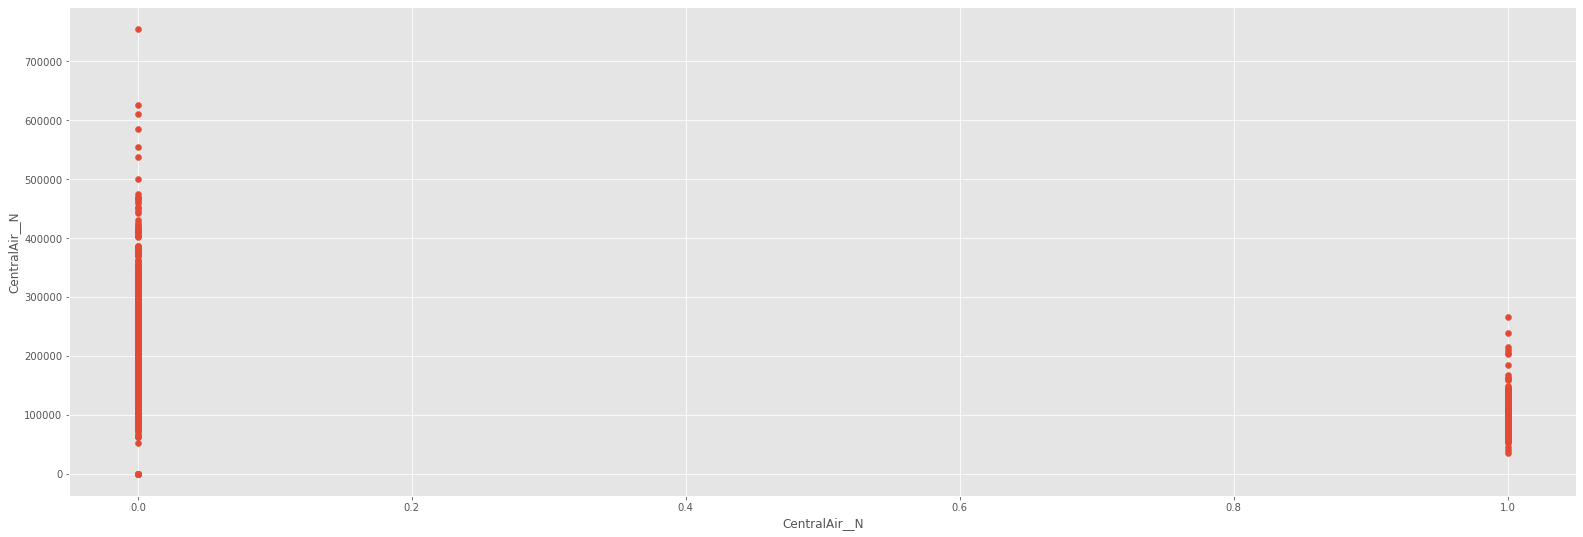

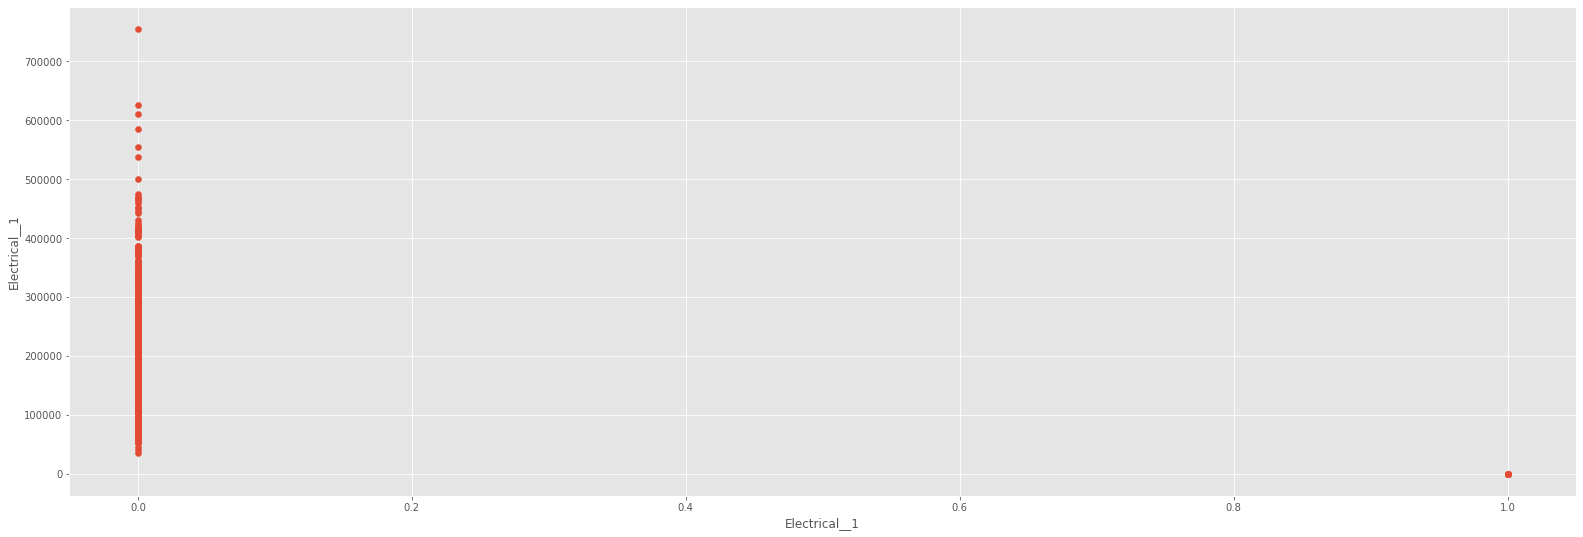

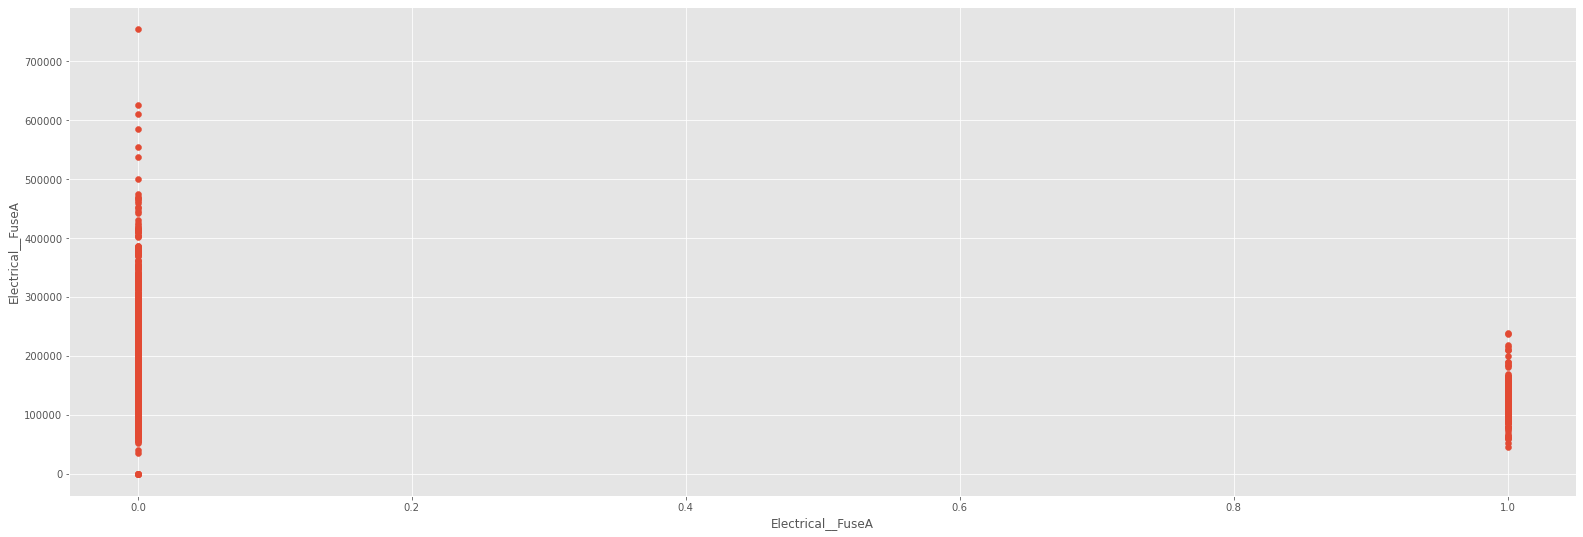

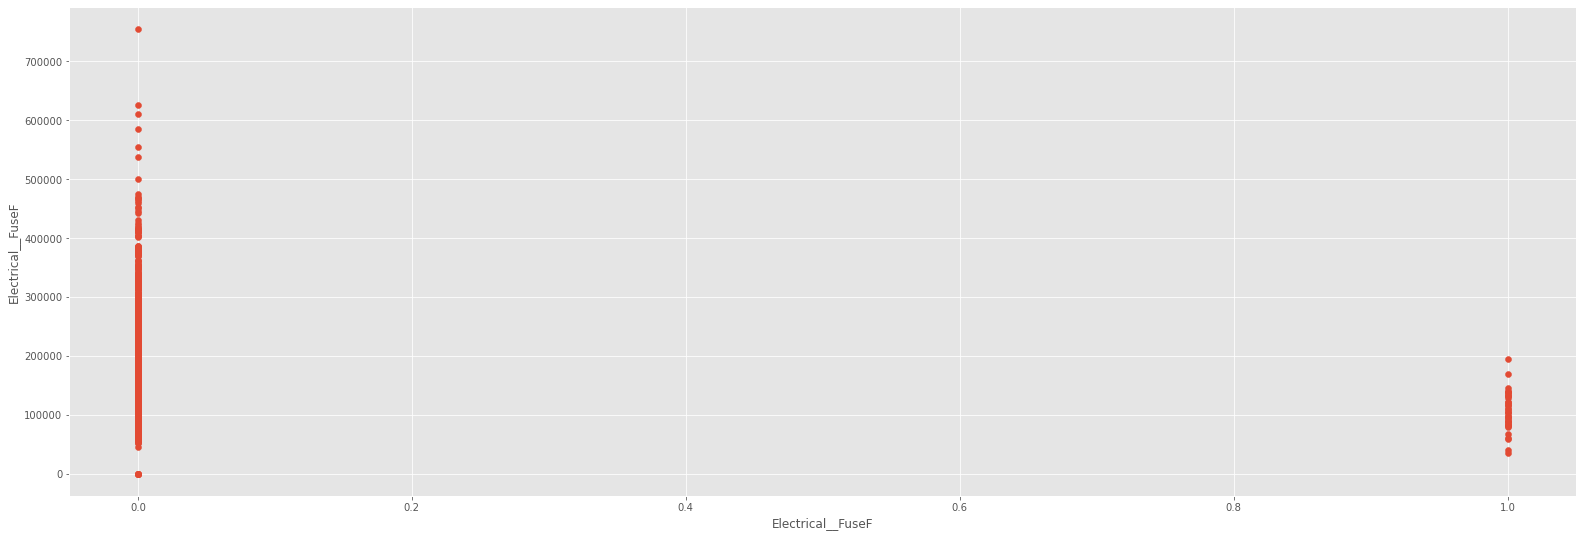

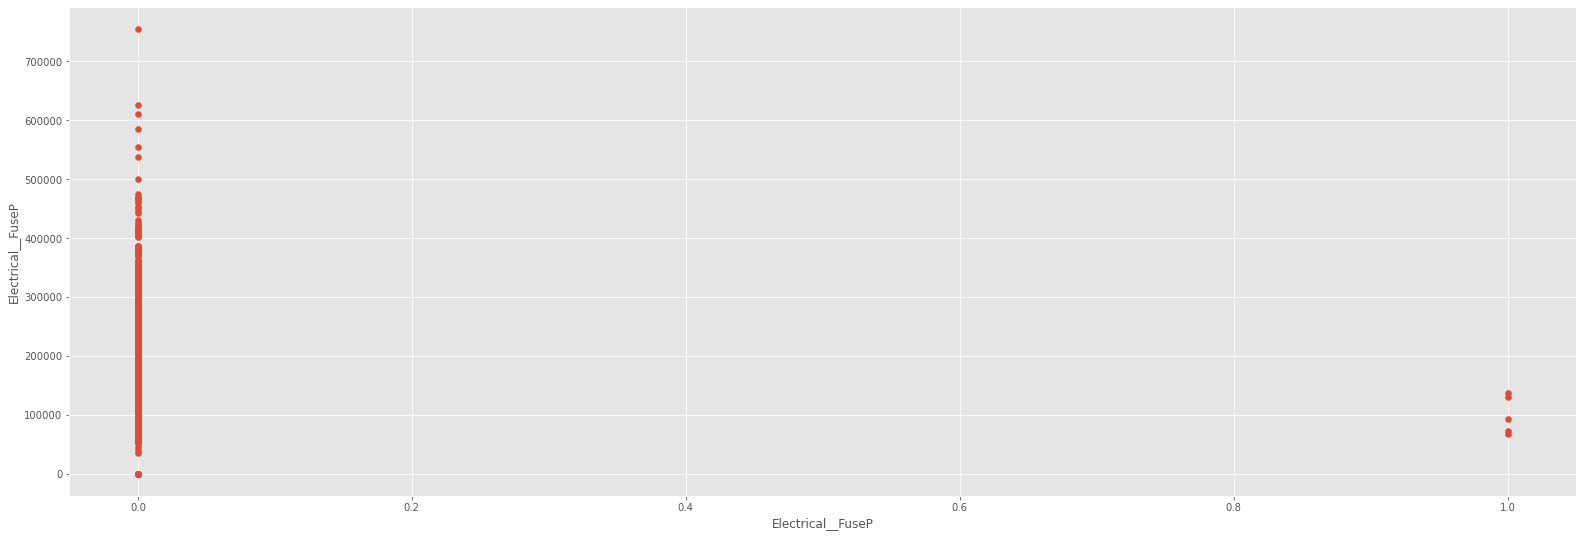

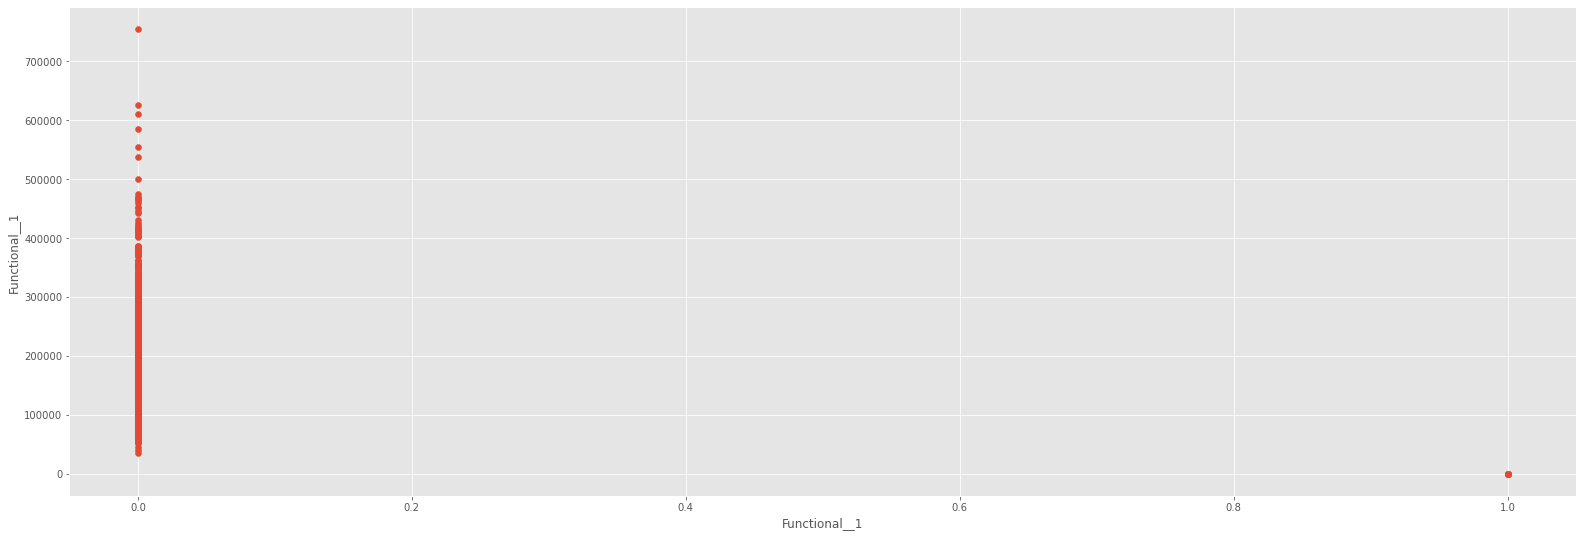

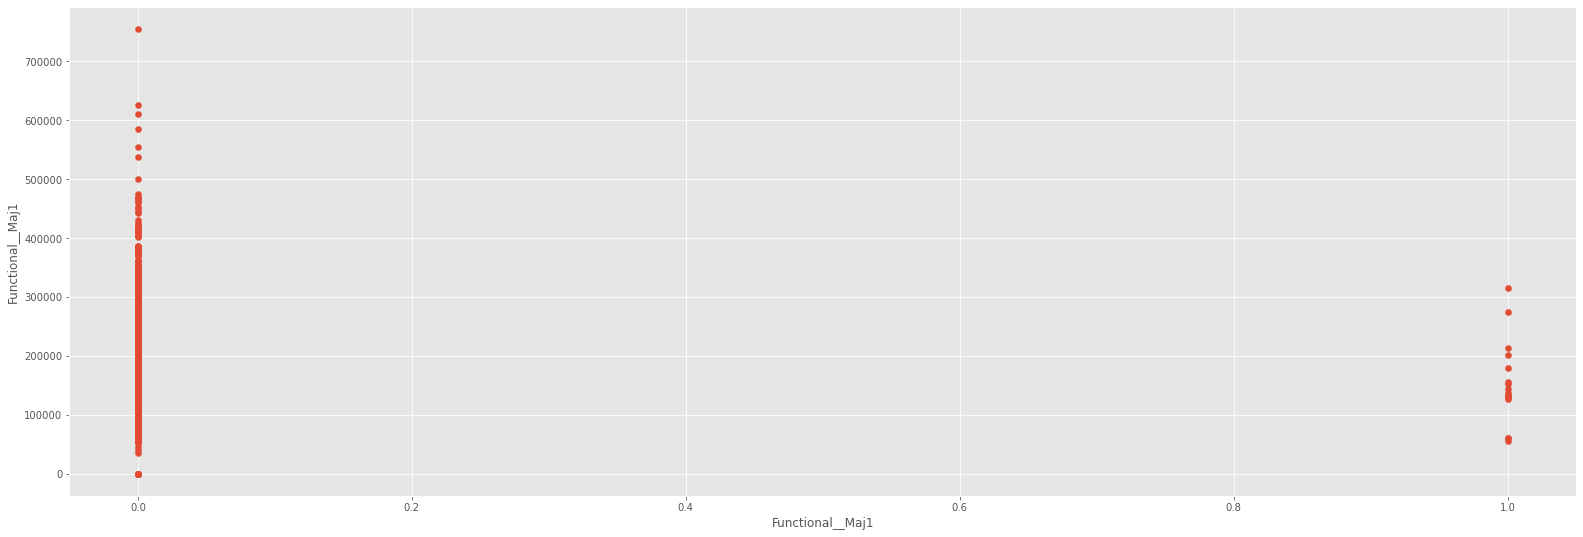

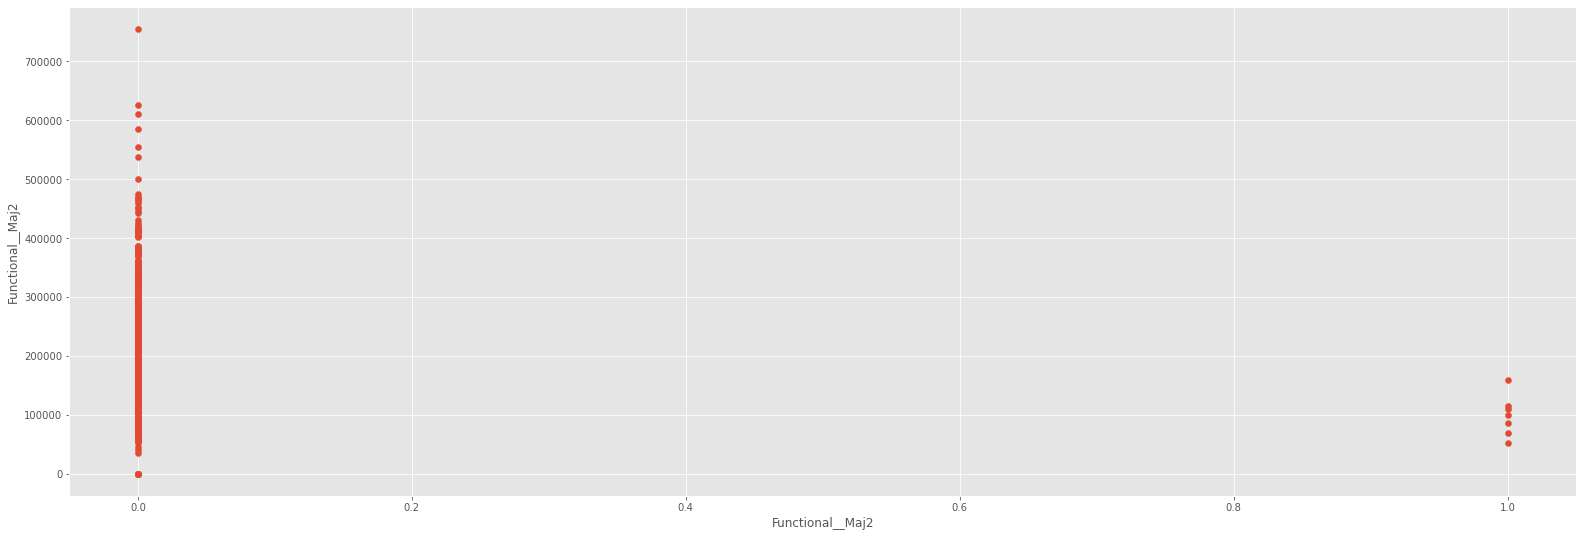

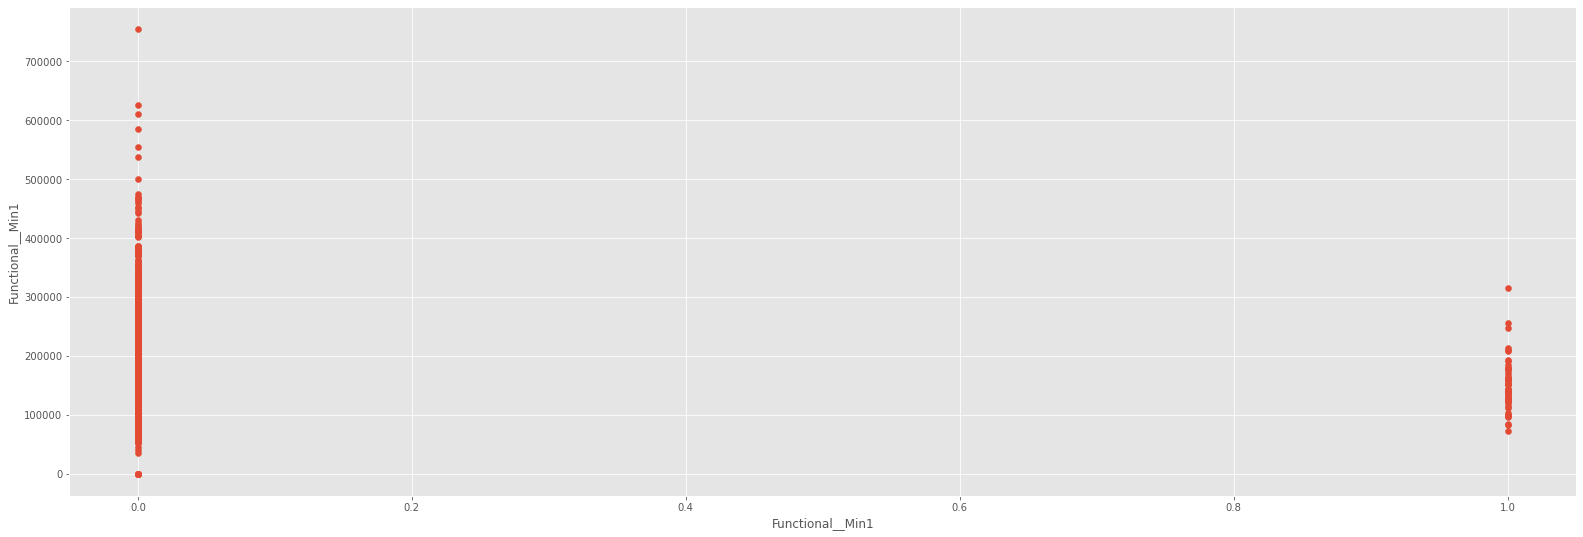

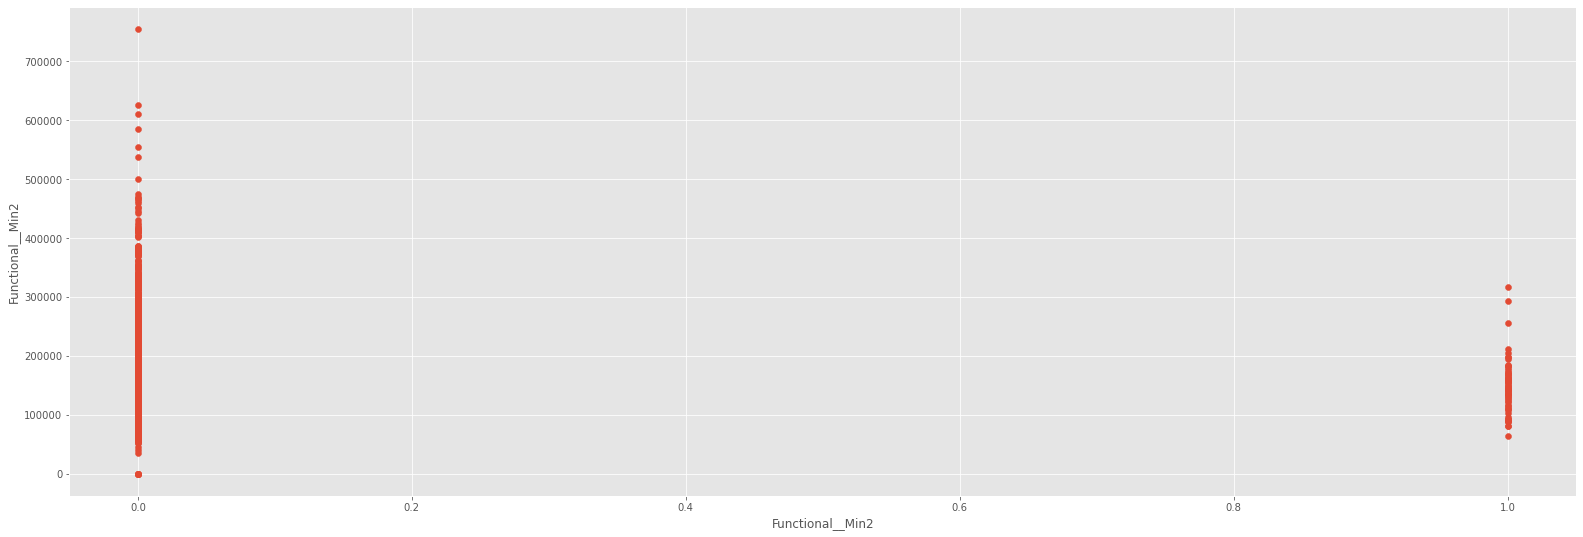

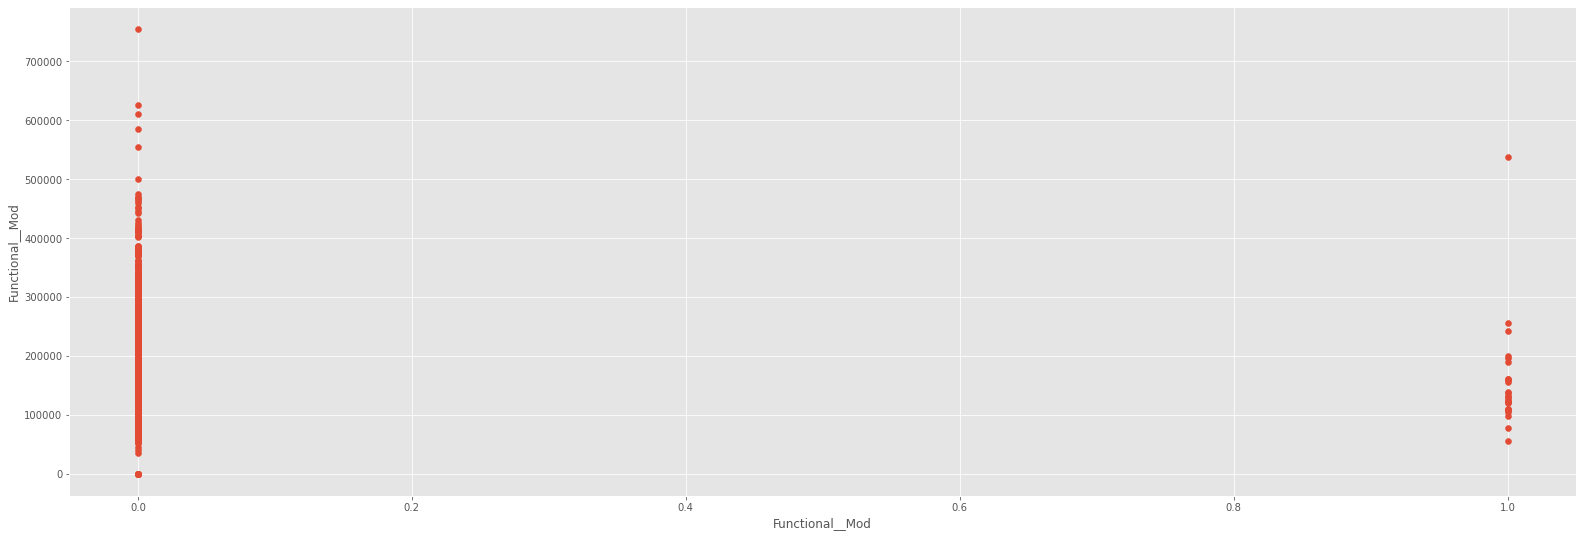

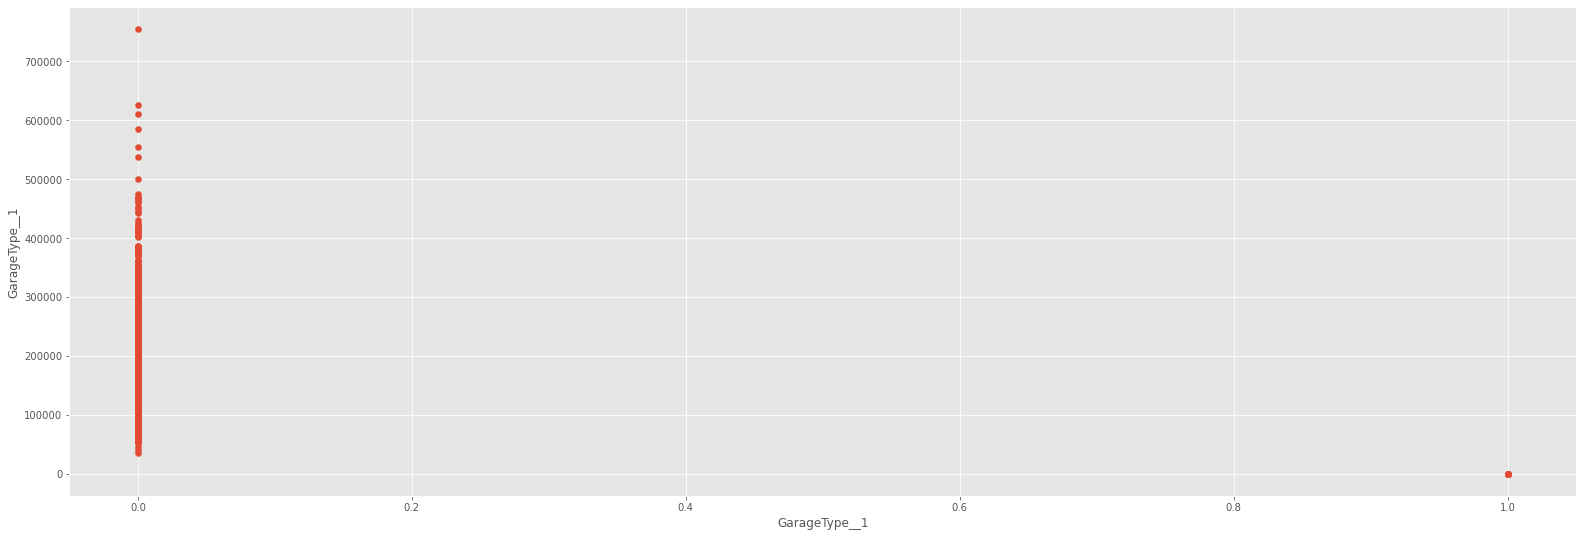

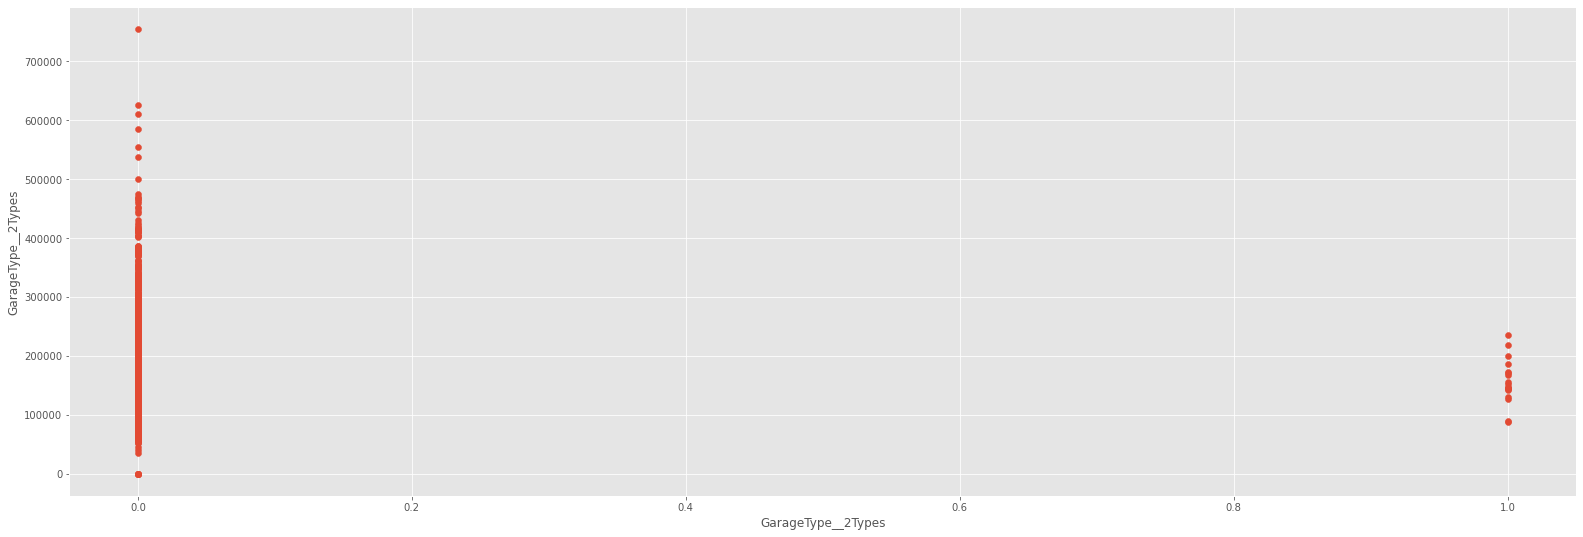

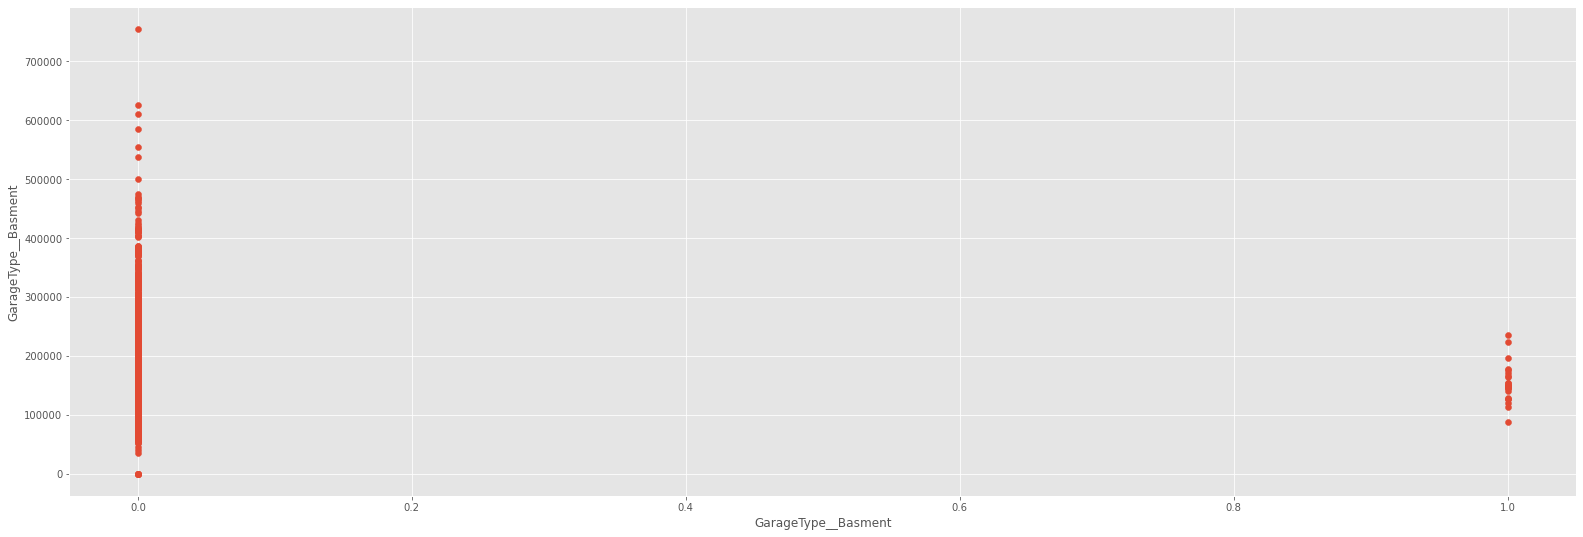

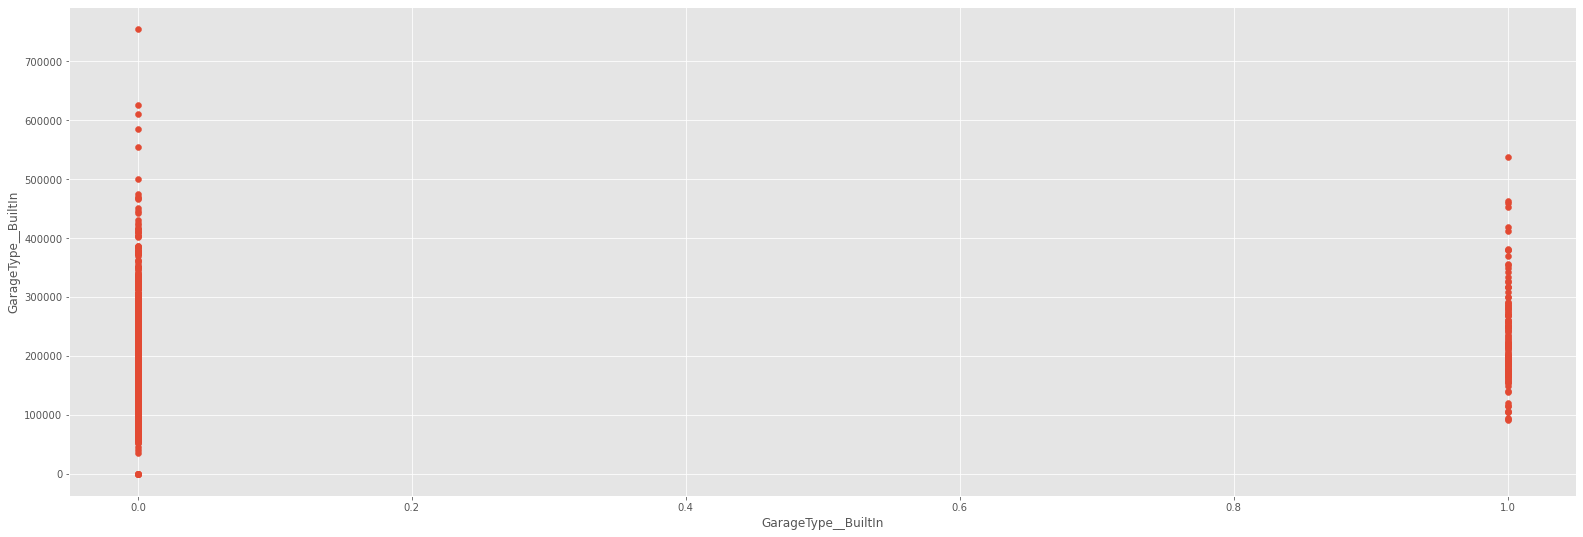

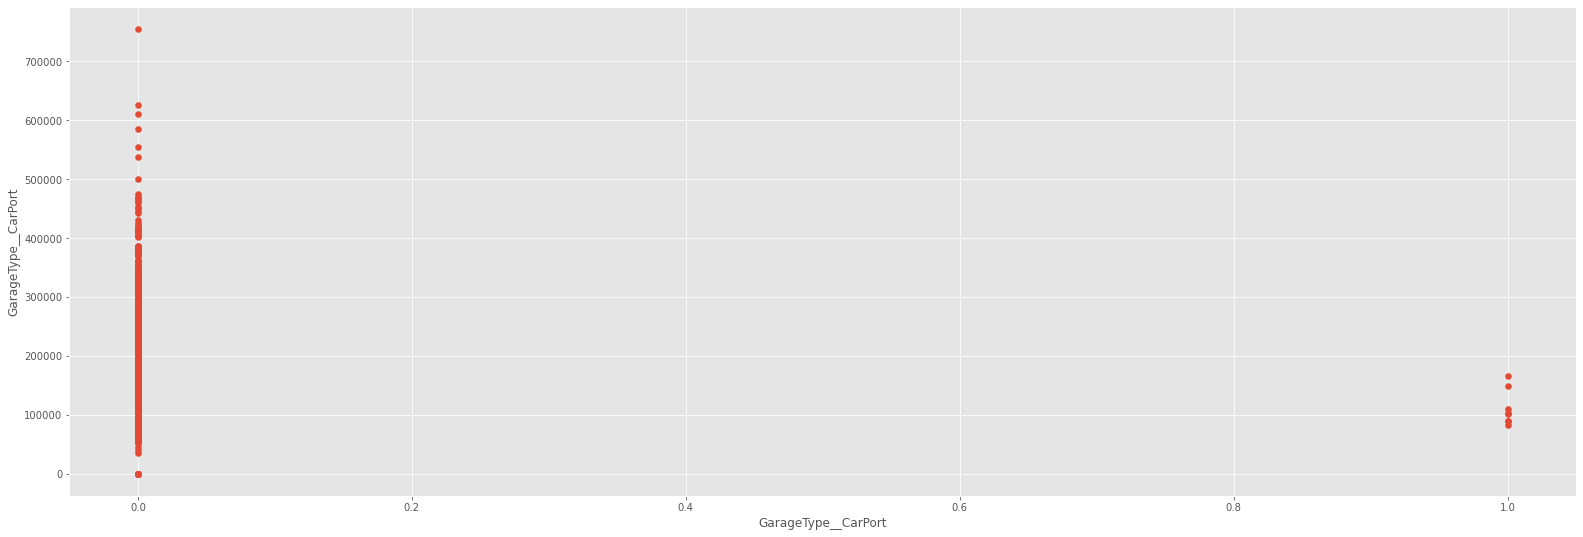

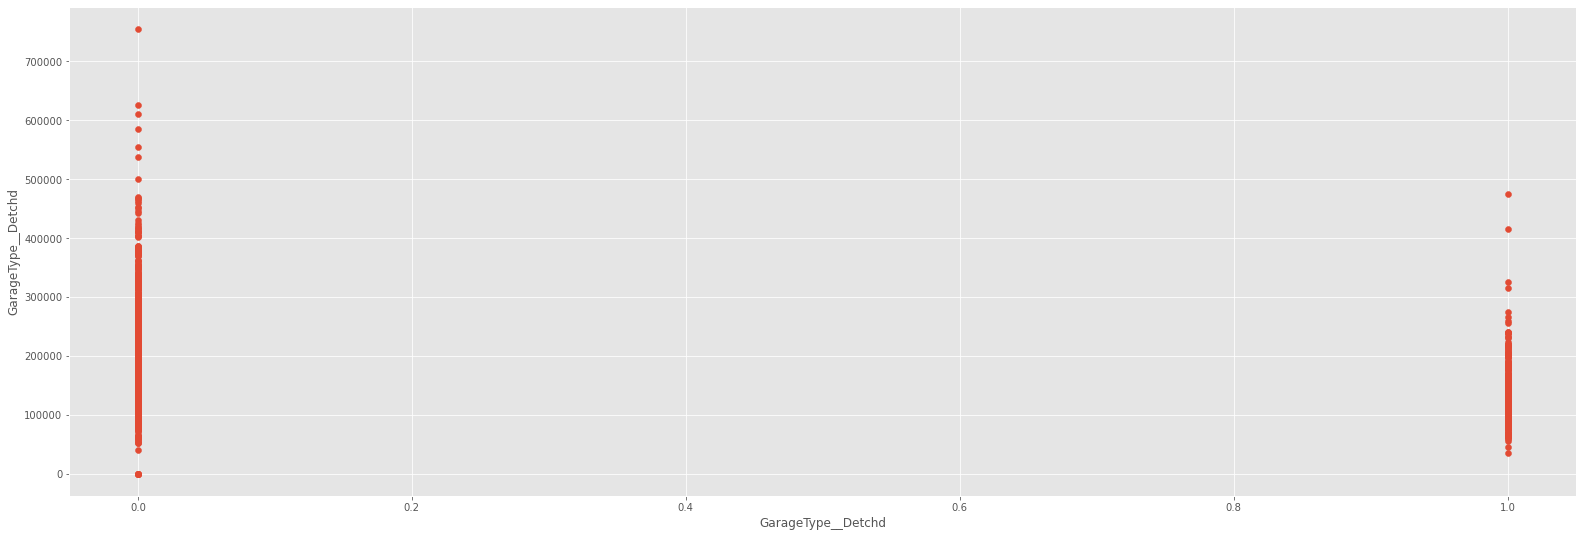

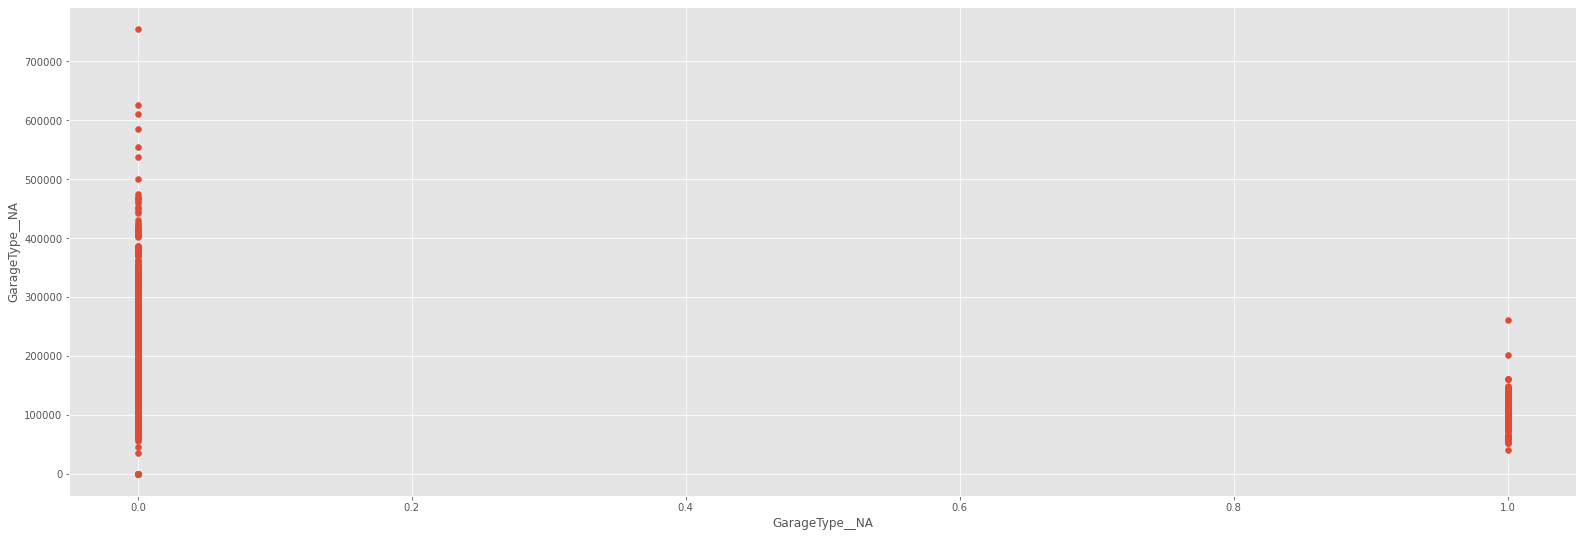

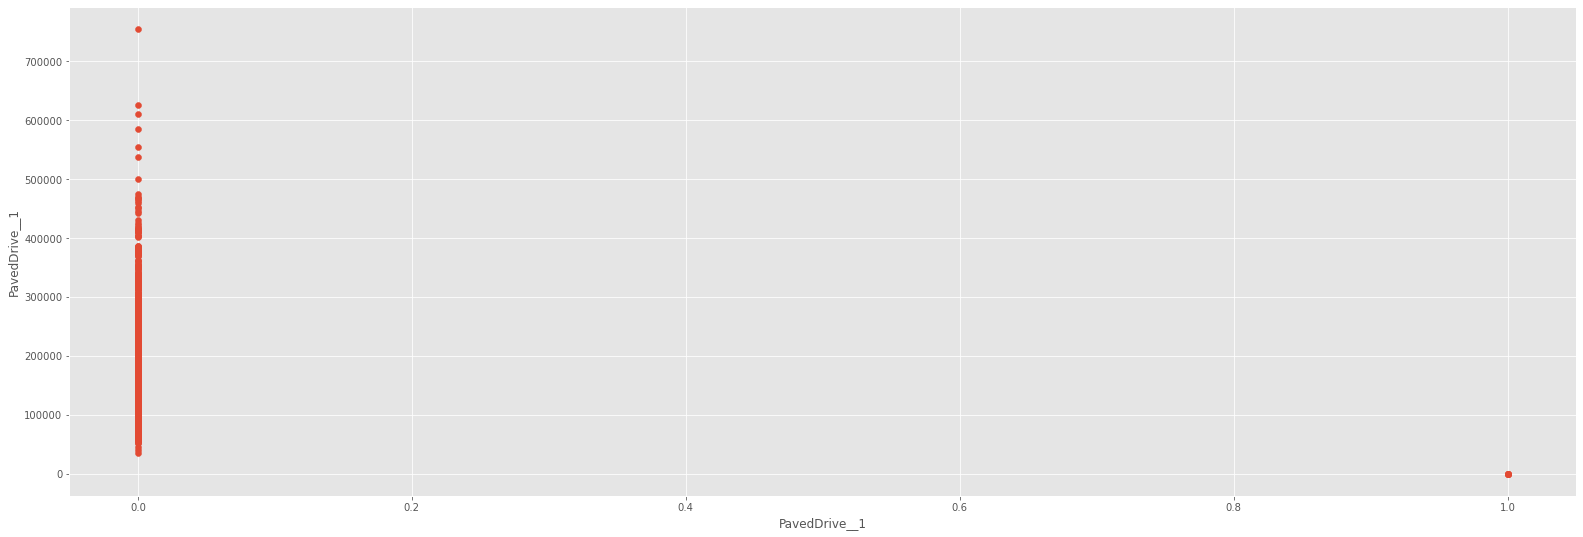

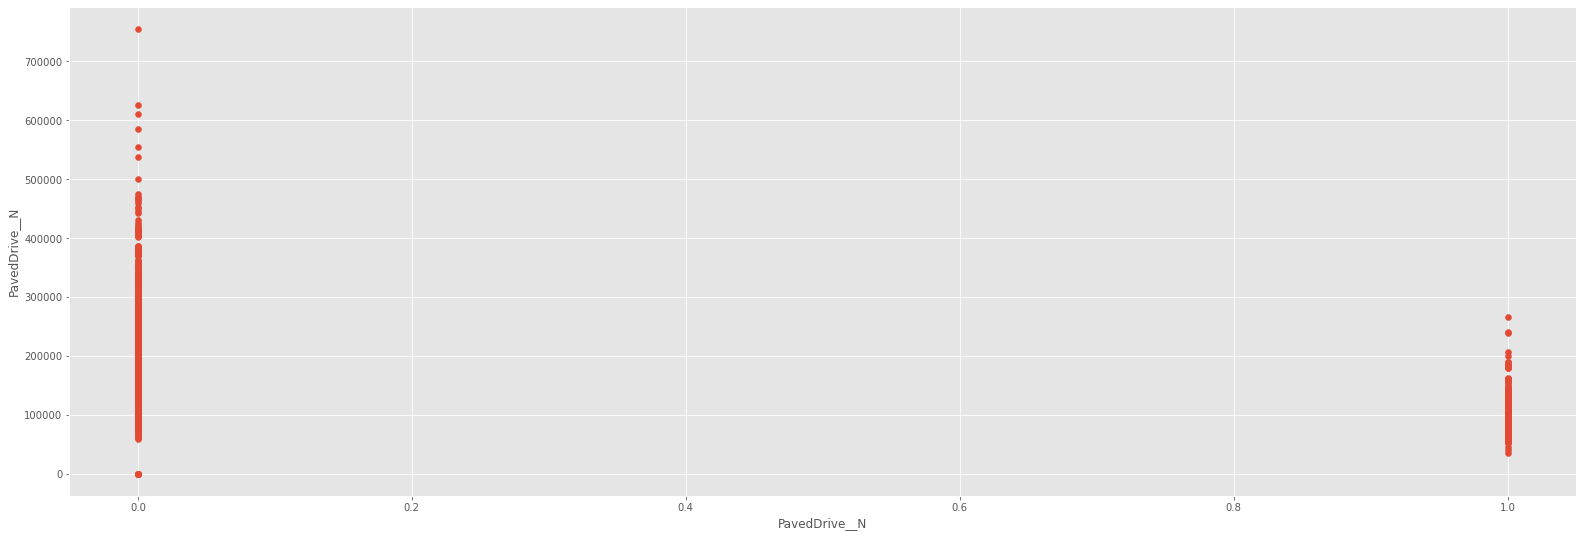

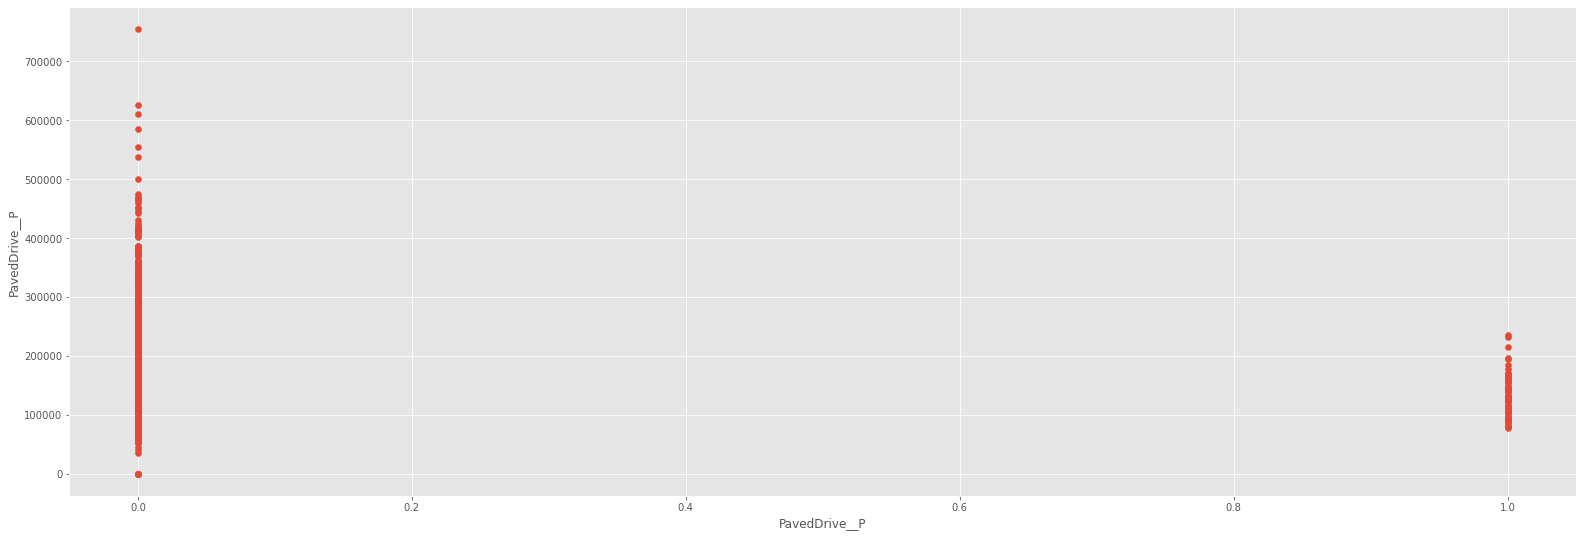

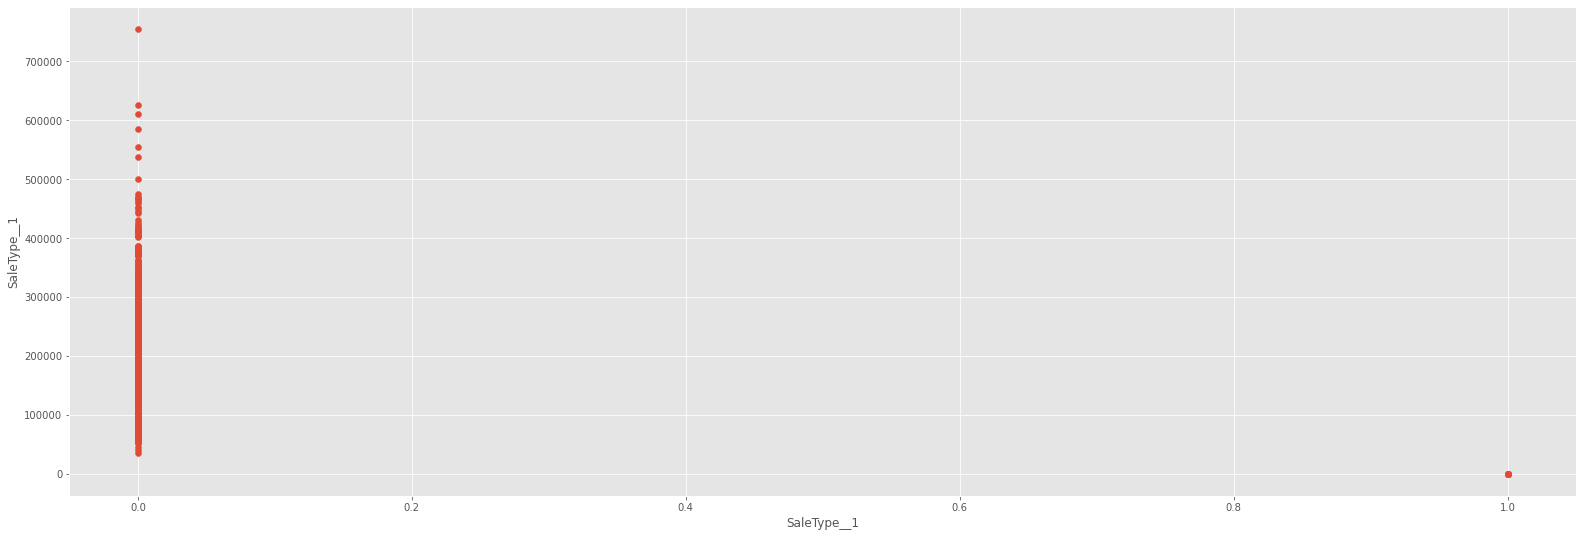

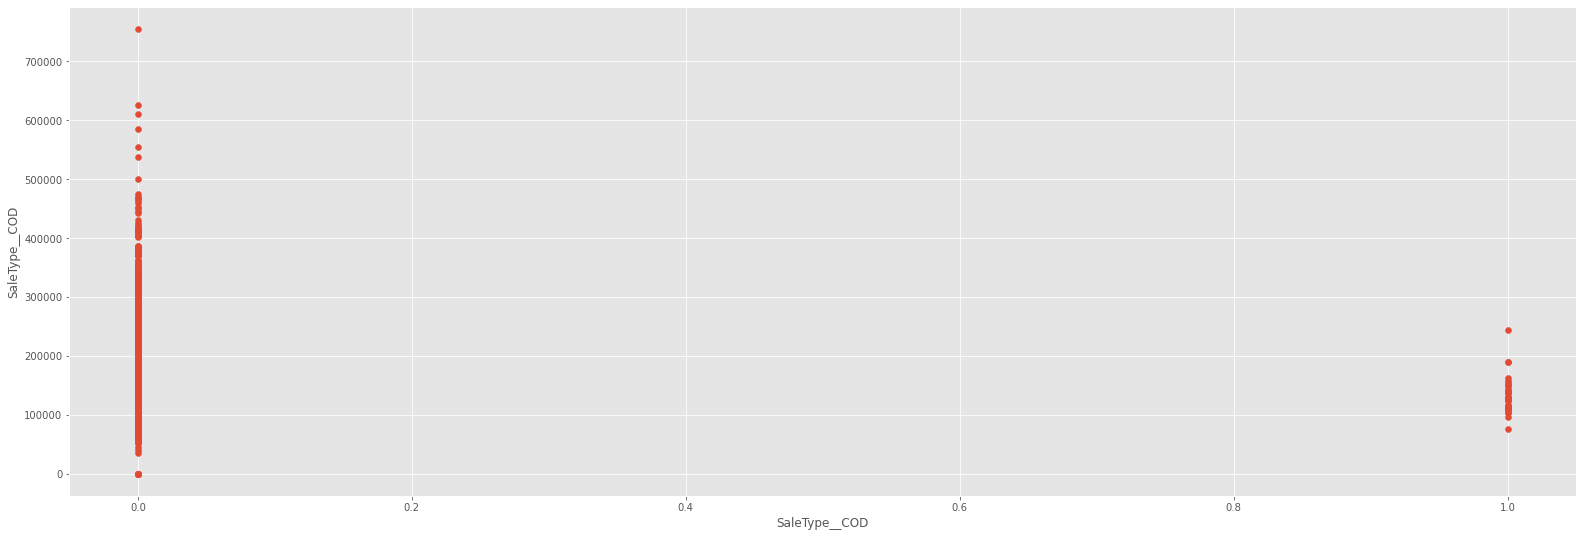

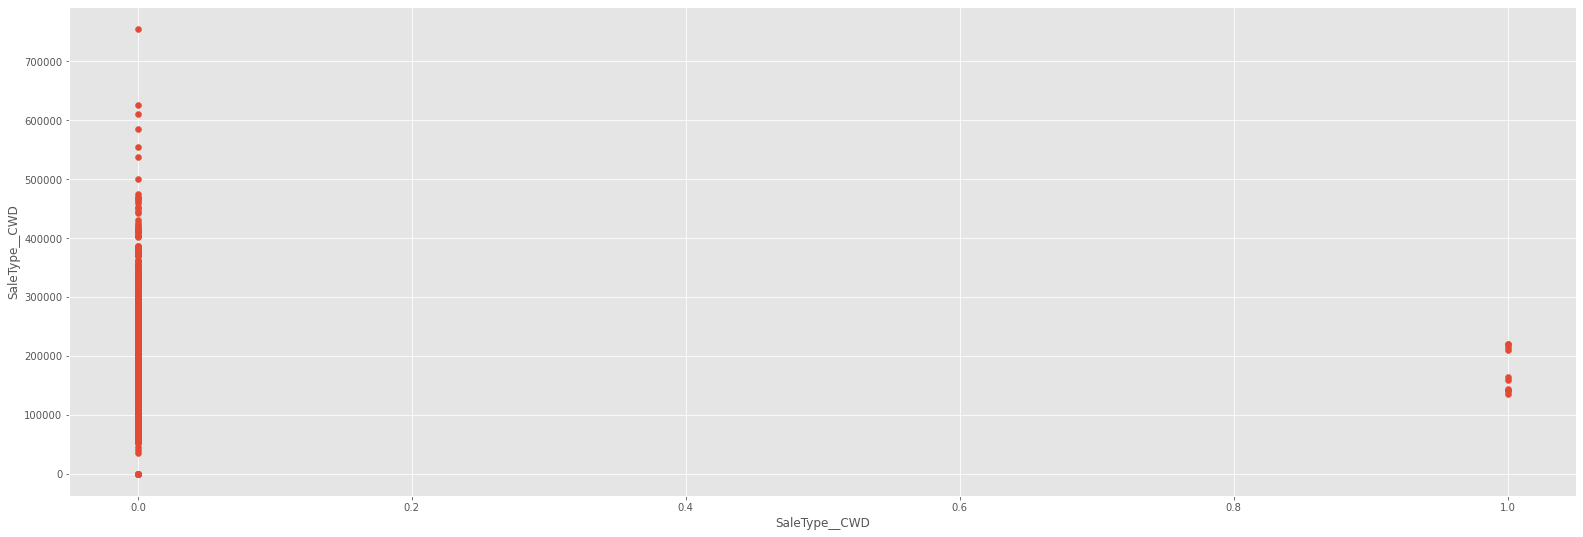

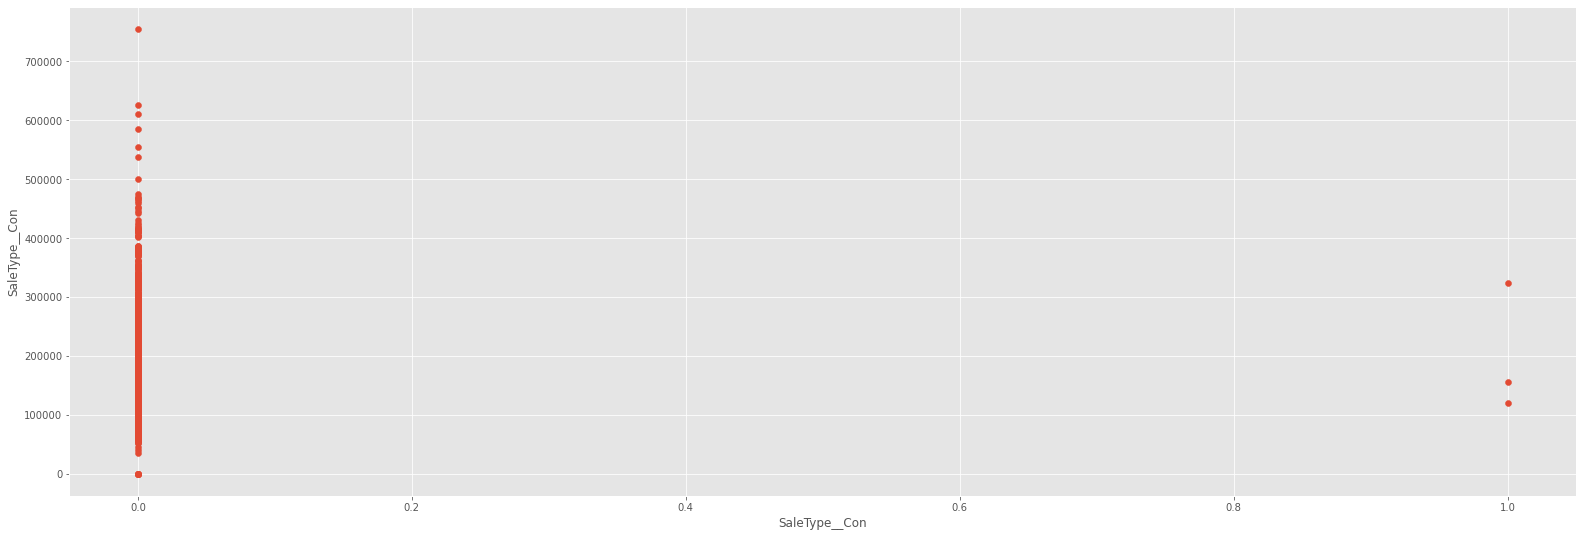

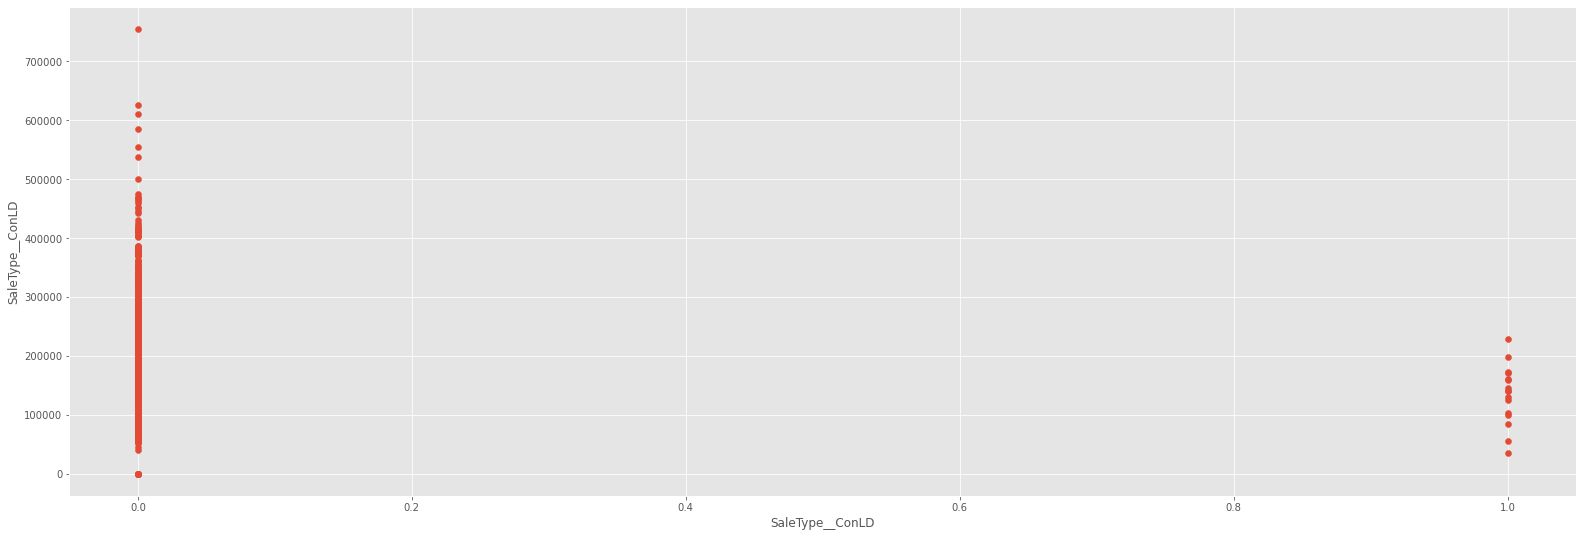

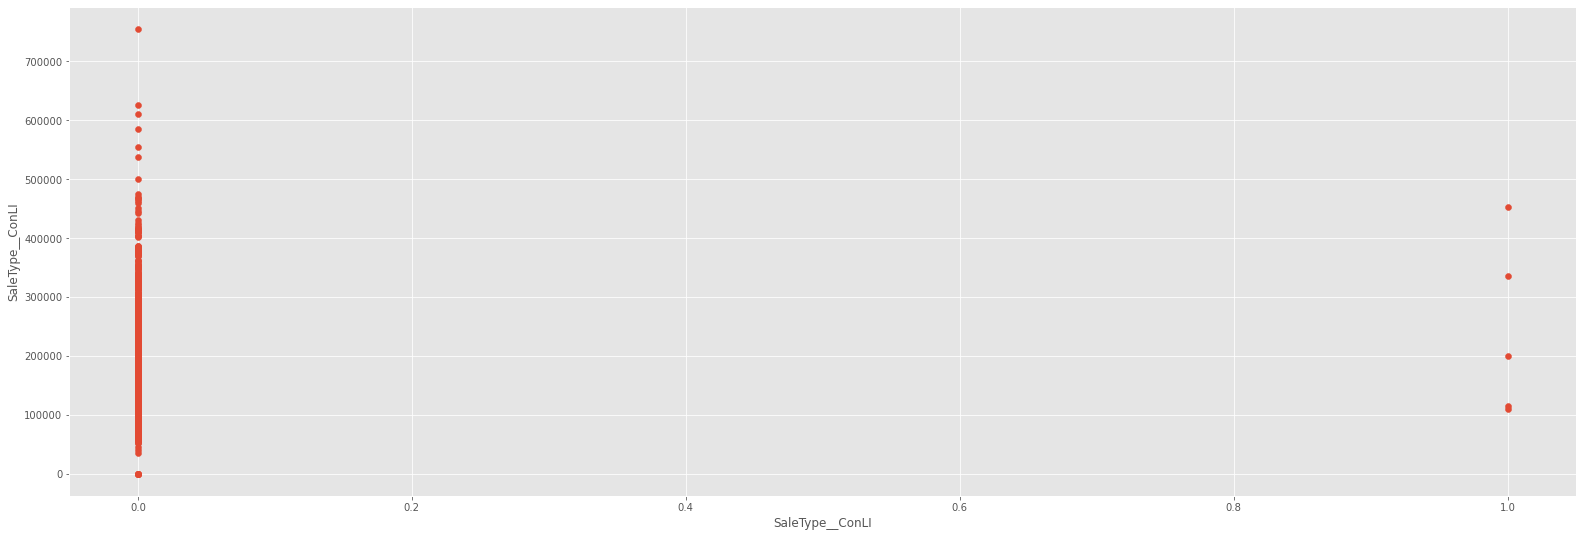

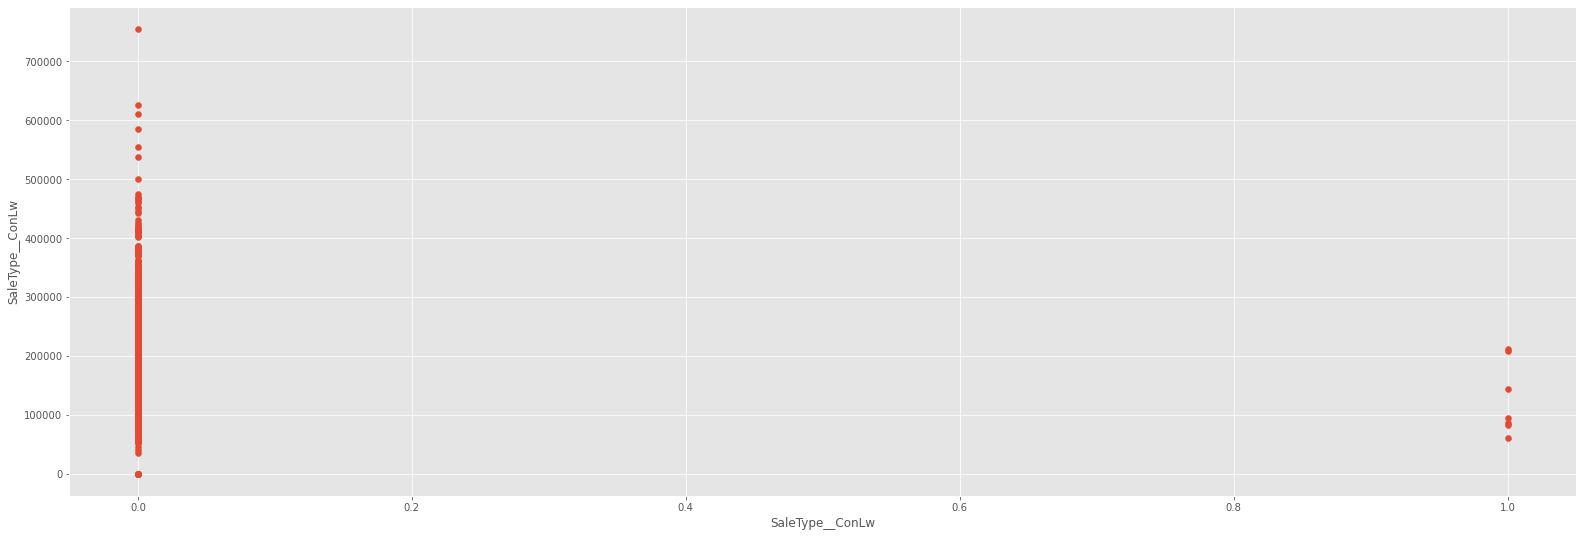

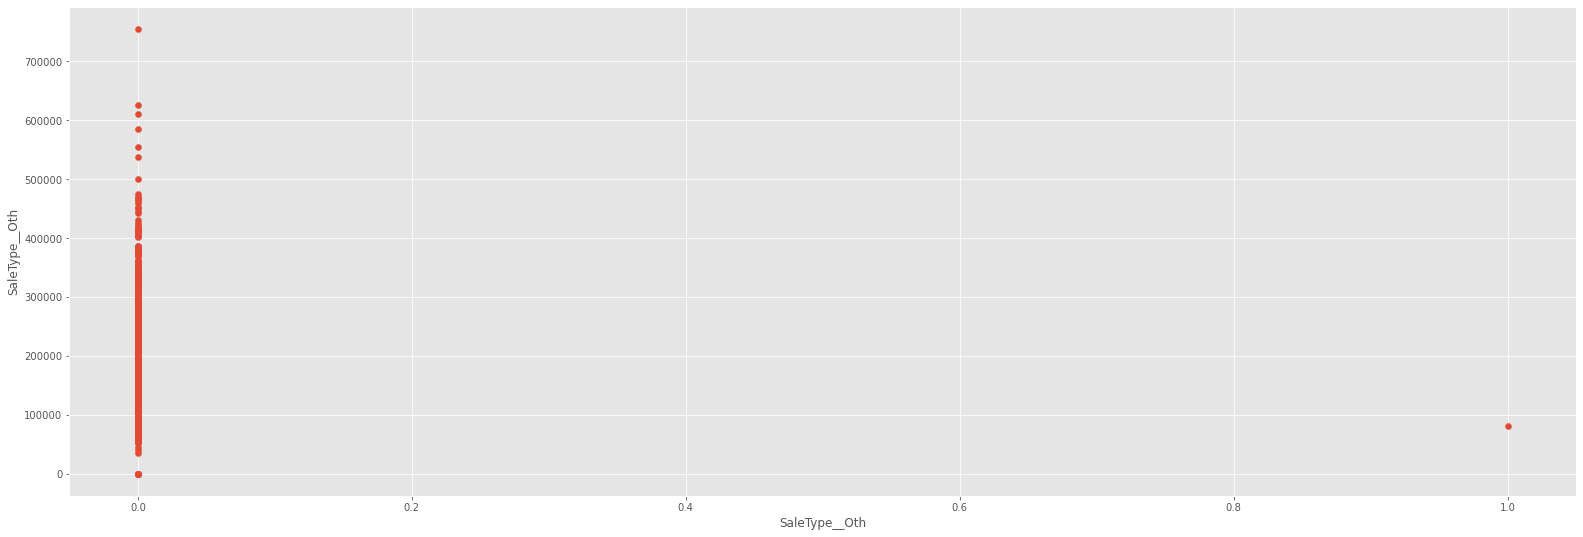

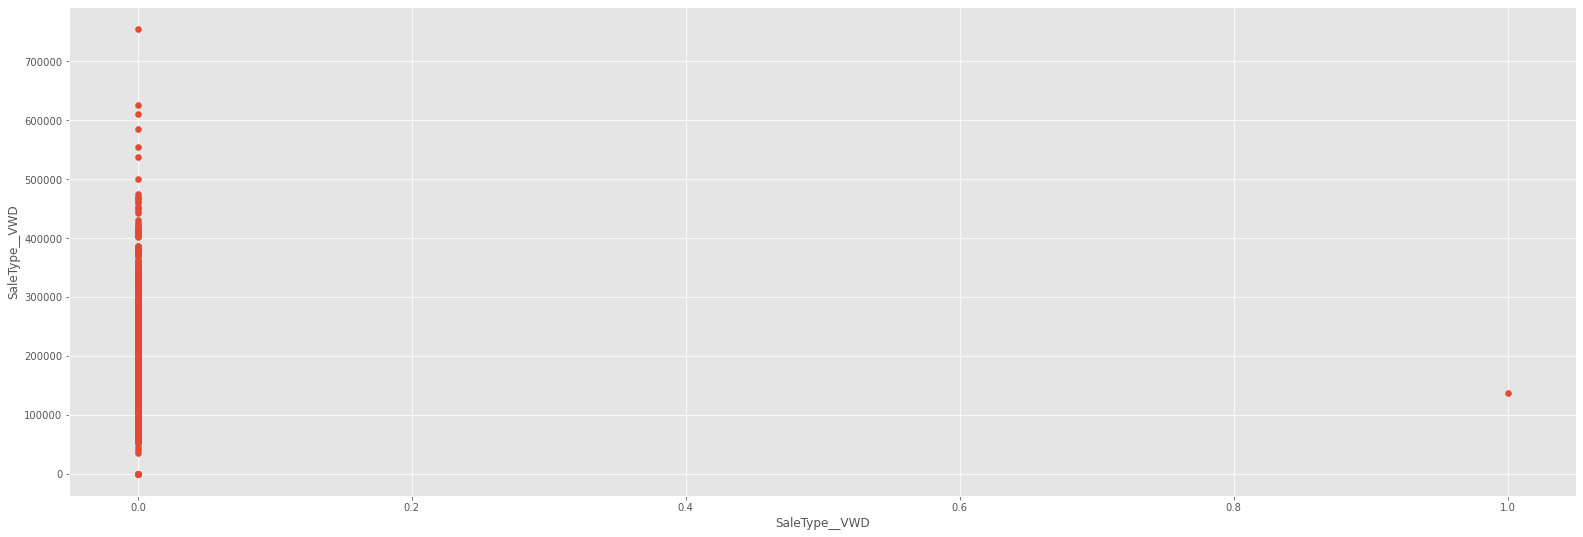

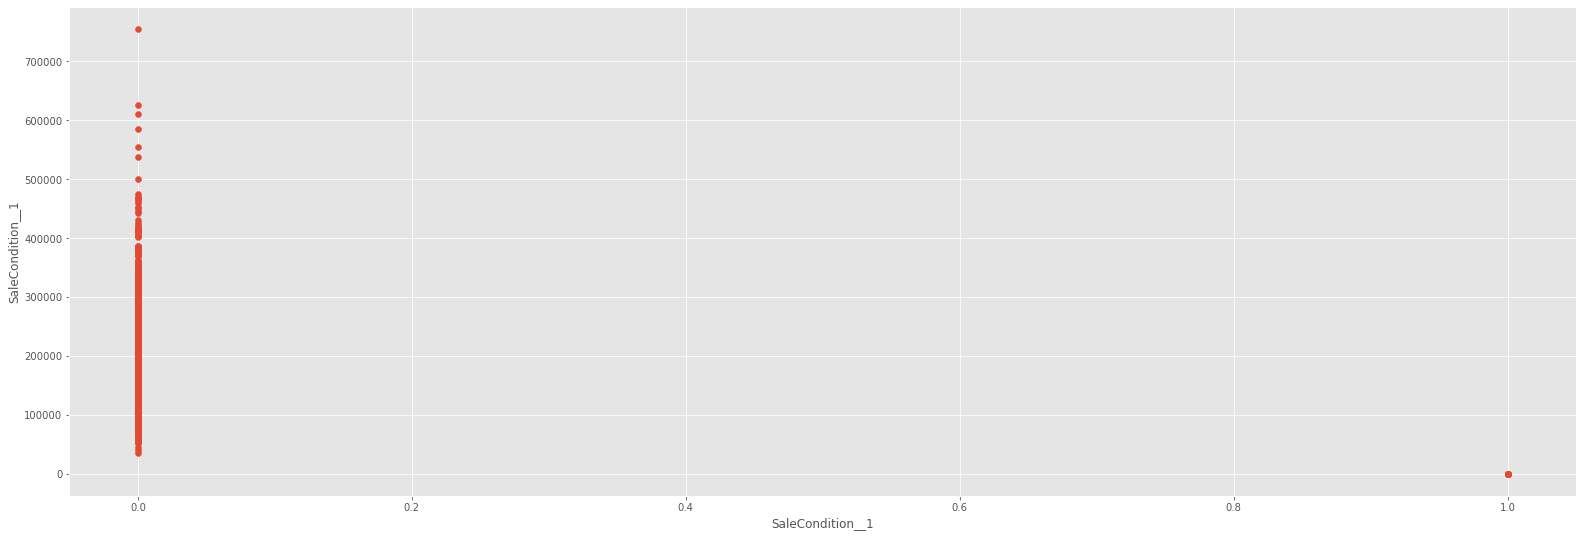

In [28]:
from matplotlib import pyplot as plt

for i in features:
    plt.scatter(data_House_price[i],data_House_price[sale_price])
    plt.xlabel(i)
    plt.ylabel(i)
    plt.show()

In [40]:
data_House_price.loc[data_House_price.PID == 1].index.to_list()

[66, 488, 596, 1180, 1418, 1669, 2009, 2425, 2474]